# **An Analytic Methodology to Extract Narratives from Text: Using Sentiment Analysis to find the Arcs and Crux Points in Novels, Social Media and Chat Transcripts**

By: Jon Chun
12 Jun 2021

References:

* Coming...

TODO:
* Demo datafiles
* Error detection around Crux points context (out of bounds)
* lex_discrete2continous (research binary->gaussian transformation fn)
* Text Preprocessing hints/tips/flowchart
* Clearly document workflow and partition across notebooks/libraries
* Code review and extraction to libraries
* Corpus ingestion for any format
* XAI (mlm false peak 1717SyuzhetR/1732SentimentR/1797robertalg15 adam watches war argument at dinner) 
* Centralize and Standardize Model name lists
* Normalize model SA Series lengths
* Standardize all SA Series with the same method
* Seamless report generation/file saving
* Get raw text from SentimentR
* Filter out non-printable characters
* Roll-over Crux-Points (SentNo+Sent/Parag) (plotly)
* Label/Roll-over Chapter/Sect No at Boundries
* Generate Report PDF/csv
* Option to select raw or discrete2continous transformation (Bing)
* Annotation functionality + Share/Collaboration of findings/reseearch
* clusters, centroids = kmeans1d.cluster(np.array(corpus_sentimentr_df['jockers_rinker']), k)
* plotly prefered library to save dynamic images: kaleido
* Correlation heatmaps: Justify choice of Spearman, Pearson, or other algo

Facts:
* SyuzhetR vs SentimentTime Clean/Preprocess
* V.Woolf - To The Lighthouse
* SyuzhetR Clean: 3511 (SyuzhetR Preprocessed) Sentences (SentimentTime Preprocessed) 3403
* SentimentTime Clean: (Raw) 3402  (Clean) 3402


Preprocessing of Corpus Textfile
* Put headers in ALL CAPS
* Put \n\n between each CHAPTER/BOOK or SECTION header or Paragraphs
* Keep your format/spacing consistent
* Try to use utf-8 (not cp1252 (e.g. \n <- \n\r)
* No leading blank lines, one trailing blank line at end of textfile
* Check for illegal, non-printable or other problematic code (e.g. curly single/double quotes)

# **Reference Code**

Surveys:
* https://github.com/prrao87/fine-grained-sentiment (20210409) Fine-grained SA (7 Models)


Other:
* https://github.com/annabiancajones/GA_capstone_project/blob/master/part3_mine_refine.ipynb
* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 CV

# **Installs Requiring [Restart Runtime]**

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 15.4 MB/s 
     |████████████████████████████████| 596 kB 60.1 MB/s 
     |████████████████████████████████| 895 kB 65.8 MB/s 
     |████████████████████████████████| 6.8 MB 54.2 MB/s 
     |████████████████████████████████| 67 kB 7.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

In [ ]:
# Test

# !pip install kmeans1d

In [ ]:
"""
import kmeans1d

k = corpus_sentimentr_df.shape[0]//500  

clusters, centroids = kmeans1d.cluster(np.array(corpus_sentimentr_df['jockers_rinker']), k)
type(clusters)

[[x,clusters.count(x)] for x in set(clusters)]
centroids
""";

# **[STEP 1] Configuration and Setup**

## Configure Jupyter Notebook

In [ ]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

## [INPUT] Connect Google gDrive to this Jupyter Notebook

In [ ]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


In [ ]:
!ls

sample_data


In [ ]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.



# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/cdh/sentiment_arcs/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}

#@markdown (e.g. /gdrive/MyDrive/research/sentiment_arcs/)



# Step #2: Move to Parent directory of Sentiment_Arcs
# =======
parentdir_sentiment_arcs = '/'.join(Path_to_SentimentArcs.split('/')[:-2])
print(f'subdir_parent: {parentdir_sentiment_arcs}')
%cd $parentdir_sentiment_arcs


# Step #3: If project sentiment_arcs subdir does not exist, 
#          clone it from github
# =======
import os

if not os.path.isdir('sentiment_arcs'):
  # NOTE: This will not work until SentimentArcs becomes an open sourced PUBLIC repo
  # !git clone https://github.com/jon-chun/sentiment_arcs.git

  # Test on open access github repo
  !git clone https://github.com/jon-chun/nabokov_palefire.git


# Step #4: Change into sentiment_arcs subdir
# =======
%cd ./sentiment_arcs
# Test on open acess github repo
# %cd ./nabokov_palefire

# Step #5: Confirm contents of sentiment_arcs subdir
# =======
!ls


subdir_parent: /gdrive/MyDrive/cdh
/gdrive/MyDrive/cdh
/gdrive/MyDrive/cdh/sentiment_arcs
config	notebooks  text_clean  text_raw


In [ ]:
# [VERIFY]: Ensure that all the manually preprocessed novel are in plain text
#   files and file names are formatted correctly

# %cd ../sentiment_arcs
!pwd
!ls ./text_raw

/gdrive/MyDrive/cdh/sentiment_arcs
finance_raw  novels_raw


## Define Directory Tree Structure

In [1]:
#@markdown **Sentiment Arcs Directory Structure** \
#@markdown \
#@markdown **1. Input Directories:** \
#@markdown (a) Raw textfiles in subdir: ./text_raw/(text_type)/  \
#@markdown (b) Cleaned textfiles in subdir: ./text_clean/(text_type)/ \
#@markdown \
#@markdown **2. Output Directories** \
#@markdown (1) Raw Sentiment time series datafiles and plots in subdir: ./sentiment_raw/(text_type) \
#@markdown (2) Cleaned Sentiment time series datafiles and plots in subdir: ./sentiment_clean/(text_type) \
#@markdown \
#@markdown **Which type of texts are you analyzing?** \

Text_Type = "novels" #@param ["novels", "social_media", "finance"]

#@markdown Please check that the required textfiles and datafiles exist in the correct subdirectories before continuing.




In [2]:
# Create Directory CONSTANTS based On Document Type

SUBDIR_TEXT_RAW = f"./text_raw/{Text_Type}_raw/"
SUBDIR_TEXT_CLEAN = f"./text_clean/{Text_Type}_clean/"
SUBDIR_SENTIMENT_RAW = f"./sentiment_raw/{Text_Type}_raw/"
SUBDIR_SENTIMENT_CLEAN = f"./sentiment_clean/{Text_Type}_clean/"

# Verify Directory Structure

print('Verify the Directory Structure:\n')
print('-------------------------------\n')

print(f'           [Corpus Type]: {Text_Type}\n')
print(f'       [SUBDIR_TEXT_RAW]: {SUBDIR_TEXT_RAW}\n')
print(f'     [SUBDIR_TEXT_CLEAN]: {SUBDIR_TEXT_CLEAN}\n')
print(f'  [SUBDIR_SENTIMENT_RAW]: {SUBDIR_SENTIMENT_RAW}\n')
print(f'[SUBDIR_SENTIMENT_CLEAN]: {SUBDIR_SENTIMENT_CLEAN}\n')

Verify the Directory Structure:

-------------------------------

           [Corpus Type]: novels

       [SUBDIR_TEXT_RAW]: ./text_raw/novels_raw/

     [SUBDIR_TEXT_CLEAN]: ./text_clean/novels_clean/

  [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/novels_raw/

[SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/novels_clean/



## Read YAML Configuration File

In [ ]:
!pip install pyyaml

In [ ]:
import yaml

### Define Texts to Analyze

In [ ]:
# Read SentimentArcs YAML Config Files for Different Corpora Types(3) and Text Files Details

# Novel Text Files
with open("./config/novels_info.yaml", "r") as stream:
  try:
    novels_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

# Finance Text Files
with open("./config/finance_info.yaml", "r") as stream:
  try:
    finance_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

# Social Media Text Files

with open("./config/social_info.yaml", "r") as stream:
  try:
    social_dt = yaml.safe_load(stream)
  except yaml.YAMLError as exc:
    print(exc)

In [ ]:
import json

In [ ]:
# Verify the Corpora: Novel Textfiles in novels_dt

print (json.dumps(novels_dt, indent=2))

{
  "cdickens_achristmascarol": [
    "A Christmas Carol by Charles Dickens ",
    1843,
    1399
  ],
  "cdickens_greatexpectations": [
    "Great Expectations by Charles Dickens",
    1861,
    7230
  ],
  "dbrown_thedavincicode": [
    "The Da Vinci Code by Dan Brown",
    2003,
    9475
  ],
  "ddefoe_robinsoncrusoe": [
    "Robinson Crusoe by Daniel Defoe",
    1719,
    2280
  ],
  "eljames_fiftyshadesofgrey": [
    "Fifty Shades of Grey by E.L. James",
    2011,
    8184
  ],
  "emforster_howardsend": [
    "Howards End by E.M. Forester",
    1910,
    8999
  ],
  "fbaum_thewonderfulwizardofoz": [
    "The Wonderful Wizard of Oz by Frank Baum",
    1850,
    2238
  ],
  "fdouglass_narrativelifeofaslave": [
    "Narrative of the life of Frederick Douglass, an American Slave by Frederick Douglass",
    1845,
    1688
  ],
  "fscottfitzgerald_thegreatgatsby": [
    "The Great Gatsby by F. Scott Fitzgerald",
    1925,
    2950
  ],
  "geliot_middlemarch": [
    "Middlemarch by Georg

In [ ]:
# Verify the Corpora: Novel Textfiles in finance_dt

print (json.dumps(finance_dt, indent=2))

{
  "academic_semanticscholar": [
    [
      "etherium",
      "",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "analyst_goldmansachs": [
    [
      "coin",
      "",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "analyst_morningstar": [
    [
      "coin",
      "",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "corporate_coin": [
    [
      "regulator",
      "sec_10k",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "news_msnbc": [
    [
      "bitcoin",
      "Squakbox",
      "Jim Cramer"
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "news_nyt": [
    [
      "coin",
      "finance",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "news_wsj": [
    [
      "coin",
      "",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "social_reddit": [
    [
     

In [ ]:
# Verify the Corpora: Novel Textfiles in social_dt

print (json.dumps(social_dt, indent=2))

{
  "instagram_c19": [
    [
      "Covid 19 Pandemic",
      "#c19",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "instagram_covid": [
    [
      "Covid 19 Pandemic",
      "#covid",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "instagram_pandemic": [
    [
      "Covid 19 Pandemic",
      "#pandemic",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "reddit_c19": [
    [
      "Covid 19 Pandemic",
      "#c19",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "reddit_covid": [
    [
      "Covid 19 Pandemic",
      "#covid",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "redditr_pandemic": [
    [
      "Covid 19 Pandemic",
      "#pandemic",
      ""
    ],
    [
      "2021-12-01",
      "2021-12-31"
    ],
    0
  ],
  "twitter_c19": [
    [
      "Covid 19 Pandemic",
      "#c19",
      ""
    ],
    [
      "2

## Install Libraries: Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('max_colwidth', 100) # -1)

In [ ]:
from glob import glob
import copy
import json

In [ ]:
# Plotly Visualizations

import plotly.graph_objects as go
import plotly.express as px
import plotly

In [ ]:
# Scikit Utilities, Metrics, Pipelines and Models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [ ]:
from cycler import cycler

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']

cycle = plt.cycler("color", colors) + plt.cycler("linestyle", linestyles)

# View previous matplotlib configuration
print('\n Old Matplotlib Configurtion Settings:\n')
# plt.rc.show
print('\n\n')

# Update and view new matplotlib configuration
print('\n New Matplotlib Configurtion Settings:\n')
myparams = {'axes.prop_cycle': cycle}
plt.rcParams.update(myparams)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12



 Old Matplotlib Configurtion Settings:





 New Matplotlib Configurtion Settings:



In [ ]:
"""
import matplotlib.colors as mcolors

mcolors.TABLEAU_COLORS

all_named_colors = {}
all_named_colors.update(mcolors.TABLEAU_COLORS)

print('\n')
all_named_colors.values()
""";

In [ ]:
# Set matplotlib plot figure.figsize

new_plt_size = plt.rcParams["figure.figsize"]=(20,10)

print(" New figure size: ",new_plt_size)

 New figure size:  (20, 10)


## Setup Seaborn Style

In [ ]:
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')


 Old Seaborn Configurtion Settings:



{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}





 New Seaborn Configurtion Settings:



In [ ]:
# Seaborn: Set Theme (Scale of Font)

sns.set_theme('paper')  # paper, notebook, talk, poster


# Seaborn: Set Context
# sns.set_context("notebook")



# Seaborn: Set Style

# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks

In [ ]:
# Seaborn: Default Palette (Pastel?)

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
# Seaborn: Set to High-Contrast Palette (more Vision Impaired Friendly)

sns.set_palette('tab10')
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-whitegrid')

## Define Globals

## Python Utility Functions

In [ ]:
# Utility functions to read/write nested Dictionary (key=novel) of DataFrames (Cols = Model Sentiment Series) 

def write_dict_dfs(adict, out_file='sentiments.json', out_dir=SUBDIR_SENTIMENT_RAW):
  '''
  Given a Dictionary of DataFrames and optional output filename and output directory
  Write as nested json file
  '''

  # convert dataframes into dictionaries
  data_dict = {
      key: adict[key].to_dict(orient='records') 
      for key in adict.keys()
  }

  # write to disk
  out_fullpath = f'{out_dir}{out_file}'
  print(f'Saving file to: {out_fullpath}')
  with open(out_fullpath, 'w') as fp:
    json.dump(
      data_dict, 
      fp, 
      indent=4, 
      sort_keys=True
    )

  return 

def read_dict_dfs(in_file='sentiments.json', in_dir=SUBDIR_SENTIMENT_RAW):
  '''
  Given a Dictionary of DataFrames and optional output filename and output directory
  Read nested json file into Dictionary of DataFrames
  '''

  # read from disk
  in_fullpath = f'{in_dir}{in_file}'
  with open(in_fullpath, 'r') as fp:
      data_dict = json.load(fp)

  # convert dictionaries into dataframes
  all_dt = {
      key: pd.DataFrame(data_dict[key]) 
      for key in data_dict
  }

  return all_dt

# **[STEP 2] Read all Preprocessed Novels**

In [ ]:
!pwd

/gdrive/MyDrive/cdh/sentiment_arcs


In [ ]:
SUBDIR_TEXT_CLEAN

'./text_clean/novels_clean/'

In [ ]:
!ls $SUBDIR_TEXT_CLEAN

cdickens_achristmascarol.csv	     jkrowling_1sorcerersstone.csv
cdickens_greatexpectations.csv	     jkrowling_4gobletoffire.csv
dbrown_thedavincicode.csv	     jkrowling_4gobletoffire_screenplay.csv
ddefoe_robinsoncrusoe.csv	     kvonnegut_slaughterhousefive.csv
eljames_fiftyshadesofgrey.csv	     mproust-mtreharne_3guermantesway.csv
emforster_howardsend.csv	     mshelley_frankenstein.csv
fbaum_thewonderfulwizardofoz.csv     mtwain_huckleberryfinn.csv
fdouglass_narrativelifeofaslave.csv  pjackson_thelightningthief.csv
fscottfitzgerald_thegreatgatsby.csv  staugustine_confessions9end.csv
geliot_middlemarch.csv		     tmorrison_beloved.csv
hjames_portraitofalady.csv	     vnabokov_palefire.csv
homer-ewilson_odyssey.csv	     vwoolf_mrsdalloway.csv
imcewan_machineslikeme.csv	     vwoolf_orlando.csv
jausten_prideandprejudice.csv	     vwoolf_thewaves.csv
jconrad_heartofdarkness.csv	     vwoolf_tothelighthouse.csv
jjoyce_portraitoftheartist.csv	     wgolding_lordoftheflies.csv


In [ ]:
# Create a List (preprocessed_ls) of all preprocessed text files

try:
    preprocessed_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

cdickens_achristmascarol
cdickens_greatexpectations
dbrown_thedavincicode
ddefoe_robinsoncrusoe
eljames_fiftyshadesofgrey
emforster_howardsend
fbaum_thewonderfulwizardofoz
fdouglass_narrativelifeofaslave
fscottfitzgerald_thegreatgatsby
geliot_middlemarch
hjames_portraitofalady
homer-ewilson_odyssey
imcewan_machineslikeme
jausten_prideandprejudice
jconrad_heartofdarkness
jjoyce_portraitoftheartist
jkrowling_1sorcerersstone
jkrowling_4gobletoffire
jkrowling_4gobletoffire_screenplay
kvonnegut_slaughterhousefive
mproust-mtreharne_3guermantesway
mshelley_frankenstein
mtwain_huckleberryfinn
pjackson_thelightningthief
staugustine_confessions9end
tmorrison_beloved
vnabokov_palefire
vwoolf_mrsdalloway
vwoolf_orlando
vwoolf_thewaves
vwoolf_tothelighthouse
wgolding_lordoftheflies


Found 32 Preprocessed files in ./text_clean/novels_clean/


In [ ]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

corpus_dt = {}

for i,anovel in enumerate(preprocessed_ls):
  print(f'Processing #{i}: {anovel}...')
  afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
  print(f'               {afile_fullpath}')
  anovel_df = pd.read_csv(afile_fullpath)
  corpus_dt[anovel] = anovel_df

Processing #0: cdickens_achristmascarol...
               ./text_clean/novels_clean/cdickens_achristmascarol.csv
Processing #1: cdickens_greatexpectations...
               ./text_clean/novels_clean/cdickens_greatexpectations.csv
Processing #2: dbrown_thedavincicode...
               ./text_clean/novels_clean/dbrown_thedavincicode.csv
Processing #3: ddefoe_robinsoncrusoe...
               ./text_clean/novels_clean/ddefoe_robinsoncrusoe.csv
Processing #4: eljames_fiftyshadesofgrey...
               ./text_clean/novels_clean/eljames_fiftyshadesofgrey.csv
Processing #5: emforster_howardsend...
               ./text_clean/novels_clean/emforster_howardsend.csv
Processing #6: fbaum_thewonderfulwizardofoz...
               ./text_clean/novels_clean/fbaum_thewonderfulwizardofoz.csv
Processing #7: fdouglass_narrativelifeofaslave...
               ./text_clean/novels_clean/fdouglass_narrativelifeofaslave.csv
Processing #8: fscottfitzgerald_thegreatgatsby...
               ./text_clean/novels_cle

In [ ]:
# Verify the novels read into master Dictionary of DataFrames

corpus_dt.keys()
print('\n')
print(f'There were {len(corpus_dt)} preprocessed novels read into the Dict corpus_dt')

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'dbrown_thedavincicode', 'ddefoe_robinsoncrusoe', 'eljames_fiftyshadesofgrey', 'emforster_howardsend', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jausten_prideandprejudice', 'jconrad_heartofdarkness', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'jkrowling_4gobletoffire', 'jkrowling_4gobletoffire_screenplay', 'kvonnegut_slaughterhousefive', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'pjackson_thelightningthief', 'staugustine_confessions9end', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_orlando', 'vwoolf_thewaves', 'vwoolf_tothelighthouse', 'wgolding_lordoftheflies'])



There were 32 preprocessed novels read into the Dict corpus_dt


In [ ]:
# Check if there are any Null strings in the text_clean columns

for i, anovel in enumerate(list(corpus_dt.keys())):
  print(f'\nNovel #{i}: {anovel}')
  nan_ct = corpus_dt[anovel].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')


Novel #0: cdickens_achristmascarol

Novel #1: cdickens_greatexpectations

Novel #2: dbrown_thedavincicode
      8 Null strings in the text_clean column

Novel #3: ddefoe_robinsoncrusoe

Novel #4: eljames_fiftyshadesofgrey
      3 Null strings in the text_clean column

Novel #5: emforster_howardsend

Novel #6: fbaum_thewonderfulwizardofoz

Novel #7: fdouglass_narrativelifeofaslave
      1 Null strings in the text_clean column

Novel #8: fscottfitzgerald_thegreatgatsby
      24 Null strings in the text_clean column

Novel #9: geliot_middlemarch

Novel #10: hjames_portraitofalady

Novel #11: homer-ewilson_odyssey

Novel #12: imcewan_machineslikeme
      16 Null strings in the text_clean column

Novel #13: jausten_prideandprejudice

Novel #14: jconrad_heartofdarkness
      8 Null strings in the text_clean column

Novel #15: jjoyce_portraitoftheartist

Novel #16: jkrowling_1sorcerersstone
      1 Null strings in the text_clean column

Novel #17: jkrowling_4gobletoffire
      377 Null strin

In [ ]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, anovel in enumerate(list(corpus_dt.keys())):
  # print(f'Novel #{i}: {anovel}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  corpus_dt[anovel][corpus_dt[anovel].text_clean.isna()] = 'empty_string'

In [ ]:
# Verify one DataFrame in the master Dictionary

corpus_dt['dbrown_thedavincicode'].head()

Unnamed: 0                     text_raw                   text_clean
0          0  The Da Vinci Code Dan Brown  the da vinci code dan brown
1          1                FOR BLYTHE...                   for blythe
2          2                       AGAIN.                        again
3          3              MORE THAN EVER.               much than ever
4          4              Acknowledgments               acknowledgment

# **[STEP 3] Get Sentiments with SyuzhetR (4 Models)**

In [ ]:
# TODO

# **Setup**

## **Load Libraries**

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly

# **Configuration**

## **Step #1: (Auto)**

**Global Configuration Constants**

In [ ]:
# NEW

CORPUS_LANGUAGE = 'english'

In [ ]:
# Hardcoded Sentiment Analysis Models

CORPUS_ENCODING = 'utf-8' # Default character/text encoding scheme (others: 'utf-8', but often 'iso-8859-1', 'windows-1252', 'cp1252', or 'ascii')

MODELS_LS = ['vader','textblob','stanza','afinn','bing','sentimentr','syuzhet','pattern','sentiword','senticnet','nrc']
            
# Minimum lengths for Sentences and Paragraphs
#   (Shorter Sents/Parags will be deleted)

MIN_CHAP_LEN = 50
MIN_SECT_LEN = 25  # Minimum char length to be included in section DataFrame
MIN_PARAG_LEN = 2
MIN_SENT_LEN = 2

# Simple Moving Average/Rolling Mean 
roll_str = "roll10" # Default 10% Rolling Mean Window 

# Min/Max statistics on each lexicon's sentiment values applied to corpus
corpus_lexicons_stats_dt = {}
corpus_cruxes_dt = {}

# Crux Points Dict key:model, value:list of crux point tuples (x,y)
corpus_cruxes_all_dt = {}



In [ ]:
# NEW
# Training Datasets

data_training = ['imdb',
                 'yelp',
                 'amazon',
                 'sentiment140',
                 'news',
                 'cmu',
                 'sst2']

In [ ]:
# NEW
# Model Families

# 8 lexicons
model_leixcon = ['jockers_rinker',
                 'jockers',
                 'afinn',
                 'huliu',   # 'bing'
                 'senticnet',
                 'sentiword',
                 'liwc',
                 'mpqa',
                 'nrc',
                 'lmcd']

model_lexrules = ['vader', 'sentimentr']

model_embeddings = ['textblob',
                    'flair']

model_supervised = ['multinb',
                    'svc',
                    'linreg',
                    'logreg',
                    'rforest',
                    'xgboost',
                    'catboost',
                    'adaboost',
                    'automl']

model_linguistic = ['stanza',
                    'pattern']

model_dnn = ['fcn',
             'rnn',
             'lstn',
             'cnn']
             # 'automl' # https://github.com/IntelLabs/nlp-architec

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

# **Step #2: (Manual: Kaggle API Auth)**

In [ ]:
# Upload Kaggle credentials file (default: kaggle.json) to authenticate and download databases

# Directions: https://www.kaggle.com/docs/api

# files.upload()



In [ ]:
!pwd

In [ ]:
# !rm -rf ./root/.kaggle

In [ ]:
# Create expected subdirectory for kaggle.json
# NOTE: may already exist (if so, continue to next step)

# !mkdir /root/.kaggle


In [ ]:
# Move auth file kaggle.json to expected subdirectory

# !mv kaggle.json /root/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

## **Step #3: (Auto)**

# **Library Function**

## **File Utilities**

In [ ]:
"""

# This function converts to lower-case, removes square bracket, removes numbers/punctuation, end of line hyphens

# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
# https://machinelearningmastery.com/prepare-french-english-dataset-machine-translation/ 

def clean_text(text):

  # normalize unicode characters
  #   library [normalize] imported in Setup above

  if CORPUS_LANGUAGE == 'english':
    text = normalize('NFD', text).encode('ascii', 'ignore')
    text = text.decode('UTF-8')

    # remove non-printable chars form each token
    # regex pattern [re_print] defined in Setup above
    text = re_print.sub('', text)

    # to lower
    text = text.lower()

    # Spelling correction
    # from autocorrect import Speller #correcting the spellings
    
    # Adjust apostrophes and contractions
    # from contractions import contractions_dict # to solve contractions
    text = contractions.fix(text)  # Expand contrations
    # TODO: Problem with The Great Gatsby [I'm] -> [I' ]
    text = re.sub("\\'s", " own", text)  # After expanding normal apostrophes, expand possessive apostrophes "Mary's car" -> "Mary own car"

    # Join end of line words split by continuation hyphens 
    text = re.sub("-\n", " ", text)       
    text = re.sub("-\n\r", " ", text)
    text = re.sub("-\r", " ", text)
    text = re.sub("\[.*?\]", " ", text)

    text = re.sub("-", " ", text)  # Special care for hypenated words well-known: choose option (a)
                                    # (a) 'well known', (b) 'wellknown' (c) 'well known' and 'wellknown' cf: https://datascience.stackexchange.com/questions/81072/how-to-process-the-hyphenated-english-words-for-any-nlp-problem

    text = re.sub("/", " ", text)  # sociability/conversation/interesting -> sociability conversation interesting                             

    # Split string into tokens
    line = text.split()

    # remove punctuation from each token
    line = [word.translate(table) for word in line]
    # OLD string way: text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # remove tokens with numbers in them
    line = [word for word in line if word.isalpha()]    
    # OLD stirng way: text = re.sub("\w*\d\w*", " ", text)

    # collapse/replace any whitespace(s) with a single hard space
    # OLD string way: text = re.sub("[\n]", " ", text)  # Replace newline with space
    # reassemble tokens into single string to return
    text_cleaned = ' '.join(line)

  elif CORPUS_LANGUAGE == 'french':
    # FRENCH: Minimal processing to preserve accents for Transformers
    # text = normalize('NFD', text).encode('ascii', 'ignore')
    # text = text.decode('UTF-8')

    # remove non-printable chars form each token
    # regex pattern [re_print] defined in Setup above
    # text = re_print.sub('', text)

    # to lower
    text = text.lower()

    # Spelling correction
    # from autocorrect import Speller #correcting the spellings
    
    # Adjust apostrophes and contractions
    # from contractions import contractions_dict # to solve contractions
    # text = contractions.fix(text)  # Expand contrations
    # TODO: Problem with The Great Gatsby [I'm] -> [I' ]
    # text = re.sub("\\'s", " own", text)  # After expanding normal apostrophes, expand possessive apostrophes "Mary's car" -> "Mary own car"

    # Join end of line words split by continuation hyphens 
    text = re.sub("-\n", " ", text)       
    text = re.sub("-\n\r", " ", text)
    text = re.sub("-\r", " ", text)
    text = re.sub("\[.*?\]", " ", text)

    text = re.sub("-", " ", text)  # Special care for hypenated words well-known: choose option (a)
                                    # (a) 'well known', (b) 'wellknown' (c) 'well known' and 'wellknown' cf: https://datascience.stackexchange.com/questions/81072/how-to-process-the-hyphenated-english-words-for-any-nlp-problem

    text = re.sub("/", " ", text)  # sociability/conversation/interesting -> sociability conversation interesting                             

    # Split string into tokens
    line = text.split()

    # remove punctuation from each token
    # line = [word.translate(table) for word in line]
    # OLD string way: text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # remove tokens with numbers in them
    line = [word for word in line if word.isalpha()]    
    # OLD stirng way: text = re.sub("\w*\d\w*", " ", text)

    # collapse/replace any whitespace(s) with a single hard space
    # OLD string way: text = re.sub("[\n]", " ", text)  # Replace newline with space
    # reassemble tokens into single string to return
    text_cleaned = ' '.join(line)

  else:
    print(f'ERROR: CORPUS_LANG must be [english|french] but was set to: {CORPUS_LANG}')

  return text_cleaned


""";

"""
# Test

print(clean_text("Le pépiement matinal des oiseaux semblait insipide à Françoise. I'm going to eat at Sloppy Joes's Place tonight."))


# clean a list of lines
def clean_lines(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for line in lines:
		# normalize unicode characters
		line = normalize('NFD', line).encode('ascii', 'ignore')
		line = line.decode('UTF-8')
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [word.translate(table) for word in line]
		# remove non-printable chars form each token
		line = [re_print.sub('', w) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
""";

## **Text Preprocessing**

In [ ]:
def clean_dataframe(df_clean):
  '''
  Given a Pandas DataFrame
  Return same DataFrame after dropping duplicate rows and rows with empty values
  '''

  # Check for null values 
  null_values = df_clean.isnull().sum()

  print('Check for null values in DataFrame:')
  print(f'  [{null_values.index[0]}] has {null_values[0]} missing values')
  print(f'  [{null_values.index[1]}] has {null_values[1]} missing values')

  df_clean.dropna(axis=0, inplace=True)
  print('\n')

  # Check for duplicate rows
  print('Check for duplicate rows in DataFrame:')
  num_duplicates = df_clean.duplicated().sum() 

  print(f'  {num_duplicates} duplicate rows\n')

  if num_duplicates > 0:
    # View duplicate reviews
    reviews = df_clean['text_raw']
    dup_reviews = df_clean[reviews.isin(reviews[reviews.duplicated()])].sort_values("text_raw")

    print(f'  First duplicated rows to be dropped:')
    dup_reviews.head()

    #drop duplicate reviews
    print(f'  Original DataFrame: #{df_clean.shape[0]} reviews')
    df_clean.drop_duplicates(inplace = True)
    print(f'                      #{df_clean.shape[0]} reviews after dropping duplicates\n')

  return df_clean

In [ ]:
 textmoji2text_dt = {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

In [ ]:
contractions_dt = {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [ ]:
from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(df_preproc), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [ ]:
def lemma_pipe(texts):
  '''
  Given a text string
  Return a text string with all tokens lemmatized using SpaCy pipe for speed
  Called by clean_text() with SpaCy Lemmatizer
  '''
  # https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html

  lemma_tokens = []
  for doc in nlp.pipe(texts, batch_size=200):
      lemma_tokens.append([str(tok.lemma_).lower() for tok in doc])
      
  return lemma_tokens

In [ ]:
def clean_text(text_str, text_type='basic', corpus_size='normal'):
  '''
  Given a string and a type = (basic,advanced,tweet)
  Return a cleaned version of the string according to cleaing rules of type
  '''

  # Cleaningn Rules

  # Remove URLs
  text_str = re.sub(r'http\S+', '', text_str) #remove urls

  # Remove HTML Tags
  html_re = re.compile('<.*?>')
  text_str = re.sub(html_re, '', text_str)
  # tweet = BeautifulSoup(tweet).get_text()

  # Emojis to words
  emoji_clean= re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)

  # Emojis to Words
  # https://github.com/carpedm20/emoji/
  # tweet = emoji.demojize(tweet)

  # Textmoji to Words
  # https://en.wikipedia.org/wiki/List_of_emoticons
  # textmoji2text_dt

  # Slang translation

  # Filter smart quotes
  # https://opensource.com/article/17/3/python-scribus-smart-quotes

  # Filter angled quotes/ticks quotes
  angled_quotes = ["’", "‘", "´", "`"]
  for s in angled_quotes:
    text_str = text_str.replace(s, "'")

  # Filter Non-Printing Unicode
  re_print = re.compile('[^%s]' % re.escape(string.printable))
  text_str = re_print.sub('', text_str)

  # Convert to ASCII
  if CORPUS_LANGUAGE == 'english':
    text_str = normalize('NFD', text_str).encode('ascii', 'ignore')
    text_str = text_str.decode('UTF-8')
  else:
    print(f'ERROR: In clean_test() with invalid CORPUS_LANGUGE: {CORPUS_LANGUAGE}')

  # Join end of line words split by continuation hyphens 
  text_str = re.sub("-\n", " ", text_str)       
  text_str = re.sub("-\n\r", " ", text_str)
  text_str = re.sub("-\r", " ", text_str)
  text_str = re.sub("\[.*?\]", " ", text_str)
  text_str = re.sub("-", " ", text_str)  # Special care for hypenated words well-known: choose option (a)
                                  # (a) 'well known', (b) 'wellknown' (c) 'well known' and 'wellknown' cf: https://datascience.stackexchange.com/questions/81072/how-to-process-the-hyphenated-english-words-for-any-nlp-problem

  # Slashes
  # text = re.sub("/", " ", text)  # sociability/conversation/interesting -> sociability conversation interesting       

  # Expand contractions: Manual Rules (Advantages: speed, exact control)
  text_str = ' '.join([contraction_map[t] if t in contraction_map else t for t in text_str.split(" ")])

  # Expand contractions: Automatic
  # Add custom contractions: 
  # contractions.add('mychange', 'my change')
  # text_str = contractions.fix(text_str)

  # Remove stopwords (+custom) (OPTIONA: Can indicate sentiment, very happy vs not very happy)
  # stopwords_custom_st = {'bazinga', 'hoohaw', 'pating'}
  # STOPWORDS.union(stopwords_custom_st)
  # text_str = " ".join([word for word in str(text_str).split() if word not in STOPWORDS])

  # Correct Spelling
  # https://stackoverflow.com/questions/62809934/how-to-efficiently-use-spell-correction-for-a-large-text-corpus-in-python
  # TextBlob, symSpell, JamSpell, 
  # https://github.com/barrust/pyspellchecker (20210327 358s)
  # https://github.com/filyp/autocorrect (20210421 148s)
  # need to tokenize, correct

  # Filter punctuation (OPTIONAL: Can indicate sentiment, stop vs STOP!!!!)
  # tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
  # text_str = text_str.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
  punct_remove_st = set([x for x in PUNCT_TO_REMOVE])
  punct_remove_st = punct_remove_st.difference({'!','?','.'})
  # text_str = " ".join([x for x in text_str.split() if x not in punct_remove_st])
  # text_str = re.sub(r"[#$%&\'()*+,-/:;<=>@[\\]^_`{|}~]*", '', text_str)
  text_str = text_str.translate(str.maketrans('', '', '#$%&\()*+,-/:;<=>@[\\]^_`{|}~]*'))

  # Filter Numbers
  # text_str = " ".join([word for word in text_str if word.isalpha()])
  alpha_re = re.compile(r"[0-9\.-]+")
  text_str = alpha_re.sub('', text_str)

  # Lowercase (OPTIONAL: Can indicate sentiment, STOP vs stop)
  # text_str = text_str.lower()

  # Stem: NLTK Porter
  # text_str = " ".join([stemmer.stem(word) for word in text_str.split()])

  # Lemmatize: NTLK WordNet
  # text_str = " ".join([lemmatizer.lemmatize(word) for word in text_str.split()])

  # Lemmatize: SpaCy (avoid automatic -PRON- substitutions)
  # Options:     https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ (NLTK WordNet/POS, TextBlob/POS, TreeTagger, Pattern, CoreNLP)
  #              https://stackoverflow.com/questions/67865226/problem-with-importing-lemmatization-from-gensim (Stanza, UDPipe, -gensim/Pattern)
  # Speed:       https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html 
  #              https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad
  # memoization  https://stackoverflow.com/questions/51372724/how-to-speed-up-spacy-lemmatization 
  #              https://gist.github.com/dhruvpathak/a7b96f469fd404a2351de69a5ff41144
  # min pipeline: https://gist.github.com/dhruvpathak/a7b96f469fd404a2351de69a5ff41144
  # 

  if corpus_size == 'normal':
    doc = nlp(text_str)
    text_str = " ".join([token.lemma_.lower() if token.lemma_ != '-PRON-' else token.lower_ for token in doc])
  else:
    # For very large corpora use SpaCy nlp.pipeline 
    #    skip and use batched pipeline in calling routine, not one individual row calls here
    pass


  """
  # Create list of tokens from given string
  tokens = []
  for token in doc:
    tokens.append(token)
  text_str = " ".join([token.lemma_ for token in doc])
  """;

  # Fix end of sentence punctuation
  text_str = re.sub(r" ([!?.])", r"\1", text_str)

  # Condense multiple whitespaces
  text_str = " ".join(text_str.split())

  # Strip whitespaces
  text_str = text_str.strip()

  if text_type == 'basic':
    pass
  elif text_type == 'advanced':
    pass
  elif text_type == 'tweet':
    pass
  else:
    print(f'ERROR: In clean_text() with invalid atype arguement: {text_type}')

  return text_str

# Test
# print(clean_text("<b>HELLO</b>, but I don't believe he's thinking:  the 32 cats are sitting on - her 16 mats!"))

## **Sentiment Analysis**

## **Model Utilities**

In [ ]:
def lexicon_sentiment(lexicon_dt, text_str):
  '''
  Given a lexicon dict[word]=sentiment and a string
  Return a sentiment ('pos'|'neg') and a polarity (-1.0 to 1.0)
  '''

  word_ls = text_str.split()
  text_polarity = 0

  for aword in word_ls:
    word_sentiment = lexicon_dt.get(aword)
    if word_sentiment != None: #lexicon_dt.get(aword) != None:
      # print(f'Word: {aword} Polarity: {word_sentiment}')
      text_polarity += word_sentiment # lexicon_dt[aword]

  if text_polarity > 0.0:
    text_sentiment = 'pos'
  else:
    text_sentiment = 'neg'
  
  # Return tuple of polarity ('positive'|'negative') and sentiment float value (-1.0 to 1.0)
  return text_sentiment, round(text_polarity, 4)

# Test
"""
test_str = "I love enjoying the great outdoors!"
test_tp = lexicon_sentiment(lexicon_jockersrinker_dt, test_str)
print(f'The Sentence: {test_str}\n\n  Sentiment: {test_tp[0]}\n\n  Polarity:  {test_tp[1]}')

""";

In [ ]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

In [ ]:
def lexicon_metrics(y, y_pred):
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

# **EDA**

* https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert

## **WordCloud**

## **Frequencies**

In [ ]:
# https://www.kaggle.com/aryantiwari123/tweets-sentiment-analysis

sns.set_palette("Paired")
sns.pairplot(data,hue='Sentiment',height=5.5,palette='colorblind')
plt.show()

NameError: ignored

<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'SentimentText')

NameError: ignored

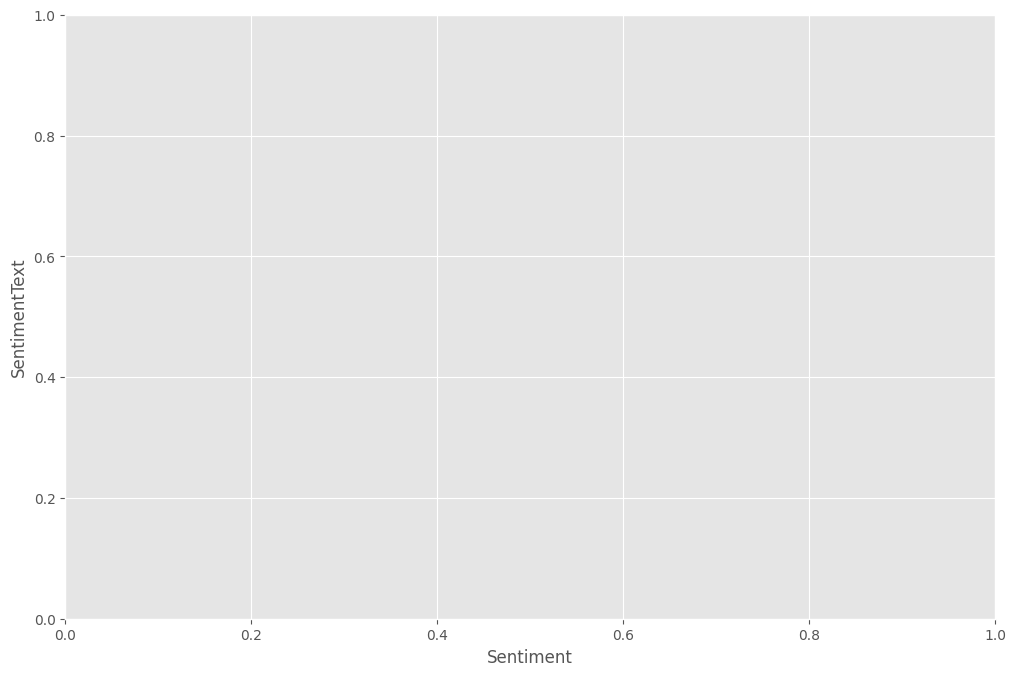

In [ ]:
# https://www.kaggle.com/aryantiwari123/tweets-sentiment-analysis

plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.xlabel('Sentiment')
plt.ylabel('SentimentText')
sns.kdeplot(data['Sentiment'],shade=True,color='blue')
plt.show()

## **Histograms/Distributions**

In [ ]:
# https://www.kaggle.com/khotijahs1/using-autonlp-for-sentiment-analysis



train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,
                                            score_type="balanced_accuracy",
                                            top_num_features=500,
                                            modeltype="Classification",
                                            verbose=2,
                                            build_model=True)

## **Baseline Accuracy**

In [ ]:
%who DataFrame

In [ ]:
print(training_df['sentiment'].value_counts(normalize=True))


# **Models**

**Lexicon Models (10)**
* Jockers-Rinker (extracted from SyuzhetR)
* Jockers (extracted from SyzuhetR)
* NRC
* Hu-Liu (aka Bing)
* AFINN
* SentiWord
* SenticNet
* Loughlan-McDonald 
* LIWC
* MPQA

**Lexicon + Heuristic Rules (10)**
* VADER
* SentimentR

**Embeddings (2)**
* TextBlob
* Flair

**Supervised Models (10)**
* Multinomial Naive Bayes
* SVC
* Linear Regression
* Logistic Regression
* Random Forest
* XGBoost
* CATBoost
* AdaBoost
* AutoML: A
* AutoML: B

**Linguistic Models (2)**
* Stanza
* Pattern 

**Deep Neural Networks (4)**
* Fully Connected Networks
* RNN
* LSTN
* CNN
* AutoML:  https://github.com/IntelLabs/nlp-architec

**Transformer Models (8)**
* roberta15lg', 
* Multilingual BERT: NLPTown
* BERT tuned on Yelp
* BERT Dual Coded English/Hindu
* BERT tuned on IMDB
* Distilled BERT (Huggingface default)
* T5 tuned on IMDB
* Multilingual RoBERTa XML 8 Languages



## **Lexicons**

* https://github.com/trinker/lexicon/tree/master/data

### **Jockers-Rinker**

In [ ]:
lexicon = 'jockersrinker'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_jockers_rinker.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_jockers_rinker.rda?raw=true"
dst_path = "jockersrinker.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_jockersrinker_df = res['hash_sentiment_jockers_rinker']
lexicon_jockersrinker_df.head()
lexicon_jockersrinker_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_jockersrinker_df.set_index('x', inplace=True)
lexicon_jockersrinker_dt = lexicon_jockersrinker_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_jockersrinker_dt

aword = 'berserk'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_jockersrinker_dt[aword]}]')

In [ ]:
# import rpy2.robjects as robjects
# !mkdir lexicons

In [ ]:
training_df = pd.DataFrame()

In [ ]:
training_df.info()

In [ ]:
%%time

# Note: 3.3s

training_df['jockersrinker'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.jockersrinker)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **HuLiu (aka Bing)**

In [ ]:
lexicon = 'huliu'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_huliu.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_huliu.rda?raw=true"
dst_path = "huliu.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_huliu_df = res['hash_sentiment_huliu']
lexicon_huliu_df.head()
lexicon_huliu_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_huliu_df.set_index('x', inplace=True)
lexicon_huliu_dt = lexicon_huliu_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_huliu_dt

aword = 'berserk'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_huliu_dt[aword]}]')

In [ ]:
training_df

In [ ]:
%%time

# Note: 4.17s (huliu)

training_df['huliu'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.huliu)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **NRC**

In [ ]:
lexicon = 'nrc'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_nrc.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_nrc.rda?raw=true"
dst_path = "nrc.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_nrc_df = res['hash_sentiment_nrc']
lexicon_nrc_df.head()
lexicon_nrc_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_nrc_df.set_index('x', inplace=True)
lexicon_nrc_dt = lexicon_nrc_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_nrc_dt

aword = 'berserk'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_nrc_dt[aword]}]')

In [ ]:
training_df

In [ ]:
%%time

# Note: 3.02s (huliu)

training_df['nrc'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.nrc)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **SentiWord**

* https://www.sentic.net/sentic-patterns.pdf
* https://www.quora.com/Sentiment-Analysis-How-does-CLiPS-Pattern-calculate-the-polarity-of-a-sentence-What-is-the-maths-involved-in-it 
* https://github.com/clips/pattern/wiki/pattern-en#sentiment


In [ ]:
lexicon = 'sentiword'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_sentiword.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_sentiword.rda?raw=true"
dst_path = "sentiword.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_sentiword_df = res['hash_sentiment_sentiword']
lexicon_sentiword_df.head()
lexicon_sentiword_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_sentiword_df.set_index('x', inplace=True)
lexicon_sentiword_dt = lexicon_sentiword_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_sentiword_dt

aword = 'angry'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_sentiword_dt[aword]}]')

In [ ]:
training_df

In [ ]:
%%time

# Note: 3.28s (huliu)

training_df['sentiword'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.sentiword)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **SenticNet**

In [ ]:
lexicon = 'senticnet'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_senticnet.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_senticnet.rda?raw=true"
dst_path = "senticnet.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_huliu_df = res['hash_sentiment_senticnet']
lexicon_huliu_df.head()
lexicon_huliu_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_huliu_df.set_index('x', inplace=True)
lexicon_huliu_dt = lexicon_huliu_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_huliu_dt

aword = 'angry'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_huliu_dt[aword]}]')

In [ ]:
training_df

In [ ]:
%%time

# Note: 3.29s (senticnet)

training_df['senticnet'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.senticnet)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **Loughran-McDonald**

In [ ]:
lexicon = 'lmcd'

# !wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_loughran_mcdonald.rda

In [ ]:
# Get Lexicon from SentimentR github repo

url = "https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_loughran_mcdonald.rda?raw=true"
dst_path = "lmcd.rda"
dst_path_again = pyreadr.download_file(url, dst_path)
res = pyreadr.read_r(dst_path)
print(f'type(res): {type(res)}\n')
res

# Convert to DataFrame
lexicon_huliu_df = res['hash_sentiment_loughran_mcdonald']
lexicon_huliu_df.head()
lexicon_huliu_df.info()

# Reshape into Dictionary[word] = sentiment
lexicon_huliu_df.set_index('x', inplace=True)
lexicon_huliu_dt = lexicon_huliu_df.to_dict()['y']

# Set to working lexicon
lexicon_dt = lexicon_huliu_dt

aword = 'bad'
print('\n')
print(f'The word: [{aword}] has a [{lexicon}] sentiment value of [{lexicon_huliu_dt[aword]}]')

In [ ]:
training_df

In [ ]:
%%time

# Note: 2.8s (lmcd)

training_df['lmcd'] = training_df['text_clean'].apply(lambda x: lexicon_sentiment(lexicon_dt, x))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.lmcd)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **MPQA**

* https://mpqa.cs.pitt.edu/

In [ ]:
!wget https://mpqa.cs.pitt.edu/corpora/mpqa_corpus/mpqa_corpus_3_0

In [ ]:
!ls -altr

In [ ]:
!head -n 10 mpqa_corpus_3_0

### **LIWC**

* https://github.com/search?q=LIWC
* https://github.com/search?q=LIWC

### **AFINN**

In [ ]:
!pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn(language='en')

In [ ]:
# Test

asent = 'I hate terrible awful shit'
asent_afinn_score = afinn.score(asent)
print(f'AFINN raw sentiment: {asent_afinn_score}')

afinn_lnorm = asent_afinn_score/len(asent.split())
print(f'AFINN length-normed sentiment: {afinn_lnorm}')

In [ ]:
# Temp Cleanup

# training_df.rename(columns={'afinn':'afinn_polarity'}, inplace=True)
# training_df.drop(columns=['afinn_polarity', 'afinn_sentiment'], inplace=True)

In [ ]:
%%time

# Note: 7m6s

training_df['afinn_polarity'] = training_df['text_clean'].apply(lambda x: afinn.score(x))
training_df.head()

In [ ]:
# Create a tuple format to match all other model outputs

training_df['afinn'] = training_df['afinn_polarity'].apply(lambda x: ('pos', x) if x>0 else ('neg', x))
# training_df['afinn_sentiment'] = training_df['afinn_polarity'].apply(lambda x: 'pos' if x>0 else 'neg')
training_df.drop(columns=['afinn_polarity'], inplace=True)

training_df.head()

In [ ]:
# Extract Polarity float values as pd.Series

sentiment_tup, polarity_tup = zip(*training_df.afinn)
polarity_ser = pd.Series(polarity_tup)
polarity_ser

In [ ]:
# Get Lexicon predictions

y_pred = np.where(polarity_ser>0, 1, 0)

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

### **Jockers (in %%R)**

In [ ]:
lexicon = 'jockersrinker'

!wget https://github.com/trinker/lexicon/blob/master/data/hash_sentiment_jockers_rinker.rda

In [ ]:
%%R

install.packages('syuzhet')

In [ ]:
%%R

library('syuzhet')

In [ ]:
%%R

syuzhet_all_df$syuzhet <- syuzhet::get_sentiment(corpus_sents_v, method='syuzhet')
syuzhet_all_df$bing <- syuzhet::get_sentiment(corpus_sents_v, method='bing')
syuzhet_all_df$afinn <- syuzhet::get_sentiment(corpus_sents_v, method='afinn')
syuzhet_all_df$nrc <- syuzhet::get_sentiment(corpus_sents_v, method='nrc')

### **Save Checkpoint**

In [ ]:
training_df.to_csv('sb_lexicons.csv')

## **Lexicons + Heuristics**

### **VADER**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

In [ ]:
# test

# testimonial = TextBlob(training_df.iloc[0]['text_raw'])

test_str = "The food was great!"


vs = vader_analyzer.polarity_scores(test_str)
print("{:-<65} {}".format(test_str, str(vs)))

In [ ]:
# Temp Util

# training_df.rename(columns={'vader_full':'vader_all'},inplace=True)

In [ ]:
%%time

# Note: 6m18s

training_df['vader_orig'] = training_df['text_clean'].apply(lambda x: vader_analyzer.polarity_scores(x))
training_df.head()

In [ ]:
# Check range of 'neu' to see if 'polarity' value should be normalized

vader_neu_ser = training_df['vader_orig'].apply(lambda x: x['neu'])
vader_neu_ser.rolling(500, center=True).mean().plot();

In [ ]:
# Create a tuple format to match all other model outputs

# TODO: Weight the pos/neg values by C(1/neu) factor

training_df['vader'] = training_df['vader_orig'].apply(lambda x: ('pos', x['pos']) if x['compound']>0.05 else ('neg', x['neg']))
# training_df['afinn_sentiment'] = training_df['afinn_polarity'].apply(lambda x: 'pos' if x>0 else 'neg')
# training_df.drop(columns=['afinn_polarity'], inplace=True)

training_df.head()

In [ ]:
# Optional: Drop Original VADER values

# training_df.drop(columns=['vader_orig'], inplace=True)

In [ ]:
# Extract Polarity float values as pd.Series
"""
sentiment_tup, polarity_tup = zip(*training_df.vader)
polarity_ser = pd.Series(polarity_tup)
polarity_ser
""";

In [ ]:
# Get Lexicon predictions

# y_pred = np.where(polarity_ser>0.05, 1, 0)
y_pred = training_df.vader.apply(lambda x: 1 if x[0] == 'pos' else 0)
y_pred

In [ ]:
# Get Metrics on Lexicon Sentiment Classifier

lexicon_metrics(y, y_pred)

In [ ]:
# Check large inbalance between classes

vader_neu_ser = training_df['vader'].apply(lambda x: x[0])
vader_neu_ser.hist()

### **SentimentR (in %%R)**

Python and R Together

* https://dev.to/hkmoon/sharing-data-among-python-r-java-javascript-in-jupyter-notebook-p8k
* https://github.com/rpy2/rpy2-arrow/blob/main/doc/notebooks/faster_rpy2_conversion.ipynb


In [ ]:
%load_ext rpy2.ipython

In [ ]:
training_db

In [ ]:
training_v = training_df['text_clean'].to_list()
type(training_v)

In [ ]:
%%R

install.packages('sentimentr')
library('sentimentr')



In [ ]:
%%R -i training_db

# Set Output Sentiments Datafile names
sentimentr_output_prefix = 'sum_sentiments_sentimentR_7models_sentimenttimeraw_'
sentimentr_output_suffix = '.csv'
sentimentr_output = trimws(paste0(sentimentr_output_prefix, training_db, sentimentr_output_suffix, sep=' '))

In [ ]:
%%R -i training_v -o sentimentr_v

sentimentr_v <- data.frame(sent_raw = training_v)

In [ ]:
sentimentr_v.head()

In [ ]:
%%R

# Add other lexicon sentiments
sentimentr_all_df$jockers_rinker <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_jockers_rinker, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$jockers <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_jockers, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$huliu <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_huliu, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$lmcd <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_loughran_mcdonald, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$nrc <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_nrc, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$senticnet <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_senticnet, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$sentiword <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_sentiword, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment

## **Embeddings**

* https://neptune.ai/blog/document-classification-small-datasets
* https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair (TB,VADER,Flair)

### **FastText**

* https://github.com/facebookresearch/fastText
* https://medium.com/@lope.ai/sentiment-analysis-example-using-fasttext-6b1b4d334c53
* https://colab.research.google.com/drive/1bb2OWQcDDolESwhkATD0el0RvF33fenZ#scrollTo=X5PWbhOzZ3ze
* https://fasttext.cc/docs/en/english-vectors.html (embeddings)
* https://github.com/RaRe-Technologies/gensim/blob/37e49971efa74310b300468a5b3cf531319c6536/docs/notebooks/Word2Vec_FastText_Comparison.ipynb
* https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/
* https://github.com/jatinmandav/Neural-Networks/tree/master/Sentiment-Analysis (Universal Sentence Encoder 77%, fastText 69%, word2vec 69%)
* https://github.com/search?q=fasttext+sentiment

Code:
* https://github.com/charlesmalafosse/FastText-sentiment-analysis-for-tweets/blob/master/betsentiment_sentiment_analysis_fasttext.py (tweets)
* https://gist.github.com/hiteshn97/8f222a2773e11d6921b937abaa21ab75 (fastText,  keras)

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip
%cd fastText-0.9.2
!make

In [ ]:
!ls

In [ ]:
!ls ../

In [ ]:
%%time

train = open('tweets.train','w')  
test = open('tweets.valid','w')  
# with open('../sentiment140.1600000.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
with open('../sentiment140.csv', mode='r', encoding = "ISO-8859-1") as csv_file:  
    csv_reader = csv.DictReader(csv_file, fieldnames=['target', 'id', 'date', 'flag', 'user', 'text'])
    line = 0
    for row in csv_reader:
        # Clean the training data
        # First we lower case the text
        text = row["text"].lower()
        # remove links
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
        #Remove usernames
        text = re.sub('@[^\s]+','', text)
        # replace hashtags by just words
        text = re.sub(r'#([^\s]+)', r'\1', text)
        #correct all multiple white spaces to a single white space
        text = re.sub('[\s]+', ' ', text)
        # Additional clean up : removing words less than 3 chars, and remove space at the beginning and teh end
        text = re.sub(r'\W*\b\w{1,3}\b', '', text)
        text = text.strip()
        line = line + 1
        # Split data into train and validation
        if line%16 == 0:
            print(f'__label__{row["target"]} {text}', file=test)
        else:
            print(f'__label__{row["target"]} {text}', file=train)

In [ ]:
%%time

!./fasttext supervised -input tweets.train -output model_tweet
# !./fasttext supervised -input tweets.train -output model_tweet -epoch 30 -lr 0.1
# !./fasttext supervised -input tweets.train -output model_tweet -dim 300 -label __label__ -pretrainedVecctors wiki.ar.vec # Arabic for Netflix

In [ ]:
%%time

!./fasttext test model_tweet.bin tweets.valid

In [ ]:
!pip install fasttext

In [ ]:
from fasttext import load_model

In [ ]:
classifier = load_model('model_tweet.bin')

In [ ]:
text_ls = ['Ugghhh... Not happy at all! sorry', 'Happyyyyyyy', 'OH yeah! lets rock.']
labels = classifier.predict(text_ls)
print(labels)

In [ ]:
with open('test.txt','w') as fp:
  fp.write("\n".join(text_ls))

In [ ]:
!cat test.txt

In [ ]:
!./fasttext predict model_tweet.bin test.txt

In [ ]:
!./fasttext predict-prob model_tweet.bin test.txt

In [ ]:
!ls

In [ ]:
!ls ../

In [ ]:
!head -n 10 tweets.train

!cat tweets.train | wc -l

In [ ]:
# Load Different Embeddings

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

In [ ]:
!ls

In [ ]:
!unzip crawl-300d-2M-subword.zip

In [ ]:
!ls 

In [ ]:
import io

fname = 'crawl-300d-2M-subword.vec'

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

load_vectors(fname)

In [ ]:
%cd ..

### **TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
# Test

test_str = "The food was great!"

testimonial = TextBlob(test_str)
print(testimonial.sentiment)

print('\n\n')
TextBlob(test_str).sentiment.polarity

In [ ]:
TextBlob(test_str).sentiment.subjectivity

In [ ]:
%%time

# Note: 2m18s

training_df['textblob_orig'] = training_df['text_clean'].apply(lambda x: (round(TextBlob(x).sentiment.polarity,4), round(TextBlob(x).sentiment.subjectivity,4)))
training_df.head()

In [ ]:
training_df.head()

In [ ]:
# Create a tuple format to match all other model outputs

# TODO: Weight the pos/neg values by C(1/neu) factor

training_df['textblob'] = training_df['textblob_orig'].apply(lambda x: ('pos', round(x[0],4)) if x[0]>0 else ('neg', round(x[0],4)))
# training_df['afinn_sentiment'] = training_df['afinn_polarity'].apply(lambda x: 'pos' if x>0 else 'neg')
# training_df.drop(columns=['afinn_polarity'], inplace=True)

training_df.head()

In [ ]:
# Optional: Drop Original TextBlob values

# training_df.drop(columns=['textblob_orig'], inplace=True)

### **Flair**

* https://colab.research.google.com/drive/1tUr5t0ZJ-I4Ni40dkbjku92HAU5SyR_2?usp=sharing (TextBlob, Flair, VADER with UnivSentEmbd)

In [ ]:
%whos

In [ ]:
# RESTART REQUIRED

!pip install flair


In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')


In [ ]:
sentence = Sentence('The food was great!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

In [ ]:
sentence = Sentence(['I think the food kinda sucked really bad.', 'I hated it!'])
classifier.predict(sentence)

# print sentence with predicted labels
print(f'Sentence above is: {sentence}')

print(f'Sentence above is: {type(sentence.labels[0])}')

### **Google Universal Sentence Encoder**

* https://tfhub.dev/google/universal-sentence-encoder/

## **Linguistic Models**

### **Stanza**

### **Pattern**

* https://github.com/clips/pattern/wiki/pattern-en#sentiment

## **Deep Neural Networks**

* https://github.com/thoailinh/Sentiment-Analysis-using-BERT (Viet Comparison)

* https://github.com/Feuoy/sentiment-analysis (Chinese Comparison)

* https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook#CNN-Model
* https://github.com/bentrevett/pytorch-sentiment-analysis

* https://github.com/nileshsah/deep-text-classifier/blob/master/inshorts_notebook.ipynb
* https://github.com/saurabhrathor/InceptionModel_SentimentAnalysis (fasttext emb CNN+LSTM) BB_twtr SemEval2017
* https://github.com/kaliahinartem/twitter_sentiment_analysis
* https://github.com/leelaylay/TweetSemEval


### **Common Setup**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasClassifier

from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
training_df.info()

In [ ]:
# Split labeled dataset into training, validation and test sets
# e.g. for IMDB 50k reviews: Out of 50k dataset, 36k for training, 4k for Validationa and 10k for testing

X_train, X_test, y_train, y_test = train_test_split(training_df['text_raw'], training_df['polarity'],test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

[x.shape for x in [X_train,X_valid,X_test]]


In [ ]:
X_train.shape
print('\n')
type(X_train)

In [ ]:
type(X_train)

In [ ]:
X_train[:2]

In [ ]:
%%time

# Tokenize text

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(training_df.text_raw)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train1[2])

In [ ]:
type(X_train1)
print('\n')
X_train1

In [ ]:
corpus_sents_df.head()

In [ ]:
corpus_sents_df['sent_clean'] = corpus_sents_df['sent_clean'].astype('string')
X_corpus_ser = corpus_sents_df['sent_clean']
type(X_corpus_ser)
X_corpus_ser[:2]

In [ ]:
X_corpus1 = tokenizer.texts_to_sequences(X_corpus_ser)
type(X_corpus1)
X_corpus_ser[4]
X_corpus1[4]

In [ ]:
"""
X_corpus = np.asarray(tokenizer.texts_to_sequences(X_corpus_ser)) # , dtype=int)
X_corpus.shape
type(X_corpus)
X_corpus
""";

In [ ]:
"""
X_corpus = np.array(tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])) # , dtype=int)
X_corpus.shape
type(X_corpus)
X_corpus
""";

In [ ]:
"""
tokens_ls_ls = tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])
X_corpus_ar = np.array([np.array(lsi) for lsi in tokens_ls_ls])
X_corpus_ar
""";

In [ ]:
"""
X_corpus = np.asarray(tokenizer.texts_to_sequences(corpus_sents_df['sent_clean'])) # , dtype=int)
# X_corpus = X_corpus.astype('int32')
# npa = np.asarray(someListOfLists, dtype=np.float32)
X_corpus[:3]
print('\n')
type(X_corpus)
""";

In [ ]:
print(X_train[2])

In [ ]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
seq_lens = [len(s) for s in X_corpus1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
# Set max sequence and pad where necessary

maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

In [ ]:
X_corpus1 = pad_sequences(X_corpus1, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

### **Fully Connected Networks (FCN)**

In [ ]:
# Build the Network

embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
%%time

# Train the Network

history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

In [ ]:
y_test1_pred = model.predict(X_test1)
y_test1_pred

In [ ]:
y_test1_pred.size

In [ ]:
y_test1_pred_bin = np.where(y_test1_pred > 0.5, 1, 0)
y_test1_pred_bin = y_test1_pred_bin.squeeze()

In [ ]:
type(y_test1_pred_bin[0])

In [ ]:
y_test

In [ ]:
y_test_fl = y_test.apply(lambda x: float(x))
y_test_fl

In [ ]:
y_test_ar = np.array(y_test_fl, dtype=np.float32)
type(y_test_ar)
print('\n')
y_test_ar.shape
print('\n')
y_test_ar

In [ ]:
type(y_test1_pred)
print('\n')
y_test1_pred = y_test1_pred.squeeze()
y_test1_pred.shape
print('\n')
y_test1_pred

In [ ]:
accuracy_score(y_test, y_test1_pred_bin)

In [ ]:
plot_history(history)

In [ ]:
plt.figure(figsize=(4,4))
# sns.heatmap(confusion_matrix(y_test, model.predict(X_test1)),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
sns.heatmap(confusion_matrix(y_test, y_test1_pred_bin),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show();

In [ ]:
y_corpus1_pred = model.predict(X_corpus1)
type(y_corpus1_pred)
print('\n')
print(y_corpus1_pred)

In [ ]:
fcn_ar = y_corpus1_pred.squeeze()
fcn_ar.shape

In [ ]:
corpus_sents_df['fcn'] = pd.Series(fcn_ar)

In [ ]:
# corpus_sents_df['fcn'].apply(lambda x: 6*(x-0.3)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['fcn'].apply(lambda x: 8*(x-0.55)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['sentimentr_stdscaler'].rolling(900, center=True).mean().plot(label='SentimentR')
corpus_sents_df['vader_stdscaler'].rolling(900, center=True).mean().plot(label='VADER')
plt.legend(loc='best');
plt.title(f'{CORPUS_FULL}\nFully Connected Neural Net (Default w/IMDB) SMA=10%');

### **RNN**

### **LSTM**

**Ref: https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#4.-Predictive-Modelling-using-Machine-Learning**

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))
  
  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()



In [ ]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

In [ ]:
##create sequences of reviews
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test =  tokenizer.texts_to_sequences(X_test)

In [ ]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

In [ ]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

In [ ]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

In [ ]:
#create padded sequences
pad_train=pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [ ]:
#Splitting training set for validation purposes
Xtrain,Xval,ytrain,yval=train_test_split(pad_train,y_train, test_size=0.2,random_state=10)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
#     #early_stop = EarlyStopping(monitor='val_accuracy', 
#                                mode='min', 
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain, 
                  validation_data = (Xval,yval), 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [ ]:
%%time

# NOTE: 3m51s

D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(Xtrain,Xval,ytrain,yval,V,D,max_seq_len,epochs)

In [ ]:
#Plot accuracy and loss

plotLearningCurve(r,n_epochs)

In [ ]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(pad_test,y_test)
print(dict(zip(model.metrics_names, result)))

In [ ]:
#Generate predictions for the test dataset
ypred = model.predict(pad_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
X_corpus_ser = corpus_sents_df['sent_clean']
type(X_corpus_ser)
X_corpus_ser[:5]

In [ ]:
type(X_corpus)

In [ ]:
##create sequences of reviews
seq_corpus = tokenizer.texts_to_sequences(X_corpus_ser)
# seq_test =  tokenizer.texts_to_sequences(X_test)

In [ ]:
type(seq_corpus)

In [ ]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_corpus]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

In [ ]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

In [ ]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

In [ ]:
max_seq_len

In [ ]:
#create padded sequences
pad_corpus=pad_sequences(seq_corpus,truncating = 'post', padding = 'pre',maxlen=584) # max_seq_len)
# pad_test=pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [ ]:
#Generate predictions for the corpus dataset
y_corpus_pred = model.predict(pad_corpus)
y_corpus_pred.shape
y_corpus_pred

In [ ]:
lstm_ar = y_corpus_pred.squeeze()
lstm_ar.shape

In [ ]:
corpus_sents_df['lstm'] = pd.Series(lstm_ar)

In [ ]:
corpus_sents_df['fcn'].apply(lambda x: 8*(x-0.55)).rolling(900, center=True).mean().plot(label='Fully Connected Neural Net')
corpus_sents_df['lstm'].apply(lambda x: 5*(x-0.47)).rolling(900, center=True).mean().plot(label='LSTM Neural Net')
corpus_sents_df['sentimentr_stdscaler'].rolling(900, center=True).mean().plot(label='SentimentR')
corpus_sents_df['vader_stdscaler'].rolling(900, center=True).mean().plot(label='VADER')
plt.legend(loc='best');
plt.title(f'{CORPUS_FULL}\nLSTM Neural Net (Default w/IMDB) SMA=10%');

In [ ]:
corpus_root_filename

In [ ]:
corpus_sents_df.to_csv(f'sum_4andDNN_{corpus_root_filename}.csv')

**Ref: https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook#CNN-Model**

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict(X_test1))

In [ ]:
history.history

In [ ]:
plot_history(history)

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test1)),annot=True,cmap='coolwarm',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()

### **CNN**

* https://github.com/bentrevett/pytorch-sentiment-analysis (CNN w/GLoVE and IMDB)

* https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [ ]:
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
%%time

# NOTE: 

model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

In [ ]:
accuracy_score(y_test, model.predict_classes(X_test1))

In [ ]:
plot_history(history)

### **BERT**

In [ ]:
# https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#5.-Predictive-Modelling-using-Deep-Learning

#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
#pass our texts to the tokenizer

Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object

In [ ]:
#preparing our datasets

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [ ]:
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

In [ ]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

In [ ]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [ ]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

In [ ]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(32))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## **AutoKeras**

* https://autokeras.com/tutorial/text_classification/

In [ ]:
# RESTART RUNTIME

!pip install autokeras

In [ ]:
import os

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_files

import autokeras as ak

In [ ]:
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz",
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True,
)

# set path to dataset
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), "aclImdb")

classes = ["pos", "neg"]
train_data = load_files(
    os.path.join(IMDB_DATADIR, "train"), shuffle=True, categories=classes
)
test_data = load_files(
    os.path.join(IMDB_DATADIR, "test"), shuffle=False, categories=classes
)

x_train = np.array(train_data.data)
y_train = np.array(train_data.target)
x_test = np.array(test_data.data)
y_test = np.array(test_data.target)

print(x_train.shape)  # (25000,)
print(y_train.shape)  # (25000, 1)
print(x_train[0][:50])  # this film was just brilliant casting

In [ ]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=1
)  # It only tries 1 model as a quick demo.

# Feed the text classifier with training data.
clf.fit(x_train, y_train, epochs=2)

# Predict with the best model.
predicted_y = clf.predict(x_test)

# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

In [ ]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
)

In [ ]:
"""
split = 5000
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]

clf.fit(
    x_train,
    y_train,
    epochs=2,
    # Use your own validation set.
    validation_data=(x_val, y_val),
)
""";

In [ ]:
input_node = ak.TextInput()
output_node = ak.TextBlock(block_type="ngram")(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=2)

## **Pytorch-Optimize**

* https://github.com/jettify/pytorch-optimizer (20210705 2k)

## **Keras-Tuner**

* https://github.com/keras-team/keras-tuner

# **END**

# **[OLD STARTING POINT]**

In [ ]:
groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

**Install Libraries**

In [ ]:
# fast detection of character set encoding for text/files

!pip install cchardet

     |████████████████████████████████| 263 kB 5.0 MB/s 


In [ ]:
!pip install pysbd

In [ ]:
# common ML code

!pip install sklearn

In [ ]:
%pip install contractions

In [ ]:
!pip install pysbd

In [ ]:
!pip install spacy

In [ ]:
import pysbd
import spacy
from pysbd.utils import PySBDFactory

# Conditionally loads english or french PySBD/NLTK Sentence tokenizers 
#   in parags2sents()

# nlp = spacy.blank('en')

# nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:


# or you can use it implicitly with keyword
# pysbd = nlp.create_pipe('pysbd')
# nlp.add_pipe(pysbd)

# doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
# print(list(doc.sents))
# [My name is Jonas E. Smith., Please turn to p. 55.]

**Import Libraries**

In [ ]:
import os
import sys
import io
import glob
import json
import contextlib

In [ ]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import string

In [ ]:
from itertools import cycle  # For plotly

import collections
from collections import OrderedDict

In [ ]:
# Import libraries for logging

import logging
from datetime import datetime
import time                     # (TODO: check no dependencies and delete)
from time import gmtime, strftime

In [ ]:
import nltk

# Download for sentence tokenization
import nltk.data
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download for nltk/VADER sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

In [ ]:
minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
# Zoom interpolates new datapoints between existing datapoints to expand a time series 

from scipy.ndimage.interpolation import zoom

In [ ]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
from scipy import signal
from scipy.signal import argrelextrema

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess
from statsmodels import robust

In [ ]:
corpus_sects_df = pd.DataFrame()

**Define Library-Dependent Objects**

In [ ]:
import contractions

In [ ]:
# Necessary to define before defining Utility Functions using these DataFrames

corpus_sents_df = pd.DataFrame()

**Configure Jupyter Notebook**

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure matplotlib and seaborn

# Plotting pretty figures and avoid blurry images
# %config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
# sns.set_context('talk')

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100
plt.rc('figure', facecolor='white')

In [ ]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

%load_ext google.colab.data_table

In [ ]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from IPython.display import HTML

import plotly.graph_objects as go
import plotly.express as px
import plotly

In [ ]:
from IPython.display import HTML, display

def my_css():
   display(HTML("""<style>table.dataframe td{white-space: nowrap;}</style>"""))

get_ipython().events.register('pre_run_cell', my_css)

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_transformer_df['sent_raw'])

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(corpus_sentimentr_df.iloc[:10]['sent_raw'])

**Configuration Details Snapshot**

In [ ]:
# Snap Shot of Time, Machine, Data and Library/Version Blueprint
# TODO:

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
anyascii                      0.3.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4         

In [ ]:
# !pip install watermark

In [ ]:
# %load_ext watermark

In [ ]:
# %watermark

# **Delete/Reset Main DataStructure**

In [ ]:
%whos DataFrame

In [ ]:
# %reset_selective corpus_sents_df corpus_parags_df corpus_sects_df corpus_chaps_df

In [ ]:
# %reset_selective corpus_sentimentr corpus_syuzhetr_df corpus_transformer_df corpus_unified_df

In [ ]:
# %reset_selective temp_baseline_df temp_df temp_sentimentr_df temp_syuzhetr_df temp_transformer_df unified_crux_df corr_df

# **Connect to Corpus Text files**

## **Option (a): Connect to Google gDrive**

In [ ]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [ ]:
# Select the Corpus subdirectory on your Google gDrive

# Done
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/imcewan_machineslikeme" #@param {type:"string"}


# gdrive_subdir = "./research/2021/sa_book_code/books_sa/cdickens_greatexpectations" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/ddefoe_robinsoncrusoe" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/emforster_howardsend" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/fdouglass_narrativelifeslave" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/fscottfitzgerald_thegreatgatsby" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/geliot_middlemarch" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/hjames_portraitofalady" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/homer_odyssey" #@param {type:"string"}
gdrive_subdir = "./research/2021/sa_book_code/books_sa/jausten_prideandprejudice" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/jconrad_heartofdarkness" #@param {type:"string"} 
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/jjoyce_portraitoftheartist" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/jkrowling_harrypotter" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/mproust_time" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/staugustine_confessions" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/tmorrison_beloved" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/vwoolf_tothelighthouse" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/vwoolf_mrsdalloway" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/vwoolf_thewaves" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/vwoolf_orlando" #@param {type:"string"}
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/vnabokov_palefire" #@param {type:"string"}

# Current
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/homer_odyssey" #@param {type:"string"}

# To do
# gdrive_subdir = "./research/2021/sa_book_code/books_sa/geliot_middlemarch" #@param {type:"string"}

CORPUS_SUBDIR = gdrive_subdir
corpus_filename = CORPUS_SUBDIR

# Change to working subdirectory
if flag_first_run == True:
  full_path_str = gdrive_subdir
  flag_first_run = False
else:
  full_path_str = f'/gdrive/MyDrive{gdrive_subdir[1:]}'

%cd $full_path_str


/gdrive/MyDrive/research/2021/sa_book_code/books_sa/jausten_prideandprejudice


## **Option (b): Upload Corpus Textfile**

***Only do this if your Google subdirectory doesn't already contain a plain text file of your Corpus or you wish to overwrite it and use a newer version***

In [ ]:
# Execute this code cell to upload plain text file of corpus
#   Should be *.txt format with paragraphs separated by at least 2 newlines

uploaded = files.upload()

In [ ]:
# Verify file was uploaded

# Get uploaded filename
corpus_filename = list(uploaded.keys())[0]
print(f'Uploaded Corpus filename is: {corpus_filename}')
CORPUS_FILENAME = corpus_filename

!ls -al $corpus_filename

# **Configuration (Manual)**

In [ ]:
# Verify subdirectory change

!pwd
!ls -altr *

# TODO: Intelligently automate the filling of form based upon directory

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/jausten_prideandprejudice
-rw------- 1 root root 778035 Sep 16 22:10 jausten_prideandprejudice.txt


In [ ]:
# CORPUS_TITLE = 'Beloved' #@param {type:"string"}
# CORPUS_AUTHOR = "Toni Morrison" #@param {type:"string"}
# CORPUS_FILENAME = "tmorrison_beloved.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/tmorrison_belovedy"  #@param {type:"string"}

# CORPUS_TITLE = 'Confessions' #@param {type:"string"}
# CORPUS_AUTHOR = "Saint Augustine" #@param {type:"string"}
# CORPUS_FILENAME = "staugustine_confessions.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/staugustine_confessions"  #@param {type:"string"}

# CORPUS_TITLE = 'Great Expectations' #@param {type:"string"}
# CORPUS_AUTHOR = "Charles Dickens" #@param {type:"string"}
# CORPUS_FILENAME = "cdickens_greatexpectations.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/cdickens_greatexpectations" #@param {type:"string"}

# CORPUS_TITLE = 'Heart of Darkness' #@param {type:"string"}
# CORPUS_AUTHOR = "Joseph Conrad" #@param {type:"string"}
# CORPUS_FILENAME = "jconrad_heartofdarkness.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jconrad_heartofdarkness" #@param {type:"string"}

# ORPUS_TITLE = 'Howards End' #@param {type:"string"}
# CORPUS_AUTHOR = "EM Forster" #@param {type:"string"}
# CORPUS_FILENAME = "emforster_howardsend.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/emforster_howardsend" #@param {type:"string"}

# CORPUS_TITLE = 'Machines Like Me' #@param {type:"string"}
# CORPUS_AUTHOR = "Ian McEwan" #@param {type:"string"}
# CORPUS_FILENAME = "imcewan_machineslikeme.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/imcewan_machineslikeme" #@param {type:"string"}

# CORPUS_TITLE = 'Middlemarch' #@param {type:"string"}
# CORPUS_AUTHOR = "George Eliot" #@param {type:"string"}
# CORPUS_FILENAME = "geliot_middlemarch_wprelude.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/geliot_middlemarch"  #@param {type:"string"}

# CORPUS_TITLE = 'Mrs. Dalloway' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_mrsdalloway.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_mrsdalloway" #@param {type:"string"}

# CORPUS_TITLE = 'Narrative Life of Frederick Douglass' #@param {type:"string"}
# CORPUS_AUTHOR = "Frederick Douglass" #@param {type:"string"}
# CORPUS_FILENAME = "fdouglass_narrative.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/fdouglass_narrativelifeslave"  #@param {type:"string"}

# CORPUS_TITLE = 'Orlando' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_orlando.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_orlando" #@param {type:"string"}

# CORPUS_TITLE = 'Palefire - Commentary' #@param {type:"string"}
# CORPUS_AUTHOR = "Vladimir Nabokov" #@param {type:"string"}
# CORPUS_FILENAME = "vnabokov_palefire_commentary.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vnabokov_palefire" #@param {type:"string"}

# CORPUS_TITLE = 'Portrait of a Lady' #@param {type:"string"}
# CORPUS_AUTHOR = "Henry James" #@param {type:"string"}
# CORPUS_FILENAME = "hjames_portraitofalady.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/hjames_portraitofalady" #@param {type:"string"}

# CORPUS_TITLE = 'Portrait of the Artist as a Young Man' #@param {type:"string"}
# CORPUS_AUTHOR = "James Joyce" #@param {type:"string"}
# CORPUS_FILENAME = "jjoyce_portraitoftheartist.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jjoyce_portraitoftheartist" #@param {type:"string"}

CORPUS_TITLE = 'Pride and Prejudice' #@param {type:"string"}
CORPUS_AUTHOR = "Jane Austen" #@param {type:"string"}
CORPUS_FILENAME = "jausten_prideandprejustice.txt" #@param {type:"string"}
CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jausten_prideandprejustice" #@param {type:"string"}

# CORPUS_TITLE = 'Robinson Crusoe' #@param {type:"string"}
# CORPUS_AUTHOR = "Daniel Defoe" #@param {type:"string"}
# CORPUS_FILENAME = "ddefoe_robinsoncrusoe.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/ddefoe_robinsoncrusoe" #@param {type:"string"}

# CORPUS_TITLE = 'The Great Gatsby' #@param {type:"string"}
# CORPUS_AUTHOR = "F. Scott Fitzgerald" #@param {type:"string"}
# CORPUS_FILENAME = "fscottfitzgerald_thegreatgatsby.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/fscottfitzgerald_thegreatgatsby" #@param {type:"string"}

# CORPUS_TITLE = 'The Socerers Stone' #@param {type:"string"}
# CORPUS_AUTHOR = "J.K. Rowling" #@param {type:"string"}
# CORPUS_FILENAME = "hpotter1_sorcerersstone.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/jkrowling_harrypotter" #@param {type:"string"}

# CORPUS_TITLE = 'The Waves' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_thewaves.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_thewaves" #@param {type:"string"}

# CORPUS_TITLE = 'To The Lighthouse' #@param {type:"string"}
# CORPUS_AUTHOR = "Virginia Woolf" #@param {type:"string"}
# CORPUS_FILENAME = "vwoolf_tothelighthouse.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/vwoolf_tothelighthouse" #@param {type:"string"}

# CORPUS_TITLE = 'The Odyssey' #@param {type:"string"}
# CORPUS_AUTHOR = "Homer SButler" #@param {type:"string"}
# CORPUS_FILENAME = "sbutler_odyssey.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/sbutler_odyssey"  #@param {type:"string"}

# CORPUS_TITLE = 'The Odyssey' #@param {type:"string"}
# CORPUS_AUTHOR = "Homer EWilson" #@param {type:"string"}
# CORPUS_FILENAME = "ewilson_odyssey.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/homer_odyssey"  #@param {type:"string"}

# CORPUS_TITLE = 'The Guermantes Way - English' #@param {type:"string"}
# CORPUS_AUTHOR = "Marcel Proust" #@param {type:"string"}
# CORPUS_FILENAME = "mproust_3guermantesway_mtreharne_en.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/mproust_time"  #@param {type:"string"}

# CORPUS_TITLE = 'The Guermantes Way - French' #@param {type:"string"}
# CORPUS_AUTHOR = "Marcel Proust" #@param {type:"string"}
# CORPUS_FILENAME = "mproust_guermantes_fr.txt" #@param {type:"string"}
# CORPUS_SUBDIR = "./research/2021/sa_book_code/books_sa/mproust_time"  #@param {type:"string"}

CORPUS_LANGUAGE = "English" #@param ["English", "French"]

CHAPTER_HEADINGS = "CHAPTER" #@param ["CHAPTER", "BOOK", "None"]
CHAPTER_NUMBERING = "Arabic (1,2,...)" #@param ["Arabic (1,2,...)", "Roman (I,II,...)"]
SECTION_HEADINGS = "None" #@param ["SECTION (ArabicNo)", "SECTION (RomanNo)", "----- (Hyphens)", "None"]

LEXICONS_SUBDIR = "./research/2021/sa_book_code/books_sa/lexicons" #@param {type:"string"}

CORPUS_FULL = f'{CORPUS_TITLE} by: {CORPUS_AUTHOR}'

PLOT_OUTPUT = "Major" #@param ["None", "Major", "All"]

FILE_OUTPUT = "Major" #@param ["None", "Major", "All"]


gdrive_subdir = CORPUS_SUBDIR
corpus_filename = CORPUS_FILENAME
CORPUS_LANGUAGE = CORPUS_LANGUAGE.lower()
author_str = ''.join(CORPUS_AUTHOR.split()).lower()
author_abbr_str = (CORPUS_AUTHOR.split(' ')[0][0]+CORPUS_AUTHOR.split(' ')[1]).lower()
title_str = ''.join(CORPUS_TITLE.split()).lower()
title_str = re.sub(r'[^A-Za-z0-9]','', title_str).lower()

print(f'\nWorking Corpus Datafile: ------------------------------ \n\n    {CORPUS_SUBDIR}')
print(f'\nFull Corpus Title/Author: ------------------------------ \n\n    {CORPUS_FULL}')


if CHAPTER_HEADINGS == 'CHAPTER':
  if CHAPTER_NUMBERING == "Arabic (1,2,...)":
    # pattern_chap = r'CHAPTER [0123456789]{1,2} ' # [\.]?[^\n]*'
    pattern_chap = r'CHAPTER [0123456789]{1,2}[.]?[^\n]*' # [os.return]*'
  elif CHAPTER_NUMBERING == "Roman (I,II,...)":
    pattern_chap = r'CHAPTER[\s]{1,5}[IVXL]{1,10}[.:]?[\s]+' # [^\n]+'
    # pattern_chap = r'CHAPTER[\s]{1,}[IVXL]{1,10}[.:]?[^\n\r]*'
  else:
    print(f'ERROR: Illegal CHAPTER_NUMBERING value = {CHAPTER_NUMBERING}')

elif CHAPTER_HEADINGS == 'BOOK':
  if CHAPTER_NUMBERING == "Arabic (1,2,...)":
    pattern_chap = r'BOOK [0123456789]{1,2}[.]?[^\n]*'
  elif CHAPTER_NUMBERING == "Roman (I,II,...)":
    pattern_chap = r'[\s]*BOOK[\s]{1,5}[IVXL]{1,10}[.:]?[\s]+' # [.:]?[\s]*[^\n]*[\n\r]+' # ]{0,1}[^\n]*' # [^\n]*' # Problems with embedded 'Book'
  else:
    print(f'ERROR: Illegal CHAPTER_NUMBERING value = {CHAPTER_NUMBERING}')

elif CHAPTER_HEADINGS == "None":
  pattern_chap = r'CHAPTER [0123456789]{1,2}[.]?[^\n]*'

else:
  print(f'ERROR: Illegal CHAPTER_HEADINGS value = {CHAPTER_HEADINGS}')

# Default Section RegEx Pattern
pattern_sect = 'SECTION [0123456789]{1,2}[^\n]*'

if SECTION_HEADINGS == 'SECTION (ArabicNo)':
  # pattern_sect = r'SECTION [0-9]{1,2} [^\n]*'
  # TODO: [^\n] gets parsed into [^\\n] causing problems, so simplify
  pattern_sect = r'SECTION [0123456789]{1,2}[.:]?[^\n]*'
elif SECTION_HEADINGS == 'SECTION (RomanNo)':
  pattern_sect = r'SECTION [IVXL]{1,10}[.:]?[^\n\r]+' # } [A-Z \.-:—;-’\'"]*[\n]*'
elif SECTION_HEADINGS == '----- (Hyphens)':
  pattern_sect = r'^[- ]{3,}[^\n]*'
elif SECTION_HEADINGS == 'None':
  pass
else:
  print(f'ERROR: Illegal SECTION_HEADING value = {SECTION_HEADINGS}')

print(f'\nCHAPTER Headings: ------------------------------ \n\n    {CHAPTER_HEADINGS}')

print(f'\nSECTION Headings: ------------------------------ \n\n    {SECTION_HEADINGS}')


print(f'\nCorpus file information: ------------------------------ \n')
!ls -al $CORPUS_FILENAME

# Verify contents of Corpus File is Correctly Formatted
#   
# TODO: ./utils/verify_format.py



Working Corpus Datafile: ------------------------------ 

    ./research/2021/sa_book_code/books_sa/jausten_prideandprejustice

Full Corpus Title/Author: ------------------------------ 

    Pride and Prejudice by: Jane Austen

CHAPTER Headings: ------------------------------ 

    CHAPTER

SECTION Headings: ------------------------------ 

    None

Corpus file information: ------------------------------ 

ls: cannot access 'jausten_prideandprejustice.txt': No such file or directory


In [ ]:
corpus_filename
print('\n')
CORPUS_FULL

'jausten_prideandprejustice.txt'

'Pride and Prejudice by: Jane Austen'

# **Utility Functions (Auto)**

## **File Manipulations**

In [ ]:
# https://dev.to/bowmanjd/character-encodings-and-detection-with-python-chardet-and-cchardet-4hj7

import cchardet as chardet

from pathlib import Path
import sys

def get_file_encoding(filename):
    """Detect encoding and return decoded text, encoding, and confidence level."""
    filepath = Path(filename)

    # We must read as binary (bytes) because we don't yet know encoding
    blob = filepath.read_bytes()

    detection = chardet.detect(blob)
    encoding = detection["encoding"]
    confidence = detection["confidence"]
    text = blob.decode(encoding)

    return text, encoding, confidence

In [ ]:
# re.split(r'SECTION', 'There is one SECTION in this. - can you SECTION string', flags=re.I)

re.split(r'SECTION', 'There is one string', flags=re.I)


['There is one string']

## **Text Wrangling**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
print(lemmatizer.lemmatize("bats"))

bat


In [ ]:
test_str = "I love eating bats and driving many cars." #  around the darken town at night."

doc = nlp(test_str)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])
#> 'the strip bat be hang on -PRON- foot for good'

'-PRON- love eat bat and drive many car .'

In [ ]:
"""

def stem_str(text_str):
  '''
  Given a text string
  Return the same string with all tokens stemmed where possible
  '''

  from nltk.stem import WordNetLemmatizer # For stemming the sentence
  from nltk.stem import SnowballStemmer # For stemming the sentence


""";

In [ ]:
def lemmatize_str(text_str):
  '''
  Given a text string
  Return the same string with all tokens lemmatized where possible
  '''

  # NOTE: depends upon Setup above importing minimal SpaCy pipeline defined as [nlp]

  # Lemmaitization MAY help performance, but depends on SA Model and Corpus (see below)
  # https://opendatagroup.github.io/data%20science/2019/03/21/preprocessing-text.html 
  # Which library: NLTK, SpaCy, TextBlob, CLiPS Pattern, gensim, Stanford OpenNLP/Stanza, Flair, etc.
  # https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
  # Spelling, Contractions, etc
  # https://cnvrg.io/sentiment-analysis-python/

  text_lemma_ls = []

  token_ls = text_str.split()

  for atoken in token_ls:
    if len(atoken) > 2:
      print(f'lemmatizing: {atoken}')
      atoken_lemma = lemmatizer.lemmatize(atoken)
      print(f'    lemma: {atoken_lemma}')
      text_lemma_ls.append(atoken_lemma)
    else:
      print(f'skip lemmatizing')
      text_lemma_ls.append(atoken)

  text_lemma_str = ' '.join(text_lemma_ls)

  return text_lemma_str.strip()

# Test

test_str = "I love eating bats and driving many cars." #  around the darken town at night."

test_lemma_str = lemmatize_str(test_str)
print(f'test_lemma_str: {test_lemma_str}')

skip lemmatizing
lemmatizing: love
    lemma: love
lemmatizing: eating
    lemma: eating
lemmatizing: bats
    lemma: bat
lemmatizing: and
    lemma: and
lemmatizing: driving
    lemma: driving
lemmatizing: many
    lemma: many
lemmatizing: cars.
    lemma: cars.
test_lemma_str: I love eating bat and driving many cars.


In [ ]:
lemmatizer.lemmatize('eating')

'eating'

In [ ]:
def del_leadroman(str_raw):
  '''
  Given a text string
  Return the string with any possible leaning roman numerals removed [IVXLCM]
  '''


  # Rule 1: consecutive 'i' tokens indicate a roman numeral followed by 'I' pronoun
  pattern_doublei = re.compile(r'\b[iI][\s]+[iI]\b')
  str_clean1 = re.sub(pattern_doublei, "i", str_raw)

  # Rule 2: any [vxlcm]-only tokens are stray roman numerals
  pattern_romanno = re.compile(r'\b[vxlcm]{1,10}\b')
  str_clean2 = re.sub(pattern_romanno, "", str_clean1)

  return str_clean2


# Test

test_str = """I I was born in Tuckahoe, near Hillsborough, and about twelve miles from Easton, in Talbot county, Maryland. I have no accurate knowledge of my age, never having seen any authentic record containing it. By far the larger part of the slaves know as little of their ages as horses know of theirs, and it is the wish of most masters within my knowledge to keep their slaves thus ignorant. I do not remember to have ever met a slave who could tell of his birthday. They seldom come nearer to it than planting-time, harvest-time, cherry-time, spring-time, or fall-time. A want of information concerning my own was a source of unhappiness to me even during childhood. The white children could tell their ages. I could not tell why I ought to be deprived of the same privilege. I was not allowed to make any inquiries of my master concerning it. He deemed all such inquiries on the part of a slave improper and impertinent, and evidence of a restless spirit. The nearest estimate I can give makes me now between twenty-seven and twenty-eight years of age. I come to this, from hearing my master say, some time during 1835, I was about seventeen years old.

My mother was named Harriet Bailey. She was the daughter of Isaac and Betsey Bailey, both colored, and quite dark. My mother was of a darker complexion than either my grandmother or grandfather.
"""

print(f"\n\nRESULT:\n\n{del_leadroman(test_str)}")



RESULT:

i was born in Tuckahoe, near Hillsborough, and about twelve miles from Easton, in Talbot county, Maryland. I have no accurate knowledge of my age, never having seen any authentic record containing it. By far the larger part of the slaves know as little of their ages as horses know of theirs, and it is the wish of most masters within my knowledge to keep their slaves thus ignorant. I do not remember to have ever met a slave who could tell of his birthday. They seldom come nearer to it than planting-time, harvest-time, cherry-time, spring-time, or fall-time. A want of information concerning my own was a source of unhappiness to me even during childhood. The white children could tell their ages. I could not tell why I ought to be deprived of the same privilege. I was not allowed to make any inquiries of my master concerning it. He deemed all such inquiries on the part of a slave improper and impertinent, and evidence of a restless spirit. The nearest estimate I can give makes m

In [ ]:
# Defined for clean_text()

from unicodedata import normalize

# prepare regex for char filtering
re_print = re.compile('[^%s]' % re.escape(string.printable))
# prepare translation table for removing punctuation
table = str.maketrans('', '', string.punctuation)

In [ ]:
# CORPUS_LANGUAGE = 'french'

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
  
# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling', 
         'driving', 'died', 'tried', 'feet']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))

kites ---> kite
babies ---> baby
dogs ---> dog
flying ---> flying
smiling ---> smiling
driving ---> driving
died ---> died
tried ---> tried
feet ---> foot


In [ ]:
type(nlp)

spacy.lang.en.English

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
  
# Create a Doc object
doc = nlp(u'the bats saw the cats with best stripes hanging upside down by their feet')
  
# Create list of tokens from given string
tokens = []
for token in doc:
    tokens.append(token)
  
print(tokens)
#> [the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
  
lemmatized_sentence = " ".join([token.lemma_ for token in doc])
  
print(lemmatized_sentence)

[the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
the bat see the cat with good stripe hang upside down by -PRON- foot


In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words("english")

In [ ]:
stopwords_custom = ['bazinga', 'hoohaw', 'pating']
stopwords_en.extend(stopwords_custom)

In [ ]:
def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
  '''
  Given a text string, flags for stemming or lemmatizing and 
  Return a clened version of the sting

  Preprocess a string.
  :parameter
      :param text: string - name of column containing text
      :param lst_stopwords: list - list of stopwords to remove
      :param stem_fl: bool - whether stemming is to be applied
      :param lemma_fl: bool - whether lemmitisation is to be applied
  :return
      cleaned tex
  '''
  # https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

  ## clean (convert to lowercase then strip)
  text = str(text).lower().strip()

  ## Punctuation (remove -ing, -ly, ...)
  if punct_fl == True:
      text = re.sub(r'[^\w\s]', '', text)

  ## Tokenize (convert from string to list)
  text_ls = text.split()    ## remove Stopwords
  if stopword_ls is not None:
      text_ls = [word for word in text_ls if word not in stopword_ls]
  
  ## Stemming (remove -ing, -ly, ...)
  if stem_fl == True:
      ps = nltk.stem.porter.PorterStemmer()
      text_ls = [ps.stem(word) for word in text_ls]
              
  ## Lemmatisation (convert the word into root word)
  # https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ 
  if lemma_fl == True:
      # lem = nltk.stem.wordnet.WordNetLemmatizer()
      # text_ls = [lem.lemmatize(word) for word in text_ls]
      text_str = ' '.join(text_ls)
      doc = nlp(text_str)
      text_ls = [token.lemma_ for token in doc]
          
  ## back to string from list
  text = " ".join(text_ls)
  
  return text

# Test

clean_stemlemma_text('I going to have a interesting dinner party this coming Saturday.')

'go interesting dinner party come saturday'

In [ ]:
# This function converts to lower-case, removes square bracket, removes numbers/punctuation, end of line hyphens

# https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
# https://machinelearningmastery.com/prepare-french-english-dataset-machine-translation/ 

def clean_text(text):

  # normalize unicode characters
  #   library [normalize] imported in Setup above

  if CORPUS_LANGUAGE == 'english':
    text = normalize('NFD', text).encode('ascii', 'ignore')
    text = text.decode('UTF-8')

    # remove non-printable chars form each token
    # regex pattern [re_print] defined in Setup above
    text = re_print.sub('', text)

    # to lower
    text = text.lower()

    # Spelling correction
    # from autocorrect import Speller #correcting the spellings
    
    # Adjust apostrophes and contractions
    # from contractions import contractions_dict # to solve contractions
    text = contractions.fix(text)  # Expand contrations
    # TODO: Problem with The Great Gatsby [I'm] -> [I' ]
    text = re.sub("\\'s", " own", text)  # After expanding normal apostrophes, expand possessive apostrophes "Mary's car" -> "Mary own car"

    # Join end of line words split by continuation hyphens 
    text = re.sub("-\n", " ", text)       
    text = re.sub("-\n\r", " ", text)
    text = re.sub("-\r", " ", text)
    text = re.sub("\[.*?\]", " ", text)

    text = re.sub("-", " ", text)  # Special care for hypenated words well-known: choose option (a)
                                    # (a) 'well known', (b) 'wellknown' (c) 'well known' and 'wellknown' cf: https://datascience.stackexchange.com/questions/81072/how-to-process-the-hyphenated-english-words-for-any-nlp-problem

    text = re.sub("/", " ", text)  # sociability/conversation/interesting -> sociability conversation interesting                             

    # Split string into tokens
    line = text.split()

    # remove punctuation from each token
    line = [word.translate(table) for word in line]
    # OLD string way: text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # remove tokens with numbers in them
    line = [word for word in line if word.isalpha()]    
    # OLD stirng way: text = re.sub("\w*\d\w*", " ", text)

    # collapse/replace any whitespace(s) with a single hard space
    # OLD string way: text = re.sub("[\n]", " ", text)  # Replace newline with space
    # reassemble tokens into single string to return
    text_cleaned = ' '.join(line)

  elif CORPUS_LANGUAGE == 'french':
    # FRENCH: Minimal processing to preserve accents for Transformers
    # text = normalize('NFD', text).encode('ascii', 'ignore')
    # text = text.decode('UTF-8')

    # remove non-printable chars form each token
    # regex pattern [re_print] defined in Setup above
    # text = re_print.sub('', text)

    # to lower
    text = text.lower()

    # Spelling correction
    # from autocorrect import Speller #correcting the spellings
    
    # Adjust apostrophes and contractions
    # from contractions import contractions_dict # to solve contractions
    # text = contractions.fix(text)  # Expand contrations
    # TODO: Problem with The Great Gatsby [I'm] -> [I' ]
    # text = re.sub("\\'s", " own", text)  # After expanding normal apostrophes, expand possessive apostrophes "Mary's car" -> "Mary own car"

    # Join end of line words split by continuation hyphens 
    text = re.sub("-\n", " ", text)       
    text = re.sub("-\n\r", " ", text)
    text = re.sub("-\r", " ", text)
    text = re.sub("\[.*?\]", " ", text)

    text = re.sub("-", " ", text)  # Special care for hypenated words well-known: choose option (a)
                                    # (a) 'well known', (b) 'wellknown' (c) 'well known' and 'wellknown' cf: https://datascience.stackexchange.com/questions/81072/how-to-process-the-hyphenated-english-words-for-any-nlp-problem

    text = re.sub("/", " ", text)  # sociability/conversation/interesting -> sociability conversation interesting                             

    # Split string into tokens
    line = text.split()

    # remove punctuation from each token
    # line = [word.translate(table) for word in line]
    # OLD string way: text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # remove tokens with numbers in them
    line = [word for word in line if word.isalpha()]    
    # OLD stirng way: text = re.sub("\w*\d\w*", " ", text)

    # collapse/replace any whitespace(s) with a single hard space
    # OLD string way: text = re.sub("[\n]", " ", text)  # Replace newline with space
    # reassemble tokens into single string to return
    text_cleaned = ' '.join(line)

  else:
    print(f'ERROR: CORPUS_LANG must be [english|french] but was set to: {CORPUS_LANG}')

  return text_cleaned

# Test

print(clean_text("Le pépiement matinal des oiseaux semblait insipide à Françoise. I'm going to eat at Sloppy Joes's Place tonight."))
"""

# clean a list of lines
def clean_lines(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for line in lines:
		# normalize unicode characters
		line = normalize('NFD', line).encode('ascii', 'ignore')
		line = line.decode('UTF-8')
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [word.translate(table) for word in line]
		# remove non-printable chars form each token
		line = [re_print.sub('', w) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
""";

le pepiement matinal des oiseaux semblait insipide a francoise I am going to eat at sloppy joes own place tonight


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
test_str = 'what the @#$*(! do you mean!??'
print(test_str.strip(string.punctuation))

res = re.sub(r'[^\w\s]', '', test_str)
print(f"res = {' '.join(res.split())}")

what the @#$*(! do you mean
res = what the do you mean


In [ ]:
"""

import string
p = re.compile("[" + re.escape(string.punctuation) + "]")
print(p.sub("", "\"hello world!\", he's told me."))

import string
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
'!Hello.'.strip(string.punctuation)

""";

In [ ]:
test_str = 'CHAPTER 1. -  HELLO\n\n  '
# test_str = 'The rain in Spain\n\n  '

test_str.isupper()

test_str.islower()

True

False

In [ ]:
test_str = 'CHAPTER 1. HELLOa'

res_str = re.sub(r'[^\s\w]','', test_str)
print(f'res_str: {res_str}')
print(True == re.match(r'[A-Z]', res_str))

if (re.match(r'[^A-Z]', re.sub(r'[^\s\w]','', test_str))):
  print('True')
else:
  print('False')

if (re.match(r'[^A-Z]', re.sub(r'[^\s\w]','', test_str))):
  print('True')
else:
  print('False')

res_str: CHAPTER 1 HELLOa
False
False
False


In [ ]:
def del_sectchap_headers(text_raw_ls, text_type='section'):
  '''
  Given a list of either Chapter or Section texts (with possible embedded SECTION or CHAPTER lines)
  Return 2 lists free of all SECTION and CHAPTER lines, with the _clean_ version passed through clean_text(text_raw)
  '''

  print(f'Entered clean_sectchap() with text_type: {text_type} and text_raw_ls len: {len(text_raw_ls)}')
  text_filtered_ls = []
  text_headers_ls = []

  if text_type == 'chapter':
    text_min_len = MIN_CHAP_LEN
  elif text_type == 'section':
    text_min_len = MIN_SECT_LEN
  else:
    print(f"ERROR: In clean_sectchap() with text_type={text_type}, must be ['section'|'chapter']")
    return [-99], [-99], [-99], [-99], [-99], '-99' # Return with ERROR condition


  # Strip off whitespace
  text_raw_ls = [x.strip() for x in text_raw_ls]

  # Filter out chapters that are empty or shorter than MIN_PARAG_LEN
  text_raw_ls = [x for x in text_raw_ls if not (len(x.strip()) <= text_min_len)]

  # Filter out SECTION/CHAPTER lines (could be embedded or leading)
  corpus_segs_filtered_ls = []

  if text_type == 'chapter':
    # Remove possible SECTION lines within Chapter text segments
    print(f'Removing any SECTION headers from Chapters')

    for i, achap_raw in enumerate(text_raw_ls):  #  (corpus_chaps_raw_ls):
      print(f'  In Chapter #{i}: {achap_raw[:50]}\n')
      achap_nosectheads_ls = []
      if bool(re.match(rf"{pattern_sect}", achap_raw)):
        print(f'    Before filtering SECTION line, len: {len(achap_raw)}')
        achap_nosectheads_ls = re.split(rf'{pattern_sect}', achap_raw, flags=re.I) # , flags=re.I)
        achap_nosectheads_ls = [x.strip() for x in achap_nosectheads_ls]
        achap_nosectheads_ls = [x for x in achap_nosectheads_ls if len(x) > text_min_len]
        achap_sects_noheads_str = '\n\n'.join([x.strip() for x in achap_nosectheads_ls])
        achap_nosectheads_ls = [x.strip() for x in achap_nosectheads_ls]
        print(f'    After filtering SECTION line, len: {len(achap_sects_noheads_str)}')
        print(f'                                  {len(achap_nosectheads_ls)} SECTION headers in Chapter #{i}')
      else:
        print(f'    No filtering needed')
        achap_sects_noheads_str = achap_raw.strip()
      text_filtered_ls.append(achap_sects_noheads_str)

    print(f'  Chapter #{i} filtered of any SECTION lines')

  elif text_type == 'section':
    # Remove possible CHAPTER lines within Section text segments
    print(f'Removing any CHAPTER headers from Sections')

    for i, asect_raw in enumerate(text_raw_ls):  #  (corpus_sects_raw_ls):
      print(f'  In Section #{i}: {asect_raw[:50]}\n')
      asect_nochapheads_ls = []
      if bool(re.match(rf"{pattern_chap}", asect_raw)):
        print(f'    Before filtering CHAPTER line, len: {len(asect_raw)}')
        asect_nochapheads_ls = re.split(rf'{pattern_chap}', asect_raw, flags=re.I) # , flags=re.I)
        asect_nochapheads_ls = [x for x in asect_nochapheads_ls if not re.escape(x).isupper()]  # TODO: Don't Assume CHAPTER X. TITLE IN ALL CAPS
        asect_nochapheads_ls = [x.strip() for x in asect_nochapheads_ls]
        asect_nochapheads_ls = [x for x in asect_nochapheads_ls if len(x) > text_min_len]
        asect_chaps_noheads_str = '\n\n'.join([x.strip() for x in asect_nochapheads_ls])
        asect_nochapheads_ls = [x.strip() for x in asect_nochapheads_ls]
        print(f'    After filtering CHAPTER line, len: {len(asect_chaps_noheads_str)}')
        print(f'                                       {len(asect_nochapheads_ls)} CHAPTER headers in Section #{i}')
      else:
        print(f'    No filtering needed')
        asect_chaps_noheads_str = asect_raw.strip()
      text_filtered_ls.append(asect_chaps_noheads_str)

    print(f'  Section #{i} filtered of any CHAPTER lines')

  # Collapse multiple whitespaces down to one
  text_filtered_ls = [re.sub(r'[ ]{2,}',' ', x) for x in text_filtered_ls] # ' '.join(x.split()).strip() for x in corpus_segs_raw_ls]

  # Filter out chapters that are empty or shorter than MIN_PARAG_LEN
  text_filtered_ls = [x for x in text_filtered_ls if not (len(x.strip()) <= text_min_len)]

  # Call clean_text on text sgements (Chapters/Segments)
  # text_raw_ls = [clean_text(x) for x in text_filtered_ls]

  print(f'  Returning from clean_sectchap() with text_filtered_ls: {len(text_filtered_ls)}')
  
  return text_filtered_ls, text_raw_ls

In [ ]:
def delete_multiple_element(list_object, indices):
  '''
  Given a list of objects and a list of indicies into that list 
  Remove all the objects in the list and return the resulting shortened list
    being careful to remove all objects at the original index positions 

  Ref: https://thispointer.com/python-remove-elements-from-list-by-index/
  '''

  indices = sorted(indices, reverse=True)
  for idx in indices:
    if idx < len(list_object):
      list_object.pop(idx)

  return list_object

# Test
list_of_num = [51, 52, 53, 54, 55, 56, 57, 58, 59]
list_of_indices = [4, 2, 6]

# Remove elements from list_of_num at index 4,2 and 6
delete_multiple_element(list_of_num, list_of_indices)
print(list_of_num)

[51, 52, 54, 56, 58, 59]

[51, 52, 54, 56, 58, 59]


In [ ]:
test_ls = ['one','two','three','four','five']

[i for i, word in enumerate(test_ls) if len(word) == 4 ]


[3, 4]

In [ ]:
def corpus2chapsect(corpus_source, corpus_type='file'):
  '''
  Given a corpus_source and a corpus_type=['file'|'string'] that tells how to to extract the corpus from corpus_source
    (if 'file' type, assume already %cd into correct subdir)
  Return a lists of Chapters and Section texts, raw or minimally processed 
  '''

  # corpus_chaps_raw_ls, corpus_chaps_clean_ls, corpus_sects_raw_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str = corpus2chapsect(corpus_filename)

  # Return variables
  corpus_chaps_raw_ls = []      #
  corpus_chaps_filtered_ls = [] # List of raw/filtered/clean Chapter text segments extracted from Corpus
  corpus_chaps_clean_ls = []    #      length = 1 if no Chapter structure
  corpus_sects_raw_ls = []      # 
  corpus_sects_filtered_ls = [] # List of raw/filtered/clean Section text segments extracted from Chapters
  corpus_sects_clean_ls = []    #      length = 1 if no Chapter or Section structure
                                #      length = Chapter segments length if no Section structure
  
  sect_chapno_ls = []           # List of Chapter numbers sequenced by unique Section number in Corpus
  corpus_raw_str = ''           # String with Corpus as raw string
  
  # This extra layer corpus source (file/string) allows the corpus text to have an
  #   additional layer optionally preprocessed after reading from file
  #   which could be useful for special text types (e.g. non-Latin encoding, tweets, etc)
  if corpus_type == 'file':
    # with open(corpus_filename, "r", encoding=CORPUS_ENCODING) as infp:
    #   corpus_raw_str = infp.read()

    encoding_type='cp1252'
    encoding_type='utf-8'
    encoding_type=''

    # with open(corpus_source, "r", encoding=CORPUS_ENCODING) as infp:
    with open(corpus_source, "r", errors='ignore') as infp:
      corpus_raw_str = infp.read()
  else:
    corpus_raw_str = corpus_source



  # Strip out non-printing characters
  # corpus_clean_str = re.sub(f'[^{re.escape(string.printable)}]', ' ', corpus_raw_str)
  # corpus_clean_str = corpus_raw_str

  # normalize unicode characters
  #   library [normalize] imported in Setup above
  if CORPUS_LANGUAGE == 'english':
    corpus_raw_str = normalize('NFD', corpus_raw_str).encode('ascii', 'ignore')
    corpus_raw_str = corpus_raw_str.decode('UTF-8')
  elif CORPUS_LANGUAGE == 'french':
    pass
  else:
    print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to: {CORPUS_LANGUAGE}')

  # remove non-printable chars form each token
  #   regex pattern [re_print] defined in Setup above
  if CORPUS_LANGUAGE == 'english':
    corpus_clean_str = re_print.sub('', corpus_raw_str)
  elif CORPUS_LANGUAGE == 'french':
    corpus_clean_str = corpus_raw_str
  else:
    print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to: {CORPUS_LANGUAGE}')


  print(f'BEFORE regex extraction of CHAPTER/SECTION: {len(corpus_clean_str)}')

  # Check if a Chapter structure is found in this corpus
  print(f'Using RegEx pattern_chap: {pattern_chap}')
  corpus_chaps_raw_ls = re.split(rf'{pattern_chap}', corpus_clean_str) # , flags=re.I)
  corpus_chap_flag = len(corpus_chaps_raw_ls) > 1
  # print(f'Do Chapters exist in Corpus? {corpus_chap_flag} (Chapter count = {len(corpus_chaps_raw_ls)})')

  # Check if a Section structure is found in this corpus
  print(f'Using RegEx pattern_sect: {pattern_sect}')
  corpus_sects_raw_ls = re.split(rf'{pattern_sect}', corpus_clean_str, flags=re.I) # , flags=re.I)
  corpus_sect_flag = len(corpus_sects_raw_ls) > 1
  # print(f'Do Sections exist in Corpus? {corpus_sect_flag} (Section count = {len(corpus_sects_raw_ls)})')

  print(f'The Corpus at {corpus_filename}:')
  print(f'    Has Chapters? {corpus_chap_flag} (Count: {len(corpus_chaps_raw_ls)})')
  print(f'    Has Sections? {corpus_sect_flag} (Count: {len(corpus_sects_raw_ls)})')



  # TEST A: Does Chapter structure exist in Corpus?

  if corpus_chap_flag == True:
    # If a Chapter structure is found, filter out SECTION headers from all Chapters  corpus_chaps_raw_ls
    corpus_chaps_filtered_ls, corpus_chaps_clean_ls = del_sectchap_headers(corpus_chaps_raw_ls, text_type='chapter')
    print(f'TEST A (False): {len(corpus_chaps_filtered_ls)} Chapters in Corpus')

    # Create list of Chapter Numbers
    corpus_chapno_ls = list(range(len(corpus_chaps_filtered_ls)))

    # TEST B: Does Section structure exist in Corpus with Chapter struture? (TEST A: Chapter structure exists == True)

    if corpus_sect_flag == True:    
      # TODO: Verify with manual seeting SECTION_HEADINGS != "None":
      # TEST B: (True) Yes Section/Yes Chapter
      #         Process Sections

      # NOTE: Could call del_sectchap_headers to segment original Corpus into Segments, but if Chapter structure exists
      #       it is safer to directly segement already parsed Chapters due to edge cases in various Corpora
      # corpus_sects_raw_ls, corpus_sects_clean_ls = del_sectchap_headers(corpus_sects_raw_ls, text_type='section')

      print(f'  TEST A(True)/TEST B(True): {len(corpus_sects_raw_ls)} Sections in Corpus') # Chapters = True, Sections = True')  del_sectchap_headers
      corpus_sectno = 0
      corpus_sects_dt = {}       # Dictionary of key=SectionNo, value=SectionText
      achap_sectchapno_ls = []  # list of ChapterNo corresponding to counting sequence of SectionNo     
      achap_sects_raw_ls = []    # List of raw Sections extracted from current Chapter
      # achap_sects_clean_ls = []  # List of clean Sections extracted from current Chapter
      for achap_no, achap_filtered_str in enumerate(corpus_chaps_filtered_ls):
        # Split current filtered Chapter into multiple Sections
        print(f'Calling del_sectchap_headers() with text_type=section and len of Chaps: {len(achap_filtered_str)}')
        # Split current Chapter at Section lines
        achap_sects_raw_ls = re.split(rf'{pattern_sect}', achap_filtered_str, flags=re.I) # , flags=re.I)
        print(f'Calling del_sectchap_headers() with {len(achap_sects_raw_ls)} SECTIONS in Chapter #{achap_no}')
        achap_sects_filtered_ls, achap_sects_clean_ls = del_sectchap_headers(achap_sects_raw_ls, text_type='section')
        print(f'  Found {len(achap_sects_filtered_ls)} Sections in Chapter #{achap_no}')

        # For each Section extracted from the current Chapter, store details
        achap_sects_ct = len(achap_sects_filtered_ls)
        for achap_asect_no, achap_asect_filtered_str in enumerate(achap_sects_raw_ls):
          print(f'Processed: Chapter #{achap_no}, Section #{achap_asect_no}')
          corpus_sects_dt[corpus_sectno] = achap_sects_filtered_ls[achap_asect_no]     # Store Section text in Dict indexed by Corpus Section No
          corpus_sectno += 1
          print(f'Section #{corpus_sectno} is in Chapter #{achap_no}')
          sect_chapno_ls.append(achap_no)                              # Store Chapter No corresponding to sequence of Sections in List

        corpus_sects_filtered_ls += achap_sects_filtered_ls
        corpus_sects_clean_ls += achap_sects_clean_ls
        # sect_chapno_ls += achap_sectchapno_ls

        # # use index to identify objects to remove from parallel data structures

    else:
      # corpus_sect_flat == False:
      # TEST B: (False) No Section/Yes Chapter stucture

      # Create pseudo-Sections by copying Chapters to Sections
      # Note, Sections much be at least as fine-grained as Chapters
      #       cannot have multiple Chapters with one/no Sections 
      #       because Sections are used to mark Corpus boundaries in Plots

      print(f'  TEST A(True)/TEST B(False): {len(corpus_sects_raw_ls)} Sections in Corpus') # Chapters = True, Sections = True')
      # print('Chapters = True, Sections = False')
      corpus_sects_filtered_ls = [x for x in corpus_chaps_filtered_ls]
      corpus_sects_clean_ls = [x for x in corpus_chaps_clean_ls]
      # Create list of Chapter Numbers for each Section
      sect_chapno_ls = [x for x in corpus_chapno_ls]


  else:
    # TEST A: (False) No Chapter structure in Corpus
    print(f'TEST A (False): {len(corpus_chaps_raw_ls)} Chapters in Corpus')

    # TEST B: Does Section structure exists within Corpus without Chapter structure? (TEST A: Chapter structure exists == False)
    if corpus_sect_flag == True:    
      # TODO: Verify with manual seeting SECTION_HEADINGS != "None":

      # TEST B: (True) Yes Section/No Chapter
      #         Create Sections with multiple entires, but dummy Chapter with just one row
      # If a chapter structure is found, process it
      print(f'  TEST A(False)/TEST B(True): {len(corpus_sects_raw_ls)} Sections in Corpus') # Chapters = True, Sections = True')
      # print('Chapters = False, Sections = True')
      corpus_sects_filtered_ls, corpus_sects_clean_ls = del_sectchap_headers(corpus_sects_raw_ls, text_type='section')
      # Create list of Chapter numbers for each Section (trivial since no Chapter structure)
      sect_chapno_ls = list(range(len(corpus_sects_filtered_ls)))
      # Pad out empty Chapter structure
      corpus_chaps_raw_ls = [corpus_raw_str]
      corpus_chaps_filtered_ls = [corpus_raw_str]
      corpus_chaps_clean_ls = [clean_text(corpus_raw_str)]

    else:
      # TEST B: (False) No Section/No Chapter
      #         Create same dummy Section/Chapter DataFrame with just one row
      print(f'  TEST A(False)/TEST B(False): {len(corpus_sects_raw_ls)} Sections in Corpus') # Chapters = True, Sections = True')  achp_no
      # print('Chapters = False, Sections = False')
      corpus_chaps_raw_ls = [corpus_raw_str]
      corpus_chaps_filtered_ls = [corpus_raw_str]
      corpus_chaps_clean_ls = [clean_text(corpus_raw_str)]
      corpus_sects_raw_ls = [corpus_raw_str]
      corpus_sects_filtered_ls = [corpus_raw_str]
      corpus_sects_clean_ls = [clean_text(corpus_raw_str)]
      sect_chapno_ls = [1]
      

  print(f'corpus_chaps_raw_ls: {len(corpus_chaps_raw_ls)}')
  print(f'corpus_chaps_clean_ls: {len(corpus_chaps_clean_ls)}')
  print(f'corpus_sects_raw_ls: {len(corpus_sects_raw_ls)}')
  print(f'corpus_sects_clean_ls: {len(corpus_sects_clean_ls)}')
  print(f'sect_chapno_ls: {len(sect_chapno_ls)}')


  # Last step is to remove strings that are too short/null, 
  #   removal has to be synchronized with removal across parallel lists containing related data

  if corpus_chap_flag == True:
    #  get indicies of too short Chapters to delete
    chaps_del_idx = [i for i, achap in enumerate(corpus_chaps_raw_ls) if len(achap) < MIN_CHAP_LEN]
    print(f'  Deleting {len(chaps_del_idx)} shorth/null Chapters')
    # use index to identify objects to remove from parallel data structure
    corpus_chaps_raw_ls = delete_multiple_element(corpus_chaps_raw_ls, chaps_del_idx)
    print(f'    returned with {len(corpus_chaps_raw_ls)} Chapters left')
    # corpus_chaps_clean_ls = delete_multiple_element(corpus_chaps_clean_ls, chaps_del_idx)
    # delete_multiple_element(chapno_ls, chaps_del_idx) 

  if corpus_sect_flag == True:
    # get indicies of too short Sections to be removed
    sects_del_idx = [i for i, asect in enumerate(corpus_sects_raw_ls) if len(asect) < MIN_SECT_LEN]  
    print(f'  Deleting {len(sects_del_idx)} shorth/null Sections')
    # use index to identify objects to remove from parallel data structures
    corpus_sects_raw_ls = delete_multiple_element(corpus_sects_raw_ls, sects_del_idx)
    corpus_sects_clean_ls = delete_multiple_element(corpus_sects_clean_ls, sects_del_idx)
    sect_chapno_ls = delete_multiple_element(sect_chapno_ls, sects_del_idx)

  # TODO: Redundance check for null/empty elements after last cleaning pass
  corpus_sects_clean_ls = [clean_text(x) for x in corpus_sects_clean_ls]
  corpus_chaps_clean_ls = [clean_text(x) for x in corpus_chaps_clean_ls]

  print(f'corpus_chaps_raw_ls: {len(corpus_chaps_raw_ls)}')
  print(f'corpus_chaps_clean_ls: {len(corpus_chaps_clean_ls)}')
  print(f'corpus_sects_raw_ls: {len(corpus_sects_raw_ls)}')
  print(f'corpus_sects_clean_ls: {len(corpus_sects_clean_ls)}')
  print(f'sect_chapno_ls: {len(sect_chapno_ls)}')


  """

  # parag_sents_ls = list(doc.sents)

  
  # Naive method will not work, does not maintain order and synchronization across parellel data structures
  corpus_chaps_raw_ls = [x for x in corpus_chaps_raw_ls if len(x) > MIN_CHAP_LEN]    
  corpus_chaps_clean_ls = [x for x in corpus_chaps_clean_ls if len(x) > MIN_CHAP_LEN]  
  chaps_del_idx = [i for i, achap in enumerate(corpus_chaps_raw_ls) if len(achap) < MIN_CHAP_LEN]
  #  get indicies of too short Sections to be removed
  corpus_sects_raw_ls = [x for x in corpus_sects_raw_ls if len(x) > MIN_CHAP_LEN]    
  corpus_sects_clean_ls = [x for x in corpus_sects_clean_ls if len(x) > MIN_CHAP_LEN] 
  sects_del_idx = [i for i, asect in enumerate(corpus_sects_raw_ls if len(asect) < MIN_SECT_LEN]
  """;

  return corpus_chaps_raw_ls, corpus_chaps_clean_ls, corpus_sects_raw_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str


In [ ]:
"""

corpus_chaps_raw_ls, corpus_chaps_clean_ls, corpus_sects_raw_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str = corpus2chapsect(corpus_filename)

# Create list of Chapter Numbers
corpus_chapno_ls = list(range(len(corpus_chaps_raw_ls)))

# print('\n')
# print(f'Chapter #{achap_no} Ch Length: {len(achap_str)}')
print(f'\n             Chapters:  {len(corpus_chaps_raw_ls)}')
print('\n')
print(f'        First Chapter:\n    {corpus_chaps_raw_ls[0][:500]}\n')
print(f'       Second Chapter:\n    {corpus_chaps_raw_ls[1][:500]}')
print('\n')
print(f'  Second-Last Chapter:\n    {corpus_chaps_raw_ls[-2][:500]}\n')
print(f'         Last Chapter:\n    {corpus_chaps_raw_ls[-1][:500]}')
print('\n')

# print('\n')
# print(f'Chapter #{achap_no} Ch Length: {len(achap_str)}')
print(f'\n             Sections:  {len(corpus_sects_raw_ls)}')
print('\n')
print(f'        First Section:\n    {corpus_sects_raw_ls[0][:500]}\n')
print(f'       Second Section:\n    {corpus_sects_raw_ls[1][:500]}')
print('\n')
print(f'  Second-Last Section:\n    {corpus_sects_raw_ls[-2][:500]}\n')
print(f'         Last Section:\n    {corpus_sects_raw_ls[-1][:500]}')
print('\n')

""";

In [ ]:
test_raw_str = """
CHAPTER 0.

Many friends have helped me in writing this book. 

CHAPTER 1.

Some are dead and so illustrious that I scarcely dare name them, yet no one can read or write without being perpetually in the debt of Defoe, Sir Thomas Browne, Sterne, Sir Walter Scott, Lord Macaulay, Emily Bronte, De Quincey, and Walter Pater,--to name the first that come to mind. 

CHAPTER 2.

Others are alive, and though perhaps as illustrious in their own way, are less formidable for that very reason. I am specially indebted to Mr C.P. Sanger
"""

len(test_raw_str)
print('\n')
test_raw_str = re.sub(f'[^{re.escape(string.printable)}]', ' ', test_raw_str)

test_chaps_raw_ls, test_chaps_clean_ls, test_sects_raw_ls, test_sects_clean_ls, test_sect_chapno_ls, test_raw_str = corpus2chapsect(test_raw_str, corpus_type='string')

"""
pattern = r'CHAPTER [0123456789]{1,2}[.]+[\w]*[os.return]*'
test_raw_ls = re.split(rf'{pattern}', test_raw_str, flags=re.I) # , flags=re.I)
print(f'{len(test_raw_ls)} Chapters found in this corpus.\n')
print(f'Chapter 0 len is {len(test_raw_ls[0])}')
"""



529



BEFORE regex extraction of CHAPTER/SECTION: 529
Using RegEx pattern_chap: CHAPTER [0123456789]{1,2}[.]?[^\n]*
Using RegEx pattern_sect: SECTION [0123456789]{1,2}[^
]*
The Corpus at jausten_prideandprejudice.txt:
    Has Chapters? True (Count: 4)
    Has Sections? False (Count: 1)
Entered clean_sectchap() with text_type: chapter and text_raw_ls len: 4
Removing any SECTION headers from Chapters
  In Chapter #0: Some are dead and so illustrious that I scarcely d

    No filtering needed
  In Chapter #1: Others are alive, and though perhaps as illustriou

    No filtering needed
  Chapter #1 filtered of any SECTION lines
  Returning from clean_sectchap() with text_filtered_ls: 2
TEST A (False): 2 Chapters in Corpus
  TEST A(True)/TEST B(False): 1 Sections in Corpus
corpus_chaps_raw_ls: 4
corpus_chaps_clean_ls: 2
corpus_sects_raw_ls: 1
corpus_sects_clean_ls: 2
sect_chapno_ls: 2
  Deleting 1 shorth/null Chapters
    returned with 3 Chapters left
corpus_chaps_raw_ls: 3
corpus_chaps_clean_ls

"\npattern = r'CHAPTER [0123456789]{1,2}[.]+[\\w]*[os.return]*'\ntest_raw_ls = re.split(rf'{pattern}', test_raw_str, flags=re.I) # , flags=re.I)\nprint(f'{len(test_raw_ls)} Chapters found in this corpus.\n')\nprint(f'Chapter 0 len is {len(test_raw_ls[0])}')\n"

In [ ]:
# test_raw_ls[1].strip()

In [ ]:
def filter_nonprintable(text):
    import itertools
    # Use characters of control category
    nonprintable = itertools.chain(range(0x00,0x20),range(0x7f,0xa0))
    # Use translate to remove all non-printable characters
    return text.translate({character:None for character in nonprintable})


In [ ]:
# build a table mapping all non-printable characters to None

NOPRINT_TRANS_TABLE = {
    i: None for i in range(0, sys.maxunicode + 1) if not chr(i).isprintable()
}

def make_printable(s):
    """Replace non-printable characters in a string."""

    # the translate method on str removes characters
    # that map to None from the string
    return s.translate(NOPRINT_TRANS_TABLE)


assert make_printable('Café') == 'Café'
assert make_printable('\x00\x11Hello') == 'Hello'
assert make_printable('') == ''


In [ ]:
"""
def corpus2chunks(corpus_filename, sent_tok='pysbd'):
  '''
  Given a corpus filename (assuming already %cd into correct subdir) 
    and a sentence tokeniziation method in ['pysbd'(default)|'both'|'nltk']
  Return 6 lists and a string of the raw corpus:
    4 Paragraph length lists -----
    parag_raw_ls : list of raw text for each paragraph
    parag_clean_ls : list of clean text for each sentence

    parag_sentno_start_ls : list of the Sentence Number at the start of every Paragraph
    parag_sentno_end_ls : list of the Sentence Number at the end of every Paragraph

    2 Sentence length lists -----
    sent_raw_ls : list of raw text for each sentence
    sent_clean_ls : list of clean text for each sentence
  '''

  # Load PySBD if necessary
  if (sent_tok == 'pysbd') | (sent_tok == 'both'):
    from pysbd.utils import PySBDFactory
    nlp = spacy.blank('en')
    # explicitly adding component to pipeline
    # (recommended - makes it more readable to tell what's going on)
    nlp.add_pipe(PySBDFactory(nlp))
    # pysbd = nlp.create_pipe('pysbd')
    # nlp.add_pipe(pysbd)
    # doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
    # print(list(doc.sents))

  # Read file into raw text string
  with open(corpus_filename, "r", encoding=CORPUS_ENCODING) as infp:
    corpus_raw_str = infp.read()

  # Split into Raw Paragraphs
  print(f'BEFORE stripping out headings len: {len(corpus_raw_str)}')
  corpus_parags_raw_ls = re.split(r'[\n]{2,}', corpus_raw_str)
  print(f'Corpus Paragraph Raw Count: {len(corpus_parags_ls)}')


  # Copy/Clean Paragraphs into new list
  # Filter out numbers(often footnotes) from Paragraphs
  corpus_parags_ls = [re.sub(r'[0-9]','',x) for x in corpus_parags_raw_ls]

  # Filter out empty lines Paragraphs
  corpus_parags_ls = [x for x in corpus_parags_ls if (len(x.strip()) >= MIN_PARAG_LEN)]

  # Strip out non-printing characters
  corpus_parags_ls = [re.sub(f'[^{re.escape(string.printable)}]', '', x) for x in corpus_parags_ls]

  print(f'   Parag count before processing sents: {len(corpus_parags_ls)}')
  # FIRST PASS at Sentence Tokenization with PySBD
  corpus_sents_all_ls = []
  for i, aparag in enumerate(corpus_parags_ls):
""";

In [ ]:
def corpus2lines(corpus_filename, pysbd_only=False):
  '''
  Given a corpus_filename (assuming already %cd into correct subdir)
  Return a list of every line defined by puncutation/NLTK.sent_tokenize or newlines [\n]{2,}
  '''

  from pysbd.utils import PySBDFactory
  nlp = spacy.blank('en')
  # explicitly adding component to pipeline
  # (recommended - makes it more readable to tell what's going on)
  nlp.add_pipe(PySBDFactory(nlp))
  # pysbd = nlp.create_pipe('pysbd')
  # nlp.add_pipe(pysbd)
  # doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
  # print(list(doc.sents))

  with open(corpus_filename, "r", encoding=CORPUS_ENCODING) as infp:
    corpus_raw_str = infp.read()

  print(f'BEFORE stripping out headings len: {len(corpus_raw_str)}')

  corpus_parags_ls = re.split(r'[\n]{2,}', corpus_raw_str)
  print(f'Corpus Paragraph Raw Count: {len(corpus_parags_ls)}')

  # Strip off whitespace from Paragraphs
  corpus_parags_ls = [x.strip() for x in corpus_parags_ls]

  # Filter out numbers(often footnotes) from Paragraphs
  corpus_parags_ls = [re.sub(r'[0-9]','',x) for x in corpus_parags_ls]

  # Filter out empty lines Paragraphs
  corpus_parags_ls = [x for x in corpus_parags_ls if (len(x.strip()) >= MIN_PARAG_LEN)]

  # Strip out non-printing characters
  corpus_parags_ls = [re.sub(f'[^{re.escape(string.printable)}]', '', x) for x in corpus_parags_ls]

  print(f'   Parag count before processing sents: {len(corpus_parags_ls)}')
  # FIRST PASS at Sentence Tokenization with PySBD
  corpus_sents_all_ls = []
  for i, aparag in enumerate(corpus_parags_ls):

    # Generally PySBD outperforms NLTK and SpaCy, 
    #   but for Samuel Butler's 1900 translation of Homer's Odyssey
    #   it failed in many cases so we combine/stack PySBD with NLTK
    #   (exception to rule: NLTK > SpaCy for SentTokenization circa 2020
    #    https://www.kaggle.com/questions-and-answers/130344)

    # NLTK Sentence Tokenization
    # 3605 lines with 'To the Lighthouse' by V.Woolf
    # aparag_sents_ls = (sent_tokenize(aparag))
    
    # SpaCy Sentence Tokenization
    # TODO: Speed up my specializaing pipe
    # 3968 lines for 'To the Lighthouse' by V.Woolf
    # doc = nlp(aparag)   
    # aparag_sents_ls = [sent for sent in doc.sents]
    # aparag_sents_ls = [x for x in doc]

    # FIRST, tokenize with PySBD
    # PySBD Sentence Tokenization
    # 3457 lines for 'To the Lighthouse' by V.Woolf
    # using pysbd and SpaCy
    # or you can use it implicitly with keyword
    

    aparag_nonl = re.sub('[\n]{1,}', ' ', aparag)
    doc = nlp(aparag_nonl)
    aparag_sents_first_ls = list(doc.sents)
    print(f'pysbd found {len(aparag_sents_first_ls)} Sentences in Paragraph #{i}')

    # Strip off whitespace from Sentences
    aparag_sents_first_ls = [str(x).strip() for x in aparag_sents_first_ls]

    # Filter out empty line Sentences
    aparag_sents_first_ls = [x for x in aparag_sents_first_ls if (len(x.strip()) > MIN_SENT_LEN)]

    print(f'      {len(aparag_sents_first_ls)} Sentences remain after cleaning')

    corpus_sents_all_ls += aparag_sents_first_ls

  # (OPTIONAL) SECOND PASS as Sentence Tokenization with NLTK
  if pysbd_only == True:
    # Only do one pass at Sentence tokenization with PySBD above
    corpus_sents_all_ls = aparag_sents_first_ls
  else:
    # Do second pass, tokenize again with NLTK to catch any Sentence tokenization missed by PySBD
    corpus_sents_all_second_ls = []
    aparag_sents_second_ls = []
    for asent_first in corpus_sents_all_ls:
      aparag_sents_second_ls = sent_tokenize(asent_first)

      # Strip off whitespace from Sentences
      aparag_sents_second_ls = [str(x).strip() for x in aparag_sents_second_ls]

      # Filter out empty line Sentences
      aparag_sents_second_ls = [x for x in aparag_sents_second_ls if (len(x.strip()) > MIN_SENT_LEN)]

      corpus_sents_all_second_ls += aparag_sents_second_ls

    corpus_sents_all_ls = corpus_sents_all_second_ls

  # Filter out lines containing only punctuation (e.g. '"', '.', '...', etc)
  # parag_before_punctstrip_ct = len(corpus_parags_ls)
  # corpus_parags_ls = [x for x in corpus_parags_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_PARAG_LEN]
  # print(f'Punctuation only Paragraph Count: {len(corpus_parags_ls) - parag_before_punctstrip_ct}')

  # Filter out the Section separator '-----' lines
  # corpus_parags_ls = [x for x in corpus_parags_ls if not (x.strip().startswith('----- '))]

  # Filter out the Section separator 'SECTION ' lines
  # for i,temp_str in enumerate(corpus_parags_ls):
  #   if temp_str.startswith('SECTION '):
  #     print(f'Parag #{i}: {temp_str}')
  # corpus_parags_ls = [x for x in corpus_parags_ls if not (x.startswith('SECTION '))]

  # Filter out any possible embedded 'SECTION ' lines
  # for i,temp_str in enumerate(corpus_parags_ls):
  #   if 'SECTION' in temp_str:   # .contains('SECTION '):
  #     print(f'Parag #{i}: {temp_str}')
  # corpus_parags_ls = del_substrs_list(corpus_parags_ls, pattern_sect) # [re.sub(rf'{pattern_sect}', '', x) for x in corpus_parags_ls]

  # Filter out the Chapter separator 'CHAPTER ' lines
  # for i,temp_str in enumerate(corpus_parags_ls):
  #   if temp_str.startswith('CHAPTER '):
  #     print(f'Parag #{i}: {temp_str}')
  # corpus_parags_ls = [x for x in corpus_parags_ls if not (x.startswith('CHAPTER '))]

  print(f'About to return corpus_sents_all_ls with len = {len(corpus_sents_all_ls)}')
  return corpus_sents_all_ls, corpus_raw_str



In [ ]:
def corpus2sects(corpus_filename):
  '''
  Given a corpus_filename (assuming already %cd into correct subdir)
  Return a 3 lists: First, the list of Section text strings
                    Second, a list of tuples that match (Sentence No, Segment No)
                    Third, a list of Sentences that not found in any Section 
  '''

  corpus_sects_ls = []


  # encoding = CORPUS_ENCODING,  'windows-1252', 'utf-8', 'cp1252', 'iso-8859-1'
  with open(corpus_filename, "r", encoding=CORPUS_ENCODING) as infp:
    corpus_raw_str = infp.read()

  # pattern_sect = 'SECTION [\d]{1,2}[.]?[^\n]*'
  # pattern_sect = 'SECTION [0123456789]{1,2}[^\n]*'
  # corpus_sects_ls = re.split(r'SECTION [\d]{1,2}[.]* [A-Z \.-:—;-’\'"]*[\n]*', corpus_raw_str flags=re.I) # , flags=re.I)
  corpus_sects_ls = re.split(rf'{pattern_sect}', corpus_raw_str, flags=re.I) # , flags=re.I)
  # corpus_sects_ls = re.split(rf'{pattern_sect}', corpus_raw_str, flags=re.I) # , flags=re.I)
  print(f'len(corpus_raw_str: {len(corpus_raw_str)}')
  print(f'len(corpus_sects_ls): {len(corpus_sects_ls)}')
  print(f'    First section: Length={len(corpus_sects_ls[0])}\n    {corpus_sects_ls[0][:500]}')
  print(f'    Second section: {corpus_sects_ls[1][:500]}')
  print('\n')
  print(f'    Second-Last section: {corpus_sects_ls[-2][:500]}')
  print(f'    Last section: {corpus_sects_ls[-1][:500]}')



  # Strip off whitespace 
  corpus_sects_ls = [x.strip() for x in corpus_sects_ls]

  # Filter out empty lines
  corpus_sects_ls = [x for x in corpus_sects_ls if not (len(x.strip()) <= MIN_SECT_LEN)]

  # Filter out the Section separator '-----' lines
  corpus_sects_ls = [x for x in corpus_sects_ls if not (x.strip().startswith('----- '))]

  # Filter out the Section separator 'SECTION ' lines
  corpus_sects_ls = [x for x in corpus_sects_ls if not (x.strip().startswith('SECTION '))]

  # Filter out any possible embedded 'CHAPTER ' lines
  # TODO: Zeroing out corpus_sects_ls
  # corpus_sects_ls = del_substrs_list(corpus_sects_ls, pattern_chap) # corpus_sects_ls = [re.sub(rf'{pattern_sect}', '', x) for x in corpus_sects_ls]

  # Filter out the Chapter separator 'CHAPTER ' lines
  # Keep for now, messy but enables proper SECTION assignments to appropraite CHAPTERs
  # corpus_sects_ls = [x for x in corpus_sects_ls if not (x.strip().startswith('CHAPTER '))]


  print(f'About to process {len(corpus_sects_ls)} Sections')
  # Filter out Sentences in Section that don't have a corresponding Sentence in corpus_sents_df 
  # Old Strategy: Filter out lines containing embedded SECTION or CHAPTER RegEx patterns 

  sect_sentences_match_ls = []
  sect_sentences_unmatch_ls = []
  sect_sentences_unmatch_ct = 0
  corpus_sentence_current = 0


  for asect_no, asection in enumerate(corpus_sects_ls):
    # sect_sentences_ls = []

    # NLTK Sentence Tokenization
    # 3605 lines with 'To the Lighthouse' by V.Woolf
    # asect_sents_ls = (sent_tokenize(asect))
    
    # SpaCy Sentence Tokenization
    # TODO: Speed up my specializaing pipe
    # 3968 lines for 'To the Lighthouse' by V.Woolf
    # doc = nlp(asect)   
    # asect_sents_ls = [sent for sent in doc.sents]
    # asect_sents_ls = [x for x in doc]

    # PySBD Sentence Tokenization
    # 3457 lines for 'To the Lighthouse' by V.Woolf
    # using pysbd and SpaCy
    from pysbd.utils import PySBDFactory
    nlp = spacy.blank('en')
    # explicitly adding component to pipeline
    # (recommended - makes it more readable to tell what's going on)
    nlp.add_pipe(PySBDFactory(nlp))
    # or you can use it implicitly with keyword
    # pysbd = nlp.create_pipe('pysbd')
    # nlp.add_pipe(pysbd)
    # doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
    # print(list(doc.sents))
    doc = nlp(asection)
    asect_sents_ls = list(doc.sents)

    # Create a normalized/no puncutation list of Corpus sentences for clean test comparisions filtered
    corpus_sents_nopunct_ls = [re.sub(r'[^A-Za-z0-9]', ' ',x) for x in corpus_sents_ls]
    # corpus_sents_nopunct_ls = [x for x in corpus_sents_nopunct_ls if x.isalnum()]
    corpus_sents_nopunct_strip_ls = [x.strip() for x in corpus_sents_nopunct_ls]

    for j, asection_sentence_raw in enumerate(asect_sents_ls):
      asection_sentence_str = str(asection_sentence_raw)
      asection_sentence_nopunct_str = re.sub(r'[^A-Za-z0-9]', ' ', asection_sentence_str)
      asection_sentence_nopunct_strip_str = asection_sentence_nopunct_str.strip()
      # This 'in' test is not sufficient, need to strip out punctuation/normalize
      if asection_sentence_nopunct_strip_str in corpus_sents_nopunct_strip_ls:
        sect_sentences_match_ls.append((asect_no, asection_sentence_str))
        print(f'  Matched Segment Sent')
      else:
        sect_sentences_unmatch_ct += 1
        print(f'  UNMATCHED Corpus Sentence #[{corpus_sentence_current}]\n           Segment Sentence #{j}: [{asection_sentence_str}]\n            [{asection_sentence_nopunct_strip_str}]')
        sect_sentences_unmatch_ls.append(asection_sentence_str)

      corpus_sentence_current += 1

    # section_str = ' '.join(sect_sentences_ls)
    # sect_sentences_match_ls.append(section_str)

    # if re.search(rf'{pattern_chap}', asect):
    #   print(f'In Section #{i} removing embedded CHAPTER:\n\n    {asect}')
    #   asect = re.sub(rf'{pattern_chap}', ' ', asect)

  return corpus_sects_ls, sect_sentences_match_ls, sect_sentences_unmatch_ls


# return corpus_sects_ls, corpus_raw_str

In [ ]:
def corpus2parags(corpus_filename):
  '''
  Given a corpus_filename (assuming already %cd into correct subdir)
  Return a list of min preprocessed raw paragraphs (corpus_parags_ls)
  '''

  # parag_sents_ls = list(doc.sents)
  
  with open(corpus_filename, "r", encoding=CORPUS_ENCODING) as infp:
    corpus_raw_str = infp.read()

  corpus_parags_ls = re.split(r'[\n]{2,}', corpus_raw_str)
  print(f'Corpus Paragraph Raw Count: {len(corpus_parags_ls)}')

  # Strip off whitespace
  corpus_parags_ls = [x.strip() for x in corpus_parags_ls]

  # Filter out numbers(often footnotes) from Paragraphs
  corpus_parags_ls = [re.sub(r'[0-9]',' ',x) for x in corpus_parags_ls]

  # Filter out the Section separator '-----' lines
  # Redundant, filed by punctuation only filter above
  corpus_parags_ls = [x for x in corpus_parags_ls if not (x.strip().startswith('----- '))]

  # Filter out the Chapter/Section header lines
  corpus_parags_ls = [x for x in corpus_parags_ls if not (x.startswith('CHAPTER '))]
  corpus_parags_ls = [x for x in corpus_parags_ls if not (x.startswith('SECTION '))]
  corpus_parags_ls = [x for x in corpus_parags_ls if not (x.startswith('BOOK '))]
  corpus_parags_ls = [x for x in corpus_parags_ls if not (re.match(r"^[ ]*[0-9]{1,3}[\.]?[ ]*$", x))]
  corpus_parags_ls = [x for x in corpus_parags_ls if not (re.match(r"^[ ]*[IVXLC]{1,10}[\.]?[ ]*$", x))]

  # Filter out lines containing only punctuation (e.g. '"', '.', '...', etc)
  parag_before_punctstrip_ct = len(corpus_parags_ls)
  corpus_parags_ls = [x for x in corpus_parags_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_PARAG_LEN]
  print(f'Punctuation only Paragraph Count: {len(corpus_parags_ls) - parag_before_punctstrip_ct}')

  # Filter out empty lines Paragraphs
  corpus_parags_ls = [x for x in corpus_parags_ls if (len(x.strip()) >= MIN_PARAG_LEN)]

  # Made a deepcopy of the original raw paragraphs after simple cleaning while continuing to clean the original
  corpus_parags_raw_ls = [x for x in corpus_parags_ls]

  # Strip out non-printing characters
  corpus_parags_ls = [re.sub(f'[^{re.escape(string.printable)}]', ' ', x) for x in corpus_parags_ls]

  # Condense multiple whitespaces down into one
  corpus_parags_ls = [' '.join(x.split()).strip() for x in corpus_parags_ls]

  # Verify no Chapter/Section header lines remain
  for i,temp_str in enumerate(corpus_parags_ls):
    if temp_str.startswith('CHAPTER '):
      print(f'Parag #{i}: {temp_str}')

  return corpus_parags_ls, corpus_parags_raw_ls, corpus_raw_str


In [ ]:
def sect2parags(sect_str):
  '''
  Given a Section as a text string
  Return a list of raw Paragraphs and a raw Section text string
  '''

  if CORPUS_LANGUAGE == 'english':
    sect_clean_str = re.sub(f'[^{re.escape(string.printable)}]', ' ', sect_str)
  elif CORPUS_LANGUAGE == 'french':
    sect_clean_str = sect_str 
  else:
    print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to {CORPUS_LANGUAGE}')

  sect_parags_raw_ls = re.split(r'[\n]{2,}', sect_clean_str)
  # print(f'Section Paragraph Raw Count: {len(sect_parags_raw_ls)}')

  # parag_sents_ls = list(doc.sents)
  
  # Strip off whitespace
  sect_parags_raw_ls = [x.strip() for x in sect_parags_raw_ls]

  # Filter out numbers(often footnotes) from Paragraphs
  sect_parags_raw_ls = [re.sub(r'[0-9]',' ',x) for x in sect_parags_raw_ls]

  # Filter out the Section separator '-----' lines
  # Redundant, filed by punctuation only filter above
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.strip().startswith('----- '))]

  # Filter out the Chapter/Section header lines
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('CHAPTER '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('SECTION '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('BOOK '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (re.match(r"^[ ]*[0-9]{1,3}[\.]?[ ]*$", x))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (re.match(r"^[ ]*[IVXLC]{1,10}[\.]?[ ]*$", x))]

  # Filter out lines containing only punctuation (e.g. '"', '.', '...', etc)
  parag_before_punctstrip_ct = len(sect_parags_raw_ls)
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_PARAG_LEN]
  # print(f'Punctuation only Paragraph Count: {len(sect_parags_raw_ls) - parag_before_punctstrip_ct}')

  # Filter out Paragraphs that are empty or shorter than MIN_PARAG_LEN
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if (len(x.strip()) >= MIN_PARAG_LEN)]

  # Made a clean copy of the original raw paragraphs after simple cleaning while continuing to clean the original
  sect_parags_clean_ls = [clean_text(x) for x in sect_parags_raw_ls]

  # Verify no Chapter/Section header lines remain
  for i,temp_str in enumerate(sect_parags_raw_ls):
    if temp_str.startswith('CHAPTER '):
      print(f'ERROR: CHAPTERS not filtered\n    Parag #{i}: {temp_str}')

  return sect_parags_raw_ls, sect_clean_str


In [ ]:
test_str = """
CHAPTER 2.

The biographer is now faced with a difficulty which it is better perhaps to confess than to gloss over. Up to this point in telling the story of Orlando's life, documents, both private and historical, have made it possible to fulfil the first duty of a biographer, which is to plod, without looking to right or left, in the indelible footprints of truth; unenticed by flowers; regardless of shade; on and on methodically till we fall plump into the grave and write finis on the tombstone above our heads. But now we come to an episode which lies right across our path, so that there is no ignoring it. Yet it is dark, mysterious, and undocumented; so that there is no explaining it. Volumes might be written in interpretation of it; whole religious systems founded upon the signification of it. Our simple duty is to state the facts as far as they are known, and so let the reader make of them what he may.

In the summer of that disastrous winter which saw the frost, the flood, the deaths of many thousands, and the complete downfall of Orlando's hopes--for he was exiled from Court; in deep disgrace with the most powerful nobles of his time; the Irish house of Desmond was justly enraged; the King had already trouble enough with the Irish not to relish this further addition--in that summer Orlando retired to his great house in the country and there lived in complete solitude. One June morning--it was Saturday the 18th--he failed to rise at his usual hour, and when his groom went to call him he was found fast asleep. Nor could he be awakened. He lay as if in a trance, without perceptible breathing; and though dogs were set to bark under his window; cymbals, drums, bones beaten perpetually in his room; a gorse bush put under his pillow; and mustard plasters applied to his feet, still he did not wake, take food, or show any sign of life for seven whole days. On the seventh day he woke at his usual time (a quarter before eight, precisely) and turned the whole posse of caterwauling wives and village soothsayers out of his room, which was natural enough; but what was strange was that he showed no consciousness of any such trance, but dressed himself and sent for his horse as if he had woken from a single night's slumber. Yet some change, it was suspected, must have taken place in the chambers of his brain, for though he was perfectly rational and seemed graver and more sedate in his ways than before, he appeared to have an imperfect recollection of his past life. He would listen when people spoke of the great frost or the skating or the carnival, but he never gave any sign, except by passing his hand across his brow as if to wipe away some cloud, of having witnessed them himself. When the events of the past six months were discussed, he seemed not so much distressed as puzzled, as if he were troubled by confused memories of some time long gone or were trying to recall stories told him by another. It was observed that if Russia was mentioned or Princesses or ships, he would fall into a gloom of an uneasy kind and get up and look out of the window or call one of the dogs to him, or take a knife and carve a piece of cedar wood. But the doctors were hardly wiser then than they are now, and after prescribing rest and exercise, starvation and nourishment, society and solitude, that he should lie in bed all day and ride forty miles between lunch and dinner, together with the usual sedatives and irritants, diversified, as the fancy took them, with possets of newt's slobber on rising, and draughts of peacock's gall on going to bed, they left him to himself, and gave it as their opinion that he had been asleep for a week.

But if sleep it was, of what nature, we can scarcely refrain from asking, are such sleeps as these? Are they remedial measures--trances in which the most galling memories, events that seem likely to cripple life for ever, are brushed with a dark wing which rubs their harshness off and gilds them, even the ugliest and basest, with a lustre, an incandescence? Has the finger of death to be laid on the tumult of life from time to time lest it rend us asunder? Are we so made that we have to take death in small doses daily or we could not go on with the business of living? And then what strange powers are these that penetrate our most secret ways and change our most treasured possessions without our willing it? Had Orlando, worn out by the extremity of his suffering, died for a week, and then come to life again? And if so, of what nature is death and of what nature life? Having waited well over half an hour for an answer to these questions, and none coming, let us get on with the story.

Now Orlando gave himself up to a life of extreme solitude. His disgrace at Court and the violence of his grief were partly the reason of it, but as he made no effort to defend himself and seldom invited anyone to visit him (though he had many friends who would willingly have done so) it appeared as if to be alone in the great house of his fathers suited his temper. Solitude was his choice. How he spent his time, nobody quite knew. The servants, of whom he kept a full retinue, though much of their business was to dust empty rooms and to smooth the coverlets of beds that were never slept in, watched, in the dark of the evening, as they sat over their cakes and ale, a light passing along the galleries, through the banqueting-halls, up the staircase, into the bedrooms, and knew that their master was perambulating the house alone. None dared follow him, for the house was haunted by a great variety of ghosts, and the extent of it made it easy to lose one's way and either fall down some hidden staircase or open a door which, should the wind blow it to, would shut upon one for ever--accidents of no uncommon occurrence, as the frequent discovery of the skeletons of men and animals in attitudes of great agony made evident. Then the light would be lost altogether, and Mrs Grimsditch, the housekeeper, would say to Mr Dupper, the chaplain, how she hoped his Lordship had not met with some bad accident. Mr Dupper would opine that his Lordship was on his knees, no doubt, among the tombs of his ancestors in the Chapel, which was in the Billiard Table Court, half a mile away on the south side. For he had sins on his conscience, Mr Dupper was afraid; upon which Mrs Grimsditch would retort, rather sharply, that so had most of us; and Mrs Stewkley and Mrs Field and old Nurse Carpenter would all raise their voices in his Lordship's praise; and the grooms and the stewards would swear that it was a thousand pities to see so fine a nobleman moping about the house when he might be hunting the fox or chasing the deer; and even the little laundry maids and scullery maids, the Judys and the Faiths, who were handing round the tankards and cakes, would pipe up their testimony to his Lordship's gallantry; for never was there a kinder gentleman, or one more free with those little pieces of silver which serve to buy a knot of ribbon or put a posy in one's hair; until even the Blackamoor whom they called Grace Robinson by way of making a Christian woman of her, understood what they were at, and agreed that his Lordship was a handsome, pleasant, darling gentleman in the only way she could, that is to say by showing all her teeth at once in a broad grin. In short, all his serving men and women held him in high respect, and cursed the foreign Princess (but they called her by a coarser name than that) who had brought him to this pass.

But though it was probably cowardice, or love of hot ale, that led Mr Dupper to imagine his Lordship safe among the tombs so that he need not go in search of him, it may well have been that Mr Dupper was right. Orlando now took a strange delight in thoughts of death and decay, and, after pacing the long galleries and ballrooms with a taper in his hand, looking at picture after picture as if he sought the likeness of somebody whom he could not find, would mount into the family pew and sit for hours watching the banners stir and the moonlight waver with a bat or death's head moth to keep him company. Even this was not enough for him, but he must descend into the crypt where his ancestors lay, coffin piled upon coffin, for ten generations together. The place was so seldom visited that the rats made free with the lead work, and now a thigh bone would catch at his cloak as he passed, or he would crack the skull of some old Sir Malise as it rolled beneath his foot. It was a ghastly sepulchre; dug deep beneath the foundations of the house as if the first Lord of the family, who had come from France with the Conqueror, had wished to testify how all pomp is built upon corruption; how the skeleton lies beneath the flesh: how we that dance and sing above must lie below; how the crimson velvet turns to dust; how the ring (here Orlando, stooping his lantern, would pick up a gold circle lacking a stone, that had rolled into a corner) loses its ruby and the eye which was so lustrous shines no more. 'Nothing remains of all these Princes', Orlando would say, indulging in some pardonable exaggeration of their rank, 'except one digit,' and he would take a skeleton hand in his and bend the joints this way and that. 'Whose hand was it?' he went on to ask. 'The right or the left? The hand of man or woman, of age or youth? Had it urged the war horse, or plied the needle? Had it plucked the rose, or grasped cold steel? Had it--' but here either his invention failed him or, what is more likely, provided him with so many instances of what a hand can do that he shrank, as his wont was, from the cardinal labour of composition, which is excision, and he put it with the other bones, thinking how there was a writer called Thomas Browne, a Doctor of Norwich, whose writing upon such subjects took his fancy amazingly.

So, taking his lantern and seeing that the bones were in order, for though romantic, he was singularly methodical and detested nothing so much as a ball of string on the floor, let alone the skull of an ancestor, he returned to that curious, moody pacing down the galleries, looking for something among the pictures, which was interrupted at length by a veritable spasm of sobbing, at the sight of a Dutch snow scene by an unknown artist. Then it seemed to him that life was not worth living any more. Forgetting the bones of his ancestors and how life is founded on a grave, he stood there shaken with sobs, all for the desire of a woman in Russian trousers, with slanting eyes, a pouting mouth and pearls about her neck. She had gone. She had left him. He was never to see her again. And so he sobbed. And so he found his way back to his own rooms; and Mrs Grimsditch, seeing the light in the window, put the tankard from her lips and said Praise be to God, his Lordship was safe in his room again; for she had been thinking all this while that he was foully murdered.

Orlando now drew his chair up to the table; opened the works of Sir Thomas Browne and proceeded to investigate the delicate articulation of one of the doctor's longest and most marvellously contorted cogitations.

For though these are not matters on which a biographer can profitably enlarge it is plain enough to those who have done a reader's part in making up from bare hints dropped here and there the whole boundary and circumference of a living person; can hear in what we only whisper a living voice; can see, often when we say nothing about it, exactly what he looked like; know without a word to guide them precisely what he thought--and it is for readers such as these that we write--it is plain then to such a reader that Orlando was strangely compounded of many humours--of melancholy, of indolence, of passion, of love of solitude, to say nothing of all those contortions and subtleties of temper which were indicated on the first page, when he slashed at a dead nigger's head; cut it down; hung it chivalrously out of his reach again and then betook himself to the windowseat with a book. The taste for books was an early one. As a child he was sometimes found at midnight by a page still reading. They took his taper away, and he bred glow-worms to serve his purpose. They took the glow-worms away, and he almost burnt the house down with a tinder. To put it in a nutshell, leaving the novelist to smooth out the crumpled silk and all its implications, he was a nobleman afflicted with a love of literature. Many people of his time, still more of his rank, escaped the infection and were thus free to run or ride or make love at their own sweet will. But some were early infected by a germ said to be bred of the pollen of the asphodel and to be blown out of Greece and Italy, which was of so deadly a nature that it would shake the hand as it was raised to strike, and cloud the eye as it sought its prey, and make the tongue stammer as it declared its love. It was the fatal nature of this disease to substitute a phantom for reality, so that Orlando, to whom fortune had given every gift--plate, linen, houses, men-servants, carpets, beds in profusion--had only to open a book for the whole vast accumulation to turn to mist. The nine acres of stone which were his house vanished; one hundred and fifty indoor servants disappeared; his eighty riding horses became invisible; it would take too long to count the carpets, sofas, trappings, china, plate, cruets, chafing dishes and other movables often of beaten gold, which evaporated like so much sea mist under the miasma. So it was, and Orlando would sit by himself, reading, a naked man.

The disease gained rapidly upon him now in his solitude. He would read often six hours into the night; and when they came to him for orders about the slaughtering of cattle or the harvesting of wheat, he would push away his folio and look as if he did not understand what was said to him. This was bad enough and wrung the hearts of Hall, the falconer, of Giles, the groom, of Mrs Grimsditch, the housekeeper, of Mr Dupper, the chaplain. A fine gentleman like that, they said, had no need of books. Let him leave books, they said, to the palsied or the dying. But worse was to come. For once the disease of reading has laid upon the system it weakens it so that it falls an easy prey to that other scourge which dwells in the inkpot and festers in the quill. The wretch takes to writing. And while this is bad enough in a poor man, whose only property is a chair and a table set beneath a leaky roof--for he has not much to lose, after all--the plight of a rich man, who has houses and cattle, maidservants, asses and linen, and yet writes books, is pitiable in the extreme. The flavour of it all goes out of him; he is riddled by hot irons; gnawed by vermin. He would give every penny he has (such is the malignity of the germ) to write one little book and become famous; yet all the gold in Peru will not buy him the treasure of a well-turned line. So he falls into consumption and sickness, blows his brains out, turns his face to the wall. It matters not in what attitude they find him. He has passed through the gates of Death and known the flames of Hell.


"""

sect_parags_raw_ls, sect_clean_str =sect2parags(test_str)

In [ ]:
len(sect_parags_raw_ls)

9

In [ ]:
from pysbd.utils import PySBDFactory
nlp = spacy.blank('en')
# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
# parag_sents_raw_ls, parag_clean_str = parag2sents(aparag_raw)
'''
test_str = """
As they neared the shore each bar rose, heaped itself, broke and swept a thin veil of white water across the sand. The wave paused, and then drew out again, sighing like a sleeper whose breath comes and goes unconsciously. Gradually the dark bar on the horizon became clear as if the sediment in an old wine-bottle had sunk and left the glass green. Behind it, too, the sky cleared as if the white sediment there had sunk, or as if the arm of a woman couched beneath the horizon had raised a lamp and flat bars of white, green and yellow spread across the sky like the blades of a fan. Then she raised her lamp higher and the air seemed to become fibrous and to tear away from the green surface flickering and flaming in red and yellow fibres like the smoky fire that roars from a bonfire. Gradually the fibres of the burning bonfire were fused into one haze, one incandescence which lifted the weight of the woollen grey sky on top of it and turned it to a million atoms of soft blue. The surface of the sea slowly became transparent and lay rippling and sparkling until the dark stripes were almost rubbed out. Slowly the arm that held the lamp raised it higher and then higher until a broad flame became visible; an arc of fire burnt on the rim of the horizon, and all round it the sea blazed gold.

"""

aparag_sents_raw_ls, aparag_clean_str = parag2sents(test_str)
''';

In [ ]:
# Configure the appropriate Sentence tokenizers according to CORPUS_LANGUAGE

if CORPUS_LANGUAGE == 'english':
  nlp = spacy.blank('en')
  sent_tokenize = nltk.data.load('tokenizers/punkt/PY3/english.pickle')
elif CORPUS_LANGUAGE == 'french':
  # default NLTK/french deletes necessary accented characters, disable until fix found
  sent_tok = 'pysbd'
  nlp = spacy.blank('fr')
  sent_tokenize = nltk.data.load('tokenizers/punkt/PY3/french.pickle')
else:
  print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to: {CORPUS_LANGUAGE}')

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
# Test Sentence tokinzer in English or French

test_en_str = "My name is Jonas E. Smith. Please turn to p. 55."

test_fr_str = "Le pépiement matinal des oiseaux semblait insipide à Françoise. Chaque parole des «bonnes» la faisait sursauter; incommodée par tous leurs pas, elle s'interrogeait sur eux; 'est que nous avions déménagé. Certes les domestiques ne remuaient pas moins, dans le «sixième» de notre ancienne demeure; mais elle les connaissait; elle avait fait de leurs allées et venues des choses amicales. Maintenant elle portait au silence même une attention douloureuse."

# doc = nlp(test_fr_str)
# print(list(doc.sents))
# [My name is Jonas E. Smith., Please turn to p. 55.]

In [ ]:
def parag2sents(parag_str, sent_tok='pysbd'):
  '''
  Given a Paragraph as a long string and a Sentence tokenizer engine ['pysbd'(default)|'both'|'nltk']
  Return a list of every Sentence within the given Paragraph
  '''

  # Load PySBD if necessary
  """
  if (sent_tok == 'pysbd') | (sent_tok == 'both'):
    from pysbd.utils import PySBDFactory
    nlp = spacy.blank('en')
    # explicitly adding component to pipeline
    # (recommended - makes it more readable to tell what's going on)
    nlp.add_pipe(PySBDFactory(nlp))
    # pysbd = nlp.create_pipe('pysbd')
    # nlp.add_pipe(pysbd)
    # doc = nlp('My name is Jonas E. Smith. Please turn to p. 55.')
    # print(list(doc.sents))
  """;

  # Minimally clean Paragraph string of non-printing characters
  if CORPUS_LANGUAGE == 'english':
    parag_clean_str = re.sub(f'[^{re.escape(string.printable)}]', ' ', parag_str).strip()
  elif CORPUS_LANGUAGE == 'french':
    parag_clean_str = parag_str.strip()
  else:
    print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to: {CORPUS_LANGUAGE}')

  # Replace embedded \n with spaces
  parag_clean_str = re.sub('[\n]{1,}', ' ', parag_clean_str)

  # Replaces mulitple whitespaces with one space
  parag_clean_str = ' '.join(parag_clean_str.split())

  # parag_sents_ls = list(doc.sents)


  # TOKENIZE with 1 of 3 ways
 
  # TODO: Try simple/fast RegEx Tokenizer in lieu of NTLK to complement PyBSD

  # ONE: Tokenize with PyBSD and NLTK 
  if (sent_tok == 'both'):
    doc = nlp(parag_clean_str)
    parag_sents_first_ls = list(doc.sents)
    for asent_temp in parag_sents_first_ls:
      asent_tokenized_temp = sent_tokenize(asent_temp)
      parag_sents_ls.append(asent_tokenized_temp)
    # print(f'  BOTH: {len(parag_sents_ls)} Sentences found in Paragraph')

  # TWO: Tokenize with PyBSD
  elif (sent_tok == 'pysbd'):
    doc = nlp(parag_clean_str)
    parag_sents_ls = list(doc.sents)
    # print(f' PySBD: {len(parag_sents_ls)} Sentences found in Paragraph')

  # THREE: Tokenize with NLTK
  elif (sent_tok == 'nltk'):
    parag_sents_ls = sent_tokenize(parag_clean_str)
    # print(f' NLTK: {len(parag_sents_ls)} Sentences found in Paragraph')

  # ERROR
  else:
    print(f'ERROR: sent_tok={sent_tok} but must be [pysbd(default)|both|nltk]')


  # CLEAN Sentences

  # Strip off whitespace from Sentences
  parag_sents_ls = [str(x).strip() for x in parag_sents_ls]

  # Copy/Clean Sentences into new list
  # Filter out numbers(often footnotes) from Sentences
  parag_sents_ls = [re.sub(r'[0-9]',' ',x) for x in parag_sents_ls]

  # Filter out the Chapter/Section header lines
  parag_sents_ls = [x for x in parag_sents_ls if not (re.match(r"^[\s]*CHAPTER[\s]*$", x))]
  parag_sents_ls = [x for x in parag_sents_ls if not (re.match(r"^[\s]*SECTION[\s]*$", x))]
  parag_sents_ls = [x for x in parag_sents_ls if not (re.match(r"^[\s]BOOK[\s]*$", x))]
  parag_sents_ls = [x for x in parag_sents_ls if not (re.match(r"^[\s]*[0-9]{1,3}[\.]?[\s]*$", x))]
  parag_sents_ls = [x for x in parag_sents_ls if not (re.match(r"^[\s]*[IVXLC]{1,10}[\.]?[\s]*$", x))]

  # Filter out lines containing only punctuation (e.g. '"', '.', '...', etc)
  parag_before_punctstrip_ct = len(parag_sents_ls)
  parag_sents_ls = [x for x in parag_sents_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_PARAG_LEN]
  # print(f'Punctuation only Paragraph Count: {len(parag_sents_ls) - parag_before_punctstrip_ct}')

  # Condense multiple consecutive whitespaces down to one whitespace
  parag_sents_ls = [' '.join(x.split()) for x in parag_sents_ls]


  # Filter Sentences that are empty or shorter than MIN_SENT_LEN
  parag_sents_ls = [x for x in parag_sents_ls if (len(x.strip()) >= MIN_SENT_LEN)]

  return parag_sents_ls, parag_clean_str


In [ ]:
"""
def parag2sents(parag_str, sent_tok='py'):
  '''
  Given a Paragraph as a string,
  Return a list of raw Sentences and a raw text Paragraph string
  '''

  parag_clean_str = re.sub(f'[^{re.escape(string.printable)}]', '', parag_str)
  parag_parags_raw_ls = re.split(r'[\n]{2,}', parag_clean_str)
  print(f'Section Paragraph Raw Count: {len(parag_parags_raw_ls)}')

  # Strip off whitespace
  parag_parags_raw_ls = [x.strip() for x in parag_parags_raw_ls]

  # Filter out numbers(often footnotes) from Paragraphs
  sect_parags_raw_ls = [re.sub(r'[0-9]','',x) for x in sect_parags_raw_ls]

  # Filter out the Section separator '-----' lines
  # Redundant, filed by punctuation only filter above
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.strip().startswith('----- '))]

  # Filter out the Chapter/Section header lines
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('CHAPTER '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('SECTION '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith('BOOK '))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (re.match(r"^[ ]*[0-9]{1,3}[\.]?[ ]*$", x))]
  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (re.match(r"^[ ]*[IVXLC]{1,10}[\.]?[ ]*$", x))]


  parag_no = 0
  # sent_base = 0
  corpus_sents_ls = []
  for parag_no,aparag in enumerate(corpus_parags_ls):
    sents_ls = sent_tokenize(aparag)
    # Delete (whitespace only) sentences
    sents_ls = [x.strip() for x in sents_ls if len(x.strip()) > MIN_SENT_LEN]
    # Delete (punctuation only) sentences
    sents_ls = [x for x in sents_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_SENT_LEN]
    # Delete numbers (int or float) sentences
    sents_ls = [x for x in sents_ls if not (x.strip().isnumeric())]

    # Filter out leading SECTION separator 'SECTION ' lines
    for i,temp_str in enumerate(sents_ls):
      if temp_str.startswith('SECTION '):
        print(f'Sentence #{i}: {temp_str}')
    sents_ls = [x for x in sents_ls if not (x.startswith('SECTION '))]

    # Filter out leading Chapter separator 'CHAPTER ' lines
    for i,temp_str in enumerate(sents_ls):
      if temp_str.startswith('CHAPTER '):
        print(f'Sentence #{i}: {temp_str}')
    sents_ls = [x for x in sents_ls if not (x.startswith('CHAPTER '))]
    
    # Filter out lines containing embedded SECTION or CHAPTER RegEx patterns 
    for i,temp_str in enumerate(sents_ls):
      # TODO: More specific, robust filtering mechnism 
      if (re.search(rf'{pattern_sect}', temp_str)):
        pass
      if (re.search(rf'{pattern_chap}', temp_str)):
        pass
      else:
        corpus_sents_ls.append([sent_no, parag_no, temp_str])
        sent_no += 1

    # print(f'Returning with corpus_sents_ls length = {len(corpus_sents_ls)}')
  
  return corpus_sents_ls
"""

'\ndef parag2sents(parag_str, sent_tok=\'py\'):\n  \'\'\'\n  Given a Paragraph as a string,\n  Return a list of raw Sentences and a raw text Paragraph string\n  \'\'\'\n\n  parag_clean_str = re.sub(f\'[^{re.escape(string.printable)}]\', \'\', parag_str)\n  parag_parags_raw_ls = re.split(r\'[\n]{2,}\', parag_clean_str)\n  print(f\'Section Paragraph Raw Count: {len(parag_parags_raw_ls)}\')\n\n  # Strip off whitespace\n  parag_parags_raw_ls = [x.strip() for x in parag_parags_raw_ls]\n\n  # Filter out numbers(often footnotes) from Paragraphs\n  sect_parags_raw_ls = [re.sub(r\'[0-9]\',\'\',x) for x in sect_parags_raw_ls]\n\n  # Filter out the Section separator \'-----\' lines\n  # Redundant, filed by punctuation only filter above\n  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.strip().startswith(\'----- \'))]\n\n  # Filter out the Chapter/Section header lines\n  sect_parags_raw_ls = [x for x in sect_parags_raw_ls if not (x.startswith(\'CHAPTER \'))]\n  sect_parags_raw_ls = 

In [ ]:
"""

def parag2sents(corpus_parags_ls):
  '''
  Given a list of paragraphs,
  Return a list of lists of Sentences [sent_no, parag_no, asent(text)]
  '''

  sent_no = 0
  # sent_base = 0
  corpus_sents_ls = []
  for parag_no,aparag in enumerate(corpus_parags_ls):
    sents_ls = sent_tokenize(aparag)
    # Delete (whitespace only) sentences
    sents_ls = [x.strip() for x in sents_ls if len(x.strip()) > MIN_SENT_LEN]
    # Delete (punctuation only) sentences
    sents_ls = [x for x in sents_ls if len((re.sub(r'[^\w\s]','',x)).strip()) > MIN_SENT_LEN]
    # Delete numbers (int or float) sentences
    sents_ls = [x for x in sents_ls if not (x.strip().isnumeric())]

    # Filter out leading SECTION separator 'SECTION ' lines
    for i,temp_str in enumerate(sents_ls):
      if temp_str.startswith('SECTION '):
        print(f'Sentence #{i}: {temp_str}')
    sents_ls = [x for x in sents_ls if not (x.startswith('SECTION '))]

    # Filter out leading Chapter separator 'CHAPTER ' lines
    for i,temp_str in enumerate(sents_ls):
      if temp_str.startswith('CHAPTER '):
        print(f'Sentence #{i}: {temp_str}')
    sents_ls = [x for x in sents_ls if not (x.startswith('CHAPTER '))]
    
    # Filter out lines containing embedded SECTION or CHAPTER RegEx patterns 
    for i,temp_str in enumerate(sents_ls):
      # TODO: More specific, robust filtering mechnism 
      if (re.search(rf'{pattern_sect}', temp_str)):
        pass
      if (re.search(rf'{pattern_chap}', temp_str)):
        pass
      else:
        corpus_sents_ls.append([sent_no, parag_no, temp_str])
        sent_no += 1

    # print(f'Returning with corpus_sents_ls length = {len(corpus_sents_ls)}')
  
  return corpus_sents_ls


""";

In [ ]:
# corpus_sents_ls = parag2sents(corpus_parags_ls)
# len(corpus_sents_ls)

In [ ]:
# Generate full path and timestamp for new filepath/filename

def gen_pathfiletime(file_str, subdir_str=''):

  # Geenreate compressed author and title substrings
  author_raw_str = ''.join(CORPUS_AUTHOR.split()).lower()
  title_raw_str = ''.join(CORPUS_TITLE.split()).lower()

  # Generate current/unique datetime string
  datetime_str = str(datetime.now().strftime('%Y%m%d%H%M%S'))

  # Built fullpath+filename string
  file_base, file_ext = file_str.split('.')

  author_str = re.sub('[^A-Za-z0-9]+', '', author_raw_str)
  title_str = re.sub('[^A-Za-z0-9]+', '', title_raw_str)

  full_filepath_str = f'{subdir_str}{file_base}_{author_str}_{title_str}_{datetime_str}.{file_ext}'

  # print(f'Returning from gen_savepath() with full_filepath={full_filepath}')

  return full_filepath_str

# Test
# pathfilename_str = gen_pathfiletime('hist_paraglen.png')
# print(pathfilename_str)

In [ ]:
# corpus_sents_df.shape

In [ ]:
def save_dataframes(df_ls=['baseline','sentimentr','syuzhetr','transformer','mlsuperivsed','combined','subset','everything']):
  '''
  Given a list of DataFrame groups to save
  Save all DataFrames associated with that group
  '''

  # Save Preprocessed Corpus Sentences DataFrame

  # author_str = ''.join(CORPUS_AUTHOR.split()).lower()
  # title_str = ''.join(CORPUS_TITLE.split()).lower()
  title_str = ''.join(CORPUS_FILENAME.split('.')[0]).lower()
  datetime_now = datetime.utcnow().strftime("%Y%m%d_%H%M")

  if ('baseline' in df_ls) | ('everything' in df_ls):
    # Sentences Raw
    corpus_sents_filename = f'corpus_text_sents_raw_{title_str}.csv'
    print(f'Saving Raw Sentences to file: {corpus_sents_filename}')
    corpus_sents_df['sent_raw'].to_csv(corpus_sents_filename)

    # Sentences Clean
    corpus_sents_filename = f'corpus_text_sents_clean_{title_str}.csv'
    print(f'Saving Clean Sentences to file: {corpus_sents_filename}')
    corpus_sents_df['sent_clean'].to_csv(corpus_sents_filename)

    # Sentence DataFrame
    corpus_sents_filename = f'corpus_sents_baseline_{title_str}.csv'
    print(f'Saving Sentences DataFrame to file: {corpus_sents_filename}')
    corpus_sents_df.to_csv(corpus_sents_filename)

    # Paragraph DataFrame
    corpus_parags_filename = f'corpus_parags_baseline_{title_str}.csv'
    print(f'Saving Paragraph DataFrame to file: {corpus_parags_filename}')
    corpus_parags_df.to_csv(corpus_parags_filename)

    # if SECTION_HEADINGS != 'None':  # Even if no Sections, save dummy placeholder   
    #                                   filled with Chapter data
    # Section DataFrame
    corpus_sects_filename = f'corpus_sects_baseline_{title_str}.csv'
    print(f'Saving Section DataFrame to file: {corpus_sects_filename}')
    corpus_sects_df.to_csv(corpus_sects_filename)

    # Chapter DataFrame
    corpus_chaps_filename = f'corpus_chaps_baseline_{title_str}.csv'
    print(f'Saving Chapter DataFrame to file: {corpus_chaps_filename}')
    corpus_chaps_df.to_csv(corpus_chaps_filename)

  if ('syuzhetr' in df_ls) | ('everything' in df_ls):
    # SyuzhetR DataFrame
    corpus_sents_filename = f'sum_sentiments_sents_syuzhetr_{title_str}.csv'
    print(f'Saving Sentences DataFrame to file: {corpus_sents_filename}')
    corpus_syuzhetr_df.to_csv(corpus_sents_filename)

  if ('sentimentr' in df_ls) | ('everything' in df_ls):
    # SyuzhetR DataFrame
    corpus_sents_filename = f'sum_sentiments_sents_sentimentr_{title_str}.csv'
    print(f'Saving Sentences DataFrame to file: {corpus_sents_filename}')
    corpus_sentimentr_df.to_csv(corpus_sents_filename)

  if ('transformer' in df_ls) | ('everything' in df_ls):
    # SyuzhetR DataFrame
    corpus_sents_filename = f'sum_sentiments_sents_transformer_{title_str}.csv'
    print(f'Saving Sentences DataFrame to file: {corpus_sents_filename}')
    corpus_transformer_df.to_csv(corpus_sents_filename)


  # if ('mlsupervised' in df_ls) | ('everything' in df_ls):
  #   # Supervised statistical ML DataFrame
  #   corpus_sents_filename = f'sum_sentiments_sents_mlsupervised_{title_str}.csv'
  #   print(f'Saving Sentences DataFrame to file: {corpus_sents_filename}')
  #   corpus_mlsup_df.to_csv(corpus_sents_filename)


  if ('combined' in df_ls) | ('everything' in df_ls):
    # Save StandardizedScaled SMA Sentences of ALL Models from the Unified DataFrame
    corpus_sents_filename = f'sum_sentiments_all31_sents_{author_abbr_str}_{title_str}.csv' # _{datetime_now}.csv'
    print(f'Saving Sentence Unified Models to file: {corpus_sents_filename}')
    corpus_unified_df.to_csv(corpus_sents_filename)

    # Save Crux Points in Subset of Unified DataFrame (StdScaler/SMA 10% Sentences)
    # corpus_sents_filename = f'crux_table_unified_subset_{author_abbr_str}_{title_str}.csv' # _{datetime_now}.csv'
    # print(f'Saving Cruxes found in Subset of Unified Models to file: {corpus_sents_filename}')
    # unified_crux_df.to_csv(corpus_sents_filename)

  return

# Test
# save_dataframes()

In [ ]:
type(groups_ls[0])

str

In [ ]:
# flat_list = [amodel for sublist in groups_ls for amodel in sublist]
for sublist in groups_ls:
  for amodel in globals()[sublist]:
    print(amodel)
# flat_list = [''.join(amodel) for sublist in groups_ls for str(amodel) in sublist]
# flat_list

sentimentr
syuzhet
bing
sentiword
senticnet
nrc
afinn
vader
textblob
flair
pattern
stanza
jockers_rinker
jockers
huliu
senticnet
sentiword
nrc
lmcd
syuzhet
bing
afinn
nrc
roberta15lg
nlptown
yelp
hinglish
imdb2way
huggingface
t5imdb50k
robertaxml8lang


In [ ]:
groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

In [ ]:
corpus_sentimentr_df.columns

NameError: ignored

In [ ]:
corpus_unified_df.columns

In [ ]:
# Used in function any_alphachar()

pattern_alpha = re.compile(r'[A-Za-z]')

In [ ]:
def any_alphachar(raw_str):
  '''
  Given a string
  Return a boolean True if there is any alpha char [A-Za-z] in it, else False
  '''
  
  result_obj = re.search(pattern_alpha, raw_str)

  if str(result_obj) == 'None':
    return False
  else:
    return True

# Test
  
test_str = '$1.00 ---'

if (any_alphachar(test_str)):
  print(f'alphachar TRUE: {test_str}')
else:
  print(f'alphachar FALSE: {test_str}')


alphachar FALSE: $1.00 ---


## **Sentiment**

In [ ]:
def list2stdscaler(tseries_ls):
  '''
  Given a list of floating point number
  Return a pd.Series that has been Standardized Scaled
  '''

  scaler = StandardScaler()

  tseries_np = np.array(tseries_ls)
  
  tseries_np = tseries_np.reshape((len(tseries_np), 1))

  scaler = scaler.fit(tseries_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  tseries_xform_np = scaler.transform(tseries_np)

  return pd.Series(tseries_xform_np.flatten())

In [ ]:
def standardize_tsls(ts_df, col_ls):
  '''
  Given a DataFrame and list of Columns in that DataFrame
  Create 4 new Standardized Columns for each given Columns
  '''

  # Create 4 new column names for each column provided
  for amodel in col_ls:
    # col_meanstd = f'{amodel}_meanstd'
    col_medianiqr = f'{amodel}_medianiqr'
    col_stdscaler = f'{amodel}_stdscaler'
    col_lnorm_meanstd = f'{amodel}_lnorm_meanstd'
    col_lnorm_medianiqr = f'{amodel}_lnorm_medianiqr'

    # Standardize each column provided using Standard Scaler and  MedianIQRScaling
    ts_df[col_stdscaler]  = list2stdscaler(ts_df[amodel])
    ts_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(ts_df[amodel]).reshape(-1, 1))
    # Normalize the Sentence Sentiment by dividing by Chapter Length
    text_len_ls = list(ts_df['token_len'])
    text_sentiment_ls = list(ts_df[amodel])
    textsentiment_norm_ls = [text_sentiment_ls[i]/text_len_ls[i] for i in range(len(text_len_ls))]
    # RobustStandardize Sentence sentiment values
    ts_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(text_sentiment_norm_ls)).reshape(-1, 1))
    ts_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(text_sentiment_norm_ls)).reshape(-1, 1))

  return


In [ ]:
# corpus_sents_df.iloc[0]['sent_clean']

In [ ]:
def get_sentiments(model_base, sentiment_fn, sentiment_type='lexicon', text_prep='clean'):
  '''
  Given a model_base name and sentiment evaluation function
  Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants
  '''

  # Calculate Sentiment Polarities

  if sentiment_type == 'lexicon':
    if text_prep == 'clean':
      print(f'Processing Lexicon Sentiments/Sentences...')
      corpus_sents_df[model_base] = corpus_sents_df['sent_clean'].apply(lambda text: sentiment_fn(str(text)))  # TODO: Verify raw/clean choice here
      print(f'Processing Lexicon Sentiments/Paragraphs...')
      corpus_parags_df[model_base] = corpus_parags_df['parag_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Lexicon Sentiments/Sections...')
      corpus_sects_df[model_base] = corpus_sects_df['sect_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Lexicon Sentiments/Chapters...')
      corpus_chaps_df[model_base] = corpus_chaps_df['chap_clean'].apply(lambda text: sentiment_fn(str(text)))
    elif text_prep == 'raw':
      print(f'Processing Lexicon Sentiments/Sentences...')
      corpus_sents_df[model_base] = corpus_sents_df['sent_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Lexicon Sentiments/Paragraphs...')
      corpus_parags_df[model_base] = corpus_parags_df['parag_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Lexicon Sentiments/Sections...')
      corpus_sects_df[model_base] = corpus_sects_df['sect_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Lexicon Sentiments/Chapters...')
      corpus_chaps_df[model_base] = corpus_chaps_df['chap_raw'].apply(lambda text: sentiment_fn(str(text)))
    else:
      print(f'ERROR: text_prep must be [clean|raq] but was set to {text_prep}')
      return -99
  
  elif sentiment_type == 'compound':
    # VADER

    # Calculate dictionary of {neg/neu/pos/compound} values for sent_clean
    if text_prep == 'clean':
      print(f'Processing Compound Sentiments/Sentences...')
      corpus_sents_df['scores'] = corpus_sents_df['sent_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Paragraphs...')
      corpus_parags_df['scores'] = corpus_parags_df['parag_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Sections...')
      corpus_sects_df['scores'] = corpus_sects_df['sect_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Chapters...')
      corpus_chaps_df['scores'] = corpus_chaps_df['chap_clean'].apply(lambda text: sentiment_fn(str(text)))
    elif text_prep == 'raw':
      print(f'Processing Compound Sentiments/Sentences...')
      corpus_sents_df['scores'] = corpus_sents_df['sent_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Paragraphs...')
      corpus_parags_df['scores'] = corpus_parags_df['parag_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Sections...')
      corpus_sects_df['scores'] = corpus_sects_df['sect_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Compound Sentiments/Chapters...')
      corpus_chaps_df['scores'] = corpus_chaps_df['chap_raw'].apply(lambda text: sentiment_fn(str(text)))
    else:
      print(f'ERROR: text_prep must be [clean|raq] but was set to {text_prep}')
      return -99

    # Extract Compound Sentiment
    corpus_sents_df[model_base]  = corpus_sents_df['scores'].apply(lambda score_dict: score_dict['compound'])
    corpus_parags_df[model_base]  = corpus_parags_df['scores'].apply(lambda score_dict: score_dict['compound'])
    corpus_sects_df[model_base]  = corpus_sects_df['scores'].apply(lambda score_dict: score_dict['compound'])
    corpus_chaps_df[model_base]  = corpus_chaps_df['scores'].apply(lambda score_dict: score_dict['compound'])

  elif sentiment_type == 'function':
    # TextBlob

    if text_prep == 'clean':
      # Calculate dictionary of {neg/neu/pos/compound} values for sent_clean parag_clean
      print(f'Processing Function Sentiments/Sentences...')
      corpus_sents_df[model_base] = corpus_sents_df['sent_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Paragraphs...')
      corpus_parags_df[model_base] = corpus_parags_df['parag_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Sections...')
      corpus_sects_df[model_base] = corpus_sects_df['sect_clean'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Chapters...')
      corpus_chaps_df[model_base] = corpus_chaps_df['chap_clean'].apply(lambda text: sentiment_fn(str(text)))
    elif text_prep == 'raw':
      # Calculate dictionary of {neg/neu/pos/compound} values for sent_clean parag_clean
      print(f'Processing Function Sentiments/Sentences...')
      corpus_sents_df[model_base] = corpus_sents_df['sent_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Paragraphs...')
      corpus_parags_df[model_base] = corpus_parags_df['parag_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Sections...')
      corpus_sects_df[model_base] = corpus_sects_df['sect_raw'].apply(lambda text: sentiment_fn(str(text)))
      print(f'Processing Function Sentiments/Chapters...')
      corpus_chaps_df[model_base] = corpus_chaps_df['chap_raw'].apply(lambda text: sentiment_fn(str(text)))
    else:
      print(f'ERROR: text_prep must be [clean|raq] but was set to {text_prep}')
      return -99

  else:
    print(f'ERROR: sentiment_type={sentiment_type} but must be one of (lexicon, compound, function)')
    return

  # Create new column names
  # col_meanstd = f'{model_base}_meanstd'
  col_medianiqr = f'{model_base}_medianiqr'
  col_stdscaler = f'{model_base}_stdscaler'
  # col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'
  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_stdscaler = f'{model_base}_lnorm_stdscaler'


  print('Standardizing Chapters')
  # Get Chapter Robust Standardization with Standard Scaler and  MedianIQRScaling
  corpus_chaps_df[col_stdscaler]  = list2stdscaler(corpus_chaps_df[model_base])
  corpus_chaps_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_chaps_df[model_base]).reshape(-1, 1))
  # Normalize the Chapter Sentiment by dividing by Chapter Length
  chaps_len_ls = list(corpus_chaps_df['token_len'])
  chaps_sentiment_ls = list(corpus_chaps_df[model_base])
  chaps_sentiment_norm_ls = [chaps_sentiment_ls[i]/chaps_len_ls[i] for i in range(len(chaps_len_ls))]
  # RobustStandardize Chapter sentiment values
  # corpus_chaps_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(chaps_sentiment_norm_ls)).reshape(-1, 1))
  corpus_chaps_df[col_lnorm_stdscaler]  = mean_std_scaler.fit_transform(np.array(pd.Series(chaps_sentiment_norm_ls)).reshape(-1, 1))
  corpus_chaps_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(chaps_sentiment_norm_ls)).reshape(-1, 1))

  print('Standardizing Sections')
  # Get Section Robust Standardization with Standard Scaler and  MedianIQRScaling
  # corpus_sects_df[col_stdscaler]  = mean_std_scaler.fit_transform(np.array(corpus_sects_df[model_base]).reshape(-1, 1))
  corpus_sects_df[col_stdscaler]  = list2stdscaler(corpus_sects_df[model_base])
  corpus_sects_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_sects_df[model_base]).reshape(-1, 1))
  # Normalize the Section Sentiment by dividing by Section Length
  sects_len_ls = list(corpus_sects_df['token_len'])
  sects_sentiment_ls = list(corpus_sects_df[model_base])
  sects_sentiment_norm_ls = [sects_sentiment_ls[i]/sects_len_ls[i] for i in range(len(sects_len_ls))]
  # RobustStandardize Section sentiment values
  # corpus_sects_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(sects_sentiment_norm_ls)).reshape(-1, 1))
  corpus_chaps_df[col_lnorm_stdscaler]  = mean_std_scaler.fit_transform(np.array(pd.Series(chaps_sentiment_norm_ls)).reshape(-1, 1))
  corpus_sects_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(sects_sentiment_norm_ls)).reshape(-1, 1))

  print('Standardizing Paragraphs')
  # Get Paragraph Robust Standardization with Standard Scaler and  MedianIQRScaling
  corpus_parags_df[col_stdscaler]  = list2stdscaler(corpus_parags_df[model_base])
  corpus_parags_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_parags_df[model_base]).reshape(-1, 1))
  # Normalize the Paragraph Sentiment by dividing by Chapter Length
  parags_len_ls = list(corpus_parags_df['token_len'])
  parags_sentiment_ls = list(corpus_parags_df[model_base])
  parags_sentiment_norm_ls = [parags_sentiment_ls[i]/parags_len_ls[i] for i in range(len(parags_len_ls))]
  # RobustStandardize Paragraph sentiment values
  # corpus_parags_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(parags_sentiment_norm_ls)).reshape(-1, 1))
  corpus_parags_df[col_lnorm_stdscaler]  = mean_std_scaler.fit_transform(np.array(corpus_parags_df[model_base]).reshape(-1, 1))
  corpus_parags_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(parags_sentiment_norm_ls)).reshape(-1, 1))

  print('Standardizing Sentences')
  # Get Sentence Robust Standardization with Standard Scaler and  MedianIQRScaling
  corpus_sents_df[col_stdscaler]  = list2stdscaler(corpus_sents_df[model_base])
  corpus_sents_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_sents_df[model_base]).reshape(-1, 1))
  # Normalize the Sentence Sentiment by dividing by Chapter Length
  sents_len_ls = list(corpus_sents_df['token_len'])
  sents_sentiment_ls = list(corpus_sents_df[model_base])
  sents_sentiment_norm_ls = [sents_sentiment_ls[i]/sents_len_ls[i] for i in range(len(sents_len_ls))]
  # RobustStandardize Sentence sentiment values
  # corpus_sents_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))
  # corpus_sents_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))
  corpus_sents_df[col_lnorm_stdscaler]  = mean_std_scaler.fit_transform(np.array(corpus_sents_df[model_base]).reshape(-1, 1))
  corpus_sents_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))

  return

In [ ]:
# Read in lexicon at given path into Dict[word]=polarity

def get_lexicon(lexicon_name, lexicon_format=2):
    """
    Read sentiment lexicon.csv file at lexicon_path
    into appropriate Dict[word]=polarity

    1. lexicon_dt[word] = <polarity value>

    Args:
        sa_lib (str, optional): [description]. Defaults to 'syuzhet'.
    """
    
    # global lexicon_df

    lexicon_df = pd.DataFrame()
    
    # print(os.getcwd())

    
    try:
      lexicon_df = pd.read_csv(lexicon_name)
      lexicon_df.info()
      # lexicon_df = lexicon_tmp_df.copy()
      # print(lexicon_df.head())
      return lexicon_df
    except:
      print(f'ERROR: Cannot read lexicon.csv at {lexicon_name}')
      return -1



In [ ]:
# Sentence to Sentiment Polarity according to passed in Lexicon Dictionary

def text2sentiment(text_str, lexicon_dt):
  '''
  Given a text_str and lexicon_dt, calculate 
  the sentimety polarity.
  '''

  # Remove all not alphanumeric and whitespace characters
  text_str = re.sub(r'[^\w\s]', '', text_str) 

  text_str = text_str.strip().lower()
  if (len(text_str) < 1):
      print(f"ERROR: text2sentiment() given empty/null/invalid string: {text_str}")

  text_ls = text_str.split()
  # print(f'text_ls: {text_ls}')

  # Accumulated Total Sentiment Polarity for entire Sentence
  text_sa_tot = 0.0

  for aword in text_ls:
      # print(f'getting sa for word: {aword}')
      try:
          word_sa_fl = float(lexicon_dt[aword])
          text_sa_tot += word_sa_fl
          # print(f">>{aword} has a sentiment value of {word_sa_fl}")
      except TypeError: # KeyError:
          # aword is not in lexicon so it adds 0 to the sentence sa sum
          # print(f"TypeError: cannot convert {lexicon_dt[aword]} to float")
          continue
      except KeyError:
          # print(f"KeyError: missing key {aword} in defaultdict syuzhet_dt")
          continue
      except:
          e = sys.exc_info()[0]
          # print(f"ERROR {e}: sent2lex_sa() cannot catch aword indexing into syuzhet_dt error")
  
  # print(f"Leaving sent2lex_sa() with sentence sa value = {str(text_sa_tot)}")
  
  return text_sa_tot


# Test

# sent2sentiment('I hate and despise and abhor and dislike and am disgusted by Mondays.', lexicon_jockersrinker_dt)
# sent2sentiment('hate Mondays.', lexicon_jockersrinker_dt)

In [ ]:
def plot_smas(section_view=True, model_name='vader', text_unit='sentence', wins_ls=[20], alpha=0.5, subtitle_str='', y_height=0, save2file=False):
  '''
  Given a model, text_unit
  Plot a SMA using default values and wrapping the function get_smas()
  '''

  if (section_view == True) and not any(x == text_unit for x in ['sentence', 'paragraph']):
    print(f'ERROR: You can only plot SMA within a Section with Sentence or Paragraph text units')
    return -99

  if text_unit == 'sentence':
    if section_view == False:
      ts_df = corpus_sents_df
    else:
      ts_df = section_sents_df
    wins_ls = [5,10,20]
  elif text_unit == 'paragraph':
    if section_view == False:
      ts_df = corpus_parags_df
    else:
      ts_df = section_parags_df
    wins_ls = [5,10,20]
  elif text_unit == 'section':
    ts_df = corpus_sects_df
    wins_ls=[20]
  else:
    print(f'ERROR: {text_unit} must be sentence, paragraph or section')

  sectno_loc = ts_df[model_name].min()

  if section_view ==False:
    # At Section boundries draw blue vertical lines 
    section_boundries_ls = list(corpus_sects_df['sent_no_start'])
    for i, sent_no in enumerate(section_boundries_ls):
      plt.text(sent_no, y_height, f'Sec#{i}', alpha=0.2, rotation=90)
      plt.axvline(sent_no, color='blue', alpha=0.1)
      # 'BigNews1', xy=(sent_no, 0.5), xytext=(-10, 25), textcoords='offset points',                   rotation=90, va='bottom', ha='center', annotation_clip=True)

      # plt.text(sent_no, -.5, 'goodbye',rotation=90, zorder=0)

    # At Chapter boundaries draw red vertical lines
    chapter_boundries_ls = list(corpus_chaps_df['sent_no_start'])
    for i, sent_no in enumerate(chapter_boundries_ls):
      plt.axvline(sent_no, color='navy', alpha=0.1)
      # plt.text(sent_no, .5, 'hello', rotation=90, zorder=0)

  get_smas(ts_df, model_name=model_name, text_unit=text_unit, wins_ls=wins_ls, alpha=alpha, subtitle_str=subtitle_str, save2file=save2file)

  if (save2file == True):
    # Save graph to file.
    plot_filename = f'plot_sma_sents_{model_name}.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return

In [ ]:
# SMA 5% Sentiment of Sentence Sentiment

def get_smas(ts_df, model_name, text_unit='sentence', wins_ls=[5,10], alpha=0.5, scale_factor=1., subtitle_str='', mean_adj=0., do_plot=True, save2file=False):
  '''
  Given a model_name and time series DataFrame and list of win_rolls in percentages
  Return the rolling means of the time series using the window sizes in win_rolls
  '''

  temp_roll_df = pd.DataFrame() # TODO: save sma rolling values into temp_df and return this value

  win_1per = int(ts_df.shape[0]*0.01)
  if text_unit ==  'sentence':
    # win_1per = win_s1per
    x_idx = 'sent_no'
    fname_abbr = 'sents'
  elif text_unit == 'paragraph':
    # win_1per = win_p1per
    x_idx = 'parag_no'
    fname_abbr = 'parags'
  elif text_unit == 'section':
    win_1per = 1
    wins_ls = [int(0.1 * corpus_sects_df.shape[0])]  # Edge case to deal with very few Section data points
    x_idx = 'sect_no'
    fname_abbr = 'sects'
  else:
    print(f'ERROR: text_unit={text_unit} but must be either sentence, paragraph or section')
  
  for i, awin_size in enumerate(wins_ls):
    if len(str(awin_size)) == 1:
      awin_str = '0' + str(awin_size)
    else:
      awin_str = str(awin_size) 
    col_roll_str = f'{model_name}_mean_roll{awin_str}'
    win_size = awin_size*win_1per
    ts_df[col_roll_str] = ts_df[model_name].rolling(window=win_size, center=True).mean()
  
    if do_plot == True:
      alabel = f'{model_name} (win={awin_size})'
      ts_df['y_scaled'] = ts_df[col_roll_str]*scale_factor + mean_adj 
      sns.lineplot(data=ts_df, x=x_idx, y='y_scaled', legend='brief', label=alabel, alpha=alpha)
      
  plt.title(f'{CORPUS_FULL} (Model: {model_name}: {subtitle_str}) \nSMA Smoothed {text_unit} Sentiment Plot (windows={wins_ls})')
  # plt.legend(loc='best')

  if save2file == True:
    # Save graph to file.
    plot_filename = f'plot_{fname_abbr}_sa_mean_050100sma.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return temp_roll_df

In [ ]:
def get_lexstats(ts_df, model_name, text_unit='sentence'):
  '''
  Given a model name
  calculate, store and return time series stats
  '''
  
  global corpus_lexicons_stats_dt

  temp_dt = {}
  
  if text_unit == 'sentence':
    stat_idx = f'{model_name}_sents'
  elif text_unit == 'paragraph':
    stat_idx = f'{model_name}_parags'
  elif text_unit == 'section':
    stat_idx = f'{model_name}_sects'
  elif text_unit == 'chapter':
    stat_idx = f'{model_name}_chaps'
  else:
    print(f'ERROR: {text_unit} must either be sentence, paragraph, or section')

  sentiment_min = ts_df[model_name].min()
  sentiment_max = ts_df[model_name].max()

  temp_dt = {'sentiment_min' : sentiment_min,
             'sentiment_max' : sentiment_max}

  corpus_lexicons_stats_dt[stat_idx] = temp_dt
                                     
  return 

# Test
# get_lexstats('afinn')
# corpus_lexicons_stats_dt

In [ ]:
def lex_discrete2continous_sentiment(text, lexicon):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_tot = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    word_sentiment = text2sentiment(str(aword), lexicon)
    text_sentiment_tot += word_sentiment
  text_sentiment_norm = text_sentiment_tot/(np.log(text_len)+0.01)

  return text_sentiment_norm

In [ ]:
"""
def clip_outliers(floats_ser):
  '''
  Given a pd.Series of float values
  Return a list with outliers removed, values limited within 3 median absolute deviations from median
  '''
  # https://www.statsmodels.org/stable/generated/statsmodels.robust.scale.mad.html#statsmodels.robust.scale.mad

  # Old mean/std, less robust
  # ser_std = floats_ser.std()
  # ser_median = floats_ser.mean() # TODO: more robust: asym/outliers -> median/IQR or median/median abs deviation

  floats_np = np.array(floats_ser)
  ser_median = floats_ser.median()
  ser_mad = robust.mad(floats_np)
  print(f'ser_median = {ser_median}')
  print(f'ser_mad = {ser_mad}')

  if ser_mad == 0:
    # for TS with small ranges (e.g. -1.0 to +1.0) Median Abs Deviation = 0
    #   so pass back the original time series
    floats_clip_ls = list(floats_ser)

  else:
    ser_oldmax = floats_ser.max()
    ser_oldmin = floats_ser.min()
    print(f'ser_max = {ser_oldmax}')
    print(f'ser_min = {ser_oldmin}')

    ser_upperlim = ser_median + 2.5*ser_mad
    ser_lowerlim = ser_median - 2.5*ser_mad
    print(f'ser_upperlim = {ser_upperlim}')
    print(f'ser_lowerlim = {ser_lowerlim}')

    # Clip outliers to max or min values
    floats_clip_ls = np.clip(floats_np, ser_lowerlim, ser_upperlim)
    # print(f'max floast_ls {floats_ls.max()}')

    # def map2range(value, low, high, new_low, new_high):
    #   '''map a value from one range to another'''
    #   return value * 1.0 / (high - low + 1) * (new_high - new_low + 1)

    # Map all float values to range [-1.0 to 1.0]
    # floats_clip_sig_ls = [map2range(i, ser_oldmin, ser_oldmax, ser_upperlim, ser_lowerlim) for i in floats_clip_ls]

    # listmax_fl = float(max(floats_ls))
    # floats_ls = [i/listmax_fl for i in floats_ls]
    #floats_ls = [1/(1+math.exp(-i)) for i in floats_ls]

  return floats_clip_ls  # floats_clip_sig_ls
""";

# Test
# Will not work on first run as corpus_sents_df is not defined yet
'''
data = np.array([1, 4, 4, 7, 12, 13, 16, 19, 22, 24])
test_ls = clip_outliers(corpus_sents_df['vader'])
print(f'new min is {min(test_ls)}')
print(f'new max is {max(test_ls)}')
''';

## **Pandas**

In [ ]:
"""
def rename_cols(ts_df, col_old_ls, suffix_str='_raw'):
  '''
  Given a DataFrame, list of columns in DataFrame and a suffix,
  Return a Dictionary mapping old col names to new col name (orig+suffix)
  '''

  col_new_ls = []
  for acol in col_old_ls:
    acol_new = acol + suffix_str
    col_new_ls.append(acol_new)

  # Create dict for col mapping: keys=old col names, value=new col names
  col_rename_dt = dict(zip(col_old_ls, col_new_ls))

  # ts_df.rename(columns=col_rename_dt, errors="raise")

  return col_rename_dt

# test_ls = [col for col in corpus_sents_df.columns if not(renaming_fun(col) is None)]
# print(f'test_ls: {test_ls}')

# Test
# col_rename_dt = rename_cols(corpus_sents_df, sentiment_only_cols_ls)
# col_rename_dt
""";

## **Time Series**

In [ ]:
def process_timeseries(ts_df, col_models_ls, col_mod):
  '''
  Given a DataFrame, a list of columns to process and a modification to perform on these columns

  Return a new DataFrame with the following new columns inserted from each original Model column:

    1. Length-Normed (col_mod='lnorm'])
       a. {base_model}_lnorm

    2. Standardized (col_mod='std-[mean,median,minmix]')
       a. {base_model}_stdscaler
       b. {base_model}_medianiqr 
       a. {base_model_lnorm}_stdscaler
       b. {base_model_lnorm}_medianiqr 

    3. Length-Normed Standardized (col_mod='roll[dd]') # where dd = 01 to 20 indicating rolling window width as % of corpus length
       a. {base_model}_roll
       b. {base_model}_roll 
       a. {base_model_lnorm}_roll
       b. {base_model_lnorm}_roll 
       a. {base_model_lnorm_stdscaler}_roll
       b. {base_model_lnorm_medianiqr}_roll
 
  '''

  temp_df = pd.DataFrame()  # ts_df.filter(['sent_no','sent_raw'], axis=1)
  # print(f'temp_df is {temp_df}')

  # Prerequisite: token_len column must exists
  if 'token_len' not in ts_df.columns:
    ts_df['token_len'] = ts_df['sent_raw'].apply(lambda x: len(x.strip().split()))
    ts_df['char_len'] = ts_df['sent_raw'].apply(lambda x: len(x))


  # OPOTION 1: Apply (token) Length-Normalization to specified time series
  if col_mod == 'lnorm':

    # Apply lnorm operation on all specificed columns
    for anold_model_no, anold_model in enumerate(col_models_ls):

      # lnorm (Length normalization of sentiment values using token_len) operation can only be applied to base model time series
      # rule: disallowed substrings in anold_model name if applying lnorm (anew_mod)
      rule_badsubstr_lnorm = ['lnorm', 'stdscaler', 'medianiqr', 'roll']
      if any(map(anold_model.__contains__, rule_badsubstr_lnorm)):
        print(f'ERROR: Length-Normalization (lnorm) operation cannot be applied to {anold_model}\n    any columns containing {rule_badsubstr_lnorm}')
        return -99  # Return ERROR condition
      else:
        # Normalize specified sentiment time series by dividing by text length

        # TODO: replace 'sent_raw'/'sent_clean' with 'text_raw'/'text_clean' for Sentence, Paragraph, Section and Chapter DataFrames

        print(f'Applying function=[{col_mod}] on time series [{anold_model}]\n') 

        text_len_ls = list(ts_df['token_len'])
        text_sentiment_ls = list(ts_df[anold_model])
        text_sentiment_norm_ls = [text_sentiment_ls[i]/text_len_ls[i] for i in range(len(text_len_ls))]
        col_mod_name = f'{anold_model}_{col_mod}'
        # ts_df = ts_df.assign(acol_mod_name = pd.Series(text_sentiment_norm_ls).values)
        temp_df[col_mod_name] = pd.Series(text_sentiment_norm_ls)


  # OPTION 2: Apply (Robust) Standardization to specified time series
  if col_mod.startswith('std'):

    # Apply lnorm operation on all specificed columns
    for anold_model_no, anold_model in enumerate(col_models_ls):

      # std (Standardization) operation can only be applied to base model time series
      # rule: disallowed substrings in anold_model name if applying std to existing rolling averages or already standardized time series
      rule_badsubstr_std = ['minmax', 'stdscaler', 'medianiqr', 'roll']
      if any(map(anold_model.__contains__, rule_badsubstr_std)):
        print(f'ERROR: Standardization (std) operation cannot be applied to {anold_model}\n    any columns containing {rule_badsubstr_std}')
        return -99  # Return ERROR condition
      else:
        # Standardize specificied sentiment time series by dividing by applying (Robust)Standization also configured in code below

        # TODO: replace 'sent_raw'/'sent_clean' with 'text_raw'/'text_clean' for Sentence, Paragraph, Section and Chapter DataFrames

        print(f'Applying function=[{col_mod}] on time series [{anold_model}]\n')

        # Must set any invalid (E.g. NaN cells to 0)
      

        if col_mod == 'std-minmax':

          col_mod_minmax = f'{anold_model}_minmax'
          temp_minmax_np = minmax_scaler.fit_transform(np.array(ts_df[anold_model]).reshape(-1, 1))
          temp_df[col_mod_minmax] = pd.Series(temp_minmax_np.ravel())

        elif col_mod == 'std-stdscaler':

          col_mod_minmax = f'{anold_model}_stdscaler'
          temp_minmax_np = mean_std_scaler.fit_transform(np.array(ts_df[anold_model]).reshape(-1, 1))
          temp_df[col_mod_minmax] = pd.Series(temp_minmax_np.ravel())

        elif col_mod == 'std-medianiqr':

          col_mod_minmax = f'{anold_model}_medianiqr'
          temp_minmax_np = median_iqr_scaler.fit_transform(np.array(ts_df[anold_model]).reshape(-1, 1))
          temp_df[col_mod_minmax] = pd.Series(temp_minmax_np.ravel())

        else:
          print(f"ERROR: modification fn (col_mod): {col_mod}, but must be one of ['std-minmax','std-stdscaler','std-medianiqr']\n")


  # OPTION 3: Apply Simple Rolling Mean to specified time series
  if col_mod.startswith('roll'):

    roll_per = 0

    # Check for roll argument against several rules and return detailed error message if fail to pass any combination of rules
    roll_err_ls = []
    roll_arg_len = len(col_mod)
    if (roll_arg_len != 6):
      roll_err_ls.append(f'ERROR: argument roll[dd]={col_mod} is too long with {roll_arg_len} characters (must be 6)')
    roll_arg_2last = col_mod[-2:]

    if (roll_arg_2last.isdigit() == False):
      roll_err_ls.append(f'ERROR: argument roll[dd]={col_mod} last 2 chars {roll_arg_2last} must be both be digits [0-9]')
    else:
      # print(f'BEFORE: roll_arg_2last={roll_arg_2last}')
      roll_per = int(roll_arg_2last)
      # print(f'AFTER: roll_per={roll_per}')
      if (roll_per > 20):
        roll_err_ls.append(f'ERROR: argument roll[dd]={col_mod} last 2 chars {roll_arg_2last} must be integers between 01 and 20')

    if len(roll_err_ls) > 0:
      print(f'ERROR in process_timeseries() due to invalid argument roll[dd] = {col_mod}\n\n')
      for anerror_str in roll_err_ls:
        # print(f'    {anerror_str}')
        return -99  # Return ERROR condition

    # Apply lnorm operation on all specificed columns
    for anold_model_no, anold_model in enumerate(col_models_ls):

      # roll (Simple Rolling Average with specificed window size as 2-digit percentage of corpus length (01-20%)
      # rule: disallowed substrings in anold_model name applying roll operation more than once to existing time series
      rule_badsubstr_roll = ['roll']
      if any(map(anold_model.__contains__, rule_badsubstr_roll)):
        print(f'ERROR: Rolling Mean (roll) operation cannot be applied to {anold_model}\n    any columns containing {rule_badsubstr_roll}')
        return -99 # Return ERROR condition

      else:
          # Compute Rolling Mean with the given window size (extracted above as an int in roll_per) for the specificied sentiment time series

          # TODO: replace 'sent_raw'/'sent_clean' with 'text_raw'/'text_clean' for Sentence, Paragraph, Section and Chapter DataFrames

          print(f'Applying function=[{col_mod}] on time series [{anold_model}]\n')

          col_mod_roll = f'{anold_model}_{col_mod}'
          # print(f'  for col_mod: {col_mod} and roll_per: {roll_per}')
          roll_win = int(ts_df.shape[0]*roll_per/100)
          # print(f'    and roll_win: {roll_win}')
          temp_df[col_mod_roll] = ts_df[anold_model].rolling(roll_win, center=True).mean()

  return temp_df  # Return SUCCESS condition



In [ ]:
"""
def norm2negpos1(data_ser):
  '''
  Given a series of floating number
  Return a a list of same values normed between -1.0 and +1.0
  '''
  # data_np = np.matrix(data_ser)

  scaler=MinMaxScaler(feature_range=(-1.0, 1.0))
  temp_ser = scaler.fit_transform(np.matrix(data_ser))
  
  return temp_ser
""";

# Test
'''
temp_np = norm2negpos1(corpus_all_df[['xlnet_sst5']])
print(type(temp_np))
temp_np.shape
''';

In [ ]:
# This must be defined AFTER the corpus_sects_df DataFrame is created in the Preprocessing Step below
# Raw Plot of Section Sentiments (Adjusted for (x-axis) mid-Section Sentence No and (y-axis) Sentiment weighted by Section length )
# corpus_sects_df = pd.DataFrame()  # Create empty early as required by some utility functions

def plot_crux_sections(model_names_ls, semantic_type='section', subtitle_str='', label_token_ct=0, title_xpos = 0.8, title_ypos=0.2, sec_y_height=0, save2file=False):
  '''
  Given a Sections DataFrame, model_name and semantic type,
  Return a Plot of the Cruxes
  '''

  crux_points_dt = {}
  model_stand_names_ls = []
  section_boundries_ls = []


  # print(f'Using model_names: {model_names_ls}')

  # sns.lineplot(data=ts_df, x='sent_no_mid', y=amodel_stand, markers=['o'], alpha=0.5, label=amodel_stand); # .set_title(f'{CORPUS_FULL} \n Plot Section Sentiment (Bing Lexicon)')


  # At Section boundries draw blue vertical lines 
  section_boundries_ls = list(corpus_sects_df['sent_no_start'])
  for i, sent_no in enumerate(section_boundries_ls):
    plt.text(sent_no, sec_y_height, f'Sec#{i}', alpha=0.2, rotation=90)
    plt.axvline(sent_no, color='blue', alpha=0.1);

  # At Chapter boundaries draw red vertical lines
  chapter_boundries_ls = list(corpus_chaps_df['sent_no_start'])
  for i, sent_no in enumerate(chapter_boundries_ls):
    plt.axvline(sent_no, color='navy', alpha=0.1);

  # Error check and assign DataFrame associated with each semantic_type
  if semantic_type == 'section':
    # Get midpoints of each Section
    ts_df=corpus_sects_df
    midpoints_ls = list(corpus_sects_df['sent_no_mid'])
  elif semantic_type == 'chapter':
    # Get midpoints of each Chapter
    ts_df=corpus_chaps_df
    midpoints_ls = list(corpus_chaps_df['sent_no_mid'])
  else:
    print(f"ERROR: semantic_type={semantic_type} must be either 'section' or 'chapter'")
    return -1

  # How many sentiment time series are we plotting?
  if len(model_names_ls) == 1:
    
    # Plotting only one model
    model_name_full = str(model_names_ls[0])
    model_name_root = model_name_full.split('_')[0]
    print(f'model_name_full: {model_name_full} and model_name_root: {model_name_root}')
    if model_name_root in MODELS_LS:
      # Plot
      print(f'about to sns.lineplot model: ') # {ts_df}')
      g = sns.lineplot(data=ts_df, x='sent_no_mid', y=model_name_full, markers=['o'], alpha=0.5, label=model_name_full) # .set_title(f'{CORPUS_FULL} \n Plot Section Sentiment and Cruxes (Model: {models_names_ls[0].capitalize()})')
      # g._legend.remove()
      # print(f'model_name_full={model_name_full}')
      # plt.plot(ts_df.sent_no_mid, ts_df[model_name_full], markers="o", alpha=0.5, label=model_name_full)
    else:
      print(f'ERROR: model_names_ls[0]={model_name_root} is invalid,\n    must be one of {MODELS_LS}')
      return -1

    # If plotting only one model, add labels
    midpoints_sentiment_ls = list(ts_df[model_name_full])
    sect_ct = 0
    for x,y in zip(midpoints_ls, midpoints_sentiment_ls): 
      label_token_int = int(label_token_ct)
      if label_token_int < 0:
        label = ''
      elif label_token_int == 0:
        # if arg label_token_ct == 0, just print sent_no
        label = f"#{x}({sect_ct})"
      else:
        # if arg label_token_ct > 0, print the first label_token_ct words of sentence at crux point
        label = f"#{x}({sect_ct}) {' '.join(corpus_sents_df.iloc[x-1]['sent_raw'].split()[:label_token_int])}"; # \nPolarity: {y:.2f}'

      # Save Crux point in crux_points_dt Dictionary if plotting Cruxes for a single/specific Model
      crux_full_str = ' '.join(corpus_sents_df.iloc[x]['sent_raw'].split())
      crux_points_dt[x] = [y, crux_full_str]

      plt.annotate(label,
                   (x,y),
                   textcoords='offset points',
                   xytext=(0,10),
                   ha='center',
                   rotation=90)
      sect_ct += 1

    plt.title(f'{CORPUS_FULL} \n Plot {semantic_type.capitalize()} Sentiment ({model_name_full.capitalize()})\n{subtitle_str}', x=title_xpos, y=title_ypos);
    # Plot
    plt.plot(midpoints_ls, midpoints_sentiment_ls, marker="o", ms=6) # , markevery=[0,1])

  else:
    # If plotting multiple models
    model_names_str = 'Multiple Models'
    for i, model_name_full in enumerate(model_names_ls):
      # Error check and assign correct model names
      model_name_root = model_name_full.split('_')[0]
      if model_name_root in MODELS_LS:
        # Plot
        g = sns.lineplot(data=ts_df, x='sent_no_mid', y=model_name_full, markers=['o'], alpha=0.5, label=model_name_full) # .set_title(f'{CORPUS_FULL} \n Plot Section Sentiment and Cruxes (Model: {models_names_ls[0].capitalize()})')
        # g._legend.remove()
        # plt.plot(ts_df.sent_no_mid, ts_df[model_name_full], marker="o", alpha=0.5, label=model_name_full)
      else:
        print(f'ERROR: model_names_ls[]={model_name_root} is invalid,\n    must be one of {MODELS_LS}')
        return -1

      # Plot
      g = sns.lineplot(data=ts_df, x='sent_no_mid', y=model_name_full, markers=['o'], alpha=0.5, label=model_name_full) # .set_title(f'{CORPUS_FULL} \n Plot Section Sentiment and Cruxes (Model: {models_names_ls[0].capitalize()})')
      # g._legend.remove()

    plt.title(f'{CORPUS_FULL} \n Plot {semantic_type.capitalize()} Sentiment (Standardized Models)\n{subtitle_str}', x=title_xpos, y=title_ypos)

  # plt.legend(loc='best');

  if (save2file == True):
    # Save graph to file.
    models_names_ls = [x[:2] for x in model_names_ls]
    models_names_str = ''.join(models_names_ls)
    plot_filename = f'plot_cruxes_{semantic_type}_{models_names_str}_{models_names_str}.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return crux_points_dt

In [ ]:
def plot_histogram(model_name='vader', text_unit='sentence', save2file=False):
  '''
  Given a model, text_unit
  Plot a Histogram using the default DataFrame
  '''

  if text_unit == 'sentence':
    ts_df = corpus_sents_df

  elif text_unit == 'paragraph':
    ts_df = corpus_parags_df

  elif text_unit == 'section':
    ts_df = corpus_sects_df

  elif text_unit == 'chapter':
    ts_df = corpus_chaps_df

  else:
    print(f'ERROR: {text_unit} must be sentence, paragraph or section')

  sns.histplot(ts_df[model_name], kde=True).set_title(f'{CORPUS_FULL} \n Histogram {text_unit.capitalize()} Sentiment (Model {model_name.capitalize()})')
  # get_smas(ts_df, model_name=model_name, text_unit=text_unit, win_ls=wins_def_ls)

  if (save2file == True):
    # Save graph to file.
    plot_filename = f'plot_hist_{text_unit}_{model_name}.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return

In [ ]:
# Raw Plot of Section Sentiments (Not scaled by mid-Section Sentence No to match Sentence/Paragraph x-axes)

def plot_raw_sections(ts_df='corpus_sents_df', model_name='vader', semantic_type='sentence', save2file=False):
  '''
  Given a DataFrame, model_name column, semantic_type 
  Plot the raw sentiment types
  Options to save2file
  ''' 
  
  # if (PLOT_OUTPUT == 'All') | (PLOT_OUTPUT == 'Major'):
  sns.lineplot(data=ts_df, x='sect_no', y=model_name, alpha=0.5).set_title(f'{CORPUS_FULL} \n Plot {semantic_type} Sentiment (Raw {model_name.capitalize()})')

  if save2file == True:
    # Save graph to file.
    plot_filename = f'plot_nostand_sects_{model_name}.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return

# Test
# plot_raw_sections(ts_df=corpus_sects_df, model_name='pattern', semantic_type='section', save2file=False);

In [ ]:
# Raw Plot of Section Sentiments (Not scaled by mid-Section Sentence No to match Sentence/Paragraph x-axes)

def plot_raw_sentiments(model_name='vader', semantic_type='sentence', save2file=False):
  '''
  Given a DataFrame, model_name column, semantic_type 
  Plot the raw sentiment types
  Options to save2file
  ''' 
  
  if semantic_type == 'sentence':
    ts_df = corpus_sents_df
    x_units = 'sent_no'
  elif semantic_type == 'paragraph':
    ts_df = corpus_parags_df
    x_units = 'parag_no'
  elif (semantic_type == 'section') | (semantic_type == 'section_stand'):
    ts_df = corpus_sects_df
    x_units = 'sect_no'
  elif (semantic_type == 'chapter') | (semantic_type == 'chapter_stand'):
    ts_df = corpus_chaps_df
    x_units = 'chap_no'
    
  else:
    print(f'ERROR: {semantic_type} must be sentence, paragraph or section')


  # if (PLOT_OUTPUT == 'All') | (PLOT_OUTPUT == 'Major'):
  sns.lineplot(data=ts_df, x=x_units, y=model_name, alpha=0.5, label=model_name).set_title(f'{CORPUS_FULL} \n Plot {semantic_type} Sentiment (Raw {model_name.capitalize()})')
  
  plt.legend(loc='best')

  if save2file == True:
    # Save graph to file.
    plot_filename = f'plot_raw_sentiments_{semantic_type}_{model_name}.png'
    plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plotpathfilename_str, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');

  return

# Test
# plot_raw_sections(ts_df=corpus_sects_df, model_name='pattern', semantic_type='section', save2file=False);

In [ ]:
import numpy as np
import pandas as pd

def get_lowess_ts(data, f=2./3., pts=None, itn=3, order=1):
    """Fits a nonparametric regression curve to a scatterplot.
    Parameters
    ----------
    data : pandas.Series
        Data points in the scatterplot. The
        function returns the estimated (smooth) values of y.
    **Optionals**
    f : float
        The fraction of the data set to use for smoothing. A
        larger value for f will result in a smoother curve.
    pts : int
        The explicit number of data points to be used for
        smoothing instead of f.
    itn : int
        The number of robustifying iterations. The function will run
        faster with a smaller number of iterations.
    order : int
        The order of the polynomial used for fitting. Defaults to 1
        (straight line). Values < 1 are made 1. Larger values should be
        chosen based on shape of data (# of peaks and valleys + 1)
    Returns
    -------
    pandas.Series containing the smoothed data.
    """
    # Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
    #            original
    #          Dan Neuman <https://github.com/dneuman>
    #            converted to Pandas series and extended to polynomials
    # License: BSD (3-clause)

    x = np.array(data.index, dtype=float)
    # condition x-values to be between 0 and 1 to reduce errors in linalg
    x = x - x.min()
    x = x / x.max()
    y = data.values
    n = len(data)
    if pts is None:
        f = np.min([f, 1.0])
        r = int(np.ceil(f * n))
    else:  # allow use of number of points to determine smoothing
        r = int(np.min([pts, n]))
    r = min([r, n-1])
    order = max([1, order])
    # Create matrix of 1, x, x**2, x**3, etc, by row
    xm = np.array([x**j for j in range(order+1)])
    # Create weight matrix, one column per data point
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    # Set up output
    yEst = np.zeros(n)
    delta = np.ones(n)  # Additional weights for iterations
    for iteration in range(itn):
        for i in range(n):
            weights = delta * w[:, i]
            xw = np.array([weights * x**j for j in range(order+1)])
            b = xw.dot(y)
            a = xw.dot(xm.T)
            beta = np.linalg.solve(a, b)
            yEst[i] = sum([beta[j] * x[i]**j for j in range(order+1)])
        # Set up weights to reduce effect of outlier points on next iteration
        residuals = y - yEst
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return pd.Series(yEst, index=data.index, name='Trend')

In [ ]:
"""

print(*corpus_sents_df.columns, sep='\n')

temp_ls = [f'{x}_stdscaler' for x in models_baseline_ls]

sns.set(style="whitegrid")

for amodel in temp_ls:
  corpus_sents_df['temp_ts'] = Lowess(corpus_sents_df[amodel], f=0.1)
  g = sns.lineplot(
      # data=fmri.query("region == 'frontal'"),
      data=corpus_sents_df,
      x="sent_no", y='temp_ts', # hue="event", units="subject",
      estimator=None, lw=1,
      legend=False
  )
plt.title(f'{CORPUS_FULL}\n LOWESS')
plt.legend(loc='best');

""";

In [ ]:
# _ = get_lowess(corpus_sents_df, models_ls=['vader_stdscaler','bing_stdscaler','textblob_stdscaler','flair_stdscaler','stanza_stdscaler'], text_unit='sentence', afrac=1./20);

In [ ]:
# _ = get_lowess(corpus_sents_df, models_ls=['vader_lnorm_stdscaler','bing_lnorm_stdscaler','textblob_lnorm_stdscaler','flair_lnorm_stdscaler','stanza_lnorm_stdscaler'], text_unit='sentence', afrac=1./20);

In [ ]:
# TODO: must plot in order to save, cannot save without first plotting

def get_lowess(ts_df='corpus_parags_df', models_ls=MODELS_LS, text_unit='paragraph', plot_subtitle='', alabel='', afrac=1./10, ait=5, alpha=0.5, do_plot=True, save2file=False):
  '''
  Given a DataFrame, list of column to plot, LOWESS params fraction and iterations,
  Return a DataFrame with LOWESS values
  If 'plot=True', also output plot
  '''

  # global corpus_all_df

  lowess_df = pd.DataFrame()

  # Step 1: Calculate LOWESS smoothed values
  for i,acol in enumerate(models_ls):
    sm_x, sm_y = sm_lowess(endog=ts_df[acol].values, exog=ts_df.index.values, frac=afrac, it=ait, return_sorted = True).T
    col_new = f'{acol}_lowess'
    lowess_df[col_new] = pd.Series(sm_y)
    # Optionally plot LOWESS for all models
    if do_plot:
      if alabel == '':
        alabel == acol
      plt.plot(sm_x, sm_y, label=acol, alpha=alpha, linewidth=2)

  lowess_df['median'] = lowess_df.median(axis=1) # sm_y # corpus_all_df[df_cols_ls].median(axis=1)
  
  # Step 2: Optionally plot LOWESS for median
  if do_plot:
    # sm_x, sm_y = sm_lowess(endog=lowess_df.median, exog=lowess_df.index.values,  frac=afrac, it=ait, return_sorted = True).T
    # plt.plot(sm_x, sm_y, label='median', alpha=0.9, linewidth=2, color='black')
    
    frac_str = str(round(100*afrac))
    plt.title(f'{CORPUS_FULL} \n {plot_subtitle} {text_unit} Standardized Sentiment Smoothed with LOWESS (frac={frac_str})')
    plt.legend() # (title='Sentiment Model', loc='best')

  # Step 3: Optionally save to file
  if save2file:
    # Save Plot to file.
    plot_filename = f'plot_{text_unit}_lowess_{plot_subtitle.split()[0].lower()}_{author_abbr_str}_{title_str}.png'
    # plotpathfilename_str = gen_pathfiletime(plot_filename)
    plt.savefig(plot_filename, format='png', dpi=300)
    print(f'Plot saved: {plot_filename}');


  return lowess_df


# Test
'''
new_lowess_col = f'{sa_model}_lowess'
my_frac = 1./10
my_frac_per = round(100*my_frac)
new_lowess_col = f'{sa_model}_lowess_{my_frac_per}'
corpus_all_df[new_lowess_col] = plot_lowess(corpus_all_df, [sa_model], afrac=my_frac)
corpus_all_df.head()
''';

In [ ]:
def get_sent2dets(sent_no):
  '''
  Given a Sentence Number
  Return the corresponding Paragraph, Section and Chapter Numbers that contain it
  '''

  # Get Paragraph No containing given Sentence No
  sent_parag_no = int(corpus_sents_df[corpus_sents_df['sent_no']==sent_no]['parag_no'])

  # Get Section No containing given Sentence No.
  corpus_sects_ls = list(corpus_sects_df['sect_no'])
  for asect_no in corpus_sects_ls:
    if (int(corpus_sects_df[corpus_sects_df['sect_no'] == asect_no]['sent_no_start']) > sent_no):
      break
    sent_sect_no = asect_no
    # print(f'asect={asect_no}')

  # Get Chapter No containing given Sentence No.
  corpus_chaps_ls = list(corpus_chaps_df['chap_no'])
  for achap_no in corpus_chaps_ls:
    if (int(corpus_chaps_df[corpus_chaps_df['chap_no'] == achap_no]['sent_no_start']) > sent_no):
      break
    sent_chap_no = achap_no
    # print(f'achap={achap_no}')


  return sent_parag_no, sent_sect_no, sent_chap_no

# Test
# sent_parag_no, sent_sect_no, sent_chap_no = get_sent2dets(1408)
# print(f'sent_parag_no={sent_parag_no}\nsent_sect_no={sent_sect_no}\nsent_chap_no={sent_chap_no}')

In [ ]:
# get_sentnocontext_report(the_sent_no=sent_no, the_n_sideparags=n_sideparags, the_sent_highlight=sentence_highlight)

In [ ]:
def get_sentnocontext(timeser_df, sent_no=1, n_sideparags=1, sent_highlight=True):
  '''
  Given a sentence number in the Corpus
  Return the containing paragraph and n-paragraphs on either side
  (e.g. if n=2, return 2+1+2=5 paragraphs)
  '''

  # print(f'just entered get_sentnocontext withsent_no: {sent_no} and  timeser_df:\n\n    {timeser_df}')
  timeser_indx = timeser_df['sent_no'] == sent_no
  parag_target_no = int(timeser_df[timeser_df['sent_no'] == sent_no]['parag_no'])
  # print(f'parag_target_no = {parag_target_no} and type: {type(parag_target_no)}')

  if n_sideparags == 0:
    parags_context_ls = list(corpus_parags_df[corpus_parags_df['parag_no'] == parag_target_no]['parag_raw'])

  else:
    parag_start = parag_target_no - n_sideparags
    parag_end = parag_target_no + n_sideparags + 1
    parags_context_ls = list(corpus_parags_df.iloc[parag_start:parag_end]['parag_raw'])


  if sent_highlight == True:
    parag_match_str = str(parags_context_ls[n_sideparags])
    # print(f'parag_match_str:\n  {parag_match_str}') parag_no
    sent_idx = sent_no
    sent_str = (timeser_df[timeser_df['sent_no']==sent_idx]['sent_raw'].values)[0]
    sent_str_up = sent_str.upper()
    # print(f'sent_str:\n  {sent_str}')
    # parags_context_ls[n_sideparags] 
    parags_context_ls[n_sideparags] = parag_match_str.replace(sent_str, sent_str_up)

  return parags_context_ls

# Te
# context_highlighted = get_sentnoparags(sent_no=1051, n_sideparags=1)
# print(context_highlighted)

In [ ]:
corpus_sents_df = pd.DataFrame()

def get_sentnocontext_report(ts_df = corpus_sents_df, the_sent_no=7, the_n_sideparags=1, the_sent_highlight=True):
  '''
  Wrapper function around  get_sentnocontext()   Paragraph(s) Context
  Prints a nicely formatted context report
  '''

  context_noparags = the_n_sideparags*2+1
  # tsdf
  # print('-------------------------------------------------------------')
  print(f'The {context_noparags} Paragraph(s) Context around the Sentence #{the_sent_no} Crux Point:')
  # print(f'ts_df = {ts_df}')
  print('-------------------------------------------------------------')
  print(f"\nCrux Sentence #{the_sent_no} Raw Text: -------------------------------\n\n    {str(ts_df[ts_df['sent_no'] == the_sent_no]['sent_raw'].values[0])}\n") # iloc[the_sent_no]['sent_raw']}")

  sent_parag_no, sent_sect_no, sent_chap_no = get_sent2dets(the_sent_no)
  print(f"\nCrux Sentence #{the_sent_no} is Contained in: ---------------------------\n\n    Paragraph #{sent_parag_no}\n      Section #{sent_sect_no}\n      Chapter #{sent_chap_no}\n")

  print(f"\n{context_noparags} Paragraph(s) Context: ------------------------------")
  # print('calling get_sentnocontext')
  # context_parags_ls = get_sentnocontext(timeser_df = ts_df, sent_no=the_sent_no, n_sideparags=the_n_sideparags, sent_highlight=the_sent_highlight)
  context_parags_ls = get_sentnocontext(timeser_df = corpus_sents_df, sent_no=the_sent_no, n_sideparags=the_n_sideparags, sent_highlight=the_sent_highlight)
  context_len = len(context_parags_ls)
  context_mid = context_len//2
  for i, aparag in enumerate(context_parags_ls):
    if i==context_mid:
      # print(f'\n>>> Paragraph #{i}: <<< Crux Point Sentence CAPITALIZED within this Paragraph\n\n    {aparag}') 
      print(f'\n<*> {aparag}')
    else:
      # print(f'\n    Paragraph #{i}:\n\n    {aparag}')
      print(f'\n    {aparag}')

  return

# Test
# get_sentnocontext_report(sent_no=1051, n_sideparags=1, sent_highlight=True)

In [ ]:
def get_section_timeseries(sect_no):
  '''
  Given a Section No in the current Corpus
  Return the start,mid and ending Sent No for this Section as well as the Sentiment Time Series between the start/end Sentence for this Section
  '''
  
  section_count = corpus_sects_df.shape[0]

  # Compute the start, mid and end Sentence numbers for the selected Section
  if Select_Section_No >= section_count:
    print(f'ERROR: You picked Section #{Select_Section_No}.\n  Section for this Corpus must be between 0 and {section_count-1}')
    return -1

  else:

    # Get the starting and middle Sentence No of this Section
    sect_sent_start = int(corpus_sects_df[corpus_sects_df['sect_no'] == Select_Section_No]['sent_no_start'].values)
    # sect_sent_mid = int(corpus_sects_df[corpus_sects_df['sect_no'] == Select_Section_No]['sent_no_mid'].values)

    # Calculate last Sentence No of this Section
    if Select_Section_No == (section_count-1):   
      print(f'You selected the last Section of this Corpus')
      sect_sent_end = corpus_sents_df.shape[0] - 1
    else:
      sect_sent_end = int(corpus_sects_df[corpus_sects_df['sect_no'] == Select_Section_No+1]['sent_no_start'].values) # - 1
      
    print(f'Section #{sect_no}:----------')
    print(f'\nsect_sent_start: {sect_sent_start}')
    # print(f'sect_sent_mid: {sect_sent_mid}')
    print(f'sect_sent_end: {sect_sent_end}')


  # Comput the start, and end Paragraph numbers for the selected Section
  sect_parag_start = int(corpus_sents_df[corpus_sents_df['sent_no'] == sect_sent_start]['parag_no'].values)
  sect_parag_end = int(corpus_sents_df[corpus_sents_df['sent_no'] == sect_sent_end]['parag_no'].values)

  print(f'\nsect_parag_start: {sect_parag_start}')
  print(f'sect_parag_end: {sect_parag_end}')


  # Extract and Return both a Sentence and Paragraph DataFrame for this Section 

  section_sents_df = corpus_sents_df.iloc[sect_sent_start:sect_sent_end]

  section_parags_df = corpus_parags_df.iloc[sect_parag_start:sect_parag_end]


  return section_sents_df, section_parags_df

# Test

# section_sents_df, section_parags_df = get_section_timeseries(Select_Section_No)

# section_sents_df.head()

# print(f'\nsection_sents_df.shape: {section_sents_df.shape}')
# print(f'section_parags_df.shape: {section_parags_df.shape}')

In [ ]:
def get_lowess_cruxes(ts_df, col_series, text_type='sentence', win_lowess=5, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
  '''
  Given a DataFrame and a Time Series Column within it and a LOWESS window
  Return a list of Min/Max Crux Point (x,y) coordinate tuples for that Column Time Series
  '''

  crux_ls = []

  series_len = ts_df.shape[0]

  sent_no_min = ts_df.sent_no.min()
  sent_no_max = ts_df.sent_no.max()
  # print(f'sent_no_min {sent_no_min}')

  sm_x = ts_df.index.values
  sm_y = ts_df[col_series].values

  half_win = int((win_lowess/100)*series_len)

  # Find peaks(max).
  # peak_indexes = signal.argrelextrema(sm_y, np.greater, order=half_win, mode='wrap') argrelextrema will not detect flat peaks
  peak_indexes = signal.find_peaks(sm_y, distance=half_win) # np.greater, order=half_win, mode='wrap')
  # peak_indexes = peak_indexes + sent_no_min
  # print(f'peak_indexes[0]: {peak_indexes_np[0]}')
  # print(f'peak_indexes type: {type(peak_indexes_np[0])}')
  # peak_indexes_np = peak_indexes_np + sent_no_min
  peak_indexes = peak_indexes[0]

  peak_x_ls = list(peak_indexes)
  peak_y_ls = list(sm_y[peak_indexes])

  # Find valleys(min).
  # valley_indexes = signal.argrelextrema(sm_y, np.less, order=half_win, mode='clip')
  valley_indexes = signal.find_peaks(-sm_y, distance=half_win)
  valley_indexes = valley_indexes[0]
  
  valley_x_ls = list(valley_indexes)
  valley_y_ls = list(sm_y[valley_indexes])

  # Save all peaks/valleys as list of (x,y) coordinate tuples
  # print(f'type peak_x_ls is: {type(peak_x_ls)}')
  x_all_ls = peak_x_ls + valley_x_ls
  # readjust starting Sentence No to start with first sentence in segement window
  x_all_ls = [x+sent_no_min for x in x_all_ls]
  y_all_ls = peak_y_ls + valley_y_ls
  crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # print(f'Original Series length={series_len} vs LOWESS Series length={len(x_all_ls)}')


  if do_plot == True:
    # Plot main graph.
    (fig, ax) = plt.subplots()
    ax.plot(sm_x, sm_y)

    if text_type == 'sentence':
      paragraph_boundries_ls = list(section_sents_df['parag_no'].unique())
      for i, aparag in enumerate(paragraph_boundries_ls):
        if i%5 == 0:
          # Plot every 5th paragraph
          sent_no = section_sents_df[section_sents_df['parag_no'] == aparag]['sent_no'].min()
          plt.text(sent_no, sec_y_height, f'Paragraph #{aparag}', alpha=0.2, rotation=90)
          plt.axvline(sent_no, color='blue', alpha=0.1)
    elif text_type == 'paragraph':
      paragraph_boundries_ls = list(section_sents_df['parag_no'].unique())
      for i, aparag_no in enumerate(paragraph_boundries_ls):
        if i%5 == 0:
          # Plot every 5th paragraph
          sent_no = section_sents_df[section_sents_df['parag_no'] == aparag]['sent_no'].min()
          plt.text(aparag_no, sec_y_height, f'Paragraph #{aparag_no}', alpha=0.2, rotation=90)
          plt.axvline(aparag_no, color='blue', alpha=0.1)    
    else:
      print(f"ERROR: text_type is {text_type} but must be either 'sentence' or 'paragarph'")

    win_half = 0 # 2500

    # Plot peaks.
    # ax.plot(peak_x + win_half, peak_y, marker='o', linestyle='none', color='green', label="Peaks")

    # readjust starting Sentence No to start with first sentence in segement window
    peak_x_ls = [x+sent_no_min for x in peak_x_ls]
    ax.scatter(peak_x_ls, peak_y_ls)
    for i, txt in enumerate(list(peak_x_ls)):
        ax.annotate(f'  Sent #{txt}', (peak_x_ls[i], peak_y_ls[i]), rotation=90, annotation_clip=True)

    # Plot valleys.
    # ax.plot(valley_x + win_half, valley_y, marker='o', linestyle='none', color='red', label="Valleys")
    # readjust starting Sentence No to start with first sentence in segement window
    valley_x_ls = [x+sent_no_min for x in valley_x_ls]
    ax.scatter(valley_x_ls, valley_y_ls)
    for i, txt in enumerate(list(valley_x_ls)):
        ax.annotate(f'Sent #{txt}', (valley_x_ls[i], valley_y_ls[i]), rotation=270, xytext=(valley_x_ls[i], valley_y_ls[i]-4))

    # for i, txt in enumerate(list(valley_x_ls)):
    #     ax.annotate(f'\n\n\nSent No.\n   {txt}', (valley_x_ls[i], valley_y_ls[i]))
    # plt.plot(x, y, 'bo')
    # texts = [plt.text(valley_x_ls[i], valley_y_ls[i], 'Sent No.\n   %s' %valley_x_ls[i], ha='right', va='top') for i in range(len(valley_x_ls))]
    # adjust_text(texts)

    # Confidence Interval (Min/Max Range)
    # plt.fill_between(sentiment_lowess_df['x_value'], sentiment_lowess_df['min'], sentiment_lowess_df['max'], alpha=.3, color='lightskyblue')

    plt.title(f'{CORPUS_FULL} Raw Sentence Crux Detection in Section #{Select_Section_No}\nLOWESS Smoothed {subtitle_str} and SciPy find_peaks')
    plt.xlabel(f'Sentence No within selected Section #{Select_Section_No}')

    # locs, labels = xticks()  # Get the current locations and labels.
    # plt.xticks(np.arange(sent_no_min, sent_no_max, step=10))  # Set label locations.

    plt.ylabel(f'Sentiment Value')
    plt.legend(loc='best');
  
  if save2file == True:
    # Save graph to file.
    plt.title(f'{BOOK_TITLE_FULL} \n LOWESS Smoothed Median Sentiment Curve with Crux Points via SciPy.argrelextrema')
    plt.legend(loc='best')
    plt.savefig('argrelextrema.png')

  return crux_coord_ls

In [ ]:
def crux_sortsents(crux_ls, corpus_df=corpus_sents_df, atop_n=3, get_peaks=True, sort_key='sent_no'):
  '''
  Given a list of tuples (sent_no, sentiment value), atop_n cruxes to retrieve and bool flag get_peaks
  Return a sorted list of peaks/valleys (sentiment_value, sent_no, sent_raw) from greatest down for top_n items
  '''
  # print(f'Entered crux_sortsents with crux_ls={crux_ls}\natop_n={atop_n}')

  crux_old_ls = []
  crux_new_ls = []

  # TODO: Error check for null/invalid corpus_df/crus_ls sent_no

  if sort_key == 'sent_no':
    crux_old_ls = sorted(crux_ls, key=lambda tup: (tup[0]))
  else:
    crux_old_ls = sorted(crux_ls, key=lambda tup: (tup[1]), reverse=get_peaks)

  """
  if get_peaks == True:
    crux_old_ls = [x for x in crux_old_ls if x[1] > 0]
  else:
    crux_old_ls = [x for x in crux_old_ls if x[1] < 0]
  """;

  # Return only the n_top cruxes if more cruxes than n_top else return all cruxes
  if (sort_key != 'sent_no') & (len(crux_old_ls) >= atop_n):
    # trim crux list if user asked for less than total number
    crux_old_ls = crux_old_ls[:atop_n]

  # Retrieve the Sentence raw text for each Crux and add as Tuple(sent_no, sentiment_val, raw_text) to return List
  for asent_no, asentiment_val in crux_old_ls:
    # print(f'  Retrieving Sentence #{asent_no} with Sentiment Value {asentiment_val} from DataFrame {corpus_df}')
    asent_int = int(asent_no)
    # print(f"                      asent_int is type: {type(asent_int)} and Sentence Text:\n\n     {corpus_df.iloc[asent_int]['sent_raw']}")

    asent_raw = str(corpus_df[corpus_df['sent_no'] == asent_int]['sent_raw'].values[0])
    crux_new_ls.append((int(asent_no), float(f'{asentiment_val:.3f}'), str(asent_raw),)) # Append a Tuple to return List

  return crux_new_ls

# Test
# crux_n_top_ls = crux_sortsents(section_crux_ls, atop_n=3, get_peaks=True)

## **crux_sortsents_report**

In [ ]:
%whos DataFrame

Variable          Type         Data/Info
----------------------------------------
corpus_sects_df   DataFrame    Empty DataFrame\nColumns: []\nIndex: []
corpus_sents_df   DataFrame    Empty DataFrame\nColumns: []\nIndex: []


In [ ]:
def crux_sortsents_report(crux_ls, ts_df=corpus_sents_df, library_type='baseline', top_n=3, get_peaks=True, sort_by='sent_no', n_sideparags=1, sentence_highlight=True):
  '''
  Wrapper function to produce report based upon 'crux_sortsents() described as:
    Given a list of tuples (sent_no, sentiment value), top_n cruxes to retrieve and bool flag get_peaks
    Return a sorted list of peaks/valleys (sentiment_value, sent_no, sent_raw) from greatest down for top_n items

    # get_sentnocontext_report
  '''

  if get_peaks == True:
    crux_label = 'Peak'
  else:
    crux_label = 'Valley'

  # Filter and keep only the desired crux type in List crux_subset_ls
  crux_subset_ls = []
  for acrux_tup in crux_ls:
    crux_type, crux_x_coord, crux_y_coord = acrux_tup
    if crux_type.lower() == crux_label.lower():
      crux_subset_ls.append((crux_x_coord,crux_y_coord)) # Append a Tuple to List

  flag_2few_cruxes = False

  # Check to see if asked for more Cruxes than were found 
  top_n_found = len(crux_subset_ls)
  if top_n_found < top_n:
    flag_2few_cruxes = True
    print(f'\n\nWARNING: You asked for {top_n} {crux_label}s\n         but there only {top_n_found} were found above.\n')
    print(f'             Displaying as many {crux_label}s as possible,')
    print(f'             to retrieve more, go back to the previous code cells and re-run with wider Crux Window.\n\n')


  # Get Sentence no and raw text for appropriate Crux subset
  # print(f'Calling crux_n_top_ls with crux_subset_ls={crux_subset_ls}\ntop_n={top_n}\nget_peaks={get_peaks}')
  crux_n_top_ls = crux_sortsents(corpus_df = ts_df, crux_ls=crux_subset_ls, atop_n=top_n, get_peaks=get_peaks, sort_key=sort_by)
  # print(f'Returning crux_n_top_ls = {crux_n_top_ls}')

  # Print appropriate header Select_Section_No sent_no
  print('------------------------------')
  # print(f'library_type: {library_type}')
  if library_type in ['baseline','sentimentr','syuzhetr','transformer','unified']:
    if (sort_by != 'sent_no') & (flag_2few_cruxes == False):
      print(f'Library: {library_type.capitalize()} ALL Top {top_n} {crux_label}s Found\n')
    else:
      print(f'Library #{library_type.capitalize()} ONLY Top {top_n_found} {crux_label}s Found\n')
  else:
    if (sort_by != 'sent_no') & (flag_2few_cruxes == False):
      print(f'Section #{Select_Section_No} ALL Top {top_n} {crux_label}s Found\n')
    else:
      print(f'Section #{Select_Section_No} ONLY Top {top_n_found} {crux_label}s Found\n')

  # Print summary of subset Cruxes
  for i,crux_sent_tup in enumerate(crux_n_top_ls):
    # crux_type, crux_x_coord, crux_y_coord = crux_sent_tup
    crux_x_coord, crux_y_coord, crux_sent_raw = crux_sent_tup
    print(f'   {crux_label} #{i} at Sentence #{crux_x_coord} with Sentiment Value {crux_y_coord}')
  # print('------------------------------\n')
  # print('Sent_No  Sentiment   Sentence (Raw Text)\n')
  
  # Print details of each Crux in subset
  for sent_no, sent_pol, sent_raw in crux_n_top_ls: 
    sent_no = int(sent_no)
    print('\n\n-------------------------------------------------------------')
    print(f'Sentence #{sent_no}   Sentiment: {sent_pol:.3f}\n') #     {sent_raw}\n')
    # print('------------------------------')
    get_sentnocontext_report(ts_df=ts_df, the_sent_no=sent_no, the_n_sideparags=n_sideparags, the_sent_highlight=sentence_highlight)
    # get_sentnocontext(sent_no=sent_no, the_n_sideparags=n_sideparags, the_sent_highlight=sentence_highlight)


In [ ]:
# For the selected Section, create an expanded Paragraph DataFrame to match the number of Sentences in the Section

def expand_parags2sents(parags_df='corpus_parags_df', sents_df='corpus_sents_df', model_name='vader_lnorm_medianiqr'):
  '''
  Given a Corpus Paragraph DataFrame and a longer Sentence DataFrame that cover the same Section of a Corpus
  Return an expanded version of the Paragraph DataFrame of equal length to the Sentence DataFrame so they can be plotted/compared along the same x-axis
  '''

  parag_sentiment_expanded_ls = []
  parags_midpoint_ls = []
  sent_sum = 0
  parag_start = section_parags_df.parag_no.min()
  print(f'parag_start: {parag_start}')
  parag_end = section_parags_df.parag_no.max() + 1 # shape[0] + 3
  print(f'parag_end: {parag_end}')
  parags_range_ls = list(range(parag_start, parag_end, 1))
  print(f'parags_range_ls: {parags_range_ls}')
  for i, aparag_no in enumerate(parags_range_ls):
    aparag_sentiment_fl = float(corpus_parags_df[corpus_parags_df['parag_no']==aparag_no][model_name])
    sent_ct = len(corpus_sents_df[corpus_sents_df.parag_no == aparag_no])
    parag_midpoint_int = int(sent_ct//2 + sent_sum)
    parags_midpoint_ls.append(parag_midpoint_int)
    for asent in range(sent_ct):
      parag_sentiment_expanded_ls.append(aparag_sentiment_fl)
    sent_sum += sent_ct
    print(f'#{i}: Paragraph #{aparag_no} has {sent_ct} Sentences and Avg Sentiment: {aparag_sentiment_fl:.3f}')

  print(f'\nSentence Total: {sent_sum} vs Original section_sents_df: {section_sents_df.shape[0]}')
  print(f'  Paragraph Sentiment length: {len(parag_sentiment_expanded_ls)}')

  # section_sents_parags_df = section_sents_df.copy()
  
  # section_sents_parags_df.head(1);

  # corpus_sents_df['']

  return parag_sentiment_expanded_ls, parags_midpoint_ls

# Test
# section_sents_df['vader_lnorm_medianiqr_parag'] = expand_parags2sents(parags_df='corpus_parags_df', sents_df='corpus_sents_df')


In [ ]:
def get_crux_points(ts_df, col_series, text_type='sentence', win_per=5, sec_y_labels=True, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
  '''
  Given a DataFrame and a Time Series Column within it and a LOWESS window
  Return a list of Min/Max Crux Point (x,y) coordinate tuples for that Column Time Series
  '''

  # print('entered get_crux_points') 
  crux_ls = []

  series_len = ts_df.shape[0]
  # print(f'series_len = {series_len}')

  sent_no_min = ts_df.sent_no.min()
  sent_no_max = ts_df.sent_no.max()
  # print(f'sent_no_min {sent_no_min}')

  sm_x = ts_df.index.values
  sm_y = ts_df[col_series].values.flatten()

  half_win = int((win_per/100)*series_len)
  # print(f'half_win = {half_win}')
  # print(f'sm_y type = {type(sm_y)}')

  # Find peaks(max).
  # peak_indexes = signal.argrelextrema(sm_y, np.greater, order=half_win, mode='wrap') argrelextrema will not detect flat peaks
  peak_indexes = signal.find_peaks(sm_y, distance=half_win) # np.greater, order=half_win, mode='wrap')
  # peak_indexes = peak_indexes + sent_no_min
  # print(f'peak_indexes[0]: {peak_indexes_np[0]}')
  # print(f'peak_indexes type: {type(peak_indexes_np[0])}')
  # peak_indexes_np = peak_indexes_np + sent_no_min
  # print(f'peak_indexes type = {type(peak_indexes)}') # sent_no_start sent
  peak_indexes = peak_indexes[0]

  peak_x_ls = list(peak_indexes)
  peak_x_adj_ls = [x+sent_no_min for x in peak_x_ls]

  peak_y_ls = list(sm_y[peak_indexes])

  peak_label_ls = ['peak'] * len(peak_y_ls)
  peak_coord_ls = tuple(zip(peak_label_ls, peak_x_adj_ls, peak_y_ls))

  # peak_y_all_ls = peak_y_ls + valley_y_ls
  # crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # Find valleys(min).
  # valley_indexes = signal.argrelextrema(sm_y, np.less, order=half_win, mode='clip')
  valley_indexes = signal.find_peaks(-sm_y, distance=half_win)
  valley_indexes = valley_indexes[0]
  
  valley_x_ls = list(valley_indexes)
  valley_x_adj_ls = [x+sent_no_min for x in valley_x_ls]

  valley_y_ls = list(sm_y[valley_indexes])

  valley_label_ls = ['valley'] * len(valley_y_ls)
  valley_coord_ls = tuple(zip(valley_label_ls, valley_x_adj_ls, valley_y_ls))

  # Combine Peaks and Valley Coordinates into List of Tuples(label, x_coord, y_coord)
  crux_coord_ls = peak_coord_ls + valley_coord_ls

  # Save all peaks/valleys as list of (x,y) coordinate tuples
  # print(f'type peak_x_ls is: {type(peak_x_ls)}')
  #  x_all_ls = peak_x_ls + valley_x_ls
  # readjust starting Sentence No to start with first sentence in segement window
  #  x_all_ls = [x+sent_no_min for x in x_all_ls]
  #  y_all_ls = peak_y_ls + valley_y_ls
  # crux_coord_ls = tuple(zip(x_all_ls, y_all_ls)) 

  # print(f'Original Series length={series_len} vs LOWESS Series length={len(x_all_ls)}')


  if do_plot == True:
    # Plot main graph.
    (fig, ax) = plt.subplots()
    ax.plot(sm_x, sm_y)

    if sec_y_labels == True:
      section_sent_no_boundries_ls = list(corpus_sects_df['sent_no_start'])
      section_no_ls = list(corpus_sects_df['sect_no'])
      for i, asect_no in enumerate(section_sent_no_boundries_ls):
        # Plot vertical lines for section boundries
        plt.text(asect_no, sec_y_height, f'Section #{section_no_ls[i]}', alpha=0.2, rotation=90)
        plt.axvline(asect_no, color='blue', alpha=0.1)    


    win_half = 0 # 2500

    # Plot peaks.
    # ax.plot(peak_x + win_half, peak_y, marker='o', linestyle='none', color='green', label="Peaks")

    # readjust starting Sentence No to start with first sentence in segement window
    peak_x_ls = [x+sent_no_min for x in peak_x_ls]
    ax.scatter(peak_x_ls, peak_y_ls)
    for i, txt in enumerate(list(peak_x_ls)):
        ax.annotate(f'  Sent #{txt}', (peak_x_ls[i], peak_y_ls[i]), rotation=90, annotation_clip=True)

    # Plot valleys.
    # ax.plot(valley_x + win_half, valley_y, marker='o', linestyle='none', color='red', label="Valleys")
    # readjust starting Sentence No to start with first sentence in segement window
    valley_x_ls = [x+sent_no_min for x in valley_x_ls]
    ax.scatter(valley_x_ls, valley_y_ls)
    for i, txt in enumerate(list(valley_x_ls)):
        ax.annotate(f'Sent #{txt}', (valley_x_ls[i], valley_y_ls[i]), rotation=270, annotation_clip=True) # xytext=(valley_x_ls[i], valley_y_ls[i]-4))

    # for i, txt in enumerate(list(valley_x_ls)):
    #     ax.annotate(f'\n\n\nSent No.\n   {txt}', (valley_x_ls[i], valley_y_ls[i]))
    # plt.plot(x, y, 'bo')
    # texts = [plt.text(valley_x_ls[i], valley_y_ls[i], 'Sent No.\n   %s' %valley_x_ls[i], ha='right', va='top') for i in range(len(valley_x_ls))]
    # adjust_text(texts)

    # Confidence Interval (Min/Max Range)
    # plt.fill_between(sentiment_lowess_df['x_value'], sentiment_lowess_df['min'], sentiment_lowess_df['max'], alpha=.3, color='lightskyblue')

    plt.title(f'{CORPUS_FULL} SMA Smoothed Sentence Sentiment Arcs Crux Detection\n{subtitle_str} Models: {col_series}')
    plt.xlabel(f'Sentence No') # within selected Section #{Select_Section_No}')

    # locs, labels = xticks()  # Get the current locations and labels.
    # plt.xticks(np.arange(sent_no_min, sent_no_max, step=10))  # Set label locations.

    plt.ylabel(f'Sentiment Value')
    plt.legend(loc='best');
  
  if save2file == True:
    # Save graph to file.
    plt.title(f'{BOOK_TITLE_FULL} \n SMA Smoothed Sentence Sentiment Arcs Crux Points')
    # plt.legend(loc='best')
    plt.savefig(f"{CORPUS_FILENAME.split('.')[0]}_find_peaks.png")

  return crux_coord_ls;

In [ ]:
def get_standardscaler(series_name, values_ser):
  '''
  Given a Series of values
  Return a list of StandardSclar transformations on that input Series
  '''

  scaler = StandardScaler()  

  # Convert to np.array
  values_np = np.array(values_ser)
  
  values_flat_np = values_np.reshape((len(values_np), 1))

  scaler = scaler.fit(values_flat_np)
  print(f'Model: {series_name}\n       Mean: {scaler.mean_}, StandardDeviation: {np.sqrt(scaler.var_)}') # % (scaler.mean_, np.sqrt(scaler.var_)))
  values_flat_xform_np = scaler.transform(values_flat_np)

  return values_flat_xform_np.flatten().tolist()

# Test
# stdscaler_series_ls = get_standardscaler('vader_lnorm_medianiqr_roll100', corpus_sents_df['vader_lnorm_medianiqr_roll100'])
# corpus_sents_df['vader_roll100_stdscaler'] = pd.Series(stdscaler_series_ls)


In [ ]:
def plot_models(models_subset_ls, models_type='baseline', text_unit='sent_no', win_per=10):
  '''
  Given a DataFrame and list of correponding Models in that DataFrame
  Plot the Sentiment Arcs for the stdscaler with the rolling window 
  '''

  Mean_All_Arc = True

  if models_type == 'baseline':
    models_ls = models_baseline_ls
  elif models_type == 'sentimentr':
    models_ls = models_sentimentr_ls
  elif models_type == 'syuzhetr':
    models_ls = models_syuzhetr_ls
  elif models_type == 'transformer':
    models_ls = models_transformer_ls
  else:
    print(f'ERROR: model_type={model_type} must be one of: baseline, sentimentr, syuzhetr or transformer')


  if (models_type == 'baseline') | (models_type == 'transformers'):
    # Have Corpus data in 4 DataFrames: corpus_[sents|parags|sects|chaps]_df
    if text_unit == 'sent_no':
      ts_df = corpus_sents_df
      text_raw = 'sent_raw'
      text_type = 'Sentence'
      win_roll = int(corpus_sents_df.shape[0]* win_per/100)
    elif text_unit == 'parag_no':
      ts_df = corpus_parags_df
      text_raw = 'parag_raw'
      text_type = 'Paragraph'
      win_roll = int(corpus_parags_df.shape[0]* win_per/100)
    elif text_unit == 'sect_no':
      ts_df = corpus_sects_df
      text_raw = 'sect_raw'
      text_type = 'Section'
      win_roll = int(corpus_sects_df.shape[0]* win_per/100)
    elif text_unit == 'chap_no':
      ts_df = corpus_chaps_df
      text_raw = 'chap_raw'
      text_type = 'Chapter'
      win_roll = int(corpus_chaps_df.shape[0]* win_per/100)
    else:
      print(f'ERROR: text_unit={text_unit} must be one of: sent_no, parag_no, sect_no or chap_no')

  elif (models_type == 'sentimentr') | (models_type == 'syuzhetr'):

    # Only have Corpus Sentence data in one DataFrame: corpus_sentimentr_df or corpus_syuzhetr_df
    text_raw = 'sent_raw'
    text_type = 'Sentence'

    if models_type == 'sentimentr':
      ts_df = corpus_sentimentr_df
      win_roll = int(corpus_sentimentr_df.shape[0]*win_per/100)
    else:
      ts_df = corpus_syuzhetr_df
      win_roll = int(corpus_syuzhetr_df.shape[0]*win_per/100)

  else:
    print(f'ERROR: model_type = {model_type} but must be one of 4: [baseline|transformer|sentimentr|syuzhet]')


  # Get Rolling Window String
  if len(str(win_per)) == 1:
    roll_str = 'roll' + '0' + str(win_per)
  else:
    roll_str = 'roll' + str(win_per%100)


  # Translate base model name into _stdscaler_rollxxx derivative
  all_stdscaler_roll_ls = []
  subset_stdscaler_roll_ls = []
  for amodel in models_ls:
    # Create a Rolling SMA Series from the stdscaler version of model sentiment values
    amodel_stdscaler = f'{amodel}_stdscaler'
    col_stdscaler_rollwin = f'{amodel}_stdscaler_{roll_str}'
    ts_df[col_stdscaler_rollwin] = ts_df[amodel_stdscaler].rolling(win_roll, center=True).mean()
    all_stdscaler_roll_ls.append(col_stdscaler_rollwin)
    if amodel in models_subset_ls:
      subset_stdscaler_roll_ls.append(col_stdscaler_rollwin)
    # col_name_roll = f'{amodel}_lnorm_medianiqr_{roll_str}'

  # Compute the Mean of All
  mean_all_col = 'mean_stdscaler_' + roll_str
  col_stdscaler_roll_ls = [f'{x}_stdscaler_{roll_str}' for x in models_ls] #  if ('mean' not in x)]
  # print(f'Computing Mean based upon:\n    {col_stdscaler_roll_ls}')
  ts_df[mean_all_col] = ts_df[all_stdscaler_roll_ls].mean(axis=1)


  palette = cycle(px.colors.qualitative.Safe)
  # palette = cycle(px.colors.sequential.PuBu)

  my_layout = go.Layout(
      autosize=False,
      width=1600,
      height=800,
      margin=go.layout.Margin(
          l=10,
          r=50,
          b=100,
          t=100,
          pad = 1
      )
  )


  fig = go.Figure(layout=my_layout)

  # add traces
  for i,amodel_stdscaler_roll in enumerate(subset_stdscaler_roll_ls):
    # print(f'adding trace: {amodel_stdscaler_roll}')
    fig.add_traces(go.Line(x = ts_df[text_unit],
                          y = ts_df[amodel_stdscaler_roll],
                          text = ts_df[text_raw],
                          name = amodel_stdscaler_roll,
                          hovertemplate = "Model: <b>"+amodel_stdscaler_roll+"</b><br>"+text_type+" #<b>%{x}</b><br>Polarity <b>%{y}</b><br>Text: <b><i>%{text}</i></b>", 
                          marker_color=next(palette)))
  """
  if Mean_Subset_Arc == True:
    mean_subset_col = 'mean_subset_'+roll_str
    corpus_sents_df[mean_subset_col] = corpus_sents_df[model_baseline_subset_ls].mean(axis=1)
    fig.add_traces(go.Line(x=corpus_sents_df['sent_no'],
                          y = corpus_sents_df[mean_subset_col],
                          line=dict(
                                # color='#000000',
                                width=5
                                ),
                          text = 'NA', # corpus_sents_df['sent_raw'],
                          name = 'Mean of Selected Models',
                          hovertemplate = "Model <b>%{mean_subset_col}</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b>", 
                          marker_color=next(palette)))

  """;

  if Mean_All_Arc == True:
    # mean_all_col = 'mean_all_stdscaler_'+roll_str
    # ts_df[mean_all_col] = ts_df[col_stdscaler_rollwin_ls].mean(axis=1)
    fig.add_traces(go.Line(x=ts_df[text_unit],
                          y = ts_df[mean_all_col],
                          line=dict(
                                color='#000000',
                                width=5,
                                dash='dot',
                                ),
                          text = 'NA', # ts_df['sent_raw'],
                          name = 'Mean of All Models',
                          hovertemplate = "Model <b>%{mean_all_col}</b><br>Paragraph #<b>%{x}</b><br>Polarity <b>%{y}</b>", 
                          marker_color=next(palette)))


  fig.update_layout(
      title=f"{CORPUS_FULL}\n{text_type} {models_type.capitalize()} Models<b><i> " + roll_str.upper() + "</i></b>",
      xaxis_title=text_type + " Number",
      yaxis_title="StdScaler Sentiment Value",
      hoverlabel=dict(
          bgcolor="white",
          font_size=16,
          font_family="Rockwell"
      ),
      font=dict(
          family="Courier New, monospace",
          size=18,
          color="RebeccaPurple"
      )
  )

  fig.show();

# Test

# plot_models(models_subset_ls = ['vader','stanza'], models_type='baseline', text_unit='sent_no', win_per=10)


In [ ]:
def standardize_ts_ls(ts_df, col_ls):
  '''
  Given a DataFrame and list of Columns in that DataFrame
  Create 4 new Standardized Columns for each given Columns
  '''

  # Create 4 new column names for each column provided
  for amodel in col_ls:
    # col_meanstd = f'{amodel}_meanstd'
    col_medianiqr = f'{amodel}_medianiqr'
    col_stdscaler = f'{amodel}_stdscaler'
    col_lnorm_stdscaler = f'{amodel}_lnorm_stdscaler'
    col_lnorm_medianiqr = f'{amodel}_lnorm_medianiqr'

    # Standardize each column provided using Standard Scaler and  MedianIQRScaling
    ts_df[col_stdscaler]  = list2stdscaler(ts_df[amodel])
    ts_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(ts_df[amodel]).reshape(-1, 1))
    # Normalize the Sentence Sentiment by dividing by Chapter Length
    text_len_ls = list(ts_df['token_len'])
    text_sentiment_ls = list(ts_df[amodel])
    text_sentiment_norm_ls = [text_sentiment_ls[i]/(text_len_ls[i]+0.01) for i in range(len(text_len_ls))]
    # RobustStandardize Sentence sentiment values
    ts_df[col_lnorm_stdscaler]  = mean_std_scaler.fit_transform(np.array(pd.Series(text_sentiment_norm_ls)).reshape(-1, 1))
    ts_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(text_sentiment_norm_ls)).reshape(-1, 1))

  return


# **Either (a) Load Precomputed DataFrames or (b) Create Corpus DataFrames**

In [ ]:
"""

len(sections_ls)
min(sections_ls, key=len) 

# TODO: Spell check and correct common OCR errors

# SymSpellPy
# JamSpell
# OCR - https://github.com/Alvant/MIL-OCR

# !pip install -U symspellpy

# Did not need these
# dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
# bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")


import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# lookup suggestions for single-word input strings
input_term = "memebers"  # misspelling of "members"
input_term = "summermorning"
# max edit distance per lookup
# (max_edit_distance_lookup <= max_dictionary_edit_distance)
suggestions = sym_spell.lookup(input_term, Verbosity.CLOSEST,
                               max_edit_distance=2)
# display suggestion term, term frequency, and edit distance
for suggestion in suggestions:
    print(suggestion)



import pkg_resources
from symspellpy.symspellpy import SymSpell

# Set max_dictionary_edit_distance to avoid spelling correction
sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# a sentence without any spaces
input_term = "thequickbrownfoxjumpsoverthelazydog"
input_term = "summermorning"
result = sym_spell.word_segmentation(input_term)
print("{}, {}, {}".format(result.corrected_string, result.distance_sum,
                          result.log_prob_sum))
""";

### **(a) Load Corpus DataFrames**

In [ ]:
!ls -altr

In [ ]:
title_str

In [ ]:
# Read Preprocessed Corpus Sentences DataFrame

# author_str = ''.join(CORPUS_AUTHOR.split()).lower()
# title_str = ''.join(CORPUS_TITLE.split()).lower()
title_str = ''.join(CORPUS_FILENAME.split('.')[0]).lower()
datetime_now = datetime.utcnow().strftime("%Y%m%d_%H%M")

# Sentence DataFrame
corpus_sents_filename = f'corpus_sents_baseline_{title_str}.csv'
print(f'Reading from file: {corpus_sents_filename}')
corpus_sents_df = pd.read_csv(corpus_sents_filename)

# Paragraph DataFrame
corpus_parags_filename = f'corpus_parags_baseline_{title_str}.csv'
print(f'Reading from file: {corpus_parags_filename}')
corpus_parags_df = pd.read_csv(corpus_parags_filename)

# Section DataFrame
corpus_sects_filename = f'corpus_sects_baseline_{title_str}.csv'
print(f'Reading from file: {corpus_sects_filename}')
corpus_sects_df = pd.read_csv(corpus_sects_filename)

# Chapter DataFrame
corpus_chaps_filename = f'corpus_chaps_baseline_{title_str}.csv'
print(f'Reading from file: {corpus_chaps_filename}')
corpus_chaps_df = pd.read_csv(corpus_chaps_filename)

In [ ]:
# Verify Sentences

corpus_sents_df.head(2)
corpus_sents_df.info()

In [ ]:
# corpus_sents_df = corpus_sents_df.loc[:, ~corpus_sents_df.columns.str.contains('^Unnamed')]

corpus_sents_df.drop(columns=['Unnamed: 0'], inplace=True)
corpus_sents_df.head(2)

In [ ]:
# Verify Paragraphs

corpus_parags_df.head(2)
corpus_parags_df.info()

In [ ]:
# corpus_parags_df = corpus_parags_df.loc[:, ~corpus_parags_df.columns.str.contains('^Unnamed')]

corpus_parags_df.drop(columns=['Unnamed: 0'], inplace=True)
corpus_parags_df.head(2)

In [ ]:
# Verify Sections

# corpus_sects_df.head(2)
corpus_sects_df.info(2)

In [ ]:
corpus_sects_df.rename(columns={'Unnamed: 0':'sect_no','chap_raw':'sect_raw','chap_clean':'sect_clean'}, inplace=True)
# corpus_sects_df = corpus_sects_df.loc[:, ~corpus_sects_df.columns.str.contains('^Unnamed')]
# corpus_sects_df.drop(columns=['Unnamed: 0'], inplace=True)
corpus_sects_df = corpus_sects_df.loc[:, ~corpus_sects_df.columns.duplicated()]
# corpus_sects_df.drop(columns=['Unnamed: 0'], inplace=True)

corpus_sects_df.info () # [: corpus_sects_df.columns.like('_no')]

In [ ]:
# Verfiy Chapters

corpus_chaps_df.info()

In [ ]:
# corpus_chaps_df = corpus_chaps_df.loc[:, ~corpus_chaps_df.columns.str.contains('^Unnamed')]

corpus_chaps_df.drop(columns=['Unnamed: 0'], inplace=True)
corpus_chaps_df.info()

In [ ]:
# Verify all 4 semantic unit DataFrame shapes

print(f'corpus_sents_df.shape: {corpus_sents_df.shape}')
print(f'corpus_parags_df.shape: {corpus_parags_df.shape}')
print(f'corpus_sects_df.shape: {corpus_sects_df.shape}')
print(f'corpus_chaps_df.shape: {corpus_chaps_df.shape}')

"""
SButler Odyssey

corpus_sents_df.shape: (2445, 8)
corpus_parags_df.shape: (1051, 8)
corpus_sects_df.shape: (24, 8)
corpus_chaps_df.shape: (24, 8)
""";


In [ ]:
corpus_sents_df.iloc[1618]

### **(b) Create Corpus DataFrames**

#### **Try to Automatically Detected File/Text Encoding**

In [ ]:
!pwd
!ls -altr *

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/fbaum_thewonderfulwizardofoz
-rw------- 1 root root 215029 Sep 16 22:45 fbaum_thewonderfulwizardofoz.txt


In [ ]:
# files.upload()

In [ ]:
# Try to automatically discover Corpus text Encoding scheme (default to 'utf-8', but often 'iso-8859-1', 'windows-1252', 'cp1252', or 'ascii')

CORPUS_ENCODING = 'utf-8' # Python3 default encoding

corpus_str, corpus_encode, encoding_confidence = get_file_encoding(CORPUS_FILENAME)
CORPUS_ENCODING = str(corpus_encode).lower()

if encoding_confidence > 0.8:
  print(f'Setting file/text encoding to {CORPUS_ENCODING}\n')
  print(f"    {encoding_confidence*100:.2f}% confidence Encoding = '{CORPUS_ENCODING}' for '{CORPUS_FILENAME}'")
else:
  print(f"WARNING: Less than 80% confidence estimating Encoding scheme for '{CORPUS_FILENAME}'\n")
  print(f"         Only {encoding_confidence*100:.2f}% confidence Encoding = '{CORPUS_ENCODING}'")
  print(f"         Manually verify corpus file '{CORPUS_FILENAME}' encoding, set as GLOBAL_CONSTATANT and rerun")

#### **Create Chapter and Section DataFrames**

In [ ]:
corpus_filename

In [ ]:
!head -n 10 $corpus_filename

In [ ]:
corpus_chaps_filtered_ls, corpus_chaps_clean_ls, corpus_sects_filtered_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str = corpus2chapsect(corpus_filename, corpus_type='file')


In [ ]:
print(f'Corpus Filtered:\n    {corpus_chaps_filtered_ls[0][:500]}')
print('\n')
print(f'Corpus Cleaned:\n    {corpus_chaps_clean_ls[0][:500]}')

In [ ]:
# Parse out raw/clean Chapters/Sections from Corpus text file

corpus_chaps_filtered_ls, corpus_chaps_clean_ls, corpus_sects_filtered_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str = corpus2chapsect(corpus_filename, corpus_type='file')

# Remove problematic leading ROMAN numerials if they exist
corpus_chaps_filtered_ls = [del_leadroman(x) for x in corpus_chaps_filtered_ls]
corpus_chaps_clean_ls =  [del_leadroman(x) for x in corpus_chaps_clean_ls]
corpus_sects_filtered_ls = [del_leadroman(x) for x in corpus_sects_filtered_ls]
corpus_sects_clean_ls = [del_leadroman(x) for x in corpus_sects_clean_ls]

corpus_raw_str = del_leadroman(corpus_raw_str)

len(corpus_chaps_filtered_ls)

In [ ]:
corpus_chaps_filtered_ls[0][:500]
print('\n')
corpus_chaps_clean_ls[0][:500]

In [ ]:
# Test

# test_ls = [x for x in corpus_chaps_filtered_ls if 'I have no' in x]
# test_ls

In [ ]:
# Verify Chapter/Section count and sample

if type(corpus_chaps_filtered_ls[0]) is not str:

  print(f'\nERROR: Could not parse Corpus file into Chapters and Sections correctly\n       Edit Corpus file and re-run')

else:

  print(f'\n{len(corpus_chaps_filtered_ls)} Chapters found in this Corpus')

  print(f'\n{len(corpus_sects_filtered_ls)} Sections found in this Corpus')


  print(f'\n\n----------{len(corpus_chaps_filtered_ls)} CHAPTERS ----------')
  chap_sample_no = 0
  print(f'First 500 character sample from Chapter #{chap_sample_no}\n\n     {corpus_chaps_filtered_ls[chap_sample_no][:500]}')

  print(f'\n\n----------{len(corpus_sects_filtered_ls)} SECTIONS ----------')
  sect_sample_no = 0
  print(f'First 500 character sample from Section #{sect_sample_no}\n\n    {corpus_sects_filtered_ls[sect_sample_no][:500]}')

In [ ]:
!lsb_release -a

In [ ]:
# Verify shortest Chapter

min(corpus_chaps_filtered_ls, key=len)

In [ ]:
len(corpus_chaps_filtered_ls)

In [ ]:
# BUGFIX: Second Pass CHAPTER split on Chapter text segments
#         Fix Chapters thats re.split() couldn't split apart with manual second pass
#
#  re.split does not work for 4 of 55 Chapters
#     on Henry James, Portrait of a Lady, Cannot re.split(rf'{pattern_chap}',..)
#     CHAPTER [V|X|XVIII|L]
#  Attempts: cut-paste identical working CHAPTER text, encoding/ignore, RegEx minimization, etc
# 
#  Colab Pro: No GPU/TPU, High-RAM
#     Python: 3.7.11
#    Unbuntu: 18.04.5 LTS (bionic) (!lsb_release -a)
#
# WORKAROUND: Have to use <string>.split('CHAPTER ') method and clean up variable parts after CHAPTER (e.g. V, X, XVIII, L)


corpus_chaps_exp_ls = []
for i, achap in enumerate(corpus_chaps_filtered_ls):
  print(f'Chapter #{i}: Length: {len(achap)}\n\n')
  if len(achap) > 50:
    print(f'     {achap[:50]}\n\n')
  if 'CHAPTER' in achap:
    print(f'\n\n\n============================\n')
    print(f'      FOUND: Chapter with remaining/embedded CHAPTER Heading\n')

    temp_chap_ls = achap.split('CHAPTER ')
    print(f'      string.split(CHAPTER)')

    # temp_chap_ls = re.split(r'^CHAPTER ', achap) #  [IVXL]{1,10}[\s]*', achap)
    # print(f'    RegEx = {pattern_chap}')

    # temp_chap_ls = re.split(rf'{pattern_chap}', achap)
    # print(f'    RegEx = [^CHAPTER [IVXL]{1,10}[\s]*]')

    print(f'      Split into {len(temp_chap_ls)}')
    print('\n=============================\n\n\n')
    # temp_chap_ls = [re.sub(r'[IVLX]{1,10}[\s]{1,}','',x) for x in temp_chap_ls]
    # temp_chap_ls = [re.sub(r'CHAPTER ','',x) for x in temp_chap_ls]
    temp_chap_ls = [re.sub(rf'{pattern_chap}','',x) for x in temp_chap_ls]
    temp_chap_ls = [x.strip() for x in temp_chap_ls]
    temp_chap_ls = [del_leadroman(x).strip() for x in temp_chap_ls] 
    corpus_chaps_exp_ls.extend(temp_chap_ls)
  else:
    corpus_chaps_exp_ls.append(achap)

  corpus_chaps_exp_ls = [x for x in corpus_chaps_exp_ls if len(x) > MIN_CHAP_LEN]

print(f'         Old Chapter List had {len(corpus_chaps_filtered_ls)} Chapters')
print(f'New Expanded Chapter List has {len(corpus_chaps_exp_ls)} Chapters')

# Copy expanded Chapter structure to base/reference list
corpus_chaps_filtered_ls = corpus_chaps_exp_ls

In [ ]:
pattern_chap

In [ ]:
corpus_chaps_exp_ls[0][:50]

In [ ]:
# Test

# test_ls = [x for x in corpus_chaps_filtered_ls if 'I have no' in x]
# test_ls

In [ ]:
corpus_chaps_exp_ls[0][:500]

In [ ]:
"""

# Parse out raw/clean Chapters/Sections from Corpus text file

corpus_chaps_filtered_ls, corpus_chaps_clean_ls, corpus_sects_filtered_ls, corpus_sects_clean_ls, sect_chapno_ls, corpus_raw_str = corpus2chapsect(corpus_filename)

# Verify Paragraph count and sample

if type(corpus_chaps_raw_ls[0]) is not str:

  print(f'\nERROR: Could not parse Corpus file into Chapters and Sections correctly\n       Edit Corpus file and re-run')

else:

  print(f'\n{len(corpus_chaps_raw_ls)} Chapters found in this Corpus')

  print(f'\n{len(corpus_sects_raw_ls)} Sections found in this Corpus')


  print(f'\n\n----------{len(corpus_chaps_filtered_ls)} CHAPTERS ----------')
  chap_sample_no = 0
  print(f'First 500 character sample from Chapter #{chap_sample_no}\n\n     {corpus_chaps_filtered_ls[chap_sample_no][:500]}')

  print(f'\n\n----------{len(corpus_sects_filtered_ls)} SECTIONS ----------')
  sect_sample_no = 0
  print(f'First 500 character sample from Section #{sect_sample_no}\n\n    {corpus_sects_filtered_ls[sect_sample_no][:500]}')

""";

In [ ]:
# Check for extraneous CHAPTER or SECTION headers in either Chapter or Section lists

print(f'\n\nChecking {len(corpus_chaps_filtered_ls)} Chapters for extraneous CHAPTER and SECTION headers')

chaps_wchapheads_ls = [x for x in corpus_chaps_filtered_ls if 'CHAPTER ' in x]
print(f'{len(chaps_wchapheads_ls)} Sections may still have a CHAPTER heading')

chaps_wsectheads_ls = [x for x in corpus_chaps_filtered_ls if 'SECTION ' in x]
print(f'{len(chaps_wsectheads_ls)} Sections may still have a SECTION heading')


print(f'\n\n Checking {len(corpus_sects_filtered_ls)} Sections for extraneous CHAPTER and SECTION headers')

sects_wchapheads_ls = [x for x in corpus_sects_filtered_ls if 'CHAPTER ' in x]
print(f'{len(sects_wchapheads_ls)} Sections may still have a CHAPTER heading')

sects_wsectheads_ls = [x for x in corpus_sects_filtered_ls if 'SECTION ' in x]
print(f'{len(sects_wsectheads_ls)} Sections may still have a SECTION heading')

In [ ]:
# Verify Chapters and manually delete extraneous CHAPTER or SECTION Headers

# TODO: Need to check for all 4 combinations of Chapter/Section existing/missing in Corpus

corpus_chap_ct = len(corpus_chaps_filtered_ls)
corpus_chaps_clean_ls = []

# corpus_chaps_filtered_ls[0]

if corpus_chap_ct > 1:
  
  # Remove the extraneous Chapter by Hand if necessary
  corpus_chaps_filtered_ls = [x for x in corpus_chaps_filtered_ls if len(x.strip()) > MIN_CHAP_LEN]

  # Clean the text
  corpus_chaps_clean_ls = [clean_text(x) for x in corpus_chaps_filtered_ls]

else:

  print(f'WARNING: Corpus contains no CHAPTER structure')

  if len(corpus_sects_filtered_ls) > 1:
    # If Sections exists, copy Section structure to Chapter structure
    print('         Copying SECTION structure to CHAPTER\n\n')
    corpus_chaps_filtered_ls = corpus_sects_filtered_ls
    corpus_chaps_clean_ls = corpus_sects_clean_ls
    chapno_ls = list(range(len(corpus_chaps_filtered_ls)))

  else:
    # No Chapter nor Section structure, just plain text in Corpus without any headings
    print('         No CHAPTER nor SECTION structure in this Corpus\n\n')
    chapno_ls = [1]


if len(corpus_chaps_filtered_ls) > 1:

  # Verify
  print(f'First Section of {len(corpus_chaps_filtered_ls)}:\n\n  Beginning: {corpus_chaps_filtered_ls[0][:50]}\n\n  Ending: {corpus_chaps_filtered_ls[0][-50:]}\n\n')

  print('----------')

  print(f'{corpus_chap_ct} Chapters found in this Corpus:\n\n')

  print(f'First Section of {len(corpus_chaps_filtered_ls)}:\n\n  Beginning: {corpus_chaps_filtered_ls[0][:50]}\n\n  Ending: {corpus_chaps_filtered_ls[0][-50:]}\n\n')

  print(f'Second Section of {len(corpus_chaps_filtered_ls)}:\n\n  Beginning: {corpus_chaps_filtered_ls[1][:50]}\n\n  Ending: {corpus_chaps_filtered_ls[1][-50:]}\n\n')

  print(f'Second Last Section of {len(corpus_chaps_filtered_ls)}:\n\n  Beginning: {corpus_chaps_filtered_ls[-2][:50]}\n\n  Ending: {corpus_chaps_filtered_ls[-2][-50:]}\n\n')

  print(f'Last Section of {len(corpus_chaps_filtered_ls)}:\n\n  Beginning: {corpus_chaps_filtered_ls[-1][:50]}\n\n  Ending: {corpus_chaps_filtered_ls[-1][-50:]}\n\n')

  print('----------')

else:

  print('\n\nCorpus has no CHAPTER nor SECTION headers:')
  print('  handle as one block to text above Paragraph/Sentence structural level')


"""
import re

mylist = ["dog", "cat", "wildcat", "thundercat", "cow", "hooo"]
r = re.compile("CHAPTER [IVXL]{1,10}")
newlist = list(filter(r.match, mylist)) # Read Note below
# print(newlist)
""";


In [ ]:
# Verify Sections and manually delete extraneous CHAPTER or SECTION Headers

corpus_sect_ct = len(corpus_sects_filtered_ls)
corpus_sects_clean_ls = []

if corpus_sect_ct > 1:

  # Remove the extraneous Section by Hand if necessary
  corpus_sects_filtered_ls = [x for x in corpus_sects_filtered_ls if not x.isupper()]

  # Clean the text
  corpus_sects_clean_ls = [clean_text(x) for x in corpus_sects_filtered_ls]

else:

  print(f'WARNING: Corpus contains no SECTION structure')

  if len(corpus_chaps_filtered_ls) > 1:
    print('         Copying CHAPTER structure to SECTION\n\n')
    # If Chapters exists, copy Chapter structure to Section structure
    corpus_sects_filtered_ls = corpus_chaps_filtered_ls
    corpus_sects_clean_ls = corpus_chaps_clean_ls
    sect_chapno_ls = list(range(len(corpus_sects_filtered_ls)))

  else:
    # No Chapter nor Section structure, just plain text in Corpus without any headings
    print('         No CHAPTER nor SECTION structure in this Corpus\n\n')
    sect_chapno_ls = [1]


if len(corpus_sects_filtered_ls) > 1:

  # Verify
  print(f'First Section of {len(corpus_sects_filtered_ls)}:\n\n  Beginning: {corpus_sects_filtered_ls[0][:50]}\n\n  Ending: {corpus_sects_filtered_ls[0][-50:]}\n\n')

  print('----------')  

  print(f'{corpus_sect_ct} Chapters found in this Corpus:\n\n')

  print(f'First Section of {len(corpus_sects_filtered_ls)}:\n\n  Beginning: {corpus_sects_filtered_ls[0][:50]}\n\n  Ending: {corpus_sects_filtered_ls[0][-50:]}\n\n')

  print(f'Second Section of {len(corpus_sects_filtered_ls)}:\n\n  Beginning: {corpus_sects_filtered_ls[1][:50]}\n\n  Ending: {corpus_sects_filtered_ls[1][-50:]}\n\n')

  print(f'Second Last Section of {len(corpus_sects_filtered_ls)}:\n\n  Beginning: {corpus_sects_filtered_ls[-2][:50]}\n\n  Ending: {corpus_sects_filtered_ls[-2][-50:]}\n\n')

  print(f'Last Section of {len(corpus_sects_filtered_ls)}:\n\n  Beginning: {corpus_sects_filtered_ls[-1][:50]}\n\n  Ending: {corpus_sects_filtered_ls[-1][-50:]}\n\n')

  print('----------')

else:

  print('\n\nCorpus has no CHAPTER nor SECTION headers:')
  print('  handle as one block to text above Paragraph/Sentence structural level')

In [ ]:
# Test

test_ls = [x for x in corpus_chaps_filtered_ls if 'I have no' in x]
len(test_ls)

In [ ]:
# TODO: Temp fix

corpus_chaps_clean_ls = [clean_text(x) for x in corpus_chaps_filtered_ls]

In [ ]:
# Verify that Chapter DataFrame inputs are all same length

print(f'chap_no: {list(range(len(corpus_chaps_filtered_ls)))}')
print(f'chap_raw: {len(corpus_chaps_filtered_ls)}')
print(f'chap_clean: {len(corpus_chaps_clean_ls)}')

In [ ]:
# corpus_chaps_filtered_ls[4][:50]

In [ ]:
# Create Chapter DataFrame

chap_no_ls = list(range(len(corpus_chaps_filtered_ls)))
corpus_chaps_df = pd.DataFrame({'chap_no':chap_no_ls, 'chap_raw':corpus_chaps_filtered_ls, 'chap_clean':corpus_chaps_clean_ls})
corpus_chaps_df['chap_raw'] = corpus_chaps_df['chap_raw'].astype('string')
corpus_chaps_df['chap_clean'] = corpus_chaps_df['chap_clean'].astype('string')
# corpus_chaps_df.head(1)
corpus_chaps_df.info()

In [ ]:
# Calculate length statistics for Chapters

corpus_chaps_df['char_len'] = corpus_chaps_df['chap_raw'].apply(lambda x : len(x))
corpus_chaps_df['token_len'] = corpus_chaps_df['chap_raw'].apply(lambda x : len(x.split()))
# corpus_chaps_df.head()
corpus_chaps_df.info()

In [ ]:
# Correct if lengths don't match due to Section != Chapter structures

if corpus_chaps_df.shape[0] < corpus_sects_df.shape[0]:
  sect_chapno_ls = [0]*corpus_sects_df.shape[0]

len(sect_chapno_ls)

In [ ]:
corpus_raw_str[:500]

In [ ]:
# TODO: Temp fix

"""
corpus_tokens_ls = corpus_raw_str.split()
sect_chapno_ls = []
chap_ptr = 0
sect_ptr = 0
len(corpus_tokens_ls)
for i, atoken in enumerate(corpus_tokens_ls):
  if atoken == 'CHAPTER':
    chap_ptr += 1
  if atoken == 'SECTION':
    sect_ptr += 1
    sect_chapno_ls.append(chap_ptr)

print(f'Section ChapNo Length: {len(sect_chapno_ls)}\n    {sect_chapno_ls}')

# If OK

# sect_chapno_ls = sect_chapno_ls
""";

In [ ]:
len(sect_chapno_ls)

In [ ]:
"""

len(sect_chapno_ls)
print('\n')
len(sect_no_ls)
print('\n')
len(corpus_sects_filtered_ls)
print('\n')

# TODO: Fix earlier
corpus_sects_clean_ls = [clean_text(x) for x in corpus_sects_filtered_ls]

len(corpus_sects_clean_ls)

""";

In [ ]:
# TODO: To fix

sect_no_ls = sect_no_ls = chap_no_ls

sect_chapno_ls = list(range(len(sect_no_ls)))

# corpus_sects_clean_ls = [clean_text(x) for x in corpus_sects_filtered_ls]

In [ ]:
# corpus_sects_clean_ls = [clean_text(x) for x in corpus_sects_filtered_ls]

In [ ]:
# Verify that Section DataFrame inputs are all same length

print(f'sect_no: {len(sect_no_ls)}')
print(f'sect_chapno_ls: {len(sect_chapno_ls)}')
print(f'sect_raw: {len(corpus_sects_filtered_ls)}')
print(f'sect_clean: {len(corpus_sects_clean_ls)}')

In [ ]:
# Create Section DataFrame

sect_no_ls = list(range(len(corpus_sects_filtered_ls)))
corpus_sects_df = pd.DataFrame({'sect_no':sect_no_ls, 'chap_no':sect_chapno_ls, 'sect_raw':corpus_sects_filtered_ls, 'sect_clean':corpus_sects_clean_ls})
corpus_sects_df['sect_raw'] = corpus_sects_df['sect_raw'].astype('string')
corpus_sects_df['sect_clean'] = corpus_sects_df['sect_clean'].astype('string')
# corpus_sects_df.head(1)
corpus_sects_df.info()

In [ ]:
len(sect_no_ls)
print('\n')
len(sect_chapno_ls)
print('\n')
len(corpus_sects_filtered_ls)
print('\n')
len(corpus_sects_clean_ls)
print('\n')

# TODO: Make more robust solution
sect_chapno_len = len(sect_no_ls)
print(f'sect_chapno_ls: {sect_chapno_len}')
if len(sect_chapno_ls) == 0:
  sect_chapno_ls = [0]*len(sect_no_ls)

print('\n')
len(sect_no_ls)
print('\n')
len(sect_chapno_ls)
print('\n')
len(corpus_sects_filtered_ls)
print('\n')
len(corpus_sects_clean_ls)

In [ ]:
# Calculate length statistics for Chapters

corpus_sects_df['char_len'] = corpus_sects_df['sect_raw'].apply(lambda x : len(x))
corpus_sects_df['token_len'] = corpus_sects_df['sect_raw'].apply(lambda x : len(x.split()))
# corpus_sects_df.head()
corpus_sects_df.info()

In [ ]:
corpus_sects_df.iloc[0]

#### **Create Paragraph and Sentence DataFrames**

In [ ]:
corpus_chaps_df.info()

In [ ]:
# The spacy/nlp/pipe need to be recreated each time a large Corpus is parsed below

# import pysbd
# import spacy
# from pysbd.utils import PySBDFactory

"""
if CORPUS_LANGUAGE == 'english':
  nlp = spacy.blank('en')
elif CORPUS_LANGUAGE == 'french':
  nlp = spacy.blank('fr')
else:
  print(f'ERROR: CORPUS_LANGUAGE must be [english|french] but was set to: {CORPUS_LANGUAGE}')

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
nlp.add_pipe(PySBDFactory(nlp))
""";

# Test

test_en_str = "My name is Jonas E. Smith. Please turn to p. 55."

test_fr_str = "Le pépiement matinal des oiseaux semblait insipide à Françoise. Chaque parole des «bonnes» la faisait sursauter; incommodée par tous leurs pas, elle s'interrogeait sur eux; 'est que nous avions déménagé. Certes les domestiques ne remuaient pas moins, dans le «sixième» de notre ancienne demeure; mais elle les connaissait; elle avait fait de leurs allées et venues des choses amicales. Maintenant elle portait au silence même une attention douloureuse."

# doc = nlp(test_fr_str)
# print(list(doc.sents))
# [My name is Jonas E. Smith., Please turn to p. 55.]

In [ ]:
corpus_sects_df.iloc[0]['sect_raw'].split('\n')[1]

In [ ]:
corpus_sectno = -1

corpus_paragno = -1
corpus_parags_ls = []

corpus_sentno = -1
corpus_sents_ls = []

sects_filtered_ls = list(corpus_sects_df.sect_raw)

# For every Section in the Corpus
for asectno, asect_raw in enumerate(sects_filtered_ls):
  # print(f'Section #{asectno}')
  corpus_sectno += 1

  # Split into a list of Paragraphs
  sect_parags_filtered_ls, sect_clean_str = sect2parags(asect_raw)
  # For every Paragraph in Section 
  for aparagno, aparag_raw in enumerate(sect_parags_filtered_ls):
    print(f'  Paragraph #{aparagno}')
    print(f'Split Section #{asectno} in {len(sect_parags_filtered_ls)} Paragraphs')
    corpus_paragno += 1

    # Split into list of Sentences
    print(f'\nPassing Paragraph:\n\n    {aparag_raw} to parag2sents')
    parag_sents_filtered_ls, parag_clean_str = parag2sents(aparag_raw)
    print(f'Split Paragraph into {len(parag_sents_filtered_ls)} Sentences')
    aparag_clean = clean_text(aparag_raw)
    if any_alphachar(aparag_clean):
      # Only add Paragraphs that have at least one alpha char after clean_text() (e.g. skip Paragraph = '$1.00!!! ---' )
      corpus_parags_ls.append((corpus_paragno, corpus_sectno, aparag_raw, aparag_clean))

    # For every Sentence in Paragraph
    for asentno, asent_raw in enumerate(parag_sents_filtered_ls):
      print(f'Section #{asectno}, Paragraph #{aparagno}, Section Sentence #{asentno} Corpus Sentence #{corpus_sentno}')
      corpus_sentno += 1
      asent_clean = clean_text(asent_raw)
      if any_alphachar(asent_clean):
        # Only add Sentences that have at least one alpha char after clean_text() (e.g. skip Sentence = '$1.00!!! ---' )
        corpus_sents_ls.append((corpus_sentno, corpus_paragno, corpus_sectno, asent_raw, asent_clean))

    # if asectno > 2:
    #   break

In [ ]:
# Test (The Great Gatsby) ensure iloc[2844] raw_sent '$2.11' removed

# corpus_sents_df.shape
# corpus_sents_df.iloc[2843]

In [ ]:
# Verfiy Section counts

for i, asect in enumerate(sects_filtered_ls):
  print(f'Length of Section #{i}: {len(asect)}\n')

"""
Before FRENCH modifications:

Length of Section #0: 409601

Length of Section #1: 455968

Length of Section #2: 485479
""";

In [ ]:
# Verify the first 500 chars of first few Sections

char_ct = 500

for i, asect in enumerate(sects_filtered_ls):
  print(f'Start of Section #{i} ------------------------------\n\n    {asect[:char_ct]}\n')



In [ ]:
# Verify first raw Section text

sects_filtered_ls[0]

In [ ]:
# Verify Sentence and Paragraph Counts

sent_ct = len(corpus_sents_ls)
print(f'{sent_ct} Sentences were found in the Corpus')

parag_ct = len(corpus_parags_ls)
print(f'{parag_ct} Paragraphs were found in the Corpus')

In [ ]:
print(corpus_parags_ls[0][:50])

In [ ]:
# Create Paragraph DataFrame
"""
parag_no_ls = list(range(len(corpus_parags_ls)))
corpus_parags_df = pd.DataFrame({'sect_no':sect_no_ls, 'chap_no':sect_chapno_ls, 'sect_raw':corpus_sects_raw_ls, 'sect_clean':corpus_sects_clean_ls})
corpus_parags_df['sect_raw'] = corpus_parags_df['sect_raw'].astype('string')
corpus_parags_df['sect_clean'] = corpus_parags_df['sect_clean'].astype('string')
corpus_parags_df.info()
""";

In [ ]:
# Create Paragraph DataFrame

corpus_parags_df = pd.DataFrame(corpus_parags_ls,columns=['parag_no','sect_no','parag_raw','parag_clean'])
corpus_parags_df['parag_raw'] = corpus_parags_df['parag_raw'].astype('string')
corpus_parags_df['parag_clean'] = corpus_parags_df['parag_clean'].astype('string')
corpus_parags_df.info()

In [ ]:
# Calculate length statistics for Paragraphs

corpus_parags_df['char_len'] = corpus_parags_df['parag_raw'].apply(lambda x : len(x))
corpus_parags_df['token_len'] = corpus_parags_df['parag_raw'].apply(lambda x : len(x.split()))
corpus_parags_df.info()

In [ ]:
# Verify Paragraph DataFrame start and end

corpus_parags_df.head(5)
corpus_parags_df.tail(5)

In [ ]:
# Create Sentences DataFrame

corpus_sents_df = pd.DataFrame(corpus_sents_ls,columns=['sent_no', 'parag_no','sect_no','sent_raw','sent_clean'])
corpus_sents_df['sent_raw'] = corpus_sents_df['sent_raw'].astype('string')
corpus_sents_df['sent_clean'] = corpus_sents_df['sent_clean'].astype('string')
corpus_sents_df.info()

In [ ]:
# Compute length statistics for Sentences

corpus_sents_df['char_len'] = corpus_sents_df['sent_raw'].apply(lambda x : len(x))
corpus_sents_df['token_len'] = corpus_sents_df['sent_raw'].apply(lambda x : len(x.split()))
corpus_sents_df.info()

In [ ]:
# Verify Sentence DataFrame start and end

corpus_sents_df.head(20)
corpus_sents_df.tail(30)

In [ ]:
# Test

search_str = 'I have no'
corpus_sents_df[corpus_sents_df['sent_raw'].str.find(search_str) != -1]

#### **For each Section, insert [start|mid|end] Sentence numbers**

In [ ]:
# Calculate the start, mid and end Sentence No for each Section

sect_sent_no_start_ls = np.array(corpus_sents_df.groupby('sect_no')['sent_no'].min())
sect_sent_no_end_ls = np.array(corpus_sents_df.groupby('sect_no')['sent_no'].max())

def my_mid(anum, bnum):
  mid_no = (anum - bnum)//2 + bnum

  return mid_no

print('\nSection start sentence no: -----')
print(sect_sent_no_start_ls)

sect_sent_no_mid_ls = list(map(my_mid, sect_sent_no_end_ls, sect_sent_no_start_ls))
print('\nSection mid-sentence no: -----')
print(sect_sent_no_mid_ls)

print('\nSection end sentence no: -----')
print(sect_sent_no_end_ls)

In [ ]:
# Insert 3 new columns on start,mid and end Sentence No for each Section

corpus_sects_df.insert(2, 'sent_no_start', sect_sent_no_start_ls)
corpus_sects_df.insert(3, 'sent_no_mid', sect_sent_no_mid_ls)
corpus_sects_df.insert(4, 'sent_no_end', sect_sent_no_end_ls)


In [ ]:
# Verfiy Section 

corpus_sects_df.filter(like='_no')
corpus_sects_df.info()

#### **For Each Chapter, Insert [start|mid|end] Sentence numbers**

In [ ]:
corpus_chaps_filtered_ls[0][:50]

In [ ]:
corpus_chaps_clean_ls[0]

In [ ]:
corpus_chaps_df.info()

In [ ]:
search_str = 'goose'

corpus_sents_df[corpus_sents_df['sent_clean'].str.contains(search_str)]

In [ ]:
# corpus_sents_df.iloc[1056]['sent_clean']

In [ ]:
corpus_chaps_df.info()

In [ ]:
achap_sentstart_clean_ls = []

for indx, achap_tup in corpus_chaps_df.iterrows():
  achap_no, achap_raw, achap_clean, achap_charlen, achap_tokenlen = achap_tup
  achap_sentstart_clean_ls.append(achap_clean[:100])

print(achap_sentstart_clean_ls)

In [ ]:
!pip install fuzzywuzzy[speedup]

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
 fuzz.ratio("this is a test", "this is a test!")

In [ ]:
corpus_sects_df.info()

type(corpus_sects_df['sect_clean'][0])

In [ ]:
# Optional

# corpus_chaps_df.drop(columns=['sect_no'])

In [ ]:
corpus_chaps_df.info()

In [ ]:
corpus_parags_df.iloc[:5]['parag_clean'][:50]

In [ ]:
corpus_sects_df.iloc[:5]['sect_clean'][:50]

In [ ]:
corpus_sents_df.shape

In [ ]:
corpus_chaps_df.columns

In [ ]:
# Clean Chapters DataFrame

corpus_chaps_df['chap_clean'] = corpus_chaps_df['chap_clean'].apply(lambda x: re.sub(r'SECTION [IVXL]{1,10}[.]','',x))
corpus_chaps_df['chap_clean'] = corpus_chaps_df['chap_clean'].apply(lambda x: clean_text(x).strip())

In [ ]:
corpus_chaps_df.iloc[0]['chap_clean'][:500]

In [ ]:
# Calculate the start, mid and end Sentence No for each Section

min_charlen = 80  # How many characters to match at the start of start/end Sentences

# If there is no Chapter structure
if corpus_chaps_df.shape[0] == 1:
  
  chaps_sentend = corpus_sents_df.shape[0] - 1
  chaps_sentmid = chaps_sentend//2

  chaps_sentstart_ls = [0]
  chaps_sentmid_ls = [chaps_sentmid]
  chaps_sentend_ls = [chaps_sentend]

else:

  # First, find which Sections align with each Chapter and save Section's sent_no_start as the same for Chapter
  chaps_sentstart_ls = []
  sects_sentstart_ls = list(corpus_sects_df['sect_clean'].apply(lambda x: x[:min_charlen].strip()))
  for achap_indx, achap_tup in corpus_chaps_df.iterrows():
    # TODO: Insert deal with 5 or 6 returned items in tuple depending on Corpus Chapter/Section structure
    # 6 args returned
    # achap_no, achap_sentno_start, achap_raw, achap_clean, achap_charlen, achap_tokenlen = achap_tup
    # 5 args returned
    achap_no, achap_raw, achap_clean, achap_charlen, achap_tokenlen = achap_tup
    achap_sentstart_str = achap_clean[:min_charlen].strip()
    achap_sentstart_str = ' '.join(achap_sentstart_str.split())

    sent_startno_found = False
    # Loop over all the Sections to see if the starting text matches the Chapter starting text
    for asect_indx, asect_sentstart_str in enumerate(sects_sentstart_ls):
      asect_sentstart_str = ' '.join(asect_sentstart_str.split())
      achap_sentstart_len = len(achap_sentstart_str)
      asect_sentstart_len = len(asect_sentstart_str)
      if (achap_sentstart_len > asect_sentstart_len):
        len_diff = achap_sentstart_len - asect_sentstart_len
        achap_sentstart_str = achap_sentstart_str[:-len_diff]
      elif (achap_sentstart_len < asect_sentstart_len):
        len_diff = asect_sentstart_len - achap_sentstart_len
        asect_sentstart_str = asect_sentstart_str[:-len_diff]
      else:
        # Both Chapter and Section starting Sentence strings are equal length
        pass

      print(f'Fuzzy Compare:\n\n    Chapter Start: {achap_sentstart_str}\n    Section Start: {asect_sentstart_str}')
      if fuzz.ratio(achap_sentstart_str, asect_sentstart_str) > 97:
        sent_startno_ls = list(corpus_sects_df[corpus_sects_df['sect_no'] == asect_indx]['sent_no_start'])
        # print(f'MATCH!!! type(sent_startno): {sent_startno_ls[0]}')
        chaps_sentstart_ls.append(sent_startno_ls[0])
        sent_startno_found = True
        break
    # If no match found, enter ERROR code -1 in the Sentence start no for the current Chapter
    if sent_startno_found == False:
      chaps_sentstart_ls.append((achap_indx, -1))

  print(f'\n\nchaps_sentstart_ls: {chaps_sentstart_ls}')



  # Second, get the end Sentence for Each Chapter by rotating Sentence Start No left and pushing on the last Sentence No
  chaps_sentend_ls = []
  chaps_sentend_ls = [x-1 for x in chaps_sentstart_ls]
  corpus_sentlast = corpus_sents_df.shape[0] - 1

  chaps_sentend_ls.pop(0)
  chaps_sentend_ls.append(corpus_sentlast)

  print(f'\n\nchaps_sentend_ls: {chaps_sentend_ls}')


  # Third, calculate the Sentence No in the middle of each Chapter

  chaps_sentmid_ls = [(((chaps_sentend_ls[i] - chaps_sentstart_ls[i])//2)+chaps_sentstart_ls[i]) for i in range(len(chaps_sentend_ls))]

  print(f'\n\nchaps_sentmid_ls: {chaps_sentmid_ls}')


In [ ]:
# Verify boundry cases

corpus_sents_df.iloc[268]

In [ ]:
# corpus_chaps_df.drop(columns=['sent_no_start','sent_no_mid','sent_no_end'], inplace=True)

In [ ]:
corpus_chaps_df.info()

In [ ]:
# Insert 3 new columns on start,mid and end Sentence No for each Chapter

corpus_chaps_df.insert(1, 'sent_no_start', chaps_sentstart_ls)
corpus_chaps_df.insert(2, 'sent_no_mid', chaps_sentmid_ls)
corpus_chaps_df.insert(3, 'sent_no_end', chaps_sentend_ls)
corpus_chaps_df.info()

In [ ]:
# Verfiy Chapter 

corpus_chaps_df.filter(like='_no')
corpus_chaps_df.info()

In [ ]:
# Verify

print(f'Corpus Sentence DataFrame shape: {corpus_sents_df.shape}')
print(f'Corpus Paragraph DataFrame shape: {corpus_parags_df.shape}')
print(f'Corpus Section DataFrame shape: {corpus_sects_df.shape}')
print(f'Corpus Chapter DataFrame shape: {corpus_chaps_df.shape}')

In [ ]:
corpus_sects_df.iloc[0]

#### **Save Corpus DataFrames**

In [ ]:
# Test

search_str = 'I have no'
corpus_sents_df[corpus_sents_df['sent_raw'].str.find(search_str) != -1]

In [ ]:
%whos DataFrame

In [ ]:
# Save Corpus DataFrames

save_dataframes(df_ls=['baseline'])

In [ ]:
corpus_sents_df.head(2)

### **END HERE**

#### **Get All (non-null) Raw Lines**

* NOTE: Corpus textfile needs to be Preprocessed before running this
- Remove all Curve Parenthesis that span multiple sentences or paragraphs
- Remove all Square Parenthesis
- Filter out non-printing characters if they exist (or use proper encoding)

In [ ]:
len(corpus_lines_ls)
print('\n')
print(corpus_lines_ls[11])

In [ ]:
min(corpus_lines_ls, key=lambda word: len(word))

In [ ]:
corpus_lines_ls.sort(key=lambda s: len(s))
corpus_lines_ls[:100]

In [ ]:
# NOTE: ~3-15 minutes (one pass with PySBD)
#             minutes (two passes with PySBD+NLTK)

# Time consuming so only set pysbd_only=True (second NLTK sentence tokenizer pass) 
#   if necessary (e.g. Samuel Butler's 1900 trans. of Homer's Odyssey)
#                 PySBD: 1075 lines, PySBD+NLTK: 3905 lines, NLTK: 3109 lines
#                        Why? a 3 Sentence Paragraph enclosed in double quotes is counted as one Sentence by PySBD
#           w/spec char strip: PySBD+NLTK: 3926
#           w/o digits/footnotes: PySBD+NLTK: 3925

corpus_lines_ls, lines_raw_str = corpus2lines(corpus_filename, pysbd_only=False)

# Verify
print(f'\n\nRead raw corpus lines: character count: {len(lines_raw_str)}')
print(f'                        raw line count:  {len(corpus_lines_ls)}\n\n')

line_ct = 10
print(f'First {line_ct} raw lines: --------------------\n')
for i,aline in enumerate(corpus_lines_ls[:line_ct]):
  print(f'Line #{i}:\n    {aline}')
print(f'\n\nLast {line_ct} raw lines: -------------------\n')
for i,aline in enumerate(corpus_lines_ls[-line_ct:]):
  print(f'Line #{i}: {aline}')

"""

BEFORE stripping out headings len: 610949 (605835 w/2nd pass)
Corpus Paragraph Raw Count: 1075
   Parag count before processing sents: 1075
About to return corpus_sents_raw_ls with len = 2469
""";

#### **Create Sentence DataFrame: [corpus_sents_df]**

In [ ]:
# Filter out all the structural/metatag and blank/punctuation only lines
#    and save all semantically meaningful Sentences in corpus_sents_ls

corpus_sents_ls = []

for i, aline in enumerate(corpus_lines_ls):

    # print(f'Examing line #{i}: {aline}')

    aline_clean = aline.strip()
    # Skip/delete whitespace only sentences
    if len(aline_clean) == 0:
      continue
    
    # Skip/delete any sentences starting with CHAPTER RegEx Pattern
    if aline_clean.startswith('CHAPTER '):
      continue
    
    # Skip/delete any sentences starting with SECTION RegEx Pattern
    if aline_clean.startswith('SECTION '):
      continue

    # Skip/delete any sentences starting with SECTION RegEx Pattern
    if aline_clean.startswith('BOOK '):
      continue

    # Skip/delete any sentence no alpha/numeric charcters (e.g. only punctuation)
    if (re.match('^[^a-zA-Z]+$', aline_clean)):
      print(f'No alnum line #{i}: {aline}')
      continue

    # If passed through all previous filters, save as genuine Sentence
    corpus_sents_ls.append(aline_clean)

# Test
print(f'Raw Lines length: {len(corpus_lines_ls)}')
print(f' Clean Sentences: {len(corpus_sents_ls)}')

line_ct = 10
print(f'First {line_ct} clean Sentences : --------------------\n')
for i,aline in enumerate(corpus_sents_ls[:line_ct]):
  print(f'Line #{i}:\n    {aline}')
print(f'\n\nLast {line_ct} clean Sentences: -------------------\n')
for i,aline in enumerate(corpus_sents_ls[-line_ct:]):
  print(f'Line #{i}: {aline}')

In [ ]:
# Create Sentence DataFrame

sent_no_ls = list(range(len(corpus_sents_ls)))

corpus_sents_df = pd.DataFrame({'sent_no': sent_no_ls, 'sent_raw': corpus_sents_ls})
corpus_sents_df

In [ ]:
# Compute Sentence text statistics

corpus_sents_df['sent_clean'] = corpus_sents_df['sent_raw'].apply(lambda x: clean_text(x))
corpus_sents_df['token_len'] = corpus_sents_df['sent_clean'].apply(lambda x: len(x.split()))
corpus_sents_df['char_len'] = corpus_sents_df['sent_raw'].apply(lambda x: len(x))
corpus_sents_df.head(2)

#### **Create Paragraph DataFrame: [corpus_parags_df]**

In [ ]:
# Read Corpus into a single string then split into raw Paragraphs

corpus_parags_ls, corpus_parags_raw_ls, corpus_raw_str = corpus2parags(CORPUS_FILENAME)
print(f'Found #{len(corpus_parags_ls)} paragraphs\n')

print('\nThe first 5 Paragraphs of the Corpus (first 10 chars):')
print('-----------------------------------\n')
corpus_parags_ls[:5][:10]
print('\n')
print('\n\nThe last 5 Paragraphs of the Corpus (first 10 chars):')
print('-----------------------------------\n')
corpus_parags_ls[-5:][:10]
print('\n')

n_shortest = 10
print(f'The {n_shortest} shortest Paragraphs in the Corpus are:')
print('--------------------------------------------')
temp_parags_ls = sorted(corpus_parags_ls, key=lambda x: (len(x), x))
for i, asent in enumerate(temp_parags_ls[:n_shortest]):
  print(f'Shortest Paragraph #{i}: {asent}')

In [ ]:
# Verify Paragraphs found and Sentence-Paragraph matches

# TODO: Upgrade if warranted (requires updating x2parags functions)
"""
print(f'{len(corpus_parags_ls)} Paragraphs found in Corpus')
print(f'{len(sentences_section_ls)} Sentences found in a Section')

sentences_nosection_ct = len(sentences_nosection_ls)

if (sentences_nosection_ct > 0):
  print(f'\n    WARNING: The following {sentences_nosection_ct} Sentences were NOT FOUND in any Section')
  print(f'             If these are important/numerous, go back and edit/correct source Corpus text file and rerun this notebook\n')

  for i, asent in enumerate(sentences_nosection_ls):
    print(f'    #{i}: {asent}\n')
""";

In [ ]:
# Verify Paragraph count and sample

len(corpus_parags_ls)
print('\n')

parag_no_ls = range(len(corpus_parags_ls))
len(corpus_parags_ls)
print('\n')

corpus_parags_ls[0]

In [ ]:
# Create DataFrame from list of Paragraphs extracted from Corpus

corpus_parags_df = pd.DataFrame({'parag_no':parag_no_ls, 'parag_raw':corpus_parags_raw_ls, 'parag_clean':[clean_text(x) for x in corpus_parags_ls]})
corpus_parags_df['parag_raw'] = corpus_parags_df['parag_raw'].astype('string')
corpus_parags_df.head(2)
corpus_parags_df.tail(2)
corpus_parags_df.info()

In [ ]:
corpus_parags_df.head(10)

In [ ]:
# For each Paragraph, compute the start, mid and end Sentence Number

# NOTE: ~5 minutes runtime

# NOTE: May fail on any paragraph/sentence with dirty text and require
#       multiple iterations of fix/run cycles

# Used raw paragraph data to update Master Corpus DataFrame with Paragraph Info

# Filter out all the structural/metatag and blank/punctuation only lines
#    and save all semantically meaningful Sentences in corpus_sents_ls

corpus_sents2parag_ls = []
corpus_sents2parag_reject_ls = []
parag_sents_tup_ls = []
sent_no_current = 0

parag_no_current = 0
sent_no_current = 0

flag_previous_miss = False

corpus_parag_ct = len(corpus_parags_ls)

def get_sent2paragno(asent_no, asent_raw_str):
  '''
  Given a sent_no and sent_raw_str
  Search and return the corresponding parag_no that contains the sent_raw_str
      (return -1 if not found)
  '''

  global parag_no_current
  global flag_previous_miss
  # NOTE: Dependencies on local vars outside this def and global vars corpus_parags_ls
  # global parag_no_current

  # Loop over every paragraph until we find matching sentence (or fail)
  while parag_no_current < corpus_parag_ct:

    print(f'Sentence #{asent_no}, Text: {asent_raw_str}')
    print(f'    Starting search at Paragraph #{parag_no_current}')
    print(f'    Paragraph Text:\n    {corpus_parags_ls[parag_no_current]}')
    parag_str = corpus_parags_ls[parag_no_current]

    # Search for Sentence string in current Paragraph string
    # if re.search(asent_raw_str, re.escape(parag_str)):
    # problems with embedded parenthesis
    # noparen_table = str.maketrans({'(':' ', ')':' ', '[':' ', ']':' ', '?':' ', '"':' ', "'":" "})
    # asent_noparens_str = asent_raw_str.translate(noparen_table)
    # parag_noparens_str = parag_str.translate(noparen_table)
    asent_noparens_str = re.sub('[^0-9a-zA-Z]+', ' ', asent_raw_str)
    parag_noparens_str = re.sub('[^0-9a-zA-Z]+', ' ', parag_str)

    if re.search(asent_noparens_str, parag_noparens_str):
      print(f'    Found it!')
      flag_previous_miss = False
      return parag_no_current
    else:
      if flag_previous_miss == True:
        # Sentence not found in 2 consecutive Paragraphs, skip this Sentence
        print(f'    Miss: Skip this Sentence and go set current paragraph back 1')
        parag_no_current -= 1
        flag_previous_miss = False
        return -1
      else:
        # Sentence not found in current Paragraph, so try next one
        print(f'     Miss: Sentence not found in current Paragraph, try next one')
        parag_no_current += 1
        flag_previous_miss = True


  # At this point we searched both the current and next Paragraphs for Sentence 
  #     without success so return error code
  return -1 

# Step through every Sentence and find the Paragraph Number it lies within
# corpus_sents_df['parag_no'] = corpus_sents_df.apply(lambda x: get_sent2paragno(x.sent_no, x.sent_raw), axis=1)
parag_no_last_match = 0
for idx, row in corpus_sents_df.iterrows():
  parag_no_current = parag_no_last_match
  asent_no = row['sent_no']
  asent_str = row['sent_raw']
  print(f'idx #{idx}, sent_no: {asent_no}\n    {asent_str}')
  
  asent_parag_no = get_sent2paragno(asent_no, asent_str)
  print(f'back from searching for Sentence in all Paragraphs with result: {asent_parag_no}')
  if asent_parag_no < 0:
    # print(f'FAIL: Did not find current Sentence so skip to next Sentence\n\n')
    corpus_sents2parag_reject_ls.append((asent_no, corpus_sents_ls[asent_no]))
    parag_no_current = parag_no_last_match
  else:
    # print(f'SUCCESS: Sentence #{asent_no} found in Paragraph #{asent_parag_no}\n\n')
    corpus_sents2parag_ls.append((asent_no, asent_parag_no))
    parag_no_last_match = parag_no_current

  # if idx > 20:
  #   break

# Test
"""
print(f'Raw Lines length: {len(corpus_lines_ls)}')
print(f' Clean Sentences: {len(corpus_sents_ls)}')

line_ct = 10
print(f'First {line_ct} clean Sentences : --------------------\n')
for i,aline in enumerate(corpus_sents_ls[:line_ct]):
  print(f'Line #{i}:\n    {aline}')
print(f'\n\nLast {line_ct} clean Sentences: -------------------\n')
for i,aline in enumerate(corpus_sents_ls[-line_ct:]):
  print(f'Line #{i}: {aline}')
""";

In [ ]:
# Any Sentences not found in Corpus Paragraphs?
#  If not empty list, manually check and edit corpus if many/significant Sentences rejected

sentences_noparag_ct = len(corpus_sents2parag_reject_ls)

if sentences_noparag_ct > 0:
  print(f'\n    WARNING: The following {sentences_noparag_ct} Sentences were NOT FOUND in any Paragraph')
  print(f'             If these are important/numerous, go back and edit/correct source Corpus text file and rerun this notebook\n')

  for i, asent in enumerate(corpus_sents2parag_reject_ls):
    print(f'    #{i}: {asent}\n')

In [ ]:
corpus_sents_df.iloc[200]

In [ ]:
corpus_sents_df.shape

In [ ]:
# Create a list of the Sentence Nos associated with each Paragraph in the Corpus

sent_parag_no_ls = [sentnoparagno_tp[1] for sentnoparagno_tp in corpus_sents2parag_ls]

corpus_sent_ct = corpus_sents_df.shape[0]
parags_sent_ct = len(sent_parag_no_ls)
if (corpus_sent_ct == parags_sent_ct):
  print(f'GOOD, all {corpus_sent_ct} Sentences were matched in one of the {corpus_parags_df.shape[0]} Paragraphs\n')
else:
  print(f'WARNING: only {parags_sent_ct} Sentences were matched in one of the {corpus_parags_df.shape[0]} Paragraphs')
  print(f'         {corpus_sent_ct - parags_sent_ct} Sentences were not matched\n')

print(f'First 10 Sentences belong to these Paragraph:\n    {sent_parag_no_ls[:10]}')

In [ ]:
# Verfiy the data about to be used to update the master corpus_all_df DataFrame with Paragraph No data

corpus_sents2parag_ls[3233:3237]

In [ ]:
# corpus_all_df.drop(columns=['parag_no'], inplace=True)

In [ ]:
# Update the master corpus_all_df DataFrame with Paragraph No for each Sentence

# WARNING: Only execute once (insert Column/Series into DataFrame)

parag_no_ser = pd.Series(parag_no_ls)
corpus_sents_df.insert(loc=1, column='parag_no', value=sent_parag_no_ls)

corpus_sents_df.head(50)

In [ ]:
corpus_sents_df.iloc[300:320]

In [ ]:
# corpus_parags_df.drop(columns=['sent_no_start', 'sent_no_mid','sent_no_end'], inplace=True)

In [ ]:
corpus_parags_df.columns

In [ ]:
# Verify the Paragraph only DataFrame

corpus_parags_df.head(2)
corpus_parags_df.info()

In [ ]:
# Calculate the start, mid and end Sentence No for each Paragraph

parag_sent_no_start_ls = np.array(corpus_sents_df.groupby('parag_no')['sent_no'].min())
parag_sent_no_end_ls = np.array(corpus_sents_df.groupby('parag_no')['sent_no'].max())

def my_mid(anum, bnum):
  mid_no = (anum - bnum)//2 + bnum

  return mid_no

print('\nParagraph Start Sentence no: -----')
print(parag_sent_no_start_ls)

parag_sent_no_mid_ls = list(map(my_mid, parag_sent_no_end_ls, parag_sent_no_start_ls))
print('\nParagraph Mid-Sentence no: -----')
print(parag_sent_no_mid_ls)

print('\nParagraph End Sentence no: -----')
print(parag_sent_no_end_ls)


In [ ]:
# If necessary, delete prior columns to update DataFrame with new data

# corpus_parags_df.drop(columns=['parag_no_start'], inplace=True)
# corpus_parags_df.drop(columns=['parag_no_mid'], inplace=True)

In [ ]:
# Insert 3 new columns on start,mid and end Sentence No for each Paragraph

corpus_parags_df.insert(1, 'sent_no_start', parag_sent_no_start_ls)
corpus_parags_df.insert(2, 'sent_no_mid', parag_sent_no_mid_ls)
corpus_parags_df.insert(3, 'sent_no_end', parag_sent_no_end_ls)

corpus_parags_df.head()
                       

In [ ]:
# Create a clean text version of each Paragraph

# corpus_parags_df = pd.DataFrame({'parag_no':parag_no_ls, 'parag_raw':corpus_parags_ls})
corpus_parags_df['parag_clean'] = corpus_parags_df['parag_raw'].apply(lambda x: clean_text(x))
corpus_parags_df['parag_clean'] = corpus_parags_df['parag_clean'].astype('string')


In [ ]:
# Compute Paragraph text Statistics

corpus_parags_df['token_len'] = corpus_parags_df['parag_clean'].apply(lambda x: len(x.split()))
corpus_parags_df['char_len'] = corpus_parags_df['parag_raw'].apply(lambda x: len(x))
corpus_parags_df.head(2)
corpus_parags_df.info()

#### **Create Section DataFrame: [corpus_sects_df]**

In [ ]:
# If Corpus has Sections, read Corpus and split into raw Sections
#   else just copy Chapter data as pseudo Sections

corpus_sects_ls = []    # List of all Section Numbers
sent_sectno_ls = []     # Section Number for EVERY Matching Sentence in Corpus found in a Section
sent_no_sectno_ls = []  # Sentence Number for for ANY Unmatched Sentence in Corpus NOT found in any Section


if SECTION_HEADINGS == 'None':
  # Just copy Chapter info
  corpus_sects_ls = [x for x in corpus_chaps_ls]
  print(f'No Sections in {CORPUS_FULL},\n    so using Chapters as pseudo-Sections.')
  sent_sectno_ls = sent_chap_no_ls # Every Sentence in Corpus belongs to the same SectionNo as CorpusNo

else:

  # Read corpus into a single string then split into raw Section

  corpus_sects_ls, sent_sectno_ls, sent_no_sectno_ls = corpus2sects(CORPUS_FILENAME)
  print(f'Found #{len(sent_sectno_ls)} Section\n')

  print('\nThe first 5 Section of the Corpus (first 10 chars):')
  print('-----------------------------------\n')
  sent_sectno_ls[:5][:10]
  print('\n')
  print('\n\nThe last 5 Section of the Corpus (first 10 chars):')
  print('-----------------------------------\n')
  sent_sectno_ls[-5:][:10]
  print('\n')

  n_shortest = 10
  print(f'The {n_shortest} shortest Section in the Corpus are:')
  print('--------------------------------------------')
  temp_sects_ls = sorted(sent_sectno_ls, key=lambda x: (len(x), x))
  for i, asent in enumerate(temp_sects_ls[:n_shortest]):
    print(f'Shortest Section #{i}: {asent}')


  # Calculate Section Informationif SECTION_HEADINGS != 'None':
  # encoding = 'windows-1252', 'utf-8', 'cp1252', 'iso-8859-1'
  # with open(corpus_filename, "r", encoding='cp1252') as infp:
  # with open(corpus_filename, "r", encoding='cp1252') as infp:
  # with open(corpus_filename, "r", encoding='cp1252') as infp:

  """
  with open(corpus_filename, "r", encoding='utf-8') as infp:
    corpus_raw_str = infp.read()

  len(corpus_raw_str)

  # Extract and process Sections from Corpus
  corpus_sects_ls, corpus_str_raw = corpus2sects(corpus_filename)

  print('\n\nAFTER ----------')
  print(f'len(corpus_raw_str): {len(corpus_raw_str)}')
  print("\n\n-----")
  print(f'len(corpus_sects_ls): {len(corpus_sects_ls)}\n\n')
  """
  """
  print("\n\n-----")
  print(f'corpus_sects_ls[0]:\n\n    {corpus_sects_ls[0]}')
  print("\n\n-----")
  print(f'corpus_sects_ls[1]:\n\n    {corpus_sects_ls[1]}')
  print("\n\n-----")
  print(f'corpus_sects_ls[2]:\n\n    {corpus_sects_ls[2]}')
  print("\n\n-----")
  print(f'corpus_sects_ls[-2]:\n\n    {corpus_sects_ls[-2]}')
  print("\n\n-----")
  print(f'corpus_sects_ls[-1]:\n\n    {corpus_sects_ls[-1]}')
  """;


In [ ]:
# Create a list of the Sentence Nos associated with each Section in the Corpus

# sent_chap_no_ls = [sentnochapno_tp[1] for sentnochapno_tp in corpus_sents2chap_ls]

corpus_sent_ct = corpus_sents_df.shape[0]
sect_sent_ct = len(sent_sectno_ls)
if (corpus_sent_ct == sect_sent_ct):
  print(f'GOOD, all {corpus_sent_ct} Sentences were matched in one of the {corpus_sects_df.shape[0]} Sections\n')
else:
  print(f'WARNING: only {sect_sent_ct} Sentences were matched in one of the {corpus_sects_df.shape[0]} Sections')
  print(f'         {corpus_sent_ct - sect_sent_ct} Sentences were not matched\n')


# print(f'There are {corpus_sents_df.shape[0]} Sentences in the Corpus')
# print(f'{len(sent_chap_no_ls)} Sentences have been associated with {corpus_chaps_df.shape[0]} Sections\n')

print(f'First 10 Sentences belong to these Sections:\n    {sent_sectno_ls[:10]}')

In [ ]:
# Verify Sections found and Sentence-Section matches

print(f'{len(corpus_sects_ls)} Sections found in Corpus')
print(f'{len(sent_sectno_ls)} Sentences found in a Section')

sentences_nosection_ct = len(sent_no_sectno_ls)

if (sentences_nosection_ct > 0):
  print(f'\n    WARNING: The following {sentences_nosection_ct} Sentences were NOT FOUND in any Section')
  print(f'             If these are important/numerous, go back and edit/correct source Corpus text file and rerun this notebook\n')

  for i, asent in enumerate(sentences_nosection_ls):
    print(f'    #{i}: {asent}\n')

In [ ]:
# Create DataFrame from list of Sections extracted from Corpus

sect_no_ls = list(range(len(corpus_sects_ls)))
corpus_sects_df = pd.DataFrame({'sect_no':sect_no_ls, 'sect_raw':corpus_sects_ls})
corpus_sects_df['sect_raw'] = corpus_sects_df['sect_raw'].astype('string')
corpus_sects_df.head(1)
corpus_sects_df.info()

In [ ]:
# Create a list of the Sentence Nos associated with each Section in the Corpus

# sentno_sectno_ls = [sentno2sectno_tp[0] for sentno2sectno_tp in sentences_section_ls]
# sentstr_sectno_ls = [sentno2sectno_tp[1] for sentno2sectno_tp in sentences_section_ls]

In [ ]:
# corpus_sents_df.drop(columns=['sect_no'], inplace=True)

In [ ]:
# Add Section No for each Sentence in Master DataFrame corpus_all_df
# ONLY RUN THIS CODE CELL ONCE

# Test if already exists, if not execute
corpus_sents_df.insert(3, 'sect_no', sent_sectno_ls)  # This can only be run once


In [ ]:
# Verify

corpus_sents_df.head(2)
corpus_sents_df.tail(2)

In [ ]:
# Verfiy correct Section Nos using the Sentence No boundaries found in previous code cell
#   Search for iloc index ranges containing 1 or more Section boundaries to check correctness

corpus_sents_df.iloc[300:500]

In [ ]:
corpus_sects_df.info()

In [ ]:
# Calculate the start, mid and end Sentence No for each Section

sect_sent_no_start_ls = np.array(corpus_sents_df.groupby('sect_no')['sent_no'].min())
sect_sent_no_end_ls = np.array(corpus_sents_df.groupby('sect_no')['sent_no'].max())

def my_mid(anum, bnum):
  mid_no = (anum - bnum)//2 + bnum

  return mid_no

print('\nSection start sentence no: -----')
print(sect_sent_no_start_ls)

sect_sent_no_mid_ls = list(map(my_mid, sect_sent_no_end_ls, sect_sent_no_start_ls))
print('\nSection mid-sentence no: -----')
print(sect_sent_no_mid_ls)

print('\nSection end sentence no: -----')
print(sect_sent_no_end_ls)

In [ ]:
# If necessary, delete prior columns to update DataFrame with new data

# corpus_chaps_df.drop(columns=['parag_no_start'], inplace=True)
# corpus_chaps_df.drop(columns=['parag_no_mid'], inplace=True)
# corpus_chaps_df.drop(columns=['parag_no_end'], inplace=True)

In [ ]:
# Verify DataFrame before update

corpus_sects_df.info()

In [ ]:
# Insert 3 new columns on start,mid and end Sentence No for each Section

corpus_sects_df.insert(1, 'sent_no_start', sect_sent_no_start_ls)
corpus_sects_df.insert(2, 'sent_no_mid', sect_sent_no_mid_ls)
corpus_sects_df.insert(3, 'sent_no_end', sect_sent_no_end_ls)

corpus_sects_df.loc[:, corpus_sects_df.columns != 'sect_raw']
# corpus_sects_df.loc[:, ['sect_no', 'sect_no_start', 'sect_no_mid', 'sect_no_end']]
corpus_sects_df.info()

                       

In [ ]:
# Create a clean text version of each Paragraph

corpus_sects_df['sect_clean'] = corpus_sects_df['sect_raw'].apply(lambda x: clean_text(x))
corpus_sects_df['sect_clean'] = corpus_sects_df['sect_clean'].astype('string')

# corpus_sects_df.loc[:, corpus_sects_df.columns != 'sect_raw']
corpus_sects_df.filter(like='_no')
# corpus_sects_df.loc[:, ['sect_no', 'sect_no_start', 'sect_no_mid', 'sect_no_end']]
corpus_sects_df.info()

In [ ]:
# Compute Paragraph text Statistics

corpus_sects_df['token_len'] = corpus_sects_df['sect_clean'].apply(lambda x: len(x.split()))
corpus_sects_df['char_len'] = corpus_sects_df['sect_raw'].apply(lambda x: len(x))
corpus_sects_df.loc[:, list(set(corpus_sects_df.columns) - set(['sect_raw', 'sect_clean']))]
corpus_sects_df.info()

### **Add Descriptive Statistics and Clean Raw Text**

In [ ]:
corpus_sents_df.columns

In [ ]:
# TODO: Verfiy and eal with any NaN entries
#   all Sentences with NaN or '' Raw Text
"""

# Sentences
# Let's take a look at the updated text
corpus_sents_df['sent_clean'] = corpus_sents_df['sent_raw'].apply(lambda x: text_clean(x))
# Ensure to drop all Sentences with NaN or '' Raw Textcorpus_sents_df.replace("", np.nan, regex=True, inplace=True)
corpus_sents_df.dropna(how='any', axis=0, subset=['sent_raw'], inplace=True)
corpus_sents_df.dropna(how='any', axis=0, subset=['sent_clean'], inplace=True)

print('\nCompare Raw and Cleaned Sentences:')
print('--------------------------------------')
corpus_sents_df.head(2)


# Paragraphs
# Let's take a look at the updated text
corpus_parags_df['parag_clean'] = corpus_parags_df['parag_raw'].apply(lambda x: text_clean(x))
# Ensure to drop all Sentences with NaN or '' Raw Text
corpus_parags_df.replace("", np.nan, regex=True, inplace=True)
corpus_parags_df.dropna(how='any', axis=0, subset=['parag_raw'], inplace=True)

print('\nCompare Raw and Cleaned Paragraphs:')
print('--------------------------------------')
corpus_parags_df.head(2)


# Sections
# Let's take a look at the updated text
corpus_sects_df['sect_clean'] = corpus_sects_df['sect_raw'].apply(lambda x: text_clean(x))
# Ensure to drop all Sentences with NaN or '' Raw Text
corpus_sects_df.replace("", np.nan, regex=True, inplace=True)
corpus_sects_df.dropna(how='any', axis=0, subset=['sect_raw'], inplace=True)

print('\nCompare Raw and Cleaned Sections:')
print('--------------------------------------')
# corpus_sects_df.head(2)


# Chapters
# Let's take a look at the updated text
corpus_chaps_df['chap_clean'] = corpus_chaps_df['chap_raw'].apply(lambda x: text_clean(x))
# Ensure to drop all Chapters with NaN or '' Raw Text
corpus_chaps_df.replace("", np.nan, regex=True, inplace=True)
corpus_chaps_df.dropna(how='any', axis=0, subset=['chap_raw'], inplace=True)

print('\nCompare Raw and Cleaned Chapters:')
print('--------------------------------------')
# corpus_sects_df.head(2)
"""

In [ ]:
# Verify shapes of all 4 Baseline 4 Models

print(f'corpus_sents_df.shape: {corpus_sents_df.shape}')
print(f'corpus_parags_df.shape: {corpus_parags_df.shape}')
print(f'corpus_sects_df.shape: {corpus_sects_df.shape}')
print(f'corpus_chaps_df.shape: {corpus_chaps_df.shape}')

"""
SButler Odyssey

corpus_sents_df.shape: (2445, 8)
corpus_parags_df.shape: (1051, 8)
corpus_sects_df.shape: (24, 8)
corpus_chaps_df.shape: (24, 8)
""";


##**Save Preprocess Corpus DataFrames**

In [ ]:
# Save Corpus DataFrames

save_dataframes()

# (Optional) EDA Raw Text Features: Interactive

**(Optional) Can Skip Ahead to: 'EDA of Raw Text and Extracted Features'**

In [ ]:
# Review Cleaned Up Sentences

corpus_sents_df.head(5)

In [ ]:
# Summary Statistics

corpus_sents_df.describe()
corpus_sents_df['token_len'].value_counts()

In [ ]:
# Create histogram of Paragraph lengths

sns.histplot(data=corpus_sents_df['char_len'], kde=True).set_title(f'{CORPUS_FULL} \n Histogram of Paragraph Lengths');

if (PLOT_OUTPUT == 'All'):
  # Save graph to file.
  plot_filename = 'hist_paraglen.png'
  plotpathfilename_str = gen_pathfiletime(plot_filename)
  plt.savefig(plotpathfilename_str, format='png', dpi=300)
  print(f'Plot saved: {plot_filename}');

In [ ]:
# Plot histogram of Sentence lengths

sns.histplot(data=corpus_sents_df['token_len'], kde=True).set_title(f'{CORPUS_FULL} \n Histogram of Sentence Lengths')

if (PLOT_OUTPUT == 'All'):
  # Save graph to file.
  plot_filename = 'hist_sentlen.png'
  plotpathfilename_str = gen_pathfiletime(plot_filename)
  plt.savefig(plotpathfilename_str, format='png', dpi=300)
  print(f'Plot saved: {plot_filename}');

In [ ]:
# SELECT CORPUS TYPE
# TODO: Customized Preprocessing (e.g. Tweets) by Corpus Type

# Novel, Tweets, Chat Transcript

# Processing Options

# Apply first level cleaning

# (Optional) Manually Create Sentiment Arc Baseline

***Can skip to Section [Load Sentiment Polarities...] or [Calculate VADER...]***

**Interactively Enter Cruxes and Edge Cases**

In [ ]:
# Setup data structures for endpoints of Sentiment Time Series

#   [-1.0 to +1.0] = [v.neg, neg, neutral, pos, v.pos]

corpus_man_crux_ols = []  # working datastructure to dynamically build ordered list of manually selected Crux Points
corpus_man_cruxes_odt = OrderedDict() # Once all manual Crux points selected, this will be working data structure

corpus_sents_len = corpus_sents_df.shape[0] - 1

corpus_parags_len = corpus_sents_df.parag_no.max() # make sure no omissions/repeats/skips


In [ ]:
# <INPUT> Set the Begining and Ending Sentiment Values (Manual Versions)

# Start of Corpus Sentiment Analysis Time Series
Corpus_Starting_Sentiment = -0.1 #@param {type:"slider", min:-1, max:1, step:0.1}
# corpus_sa_begin = Corpus_Starting_Sentiment

# End of Corpus Sentiment Analysis Time Series
Corpus_Ending_Sentiment = -1 #@param {type:"slider", min:-1, max:1, step:0.1}
# corpus_sa_end = Corpus_Ending_Sentiment

corpus_man_crux_ols = [tuple((0, Corpus_Starting_Sentiment)), tuple((corpus_sents_len, Corpus_Ending_Sentiment))]
# corpus_man_cruxes_dt[0.] = corpus_sa_begin
# corpus_man_cruxes_dt[float(corpus_sents_len)] = corpus_sa_end

print(f'Manual Cruxes with Start/End: {corpus_man_crux_ols}')

**Seach for Key Words that suggest Min/Max Sentiment Crux**
* Specific to the Novel: Introduction of Pivotal Character, Scene, Factual Reveal, McGuffin, etc...
* General to Events/Themes: Death, Birth, Fight, Accident, Money, Sex, etc... 

In [ ]:
# <INPUT> Search Corpus for Line No of Peaks/Valleys
# TODO: Better Vis
Search_String = "Death" #@param {type:"string"}
if (Search_String == ""):
  search_str = "accident"
else:
  search_str = Search_String.lower()

# search the list of cleaned paragraphs
# results_ls = [x for x in search_match_ls if re.search(subs, x)]

# creating and passsing series to new column
match_sents_ser = corpus_sents_df["sent_clean"].str.find(search_str)

# print(f'Found #{len(match_index>0)} Matches')
match_sents_df = corpus_sents_df.loc[match_sents_ser > 0]
print(f'Found #{match_sents_df.shape[0]} Matching Sentences')
print('------------------------------------')
# print(f'  {match_sents_df}')
match_sents_df[['sent_no', 'parag_no', 'sent_raw', 'token_len']]

**Get Context for Matched Sentence by Retrieving Surrounding Paragraph**

In [ ]:
# Extract Surrounding Paragraphs for context on matching Sentences

def get_parag4sentno(asent_no):
  '''
  Return the original raw paragraph containing a 
  given sentence number.
  '''
  # parag_df = pd.DataFrame()
  # print(f'Passed in sent_no: {asent_no}')
  aparag_no = int(corpus_sents_df.loc[corpus_sents_df['sent_no'] == asent_no]['parag_no'])
  # print(f'  This sent_no {asent_no} is in parag_no: {aparag_no}')
  aparag_str = corpus_sents_df.loc[corpus_sents_df['parag_no'] == aparag_no]['sent_raw'].str.cat() # ['sent_clean']
  # sentno_parag_df = corpus_sents_df[corpus_sents_df['sent_no']==asent_no]
  # print(f'Sent #{asent_no} is in the paragraph: ')
  # print(aparag)
  # print(f'returning aparag_no: [{aparag_no}]: {aparag}')
  return aparag_no, aparag_str

'''
# Testing
asent_no = 7
print(f'Searching for paragraph containing Sentence #{asent_no}')

aparag_no, aparag_str = get_parag4sentno(asent_no)
print(f'\n  Found in Paragraph #{aparag_no} \n\n{aparag_str}')
''';

In [ ]:
# Extract Surrounding Paragraphs for context on matching Sentences

def get_parag_str(aparag_no):
  '''
  Return the original raw paragraph containing a 
  given sentence number.
  '''
  # parag_df = pd.DataFrame()
  # print(f'Passed in sent_no: {asent_no}')
  # aparag_no = int(corpus_sents_df.loc[corpus_sents_df['sent_no'] == asent_no]['parag_no'])
  # print(f'  This sent_no {asent_no} is in parag_no: {aparag_no}')
  aparag_str = corpus_sents_df.loc[corpus_sents_df['parag_no'] == aparag_no]['sent_raw'].str.cat() # ['sent_clean']
  # sentno_parag_df = corpus_sents_df[corpus_sents_df['sent_no']==asent_no]
  # print(f'Sent #{asent_no} is in the paragraph: ')
  # print(aparag)
  # print(f'returning aparag_no: [{aparag_no}]: {aparag}')
  return aparag_str

In [ ]:
# Summarize current status of manually selected Crux Points
# TODO:

def crux_sum_short():
  print(f'\nOrdered list of all manually selected Crux Points')
  print('---------------------------------------')
  for i, acrux_tp in enumerate(corpus_man_crux_ols):
    asent_no, asent_pol = acrux_tp
    asent_str = corpus_sents_df[corpus_sents_df.sent_no==asent_no].sent_raw.str.cat()
    # print(f'Type: {type(asent_str)}')
    print(f'Sent No {asent_no:4d}: Polarity: {asent_pol}\nText: {asent_str}\n\n')

In [ ]:
# Summarize current manually selected Crux Points

def crux_summary():
  print(f'\nOrdered list of all manually selected Crux Points')
  print('---------------------------------------\n\n')
  for i, acrux_tp in enumerate(corpus_man_crux_ols):
    asent_no, asent_pol = acrux_tp
    asent_str = corpus_sents_df[corpus_sents_df.sent_no==asent_no].sent_raw.str.cat()
    # print(f'Type: {type(asent_str)}')
    print(f'Sent No {asent_no:4d}: Polarity: {asent_pol}')
    print('------------------------------')
    print(f'Text: {asent_str}\n\n')

In [ ]:
# View the Paragraph containing your Matching Sentence:

def get_nparags_context(crux_sent_no, parag_ct):

  parag_win = int(parag_ct)
  parag_crux_str = ''

  parag_crux_no = 0

  if (crux_sent_no < 0) | (crux_sent_no > corpus_sents_len):
    print(f'ERROR: Pick a Sentence No between 0-{corpus_sents_len-1}')
  else:
    # get_sent_no = crux_sent_no
    # print(f'Retrieving Sentence No: {get_sent_no}')
    # print('----------')

    parag_crux_no, aparag_str = get_parag4sentno(crux_sent_no)
    if parag_win == 1:
      print(f'Match #{i}: Sentence No. {asent_no} found in Paragraph No. {parag_crux_no}')
      print('----------------------------')
      print(f'Sentence:\n')
      # print(f'     {corpus_sents_df[corpus_sents_df.sent_no == crux_sent_no]}\n\n')
      corpus_sents_df[corpus_sents_df.sent_no == crux_sent_no]
      print('----------------------------')
      print(f'Paragraph Context:\n')
      print(f'     {aparag_str}\n\n')
    else:
      parag_half_win = int((parag_win-1)/2)
      parag_start = parag_crux_no - parag_half_win
      parag_end = parag_crux_no + parag_half_win
      print(f'Retrieving {parag_ct} Contextual Paragraphs Nos {parag_start} to {parag_end}')
      print(f'  for Crux Point centered on Sentence No {crux_sent_no}')
      for i in range(parag_start, parag_end + 1, 1):
        if i == parag_crux_no:
          print(f'\n   ---------------------------------------------------------')
          print(f'** Crux Point Paragraph #{i} with Sentence No. {crux_sent_no} **')
          print(f'   ---------------------------------------------------------')
          parag_crux_str = get_parag_str(i)
          print(parag_crux_str)
        else:
          print(f'\n   ----------------------')
          print(f'   Regular Paragraph #{i}')
          print(f'   ----------------------')
          print(get_parag_str(i))

In [ ]:
# Insert new crux point into ordered list: corpus_man_crux_ls

# NOTE: For very long lists, use Python simple bisect library (at cost of additional dependency)


def insert_ord_tp_list(crux_ord_ols, crux_tp):
  '''
  Insert new crux tuple: crux_tp = (sent_no, sentiment_polarity)
  into ordered list of tuples while maintaining sent_no order
  '''
  sent_no, senti_pol = crux_tp

  # Searching for the position
  for i in range(len(crux_ord_ols)):
    if crux_ord_ols[i][0] == sent_no:
      # Attempting to insert duplicate
      return crux_ord_ols
    elif crux_ord_ols[i][0] < sent_no:
      insert_idx = i
    else:
      break
      
  # Inserting n in the list
  list = crux_ord_ols[:i] + [crux_tp] + crux_ord_ols[i:]
  return list

'''
# Test
crux_test_ls = [(1,0), (5,1), (10,-1)]
crux_test_tp = (3,10)
  
print(insert_ord_tp_list(crux_test_ls, crux_test_tp))
''';

**Start of Human in the Loop Manual Crux Point Identification**

In [ ]:
# Instructions

print('Enter a Sentence number based upon your search above to see the ')
print('  surrounding Paragraph context.')
print('----------------------------------------')
print(f'(Enter an integer between 0 and {corpus_sents_len-1})\n\n')

print('\n')
print('Enter an ODD NUMBER for the Number of surrounding Paragraphs ')
print('  around the Sentence No to give Context.')
print('----------------------------------------')
print(f'(Enter an integer: 3, 5, 7\n\n')

In [ ]:
# Input your Context Retrieval Parameters

Sentence_No =  2692#@param {type:"integer"}
No_Paragraphs_Context = "3" #@param ["1", "3", "5"]

get_nparags_context(Sentence_No, No_Paragraphs_Context)

**Add Crux to Manually Generated Sentiment Arc**

In [ ]:
# Instructions to add current sentence as a Crux Point

crux_summary()

print('--------------------------------------------------------')
print(f'INSTRUCTIONS To current Sentence No: {Sentence_No} as a Crux Point')
print('--------------------------------------------------------')

print("\nCheck this box if you want to add the Sentence/Paragraph above ")
print("  as a new Min/Max Crux Point with your approximation ")
print("  for a Sentiment Polarity value between -1.0 to +1.0\n\n")

print(f"Crux Sentence No: {Sentence_No} in Paragraph No: {parag_crux_no}\n")
print(parag_crux_str)

print("\n\nLeave Add_Sentence_Crux 'unchecked' to not add")

In [ ]:
# <INPUT> Option to add this Sentence/Paragraph as a Min/Max Crux Point

Sentiment_Polarity = -0.4 #@param {type:"slider", min:-1, max:1, step:0.1}
Add_Sentence_Crux = True #@param {type:"boolean"}


# Add Crux if selected and give current summary status

if Add_Sentence_Crux == True:
  crux_new_tp = tuple((Sentence_No, Sentiment_Polarity))
  corpus_man_crux_ols = insert_ord_tp_list(corpus_man_crux_ols, crux_new_tp)
  if (corpus_man_crux_ols):
    print(f'Successfully inserted new Crux = {crux_new_tp}')
    print(f'Added Crux at Sentence No={Sentence_No} with Polarity={Sentiment_Polarity}')
    # corpus_man_cruxes_dt[Sentence_No] = Sentiment_Polarity
  else:
    print(f'ERROR: Could not insert new Crux = {crux_new_tp}')

In [ ]:
# Summary of current Crux Points after addition

print('\n------------------------------------------------------------')
print(f'After addition of new Crux Point (Sentence No {Sentence_No})')
print('------------------------------------------------------------\n')

crux_summary()

**Delete Manually Selected Crux Points**

In [ ]:
len(corpus_man_crux_ols)

In [ ]:
crux_tp = (1, 2)
a, b = crux_tp
print(f'a is {a} and b is {b}')

In [ ]:
# Insert new crux point into ordered list: corpus_man_crux_ls

# FIX: 20210616 and move to utility functions

# NOTE: For very long lists, use Python simple bisect library (at cost of additional dependency)


def del_ord_tp_list(acorpus_man_crux_ols, crux_tp):
  '''
  Insert new crux tuple: crux_tp = (sent_no, sentiment_polarity)
  into ordered list of tuples while maintaining sent_no order
  '''
  crux_ct = len(acorpus_man_crux_ols)
  sent_no = crux_tp[0]
  print(f'Deleting sent_no: {sent_no} over crux_ls len={len(acorpus_man_crux_ols)}')

  # Searching for the positionk
  del_idx = -1
  for i in range(len(acorpus_man_crux_ols)):
    acrux_sent_no = acorpus_man_crux_ols[i][0]
    print(f'Crux #{i} is sent_no={acrux_sent_no}')
    if acrux_sent_no == sent_no:
      print(f'Matching index at {i}')
      del_idx = i
      
  # Delete n in the list
  print(f'Deletion index = {del_idx}')
  if del_idx == 0:
    # Delete the first Crux
    list = acorpus_man_crux_ols[1:]
    return list
  elif del_idx == crux_ct -1:
    # Delete the last Crux
    list = acorpus_man_crux_ols[:-1]
    return list    
  elif (del_idx > 0) & (del_idx < crux_ct):
    # Delete an interior Crux
    before_idx = i - 1
    after_idx = i
    list = acorpus_man_crux_ols[:before_idx] + acorpus_man_crux_ols[after_idx:]
    print(f'Returning list: {list}')
    return list
  else:
    print('No matching Crux tuple found')
    return acorpus_man_crux_ols
  

# Test
crux_test_ls = [(1,0), (5,1), (10,-1)]
crux_test_tp = (5,5)
  
print(del_ord_tp_list(crux_test_ls, crux_test_tp))

In [ ]:
# Instructions to Delete a Crux Point

crux_summary()

print('--------------------------------------------------------')
print('INSTRUCTIONS To Delete a Crux Point')
print('--------------------------------------------------------')

print("\nEnter the Sentence No of a Crux you want to delete.\n")
print(f'     Current Crux Points by Sentence No: {corpus_man_crux_ols}\n\n')
print(" Skip this if you want to keep all manually selected Crux Points.\n")

In [ ]:
# Instructions

print("\nEnter the Sentence No of a Crux you want to delete.\n")
print(f'     Current Crux Points by Sentence No: {corpus_man_crux_ols}\n\n')
print(" Skip this if you want to keep all manually selected Crux Points.\n")

In [ ]:
Delete_Sent_No =  777#@param {type:"integer"}
# Select a Crux to Delete
# TODO: Drop down list

# corpus_man_crux_ols
corpus_man_crux_temp_ols = []

crux_sent_set = set([x[0] for x in corpus_man_crux_ols])
if not(Delete_Sent_No in crux_sent_set):
  print(f'ERROR: {Delete_Sent_No} is not a Crux Point Sentence No')
else:
  # Keep the same tuple format for uniformity and future features
  crux_del_tp = tuple((Delete_Sent_No, 'dummy_sentence'))
  print(f'Selected {(crux_del_tp)} to delete')
  # corpus_man_crux_temp_ols = 
  print(f'WTF: {del_ord_tp_list(corpus_man_crux_ols, crux_del_tp)}')
  corpus_man_crux_old = del_ord_tp_list(corpus_man_crux_ols, crux_del_tp)
  print(f"corpus_man_crux_ols: {corpus_man_crux_ols}")
  # get_sent_no = Sentence_No
  # print(f'Retrieving Sentence No: {get_sent_no}')
  # print('----------')
  print(f'Updated Crux Points by Sentence No: {corpus_man_crux_ols}\n\n')


**Review Summary of all Manually Selected Crux Points**

In [ ]:
# Generate Report Summary of All Manually Selected Cruxes

f = io.StringIO()
with contextlib.redirect_stdout(f):
    crux_summary()
crux_summary = f.getvalue()

# Print Manual Crux Report Summary to Screen

# print(crux_summary)

In [ ]:
# Save Manual Crux Summary Report

plot_filename = 'man_cruxes.txt'
plotpathfilename_str = gen_pathfiletime(plot_filename)

with open(plotpathfilename_str, 'a+') as outfp:
  outfp.write(crux_summary)

# Verify 

!ls -alt $plotpathfilename_str

In [ ]:
# Verify Report Content

!cat man_cruxes_fscottfitzgerald_thegreatgatsby_20210616214050.txt

**Clean and Organize Manual Crux Points into new Data Structures**

In [ ]:
print(corpus_sents_df[corpus_sents_df['sent_no']==5]['sent_raw'].squeeze())

In [ ]:
# Convert and assemble all the Crux values in lists to save in a new Crux DataFrame


pol_val_ls = [x[1] for x in corpus_man_crux_ols]
sent_no_ls = [x[0] for x in corpus_man_crux_ols]
parag_no_ls = [(get_parag4sentno(x))[0] for x in sent_no_ls]
parag_str_ls = [get_parag_str(x) for x in parag_no_ls]
sent_no_ls = [x[0] for x in corpus_man_crux_ols]
sent_raw_ls = [corpus_sents_df[corpus_sents_df['sent_no']==x]['sent_raw'].squeeze() for x in sent_no_ls]
sent_raw_ls
sent_clean_ls = [corpus_sents_df[corpus_sents_df['sent_no']==x]['sent_clean'].squeeze() for x in sent_no_ls]
sent_clean_ls

In [ ]:
# Create a Dict of Crux Points to Tuples (Polarity, Raw Sentence)

# First Create the Tuples for each Sentence No (Sentiment Polarity, Raw Text)
def merge(list1, list2):
    merged_list = tuple(zip(list1, list2)) 
    return merged_list
      
crux_tp_ls = merge(pol_val_ls, sent_raw_ls)

# Second, Create the Dictionary C
corpus_man_cruxes_dt = {sent_no_ls[i]: crux_tp_ls[i] for i in range(len(crux_tp_ls))}

# Verify
corpus_man_cruxes_dt

In [ ]:
corpus_sents_df.head()

**Plot Interpolated Manual Sentiment Arc**

In [ ]:
corpus_man_sa_df = pd.DataFrame({'sent_no':xn, 'sentiment':yn, 'sent_raw':corpus_sents_df.sent_raw.values})
corpus_man_sa_df

In [ ]:
# Hermite Interpolation with SciPy

pol_val_ls = [x[1] for x in corpus_man_crux_ols]
sent_no_ls = [x[0] for x in corpus_man_crux_ols]
parag_no_ls = [(get_parag4sentno(x))[0] for x in sent_no_ls]
parag_str_ls = [get_parag_str(x) for x in parag_no_ls]
sent_no_ls = [x[0] for x in corpus_man_crux_ols]
sent_raw_ls = [corpus_sents_df[corpus_sents_df['sent_no']==x]['sent_raw'].squeeze() for x in sent_no_ls]
sent_raw_ls
sent_clean_ls = [corpus_sents_df[corpus_sents_df['sent_no']==x]['sent_clean'].squeeze() for x in sent_no_ls]
sent_clean_ls

In [ ]:
sent_no_ls
pol_val_ls

In [ ]:
corpus_man_crux_np = np.asarray(corpus_man_crux_ols)
corpus_man_crux_np

In [ ]:
import numpy as np

In [ ]:
x2 = np.array(sent_no_ls)
y2 = np.array(pol_val_ls)

xn = np.linspace(0, corpus_sents_len, corpus_sents_len)
yn = interpolate.pchip_interpolate(x2, y2, xn)

crux_man_df = pd.DataFrame(
    {'sent_no': sent_no_ls,
     'pol_val': pol_val_ls
     }
)

# plt.plot(x2, y2, 'ok', label='True values')
# plt.plot(xn, yn, label='Hermite Interpolation')

# plt.plot(xn, yn4, label='Spline order 4')
# plt.plot(xn, yn5, label='Spline order 5')
# plt.plot(xn, yn6, label='Spline order 6')
# plt.plot(xn, yn7, label='Spline order 7')
plt.legend()
plt.show()


# sns.histplot(data=corpus_sents_df['char_len'], kde=True).set_title(f'{CORPUS_FULL} \n Histogram of Paragraph Lengths')
sns.histplot(data=crux_man_df, x='sent_no', y='pol_val', kde=True).set_title(f'{CORPUS_FULL} \n Manual Cruxes with Hermite Smoothing')


# Save graph to file.
plot_filename = 'man_crux_plot.png'
plotpathfilename_str = gen_pathfiletime(plot_filename)
plt.savefig(plotpathfilename_str, format='png', dpi=300)


**Gaussian Process Regression**

* https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

# (Optional) Load Sentiment Polarities: Interactive

***If you upload a file of Sentiment Values you don't have to Calculate them in the following sections***

In [ ]:
!ls -altr *.csv

In [ ]:
# Test

files.download('sentiments_raw_all_virginiawoolf_tothelighthouse_20210618161224.csv')

In [ ]:
# Upload your precomputed Sentiment Values

uploaded = files.upload()

In [ ]:
%whos DataFrame

In [ ]:
# Verify the file was uploaded correctly

newest_csvfile = get_recentfile().split('/')[-1]
print(f'The most recently updated *.csv file is: {newest_csvfile}')

!head -n 10 $newest_file

In [ ]:
%whos DataFrame


In [ ]:
# Upload file into DataFrame

corpus_test_df = pd.read_csv(newest_csvfile)
corpus_test_df['sent_clean'] = corpus_test_df['sent_clean'].astype('string')
corpus_test_df['sent_raw'] = corpus_test_df['sent_raw'].astype('string')
corpus_test_df.head()
corpus_test_df.info()

***Skip to Section <Calculate Median of All...> if SA Loaded***

In [ ]:
corpus_lexicons_stats_dt

# **Either (a) Load Precomputed Sentiment Series or (b) Calculate Sentiment Values**

Sentiment Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

## **(a) Load Previously Computed Sentiment Data**

In [ ]:
!ls -altr

### **Baseline 12 Models**

In [ ]:
%whos

In [ ]:
corpus_root_filename = CORPUS_FILENAME.split('.')[:-1][0]
corpus_root_filename

In [ ]:
# Read previous Computed 12 Model Baseline sentiment data saved from previous run of this notebook


corpus_sents_df = pd.read_csv(f'corpus_sents_baseline_{corpus_root_filename}.csv')
corpus_parags_df = pd.read_csv(f'corpus_parags_baseline_{corpus_root_filename}.csv')
corpus_sects_df = pd.read_csv(f'corpus_sects_baseline_{corpus_root_filename}.csv')
corpus_chaps_df = pd.read_csv(f'corpus_chaps_baseline_{corpus_root_filename}.csv')


In [ ]:
print(f'Corpus Sentences shape: {corpus_sents_df.shape}')
print(f'Corpus Paragraphs shape: {corpus_parags_df.shape}')
print(f'Corpus Sections shape: {corpus_sects_df.shape}')
print(f'Corpus Chapters shape: {corpus_chaps_df.shape}')


In [ ]:
# Clean Sentences DataFrame

if 'Unnamed: 0' in corpus_sents_df.columns:
  corpus_sents_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_sents_df.head(2)
corpus_sents_df.info()

In [ ]:
# Clean Paragraphs DataFrame

if 'Unnamed: 0' in corpus_parags_df.columns:
  corpus_parags_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_parags_df.head(2)
corpus_parags_df.info()

In [ ]:
# Clean Section DataFrame

if 'Unnamed: 0' in corpus_sects_df.columns:
  corpus_sects_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_sects_df.head(2)
corpus_sects_df.info()

In [ ]:
# Clean Chapter DataFrame

if 'Unnamed: 0' in corpus_chaps_df.columns:
  corpus_chaps_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_chaps_df.head(2)
corpus_chaps_df.info()

In [ ]:
# Derive Normalized/Standaradized Time Series

# Once applied modification function
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='lnorm')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='std-minmax')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='std-stdscaler')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='std-medianiqr')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
""";

# Twice applied modification function (ends with roll)
lnorm_ls = [f'{x}_lnorm' for x in models_baseline_ls]
stdminmax_ls = [f'{x}_minmax' for x in models_baseline_ls]
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_baseline_ls]
stdmedianiqr_ls = [f'{x}_medianiqr' for x in models_baseline_ls]
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_ls, col_mod='std-minmax')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_ls, col_mod='std-stdscaler')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_ls, col_mod='std-medianiqr')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=stdminmax_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
"""
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=stdmedianiqr_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]


# Thrice applied modification function (starts with lnorm and ends with roll)
lnorm_stdminmax_ls = [f'{x}_lnorm_minmax' for x in models_senmodels_baseline_lstimentr_ls]
lnorm_stdstdscaler_ls = [f'{x}_lnorm_stdscaler' for x in models_baseline_ls]
lnorm_stdmedianiqr_ls = [f'{x}_lnorm_medianiqr' for x in models_baseline_ls]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_stdminmax_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_stdstdscaler_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=lnorm_stdmedianiqr_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
"""


corpus_sents_df.head(2)
corpus_sents_df.info()


### **SentimentR 7 Models**

In [ ]:
!pwd

In [ ]:
!ls -altr *csv

In [ ]:
%whos

In [ ]:
corpus_root_filename

In [ ]:
# SentimentR 7 Models: Read Computed sentiment data saved from previous run of this notebook

corpus_root_filename = CORPUS_FILENAME.split('.')[:-1][0]

sentimentr_7models_filename = f"sum_sentiments_sentimentR_7models_sentimenttimeraw_{corpus_root_filename}.csv"
corpus_sentimentr_df = pd.read_csv(sentimentr_7models_filename)

In [ ]:
# Clean DataFrame

if 'Unnamed: 0' in corpus_sentimentr_df.columns:
  # corpus_sentimentr_df.drop(columns=['Unnamed: 0'], inplace=True)
  corpus_sentimentr_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)

corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()

In [ ]:
# Derive Normalized/Standaradized Time Series

# Once applied modification function
test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='lnorm')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='std-minmax')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='std-stdscaler')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='std-medianiqr')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

# Twice applied modification function (ends with roll)
lnorm_ls = [f'{x}_lnorm' for x in models_sentimentr_ls]
stdminmax_ls = [f'{x}_minmax' for x in models_sentimentr_ls]
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_sentimentr_ls]
stdmedianiqr_ls = [f'{x}_medianiqr' for x in models_sentimentr_ls]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_ls, col_mod='std-minmax')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_ls, col_mod='std-stdscaler')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_ls, col_mod='std-medianiqr')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=stdminmax_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=stdmedianiqr_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

# Thrice applied modification function (starts with lnorm and ends with roll)
lnorm_stdminmax_ls = [f'{x}_lnorm_minmax' for x in models_sentimentr_ls]
lnorm_stdstdscaler_ls = [f'{x}_lnorm_stdscaler' for x in models_sentimentr_ls]
lnorm_stdmedianiqr_ls = [f'{x}_lnorm_medianiqr' for x in models_sentimentr_ls]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_stdminmax_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_stdstdscaler_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=lnorm_stdmedianiqr_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]

corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()


In [ ]:
corpus_sentimentr_df.columns

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens Baseline 12 Models\nSMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens Baseline 12 Models\nMinMax SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens Baseline 12 Models\nStdScaler SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens Baseline 12 Models\nlnorm StdScaler SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens Baseline 12 Models\nMedianIQR SMA 10%')

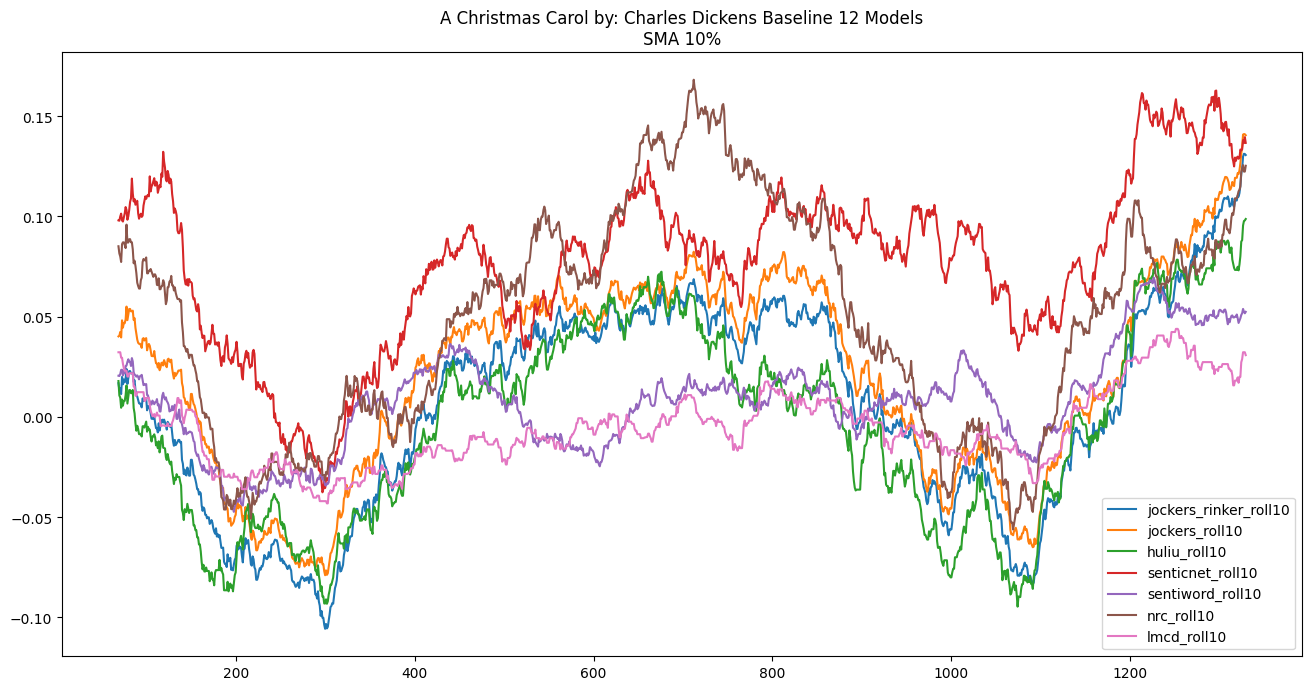

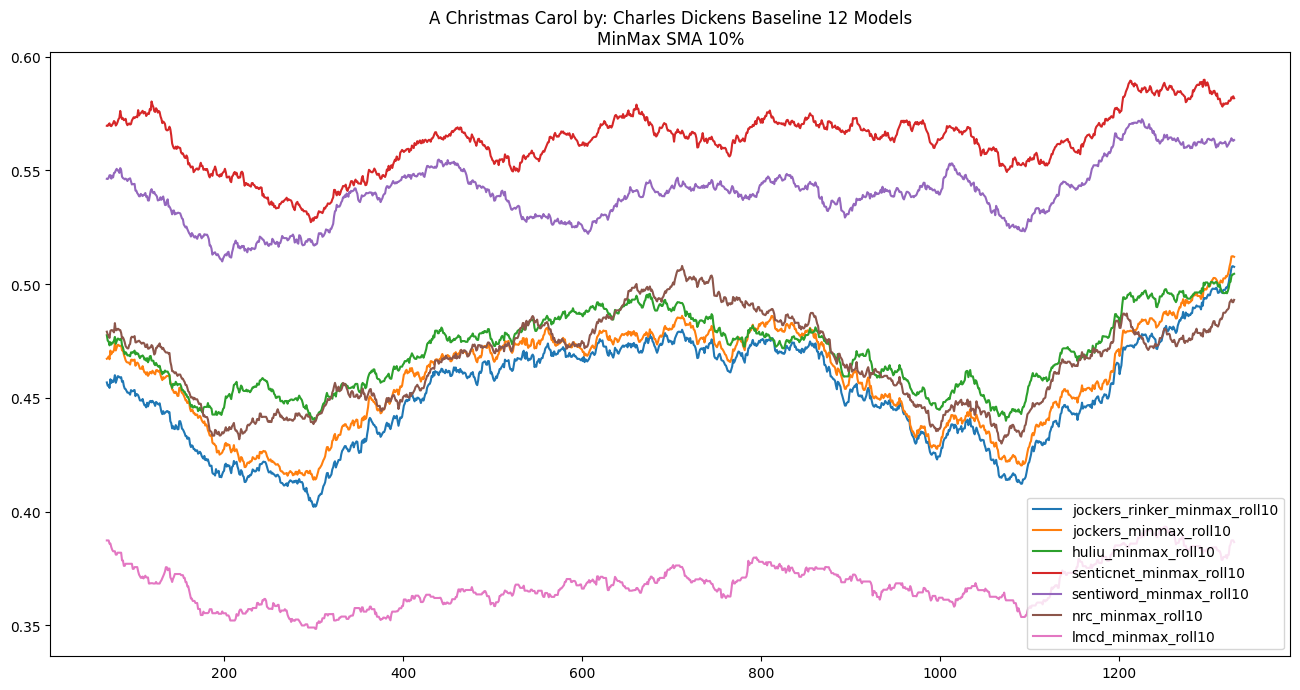

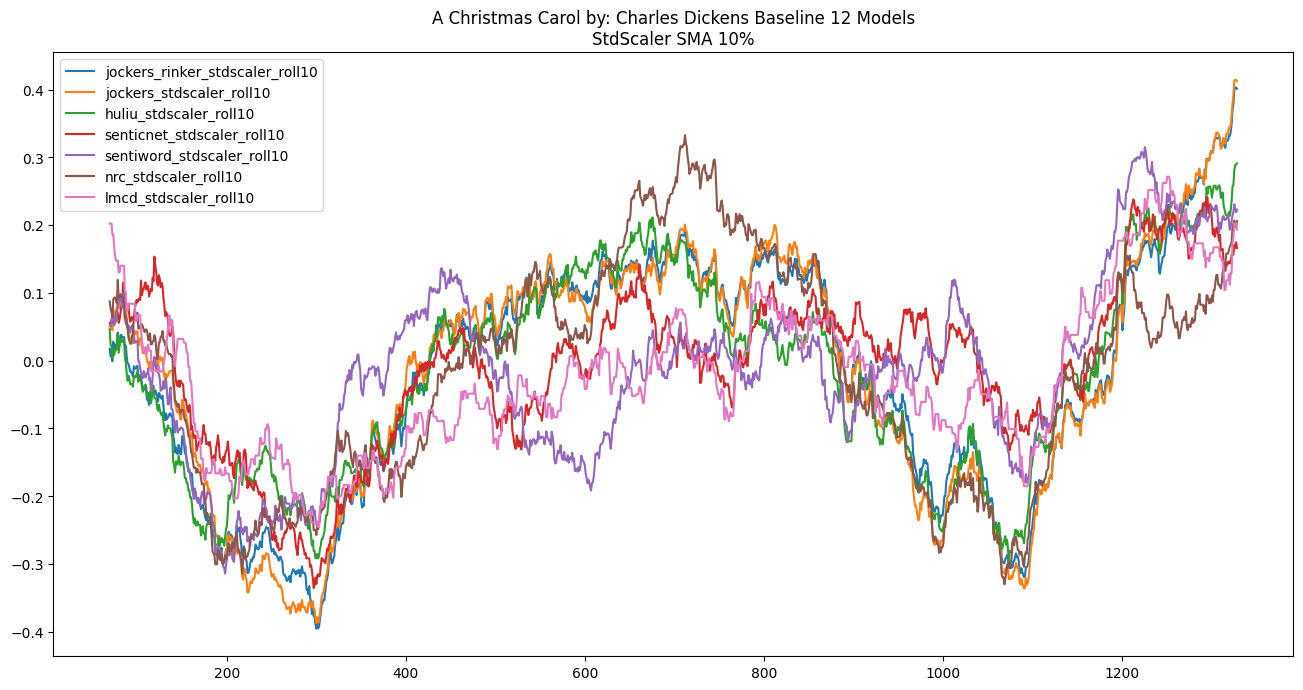

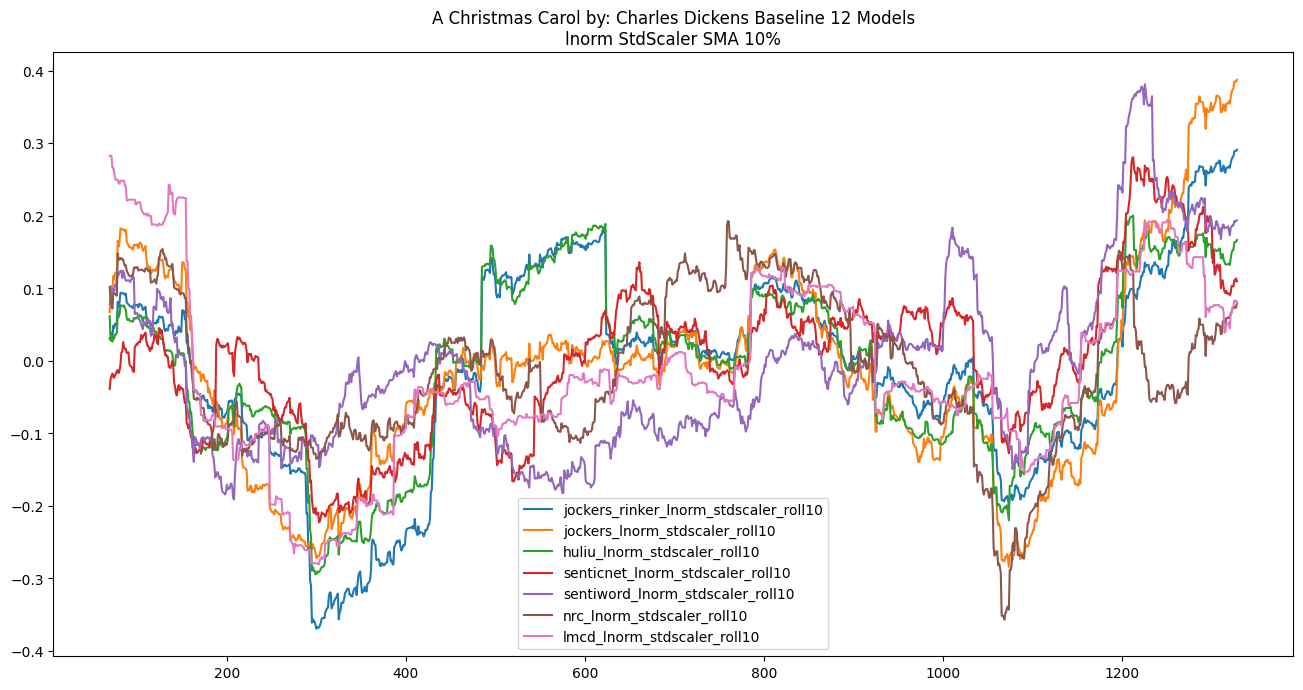

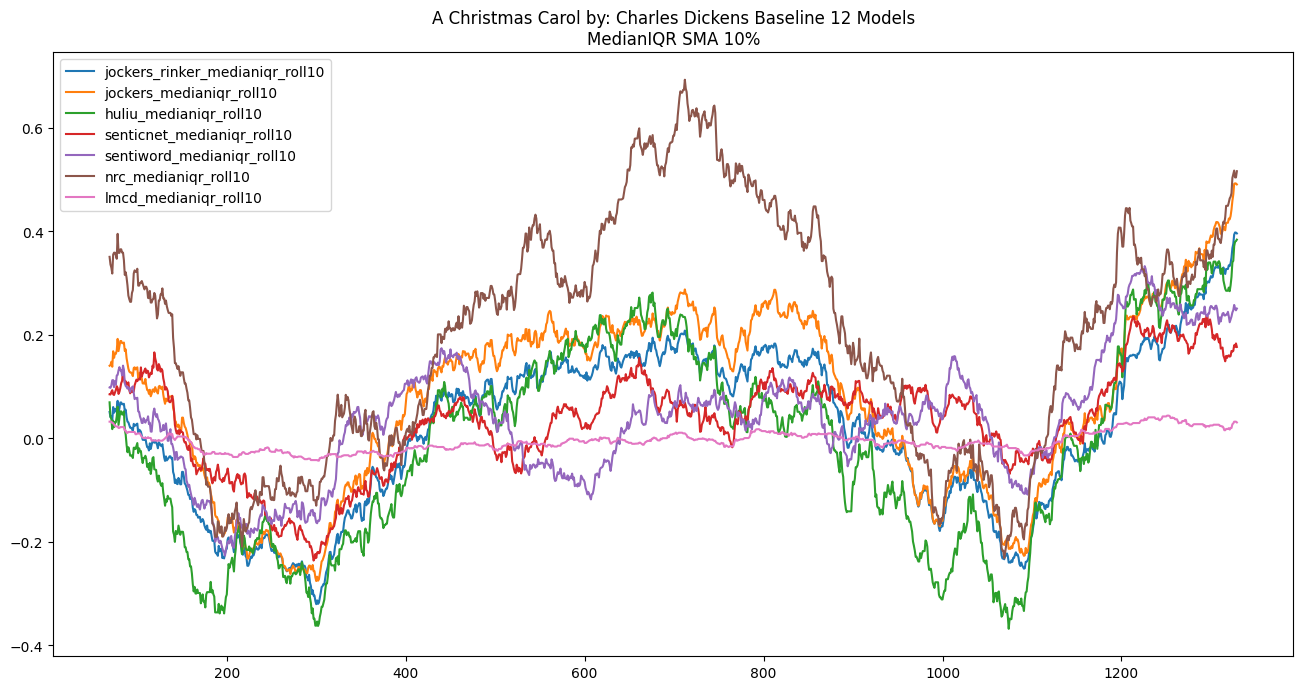

In [ ]:
# Derive Rolling Means Time Series

temp_ls = [f'{x}_roll10' for x in models_sentimentr_ls]
# corpus_sentimentr_df[models_sentimentr_ls].plot()
corpus_sentimentr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Baseline 12 Models\nSMA 10%')

temp_ls = [f'{x}_minmax_roll10' for x in models_sentimentr_ls]
# corpus_sentimentr_df[models_sentimentr_ls].plot()
corpus_sentimentr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Baseline 12 Models\nMinMax SMA 10%')

temp_ls = [f'{x}_stdscaler_roll10' for x in models_sentimentr_ls]
# corpus_sentimentr_df[models_sentimentr_ls].plot()
corpus_sentimentr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Baseline 12 Models\nStdScaler SMA 10%')

temp_ls = [f'{x}_lnorm_stdscaler_roll10' for x in models_sentimentr_ls]
# corpus_sentimentr_df[models_sentimentr_ls].plot()
corpus_sentimentr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Baseline 12 Models\nlnorm StdScaler SMA 10%')

temp_ls = [f'{x}_medianiqr_roll10' for x in models_sentimentr_ls]
# corpus_sentimentr_df[models_sentimentr_ls].plot()
corpus_sentimentr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Baseline 12 Models\nMedianIQR SMA 10%')

### **SyuzhetR 4 Models**

In [ ]:
!ls -altr *.csv

-rw------- 1 root root 166558 Sep 17 02:46 corpus_text_sents_raw_cdickens_achristmascarol.csv
-rw------- 1 root root 156712 Sep 17 02:46 corpus_text_sents_clean_cdickens_achristmascarol.csv
-rw------- 1 root root 339928 Sep 17 02:46 corpus_sents_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root 310127 Sep 17 02:46 corpus_sects_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root 322116 Sep 17 02:46 corpus_parags_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root 310109 Sep 17 02:46 corpus_chaps_baseline_cdickens_achristmascarol.csv
-rw------- 1 root root 199702 Sep 17 02:48 sum_sentiments_syuzhetR_4models_cdickens_achristmascarol.csv
-rw------- 1 root root 306714 Sep 17 02:48 sum_sentiments_sentimentR_7models_cdickens_achristmascarol.csv


In [ ]:
# SyuzhetR 4 Models: Read Computed sentiment data saved from previous run of this notebook

# corpus_syuzhetr_df = pd.read_csv('sum_sentiments_syuzhetR_4models_vwoolf_tothelighthouse.csv')

corpus_root_filename = CORPUS_FILENAME.split('.')[:-1][0]

syuzhetr_7models_filename = f"sum_sentiments_syuzhetR_4models_sentimenttimeraw_{corpus_root_filename}.csv"
corpus_syuzhetr_df = pd.read_csv(syuzhetr_7models_filename)

In [ ]:
# Clean Chapter DataFrame

if 'Unnamed: 0' in corpus_syuzhetr_df.columns:
  corpus_syuzhetr_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
  
corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()

sent_no                           sent_raw  syuzhet  bing  afinn  nrc
0        1                   0,MARLEY'S GHOST     -0.6     0     -1    0
1        2  1,MARLEY was dead: to begin with.     -1.0    -1     -3    0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent_no   1399 non-null   int64  
 1   sent_raw  1399 non-null   object 
 2   syuzhet   1399 non-null   float64
 3   bing      1399 non-null   int64  
 4   afinn     1399 non-null   int64  
 5   nrc       1399 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 65.7+ KB


In [ ]:
# Derive Normalized/Standardized Time Series

# Once applied modification function
test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='lnorm')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='std-minmax')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='std-stdscaler')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='std-medianiqr')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

# Twice applied modification function (ends with roll)
lnorm_ls = [f'{x}_lnorm' for x in models_syuzhetr_ls]
stdminmax_ls = [f'{x}_minmax' for x in models_syuzhetr_ls]
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_syuzhetr_ls]
stdmedianiqr_ls = [f'{x}_medianiqr' for x in models_syuzhetr_ls]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_ls, col_mod='std-minmax')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_ls, col_mod='std-stdscaler')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_ls, col_mod='std-medianiqr')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=stdminmax_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=stdmedianiqr_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

# Thrice applied modification function (starts with lnorm and ends with roll)
lnorm_stdminmax_ls = [f'{x}_lnorm_minmax' for x in models_syuzhetr_ls]
lnorm_stdstdscaler_ls = [f'{x}_lnorm_stdscaler' for x in models_syuzhetr_ls]
lnorm_stdmedianiqr_ls = [f'{x}_lnorm_medianiqr' for x in models_syuzhetr_ls]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_stdminmax_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_stdstdscaler_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=lnorm_stdmedianiqr_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]

corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()


Applying function=[lnorm] on time series [syuzhet]

Applying function=[lnorm] on time series [bing]

Applying function=[lnorm] on time series [afinn]

Applying function=[lnorm] on time series [nrc]

Applying function=[std-minmax] on time series [syuzhet]

Applying function=[std-minmax] on time series [bing]

Applying function=[std-minmax] on time series [afinn]

Applying function=[std-minmax] on time series [nrc]

Applying function=[std-stdscaler] on time series [syuzhet]

Applying function=[std-stdscaler] on time series [bing]

Applying function=[std-stdscaler] on time series [afinn]

Applying function=[std-stdscaler] on time series [nrc]

Applying function=[std-medianiqr] on time series [syuzhet]

Applying function=[std-medianiqr] on time series [bing]

Applying function=[std-medianiqr] on time series [afinn]

Applying function=[std-medianiqr] on time series [nrc]

Applying function=[roll10] on time series [syuzhet]

Applying function=[roll10] on time series [bing]

Applying function

sent_no  ... nrc_lnorm_medianiqr_roll10
0        1  ...                        NaN
1        2  ...                        NaN

[2 rows x 68 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sent_no                         1399 non-null   int64  
 1   sent_raw                        1399 non-null   object 
 2   syuzhet                         1399 non-null   float64
 3   bing                            1399 non-null   int64  
 4   afinn                           1399 non-null   int64  
 5   nrc                             1399 non-null   int64  
 6   token_len                       1399 non-null   int64  
 7   char_len                        1399 non-null   int64  
 8   syuzhet_lnorm                   1399 non-null   float64
 9   bing_lnorm                      1399 non-null   float64
 10  afinn_lnorm                     1399 non-null   float64
 11  nrc_lnorm                       1399 non-null   float64
 12  syuzhet_minmax                  13

In [ ]:
corpus_syuzhetr_df.columns

Index(['sent_no', 'sent_raw', 'syuzhet', 'bing', 'afinn', 'nrc', 'token_len',
       'char_len', 'syuzhet_lnorm', 'bing_lnorm', 'afinn_lnorm', 'nrc_lnorm',
       'syuzhet_minmax', 'bing_minmax', 'afinn_minmax', 'nrc_minmax',
       'syuzhet_stdscaler', 'bing_stdscaler', 'afinn_stdscaler',
       'nrc_stdscaler', 'syuzhet_medianiqr', 'bing_medianiqr',
       'afinn_medianiqr', 'nrc_medianiqr', 'syuzhet_roll10', 'bing_roll10',
       'afinn_roll10', 'nrc_roll10', 'syuzhet_lnorm_minmax',
       'bing_lnorm_minmax', 'afinn_lnorm_minmax', 'nrc_lnorm_minmax',
       'syuzhet_lnorm_stdscaler', 'bing_lnorm_stdscaler',
       'afinn_lnorm_stdscaler', 'nrc_lnorm_stdscaler',
       'syuzhet_lnorm_medianiqr', 'bing_lnorm_medianiqr',
       'afinn_lnorm_medianiqr', 'nrc_lnorm_medianiqr', 'syuzhet_lnorm_roll10',
       'bing_lnorm_roll10', 'afinn_lnorm_roll10', 'nrc_lnorm_roll10',
       'syuzhet_minmax_roll10', 'bing_minmax_roll10', 'afinn_minmax_roll10',
       'nrc_minmax_roll10', 'syuzhet_stdsc

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens SyuzhetR 4 Models\nSMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens SyuzhetR 4 Models\nMinMax SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens SyuzhetR 4 Models\nStdScaler SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens SyuzhetR 4 Models\nlnorm StdScaler SMA 10%')

Text(0.5, 1.0, 'A Christmas Carol by: Charles Dickens SyuzhetR 4 Models\nMedianIQR SMA 10%')

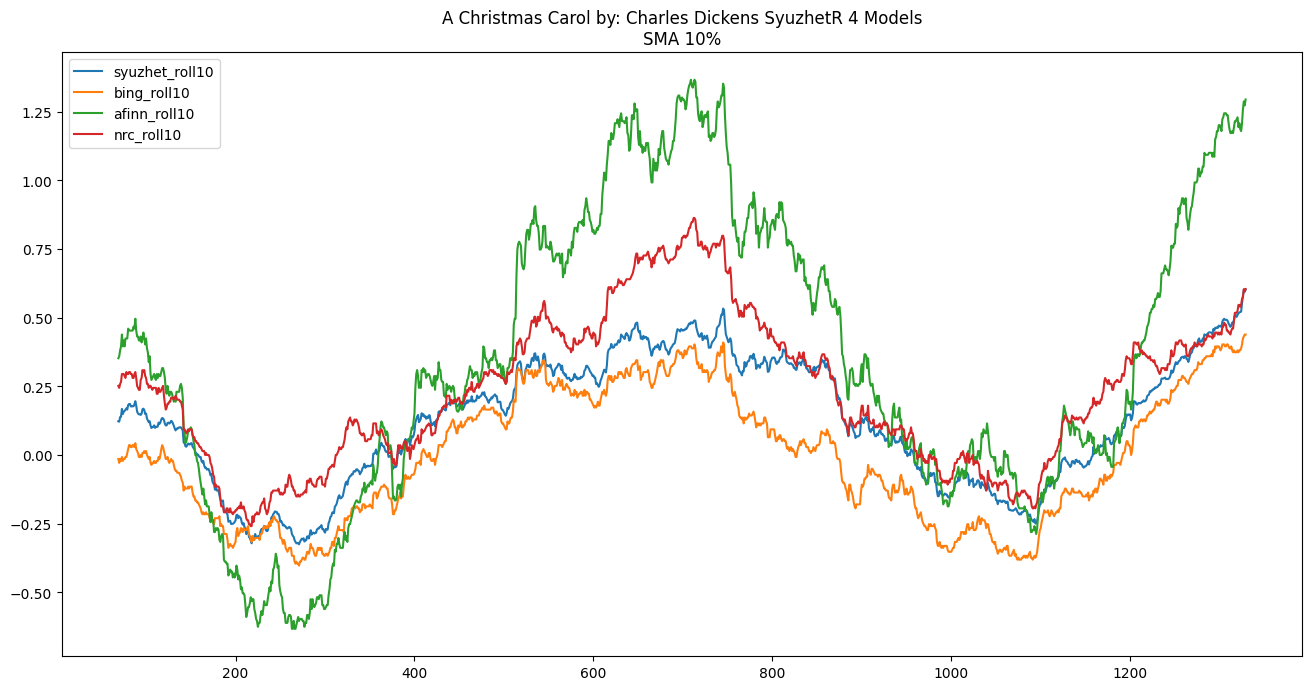

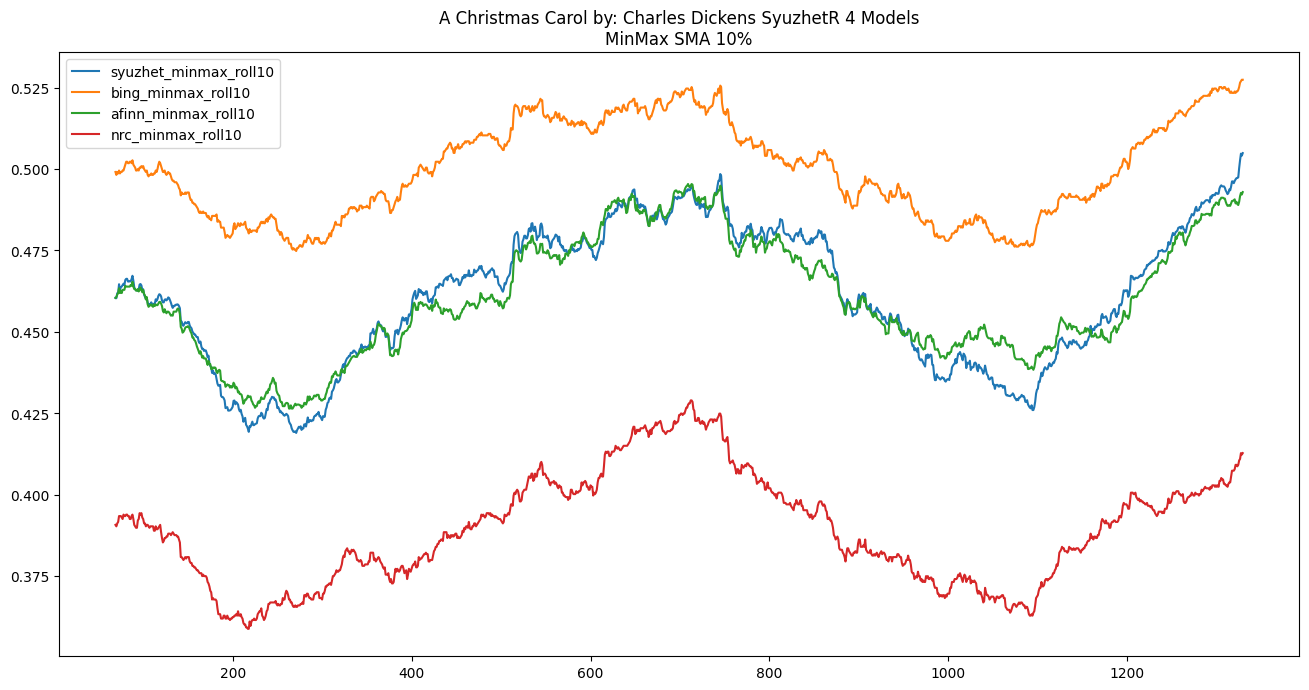

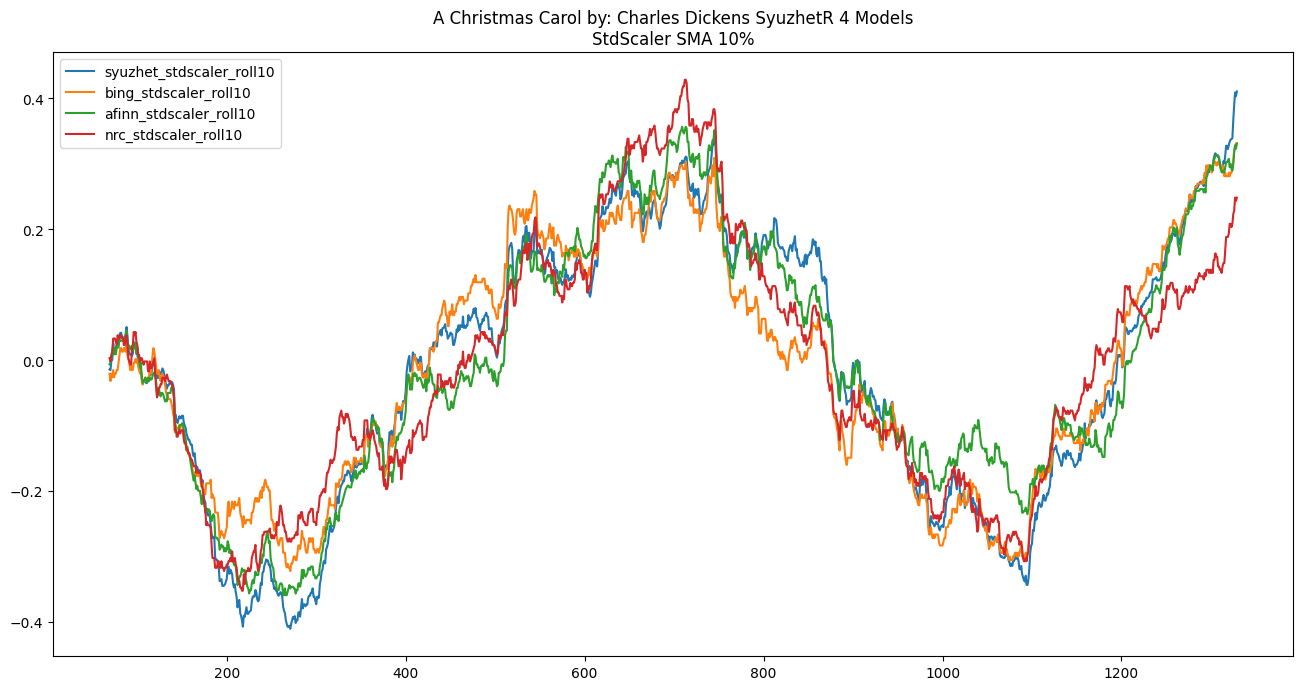

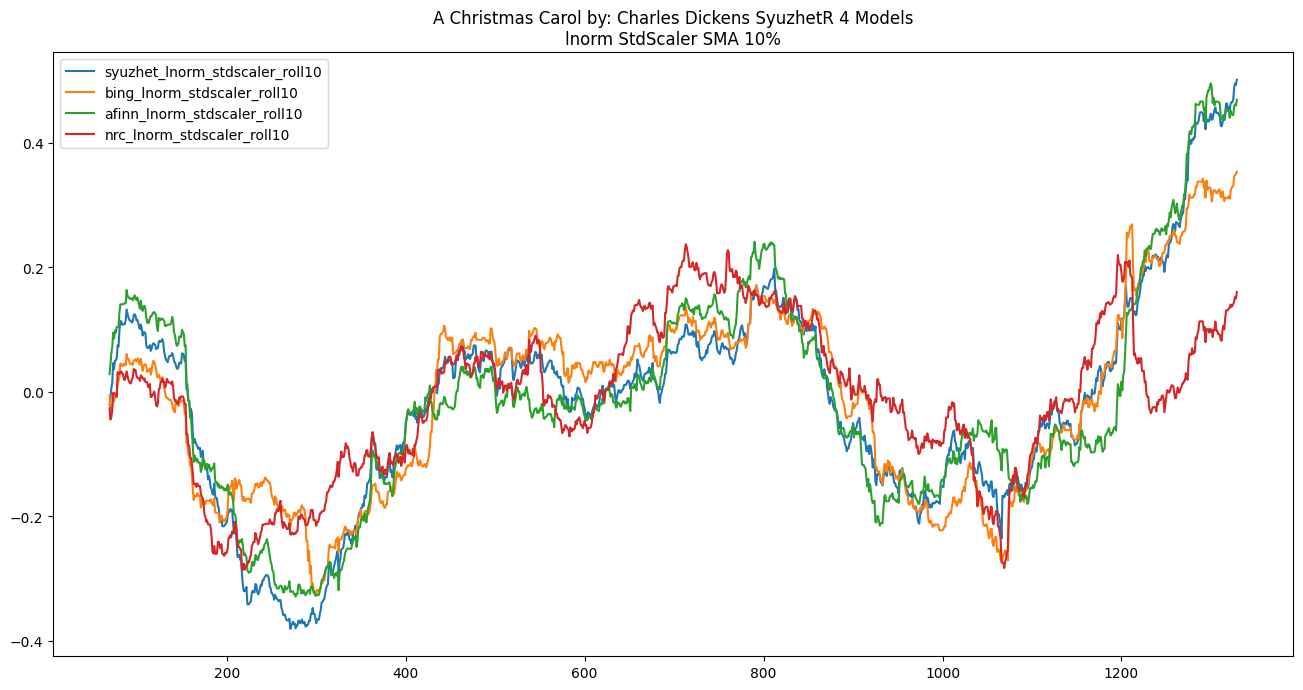

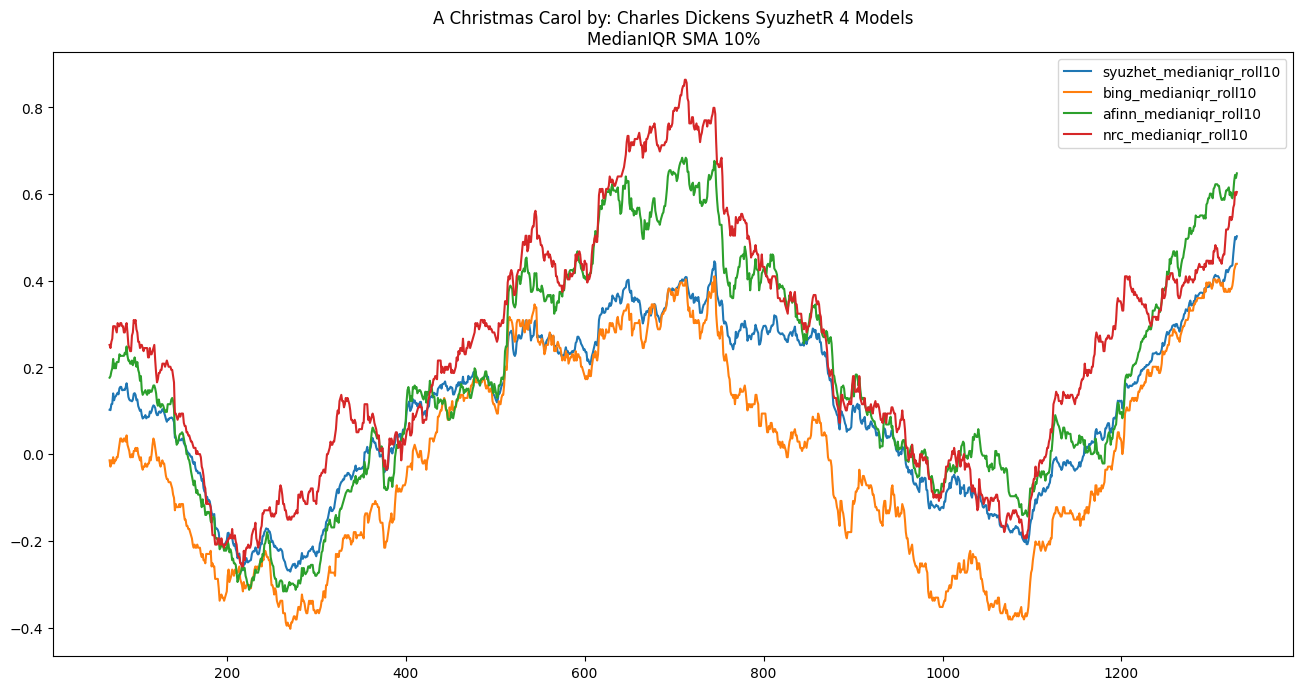

In [ ]:
# Derive Rolling Means Time Series

temp_ls = [f'{x}_roll10' for x in models_syuzhetr_ls]
# corpus_syuzhetr_df[models_syuzhetr_ls].plot()
corpus_syuzhetr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} SyuzhetR 4 Models\nSMA 10%')

temp_ls = [f'{x}_minmax_roll10' for x in models_syuzhetr_ls]
# corpus_syuzhetr_df[models_syuzhetr_ls].plot()
corpus_syuzhetr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} SyuzhetR 4 Models\nMinMax SMA 10%')

temp_ls = [f'{x}_stdscaler_roll10' for x in models_syuzhetr_ls]
# corpus_syuzhetr_df[models_syuzhetr_ls].plot()
corpus_syuzhetr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} SyuzhetR 4 Models\nStdScaler SMA 10%')

temp_ls = [f'{x}_lnorm_stdscaler_roll10' for x in models_syuzhetr_ls]
# corpus_syuzhetr_df[models_syuzhetr_ls].plot()
corpus_syuzhetr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} SyuzhetR 4 Models\nlnorm StdScaler SMA 10%')

temp_ls = [f'{x}_medianiqr_roll10' for x in models_syuzhetr_ls]
# corpus_syuzhetr_df[models_syuzhetr_ls].plot()
corpus_syuzhetr_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} SyuzhetR 4 Models\nMedianIQR SMA 10%')

In [ ]:
test_df = corpus_syuzhetr_df.filter(['sent_no', 'sent_raw'], axis=1)
test_df.head()

sent_no                                                                                             sent_raw
0        1                                                                                     0,MARLEY'S GHOST
1        2                                                                    1,MARLEY was dead: to begin with.
2        3                                                             2,There is no doubt whatever about that.
3        4  3,"The register of his burial was signed by the clergyman, the clerk, the undertaker, and the ch...
4        5  4,"Scrooge signed it: and Scrooge's name was good upon 'Change, for anything he chose to put his...

In [ ]:
corpus_syuzhetr_df.info()
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]
corpus_syuzhetr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   sent_no                         1399 non-null   int64  
 1   sent_raw                        1399 non-null   object 
 2   syuzhet                         1399 non-null   float64
 3   bing                            1399 non-null   int64  
 4   afinn                           1399 non-null   int64  
 5   nrc                             1399 non-null   int64  
 6   token_len                       1399 non-null   int64  
 7   char_len                        1399 non-null   int64  
 8   syuzhet_lnorm                   1399 non-null   float64
 9   bing_lnorm                      1399 non-null   float64
 10  afinn_lnorm                     1399 non-null   float64
 11  nrc_lnorm                       1399 non-null   float64
 12  syuzhet_minmax                  13

<Figure size 1600x800 with 0 Axes>

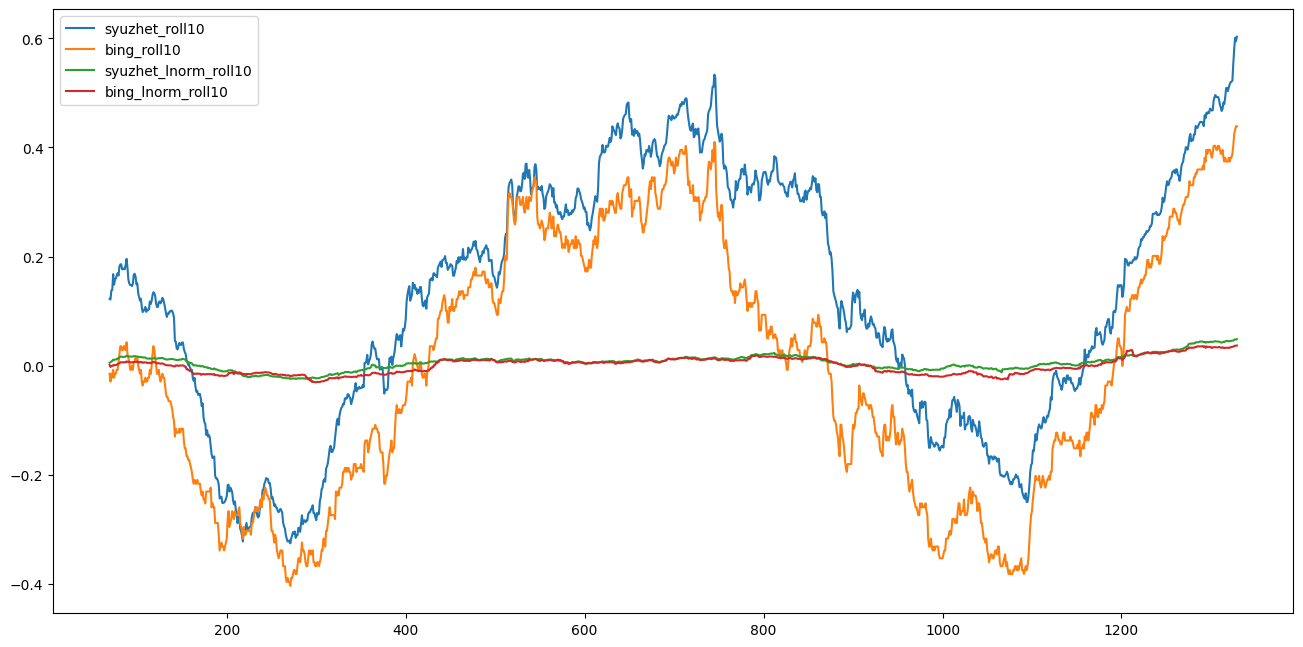

In [ ]:
plt.clf()
corpus_syuzhetr_df[['syuzhet_roll10', 'bing_roll10', 'syuzhet_lnorm_roll10','bing_lnorm_roll10']].plot()

### **Transformer 8 Models**

In [ ]:
!ls -altr *.csv


In [ ]:
# Transformer 8 Models: Read Computed sentiment data saved from previous run of this notebook

# corpus_transformer_df = pd.read_csv('sum_sentiments_sents_trans_mproust_theguermantesway-french.csv')

corpus_root_filename = CORPUS_FILENAME.split('.')[:-1][0]

corpus_transformer_df = pd.read_csv(f"sum_sentiments_sents_trans_{corpus_root_filename}.csv")

In [ ]:
# Clean Chapter DataFrame

if 'Unnamed: 0' in corpus_transformer_df.columns:
  corpus_transformer_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_transformer_df.head(2)
corpus_transformer_df.info()

In [ ]:
# Derive Normalized/Standardized Time Series

# Once applied modification function
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='lnorm')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='std-minmax')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='std-stdscaler')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='std-medianiqr')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

# Twice applied modification function (ends with roll)
lnorm_ls = [f'{x}_lnorm' for x in models_transformer_ls]
stdminmax_ls = [f'{x}_minmax' for x in models_transformer_ls]
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_transformer_ls]
stdmedianiqr_ls = [f'{x}_medianiqr' for x in models_transformer_ls]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_ls, col_mod='std-minmax')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_ls, col_mod='std-stdscaler')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_ls, col_mod='std-medianiqr')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=stdminmax_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=stdmedianiqr_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

# Thrice applied modification function (starts with lnorm and ends with roll)
lnorm_stdminmax_ls = [f'{x}_lnorm_minmax' for x in models_transformer_ls]
lnorm_stdstdscaler_ls = [f'{x}_lnorm_stdscaler' for x in models_transformer_ls]
lnorm_stdmedianiqr_ls = [f'{x}_lnorm_medianiqr' for x in models_transformer_ls]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_stdminmax_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_stdstdscaler_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=lnorm_stdmedianiqr_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

corpus_transformer_df.head(2)
corpus_transformer_df.info()


In [ ]:
print(*corpus_transformer_df.columns, sep='\n')

In [ ]:
"""

# Test reversing order of operations: first smooth (elim outliers) then Standardize

# Create the plain roll10 series
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='roll10')
print(f'test_df/roll10 shape: {test_df.shape}')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

temp_ls = [f'{x}_roll10' for x in models_transformer_ls]
print(f'ROLL_LS: {temp_ls}')

# Create the roll10_stdscaler series
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=temp_ls, col_mod='std-stdscaler')
print(f'test_df/std-stdscaler shape: {test_df.shape}')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

temp_ls = [f'{x}_roll10_stdscaler' for x in models_transformer_ls]
print(f'ROLL_STDSCALER_LS: {temp_ls}')

# Plot 
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df['robertaxml8lang_roll10'].plot()

# corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[SAM 10% then StdScaler]')

""";

In [ ]:
# CORPUS_FULL = 'The Guermantes Way - English, Marcel Proust'

In [ ]:
# Derive Rolling Means Time Series

temp_ls = [f'{x}_roll10' for x in models_transformer_ls]
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[SMA 10%]')

temp_ls = [f'{x}_minmax_roll10' for x in models_transformer_ls]
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[MinMax -> SMA 10%]')

temp_ls = [f'{x}_stdscaler_roll10' for x in models_transformer_ls]
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[StdScaler -> SMA 10%]')

temp_ls = [f'{x}_lnorm_stdscaler_roll10' for x in models_transformer_ls]
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[lnorm -> StdScaler -> SMA 10%]')

temp_ls = [f'{x}_medianiqr_roll10' for x in models_transformer_ls]
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[MedianIQR -> SMA 10%]')

### **Supervised ML 8 Models**

In [ ]:
!ls -altr *.csv


In [ ]:
# Supervised ML Models: Read Computed sentiment data saved from previous run of this notebook

# corpus_transformer_df = pd.read_csv('sum_sentiments_sents_trans_mproust_theguermantesway-french.csv')

corpus_supervised_df = pd.read_csv('ml_sents_df.csv')

In [ ]:
corpus_supervised_df

In [ ]:
corpus_supervised_df['sent_raw'] = corpus_sents_df['sent_raw']

In [ ]:
# Clean Chapter DataFrame

if 'Unnamed: 0' in corpus_supervised_df.columns:
  corpus_supervised_df.drop(columns=['Unnamed: 0'], inplace=True)
  
corpus_supervised_df.head(2)
corpus_supervised_df.info()

In [ ]:
models_mlsu

In [ ]:
# Derive Normalized/Standardized Time Series

# Once applied modification function
test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=models_supervised_ls, col_mod='lnorm')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=models_supervised_ls, col_mod='std-minmax')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=models_supervised_ls, col_mod='std-stdscaler')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=models_supervised_ls, col_mod='std-medianiqr')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=models_supervised_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

# Twice applied modification function (ends with roll)
lnorm_ls = [f'{x}_lnorm' for x in models_supervised_ls]
stdminmax_ls = [f'{x}_minmax' for x in models_supervised_ls]
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_supervised_ls]
stdmedianiqr_ls = [f'{x}_medianiqr' for x in models_supervised_ls]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_ls, col_mod='std-minmax')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_ls, col_mod='std-stdscaler')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_ls, col_mod='std-medianiqr')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=stdminmax_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=stdmedianiqr_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

# Thrice applied modification function (starts with lnorm and ends with roll)
lnorm_stdminmax_ls = [f'{x}_lnorm_minmax' for x in models_supervised_ls]
lnorm_stdstdscaler_ls = [f'{x}_lnorm_stdscaler' for x in models_supervised_ls]
lnorm_stdmedianiqr_ls = [f'{x}_lnorm_medianiqr' for x in models_supervised_ls]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_stdminmax_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_stdstdscaler_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=lnorm_stdmedianiqr_ls, col_mod='roll10')
corpus_supervised_df = pd.concat([corpus_supervised_df, test_df], axis=1)
corpus_supervised_df = corpus_supervised_df.loc[:,~corpus_supervised_df.columns.duplicated()]

corpus_supervised_df.head(2)
corpus_supervised_df.info()


In [ ]:
print(*corpus_supervised_df.columns, sep='\n')

In [ ]:
# roberta15lg_roll10_stdscaler
# robertaxml8lang_roll10_stdscaler


In [ ]:
roll_ls = [10]

test_df = process_timeseries(ts_df=corpus_supervised_df, col_models_ls=roll_ls, col_mod='medianiqr')
test_df.columns

In [ ]:
"""

# Test reversing order of operations: first smooth (elim outliers) then Standardize

# Create the plain roll10 series
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='roll10')
print(f'test_df/roll10 shape: {test_df.shape}')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

temp_ls = [f'{x}_roll10' for x in models_transformer_ls]
print(f'ROLL_LS: {temp_ls}')

# Create the roll10_stdscaler series
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=temp_ls, col_mod='std-stdscaler')
print(f'test_df/std-stdscaler shape: {test_df.shape}')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]

temp_ls = [f'{x}_roll10_stdscaler' for x in models_transformer_ls]
print(f'ROLL_STDSCALER_LS: {temp_ls}')

# Plot 
# corpus_transformer_df[models_transformer_ls].plot()
corpus_transformer_df['robertaxml8lang_roll10'].plot()

# corpus_transformer_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[SAM 10% then StdScaler]')

""";

In [ ]:
# CORPUS_FULL = 'The Guermantes Way - English, Marcel Proust'

In [ ]:
# Derive Rolling Means Time Series

temp_ls = [f'{x}_roll10' for x in models_supervised_ls]
# corpus_supervised_df[models_supervised_ls].plot()
corpus_supervised_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[SMA 10%]')

temp_ls = [f'{x}_minmax_roll10' for x in models_supervised_ls]
# corpus_supervised_df[models_supervised_ls].plot()
corpus_supervised_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[MinMax -> SMA 10%]')

temp_ls = [f'{x}_stdscaler_roll10' for x in models_supervised_ls]
# corpus_supervised_df[models_supervised_ls].plot()
corpus_supervised_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[StdScaler -> SMA 10%]')

temp_ls = [f'{x}_lnorm_stdscaler_roll10' for x in models_supervised_ls]
# corpus_supervised_df[models_supervised_ls].plot()
corpus_supervised_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[lnorm -> StdScaler -> SMA 10%]')

temp_ls = [f'{x}_medianiqr_roll10' for x in models_supervised_ls]
# corpus_supervised_df[models_supervised_ls].plot()
corpus_supervised_df[temp_ls].plot()
plt.title(f'{CORPUS_FULL} Transformer 8 Models\n[MedianIQR -> SMA 10%]')

### **Save Corpus DataFrames**

In [ ]:
!ls -altr

In [ ]:
corpus_root_filename = CORPUS_FILENAME.split('.')[:-1][0]

corpus_sents_all_df = pd.read_csv(f'sum_sentiments_all31_sents_{corpus_root_filename}.csv')
corpus_sents_all_df.head()
corpus_sents_all_df.info()

In [ ]:
# Save Corpus DataFrames

save_dataframes()

In [ ]:
# TODO: If missing, generate derived values for each model, lnorm/not, stdscaler/medianiqr, roll10/not

In [ ]:

# Verfiy there are no NaN or Empty strings that passed the cleaning process

# Only execute if previously datafile/corpus_sents_df


# corpus_sents_df[corpus_sents_df['sent_clean'].isnull()]

# corpus_sents_df[corpus_sents_df['sent_clean'].apply(lambda x: len(str(x)) <= 0)]

In [ ]:
# Verify that hyphenated words are correctly handled (e.g. 'summer-mroning' -> 'summer morning')

# corpus_sents_df[corpus_sents_df['sent_clean'].str.contains('summer', na=False)]

## **(b) Compute Baseline Sentiments (Auto)**

### **4 Stastical Machine Learning Classifiers (Optional: Auto)**

* Linear Regression
* Logistic Regression
* Random Forest Classifier
* Linear SVC
* MultinomialNB

Tutorials

* https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794 (Tutorial) 
* https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb (github)
* https://wellsr.com/python/python-sentiment-analysis-with-sklearn/
* https://colab.research.google.com/drive/186bOdu08nv4xHe6VeBgt_aIk9_fziqsX#scrollTo=hpDp3V0Lg-sw

#### **Setup**


In [ ]:
# Vectorizing text
from sklearn.feature_extraction.text import TfidfVectorizer


# Validation: https://www.kaggle.com/pocooo/types-of-cross-validation-all-you-need

# Simple Cross Fold Validation
from sklearn.model_selection import KFold
# model=DecisionTreeClassifier()
kfold_validation=KFold(10)

# import numpy as np
from sklearn.model_selection import cross_val_score
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

# Stratified CV 
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
# model=DecisionTreeClassifier()
# scores=cross_val_score(model,X,y,cv=skfold)
# print(np.mean(scores))

# LOO CV
from sklearn.model_selection import LeaveOneOut
# model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
# results=cross_val_score(model,X,y,cv=leave_validation)




In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



In [ ]:
# END

In [ ]:
from sklearn.pipeline import Pipeline
text_clf_SGDClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(2,4), stop_words='english',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier()),
])
text_clf_SGDClassifier.fit(X, y)



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

import plotly
import plotly.graph_objs as go
# import plotly.offline as ply
# plotly.offline.init_notebook_mode()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
classifier_names = ['Naive Bayes', 
                    'Decision Tree', 
                    'Random Forest', 
                    'Nearest Neighbors', 
                    'Neural Network']

classifiers = [GaussianNB(),
               DecisionTreeClassifier(max_depth=10),
               RandomForestClassifier(max_depth=10),
               KNeighborsClassifier(5),
               MLPClassifier()]

plot_data=[]

clf_data=zip(classifier_names, classifiers)

for clf_name, clf in clf_data:
    print('Running '+clf_name)
    kf=StratifiedKFold(n_splits=10, shuffle=True)
    scores=cross_val_score(clf, X, y, cv=kf)
    print(scores)
    plot_data.append(
        go.Scatter(
            x=[i+1 for i in range(10)],
            y=scores,
            mode='lines',
            name=clf_name
        )
    )



In [ ]:
plot_data

In [ ]:
%matplotlib inline

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.Figure(data=plot_data, layout=layout)
ply.iplot(fig)

In [ ]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.scatter(data=plot_data, layout=layout)
fig.show()
# ply.iplot(fig)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

In [ ]:
seed = 50
dataset = datasets.load_wine()
# X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

"""

LR: 0.862886 (0.005822)
LDA: 0.859657 (0.006562)
KNN: 0.728571 (0.008688)
CART: 0.710829 (0.007842)
NB: 0.817286 (0.007659)

""";

In [ ]:
models2 = []

models2.append(('SVM', SVC()))
models2.append(('MultiNB', MultinomialNB()))
models2.append(('RFC', RandomForestClassifier()))
models2.append(('MultiLP', MLPClassifier()))

models2.append(('NuSVC', NuSVC(probability=True)))
models2.append(('AdaBC', AdaBoostClassifier()))
models2.append(('GradBC', GradientBoostingClassifier()))
models2.append(('LinDA', LinearDiscriminantAnalysis()))
models2.append(('QuadDA', QuadraticDiscriminantAnalysis()))

In [ ]:
results2 = []
names2 = []
scoring = 'accuracy'
for name, model in models2:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results2.append(cv_results)
      names2.append(name)
      msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    # MultinomialNB(),
    MLPClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    text = ''.join([c for c in text if c.isascii()])
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

# imdb50k_df['text_lemma1'] = imdb50k_df['text_clean'].apply(lemmatize)
# imdb50k_df.head(3)


# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma3_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

# files.download('mlimdb50k_lemma3_sents_df.csv')

In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

# imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
# imdb50k_df.head(3)

# imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)
# imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

# Save checkpoint

# imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')


In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

# imdb50k_df['text_lemma3'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
"""

if ML_Models_Arc == True:
  model_base = 'vader'
  model_name = 'vader_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

if VADER_Arc == True:
  # Sentiment evaluation function
  sid = SentimentIntensityAnalyzer()

  # Test
  sid.polarity_scores('hello world'


""";

#### **Preparing Labeled Sentiment Dataset**

* SST-2/SST-5
* IMDB
* Yelp
* Sentiment140

In [ ]:
# Upload kaggle credentials *.json file

files.upload()

In [ ]:
!pwd
!ls

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp kaggle.json /root/.kaggle/

In [ ]:
!ls /root/.kaggle/


**IMDB 50k (Movie)**

* https://huggingface.co/datasets/imdb

In [ ]:
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [ ]:
supervised_db = 'imdb50k'

In [ ]:
!ls -altr *

In [ ]:
# Option A: Load in imdb_df

imdb50k_df = pd.read_csv("sa_train_lemma_imdb50k.csv")
imdb50k_df.head(1)
imdb50k_df.info()

"""
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

"""

In [ ]:
# Option B: Create IMDB_df

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [ ]:
!ls *zip

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


In [ ]:
imdb50k_df = pd.read_csv("IMDB Dataset.csv")
imdb50k_df["polarity"] = imdb50k_df["sentiment"].map({"negative": 0, "positive": 1})
imdb50k_df["text_raw"] = imdb50k_df["review"].astype('string')
imdb50k_df.drop(columns=['sentiment', 'review'], inplace=True)

supervised_db = 'imdb50k'

In [ ]:
imdb50k_df.info()

In [ ]:
# Remove non-alphanumeric chacters
# imdb50k_df['text_lower'] = imdb50k_df['text_raw']

pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
imdb50k_df['text_clean'] = imdb50k_df['text_raw'].str.lower().str.strip().str.findall(pattern).str.join(' ')
imdb50k_df.head(1)

In [ ]:
stopwords_custom

In [ ]:
nlp = spacy.blank('en')

nlp = spacy.load('en', disable=['parser', 'ner'])

# explicitly adding component to pipeline
# (recommended - makes it more readable to tell what's going on)
# nlp.add_pipe(PySBDFactory(nlp))

In [ ]:
# WARNING: This will execute without error even if SpaCy model not loaded (silent error)
#          Must choose between En/Fr and consider PySBD sentence segementation as part of nlp pipeline

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en]
    return lemma_list

# Test
print(lemmatize('I was running late and decided to to stop drinking.'))

In [ ]:
%%time

# Method #1: Lemmatize with Pandas apply()

# Note: on C.Dickens' Great Expectations

imdb50k_df['text_lemma'] = imdb50k_df['text_clean'].apply(lemmatize)
imdb50k_df.head(3)

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!ls -altr

In [ ]:
!pwd

In [ ]:
files.download('mlimdb50k_lemma_sents_df.csv')

In [ ]:
files.download('ml_sents_df.csv')

In [ ]:
!rm mlimdb50k_lemma2_sents_df.csv


In [ ]:
# Method #2: Lemmatize with spacy nlp.pipe

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_en] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe


In [ ]:
%%time

# Method #2: Lemmatize with spacy nlp.pipe
# Note: 22min

imdb50k_df['text_lemma2'] = preprocess_pipe(imdb50k_df['text_clean'])
imdb50k_df.head(3)

In [ ]:
imdb50k_df.rename(columns={'text_lemma3':'text_lemma'}, inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma2'], inplace=True)

In [ ]:
imdb50k_df.info()

In [ ]:
imdb50k_df.head()

In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'mlimdb50k_lemma2_sents_df.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
!pip install joblib

In [ ]:
# Method #3: Lemmatize with joblib parallelization

from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=2, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(imdb50k_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)


In [ ]:
%%time

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

imdb50k_df['text_lemma'] = preprocess_parallel(imdb50k_df['text_clean'], chunksize=1000)


In [ ]:
# Save checkpoint

imdb50k_df.to_csv(f'sa_train_lemma_imdb50k.csv')
# imdb50k_df.to_csv(f'ml{supervised_db}_sents_df.csv')

In [ ]:
imdb50k_df.info()

In [ ]:
print(imdb50k_df.iloc[0]['text_lemma'])

In [ ]:
def list2str(str_ls):
  '''
  Given a list of string
  Return a all strings concatenated, separated by ' '
  '''
  joined_str = ' '.join(str_ls)

  return joined_str

imdb50k_df['text_lemma'] = imdb50k_df['text_lemma'].apply(list2str)
# imdb50k_df.drop(columns=['text_lemma'], inplace=True)

In [ ]:
imdb50k_df.drop(columns=['text_lemma3'],inplace=True)

In [ ]:
imdb50k_df.head(2)

In [ ]:
# imdb50k_df.rename(columns={'text_lemma':'text_clean'}, inplace=True)

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

# imdb50k_df['text_lower'] = imdb50k_df['text_raw'].str.strip().str.lower()
# imdb50k_df.head()

In [ ]:
# Vectorize IMDB Training dataset with TF-IDF

from nltk.corpus import stopwords
stopwords_en = stopwords.words('english') # + stopwords.words('french')

vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_clean)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
# Separate text from labels

X = words_df
y = imdb50k_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**SST-5 (Text)**

**SST-2 (Text)**

* https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html (Accelerate with SpaCy pipelines/joblib)

**Retrieve via PyTorch TorchText**

* https://github.com/shayneobrien/sentiment-classification/blob/master/notebooks/02-naive-bayes-unigram.ipynb

In [ ]:
supervised_db = 'sst2'

In [ ]:
import torchtext
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from torchtext.vocab import Vectors
from tqdm import tqdm_notebook

In [ ]:
text = torchtext.data.Field(include_lengths = False)
label = torchtext.data.Field(sequential=False)
train, val, test = torchtext.datasets.SST.splits(text, label, filter_pred=lambda ex: ex.label != 'neutral')
text.build_vocab(train)
label.build_vocab(train)
train_iter, val_iter, test_iter = torchtext.data.BucketIterator.splits((train, val, test), batch_size=10, device=-1, repeat = False)
url = 'https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.vec'
text.vocab.load_vectors(vectors=Vectors('wiki.simple.vec', url=url))

**Retrieve from Kaggle Datasets**

In [ ]:
!kaggle datasets download -d atulanandjha/stanford-sentiment-treebank-v2-sst2

In [ ]:
!unzip stanford-sentiment-treebank-v2-sst2.zip

In [ ]:
!cat SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/README.txt

In [ ]:
!ls SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt

In [ ]:
!head -n 5 ./SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt

In [ ]:
sst2_sents_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/dictionary.txt'
sst2_sents_df = pd.read_csv(sst2_sents_filename, sep='|', header=None) 
sst2_sents_df.columns = ['text_raw','phrase_id']
sst2_sents_df['text_raw'] = sst2_sents_df['text_raw'].astype('string')
sst2_sents_df.head(20)
sst2_sents_df.shape

In [ ]:
# def clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):
# TODO: pandas DataFrame.Series.apply(curried function)

# NOTE: SST2: >25m
# sst2_sents_df['text_lemma'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)

sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].str.strip().str.lower()
sst2_sents_df.head()

In [ ]:
# sst2_sents_df['text_clean'] = sst2_sents_df['text_raw'].apply(clean_stemlemma_text)


In [ ]:
# sst2_sents_df['text_lower'] = sst2_sents_df['text_raw'].apply(lambda x: lower(x))

In [ ]:
sst2_labels_filename = './SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels.txt'
sst2_labels_df = pd.read_csv(sst2_labels_filename, sep='|') 
sst2_labels_df.columns = ['phrase_id','polarity_fl']
sst2_labels_df.head(20)
sst2_labels_df.shape

In [ ]:
sst2_df = pd.concat([sst2_sents_df.set_index('phrase_id'),sst2_labels_df.set_index('phrase_id')], axis=1, join='inner')
sst2_df.head()
sst2_df.info()

In [ ]:
def polarity_float2int(val_fl):
  '''
  Given a float between 0.0 and 1.0
  Return an integer between 0-5 mapped to every 0.2 interval
  '''
  val_int = 0
  if (val_fl < 0.2):
    val_int = 0
  elif (0.2 <= val_fl < 0.4):
    val_int = 1
  elif (0.4 <= val_fl < 0.6):
    val_int = 2
  elif (0.6 <= val_fl < 0.8):
    val_int = 3
  elif (0.8 <= val_fl <= 1.0):
    val_int = 4
  else:
    print(f'ERROR: polarity value must be [0.0-1.0] but was set to: {val_fl}')
    val_int = -99

  return val_int

# Test
polarity_float2int(0.55)


In [ ]:
sst2_df['polarity'] = sst2_df['polarity_fl'].apply(lambda x: polarity_float2int(x))

In [ ]:
sst2_df.head(10)
sst2_df.info()

In [ ]:
sst2_df.shape
sst2_df[sst2_df.polarity.isna()]

In [ ]:
"""

from sklearn.feature_extraction import text
# from sklearn.feature_extraction.text import TfidfVectorizer

stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

X = vectorizer.fit_transform(["this is an apple.","this is a book."])

idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

# printing the tfidf vectors
print(X)

# printing the vocabulary
print(vectorizer.vocabulary_)

""";

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])
len(stopwords_custom)
print('\n')
type(stopwords_custom)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stopwords_custom, max_features=1000)
vectors = vectorizer.fit_transform(sst2_df.text_lower)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
X = words_df
y = sst2_df.polarity
X.shape
print('\n')
y.shape
type(y[0])

**Retrieve from Huggingface Datasets**

In [ ]:
# install datasets
!pip install datasets

# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric

from pprint import pprint

In [ ]:
# Currently available datasets and metrics
datasets = list_datasets()
metrics = list_metrics()

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)
print(f"🤩 Currently {len(metrics)} metrics are available on the hub:")
pprint(metrics, compact=True)

In [ ]:
# You can access various attributes of the datasets before downloading them
sst_dataset = list_datasets(with_details=True)[datasets.index('sst')]

pprint(sst_dataset.__dict__)  # It's a simple python dataclass

In [ ]:
# Downloading and loading a dataset
dataset = load_dataset('sst', split='validation[:10%]')

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

In [ ]:
# Create a version of text that is lemmatized and has both stopwords and punctuation removed 
# clean_stemlemma_text(text, stem_fl =False, lemma_fl=True, punct_fl=True, stopword_ls=stopwords_en):

# TODO: Accelerate with joblib: https://prrao87.github.io/blog/spacy/nlp/performance/2020/05/02/spacy-multiprocess.html

# NOTE: Xm 

imdb50k_df['text_lemma'] = imdb50k_df['text_raw'].apply(lambda x : clean_stemlemma_text(x))
imdb50k_df.head()

In [ ]:
# reload spacy with minimal components for speed

nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [ ]:
# use stopword SETS O(1) < LISTS O(n) for performance

stopword_custom_set = set(stopword_custom_ls)

In [ ]:
def cleaner(df):
    "Extract relevant text from DataFrame using a regex"
    # Regex pattern for only alphanumeric, hyphenated text with 3 or more chars
    pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
    df['clean'] = df['content'].str.findall(pattern).str.join(' ')
    if limit > 0:
        return df.iloc[:limit, :].copy()
    else:
        return df

In [ ]:
df_preproc = cleaner(df)
df_preproc.head(3)

In [ ]:
imdb50k_df.head(2)

In [ ]:
stopwords_custom = text.ENGLISH_STOP_WORDS.union(["bazinga"])
len(stopwords_custom)
print('\n')
type(stopwords_custom)


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stopwords_custom, max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text_lower)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
imdb50k_df.shape
print('\n')
imdb50k_df.polarity.value_counts()

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(imdb50k_df.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
X = words_df
y = imdb50k_df.polarity

**Yelp (Restaurant)**

* https://www.kaggle.com/suzanaiacob/sentiment-analysis-of-the-yelp-reviews-data

**Sentiment140 (Tweets)**

* http://help.sentiment140.com/for-students/

In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

In [ ]:
sentiment140_df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
sentiment140_df.head()

In [ ]:
sentiment140_df.shape
print('\n')
sentiment140_df.polarity.value_counts()

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words=stopwords_en, max_features=1000)
vectors = vectorizer.fit_transform(sentiment140_df.text)

vectors_np = vectors.toarray()

words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

In [ ]:
X = words_df
y = sentiment140_df.polarity

#### **Training**

Tuning Hyperparameters: Grid and Random Search

* https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

Acceleration:

* https://rapids.ai/start.html 
* https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&offline=true&sandboxMode=true (Rapids)
* https://github.com/lebedov/scikit-cuda 
* https://github.com/skorch-dev/skorch (Scikit wrap of PyTorch)

**AutoML: MS flaml**

* https://github.com/microsoft/FLAML/blob/main/notebook/flaml_automl.ipynb
* https://www.youtube.com/watch?v=bJfDJhe-O-c

In [ ]:
# !pip install flaml

In [ ]:
!pip install flaml[notebook]

In [ ]:
!mkdir test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into Training and Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from flaml import AutoML
from sklearn.datasets import load_iris
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "test/iris.log",
}

In [ ]:

X_train, y_train = load_iris(return_X_y=True)
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)
# Predict
print(automl.predict_proba(X_train))
# Export the best model
print(automl.model)

In [ ]:
y_train.hist()

In [ ]:
settings = {
    "time_budget": 1000,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "task": 'classification',  # task type    
    "log_file_name": 'airlines_experiment.log',  # flaml log file
}

In [ ]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **settings)

"""

[flaml.automl: 08-18 05:53:11] {1461} INFO - selected model: LGBMClassifier(colsample_bytree=0.7733707792852584,
               learning_rate=0.11190988982157068, max_bin=128,
               min_child_samples=62, n_estimators=701, num_leaves=12,
               objective='binary', reg_alpha=0.001291764523034099,
               reg_lambda=0.5058442385321611, verbose=-1)
[flaml.automl: 08-18 05:53:11] {1184} INFO - fit succeeded
[flaml.automl: 08-18 05:53:11] {1185} INFO - Time taken to find the best model: 567.884330034256


[flaml.automl: 08-18 05:31:22] {1411} INFO -  at 291.7s,	best extra_tree's error=0.2469,	best lgbm's error=0.1504
[flaml.automl: 08-18 05:31:27] {1438} INFO - retrain extra_tree for 5.0s
[flaml.automl: 08-18 05:31:27] {1253} INFO - iteration 46, current learner lrl1
No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'.
[flaml.automl: 08-18 05:31:41] {1411} INFO -  at 310.7s,	best lrl1's error=0.1454,	best lrl1's error=0.1454
[flaml.automl: 08-18 05:31:41] {1461} INFO - selected model: LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')
[flaml.automl: 08-18 05:31:41] {1184} INFO - fit succeeded
[flaml.automl: 08-18 05:31:41] {1185} INFO - Time taken to find the best model: 310.6792550086975
[flaml.automl: 08-18 05:31:41] {1191} WARNING - Time taken to find the best model is 104% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.

""";

In [ ]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

"""

retrieve best config and best learner

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 701, 'num_leaves': 12, 'min_child_samples': 62, 'learning_rate': 0.11190988982157068, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 0.7733707792852584, 'reg_alpha': 0.001291764523034099, 'reg_lambda': 0.5058442385321611}
Best accuracy on validation data: 0.8516
Training duration of best run: 14.68 s

Best ML leaner: lrl1
Best hyperparmeter config: {'C': 1.0}
Best accuracy on validation data: 0.8546
Training duration of best run: 13.9 s

""";

In [ ]:
automl.model.estimator

"""

LogisticRegression(n_jobs=-1, penalty='l1', solver='saga')


""";

In [ ]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]



In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc_y_test_predict = matthews_corrcoef(y_test, y_pred)
mcc_y_test_predict

"""

0.7274299237200138

""";

**AutoML: Auto-Sklearn**

* https://www.youtube.com/watch?v=CF-GZ9tK_Ik
* https://github.com/GauravSahani1417/Kaggle-Datasets/blob/master/Heart_failure_prediction_using_Auto_Sklearn_%F0%9F%A9%BA.ipynb 

In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install scipy>=1.7.0

In [ ]:
import scipy
print(scipy.__version__)

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
clf = AutoSklearnClassifier(time_left_for_this_task=1000, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
clf.fit(X_train, y_train)



In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [ ]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)

In [ ]:
print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

**AutoML: HyperOpt-Sklearn**

* https://github.com/hyperopt/hyperopt-sklearn
* https://github.com/hyperopt/hyperopt-sklearn/blob/master/notebooks/Demo-Iris.ipynb 

svc
svc_linear
svc_rbf
svc_poly
svc_sigmoid
liblinear_svc

knn

ada_boost
gradient_boosting

random_forest
extra_trees
decision_tree

sgd

xgboost_classification

multinomial_nb
gaussian_nb

passive_aggressive

linear_discriminant_analysis
quadratic_discriminant_analysis

one_vs_rest
one_vs_one
output_code

**Supervised ML Models**

In [ ]:
%%time

# Create and train a logistic regression
# SST2: 1800s/1000it, 20s/10it (default, max_iter=1000)
# IMDB50k: 1000it, 1.14s

logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=10)
logreg.fit(X, y)

In [ ]:
%%time

# NOTE: 964s

# example of grid searching key hyperparametres for logistic regression
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


"""

0.858347 (0.004245) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.858367 (0.004238) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.858360 (0.004251) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.835080 (0.004164) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835093 (0.004186) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835287 (0.004264) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 27.2 s, sys: 9.56 s, total: 36.8 s
Wall time: 16min 4s

""";

In [ ]:
%%time

# Create and train a random forest classifier
# SST2: 27m-1500s/50n_est  36s/5n_est (default n_estimators=50)
# IMDB50k: 46s (n_est=50)

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 (Hyperparm search)
# https://github.com/WillKoehrsen/Machine-Learning-Projects/tree/master/random_forest_explained (github/Jupyter)

dforest = RandomForestClassifier(n_estimators=50)
dforest.fit(X, y)

In [ ]:
%%time

# NOTE: 9381s

# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

"""

Best: 0.852973 using {'max_features': 'log2', 'n_estimators': 1000}
0.785433 (0.005143) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.834120 (0.005947) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.839340 (0.005137) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.762820 (0.005924) with: {'max_features': 'log2', 'n_estimators': 10}
0.842607 (0.005467) with: {'max_features': 'log2', 'n_estimators': 100}
0.852973 (0.004983) with: {'max_features': 'log2', 'n_estimators': 1000}
CPU times: user 4min 50s, sys: 11.5 s, total: 5min 2s
Wall time: 2h 36min 21s

""";

In [ ]:
# Simple Bagged Decision Tree

In [ ]:
%%time

# NOTE: >5hrs

# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Simple kNN

In [ ]:
%%time




# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



In [ ]:
# Simple Ridge Classifier

In [ ]:
%%time

# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
%%time
# Create and train a linear support vector classifier (LinearSVC)
# SST2: 20s 
# IMDB50k: 1.7s

svc = LinearSVC()
svc.fit(X, y)

In [ ]:
%%time

# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# Simple Stochastic Gradient Boosting   

In [ ]:
%%time

# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



In [ ]:
%%time

# Create and train a multinomial naive bayes classifier (MultinomialNB)
# SST2: 1.3s 
# IMDB50k: 0.24s

multinb = MultinomialNB()
multinb.fit(X, y)

In [ ]:
"""

https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier/299843

Just a thought, I've used NB almost exclusively for NLP tasks. Consider sentiment analysis, the distribution over the word "fast" might be {pos:0.8, neg:0.2}. this design is often called "unigram" (just one word), however, n-grams (2 or more) will improve accuracy. In general, perplexity is used to evaluate if added model complexity is worth the effort. All that to say, grid search might be useful, if you were trying to optimize the number of n-grams (though this would no longer be "Naive Bayes" but rather a conceptual extension.) But outside of NLP, there might be no use for this idea. – jbuddy_13 Jan 2 at 16:41 

"""

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [ ]:
# Split into Training and Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# name = df.toxic.name

In [ ]:
# K-fold cross variations

# https://towardsdatascience.com/building-a-sentiment-classifier-using-scikit-learn-54c8e7c5d2f0 (2020) *
# https://www.kaggle.com/pocooo/types-of-cross-validation-all-you-need (3mo)


In [ ]:
# Hyper parameter grid search using Stratified k-fold search for better l2 penality

# https://www.kaggle.com/babbler/cross-validation-considerations (3 yr)

In [ ]:
# Model Comparisons

# https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/ *
# https://nulpointerexception.com/2017/12/31/a-tutorial-to-find-best-scikit-classifiers-for-sentiment-analysis/ *
# https://www.dezyre.com/recipes/compare-sklearn-classification-algorithms-in-python *
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
# https://www.kaggle.com/meetnaren/comparing-different-sklearn-classifiers (4yr) *
# https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn (5yr) *

In [ ]:
# SA with XGBoost + Pipelines

* https://ai.plainenglish.io/sentiment-classification-using-xgboost-7abdaf4771f9
* https://github.com/jaotheboss/Drug-Sentiment-Analysis/blob/master/main.py
* https://www.kaggle.com/sudhirnl7/simple-naive-bayes-xgboost (4yrs)
* https://www.kaggle.com/diveki/classification-with-nlp-xgboost-and-pipelines (3yrs)
* https://blessing3ke.medium.com/twitter-sentiment-analysis-with-xgboost-f0016e94d317 (1yr)

In [ ]:
# ROC/AUC compare classifiers

# https://github.com/dformoso/sklearn-classification *
# https://colab.research.google.com/github/astg606/py_materials/blob/master/machine_learning/ml_models_scikit-learn.ipynb *
# https://colab.research.google.com/github/goswami-rahul/machine-learning/blob/master/UnderstandingMetrics.ipynb *
# https://stats.stackexchange.com/questions/133225/how-to-validate-sentiment-classification-and-compare-different-algorithms (6yr)
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison (4yr)

In [ ]:
# Ensemble Methods

* https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost
* https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0152-5


#### **Create Supervised Learning DataFrame**

In [ ]:
# Setup new DataFrame to hold all Sklearn supervised statistical machine learning models

corpus_mlsup_df = pd.DataFrame(corpus_sents_df['sent_clean'])
corpus_mlsup_df['sent_clean'] = corpus_mlsup_df['sent_clean'].astype('string')

# Remove non-alphanumeric chacters
# corpus_mlsup_df['text_lower'] = corpus_mlsup_df['text_raw']

pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
corpus_mlsup_df['sent_lemma'] = corpus_mlsup_df['sent_clean'].str.lower().str.strip().str.findall(pattern).str.join(' ')
# corpus_mlsup_df.head()

# Method #3: Lemmatize with joblib parallelization
# NOTE: 17m13s 

# lemmas_ls = preprocess_parallel(corpus_mlsup_df['sent_lemma'], chunksize=1000)
# print(f'type: {type(lemmas_ls[0])}')
# corpus_mlsup_df['sent_lemma'] = ' '.join(lemmas_ls)

corpus_mlsup_df['sent_lemma'] = preprocess_parallel(corpus_mlsup_df['sent_lemma'], chunksize=1000)
corpus_mlsup_df['sent_lemma'] = corpus_mlsup_df['sent_lemma'].apply(lambda x: ' '.join(x))

corpus_mlsup_df.info()
corpus_mlsup_df.head()

In [ ]:
# Vectorize our Lemmatized Corpus Sentences

# transform, not fit_transform, because we already learned all our words
sents_vectors = vectorizer.transform(corpus_mlsup_df.sent_lemma)
sents_words_df = pd.DataFrame(sents_vectors.toarray(), columns=vectorizer.get_feature_names())
sents_words_df.head()

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(corpus_mlsup_df.iloc[0]['sent_lemma'])

### **Time Series Clustering**

Code:

* https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447 (DTW) *
* https://cran.r-project.org/web/packages/dtwclust/vignettes/dtwclust.pdf 
* https://www.sktime.org/en/latest/examples/mrseql.html Classification Mr-SEQL

Guidance:

* https://stats.stackexchange.com/questions/63546/comparing-hierarchical-clustering-dendrograms-obtained-by-different-distances 

Ranks:
* https://paperswithcode.com/task/time-series-clustering

Papers:
* https://reader.elsevier.com/reader/sd/pii/S2666827020300013?token=2286F6993FF63B6B3096B72F09503A950095DD5F1C1BB11146BDC0EAAA8E4D942BAD3A216FDBE65978BAE3B5C9F2363F&originRegion=us-east-1&originCreation=20210817184824

In [ ]:
# Time Series Clustering



### **Time Series Transformations**

Tutorial:
* https://opendatascience.com/transforming-skewed-data-for-machine-learning/


In [ ]:
%%time

# Create and train a linear regression
# SST2: 1800s/1000it, 20s/10it (default, max_iter=1000)
# IMDB50k: 1000it, 1.14s

# First get a performance metrics
# Test/Train Holdout Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
result = linreg.score(X_test, y_test)
print(f'Evaluation (Test/Train holdout): {result}')

# K-Fold Validation
results=cross_val_score(linreg,X,y,cv=kfold_validation)
print(f'Evaluation (K-Fold): {results}')
print(np.mean(results))

# Stratified Validation
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(linreg,X,y,cv=skfold)
print(f'Evaluation (Stratified CV): {np.mean(scores)}')


# Run confusion matrix on transformed text and cross-validation predictions
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
 
sentiment_predict = cross_val_predict(linreg, X, y, cv=5)
confusion_mat = confusion_matrix(sentiment, sentiment_predict)


# Second, train on entire corpus
linreg = LinearRegression()
linreg.fit(X, y)



In [ ]:
# Stratified Validation
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(linreg,X,y,cv=skfold)
print(f'Evaluation (Stratified CV): {np.mean(scores)}')

In [ ]:
sentiment_predict = cross_val_predict(linreg, X, y, cv=5)
confusion_mat = confusion_matrix(y, sentiment_predict)

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))


In [ ]:
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
classifier1 = svm.SVC(kernel='linear', probability=True)
probas_1 = classifier1.fit(X_train, y_train).predict_proba(X_test)



#### **Inference**

In [ ]:
# from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        X, 
        y,
        train_size=0.80, 
        random_state=42)


In [ ]:
# Set the name of the supervised sentiment classifier training dataset

# supervised_db = 'imdb50k'
# supervised_db = 'sst2'
supervised_db = 'sentiment140'

In [ ]:
# corpus_mlsup_df = pd.DataFrame(corpus_sents_df['sent_clean'])
# corpus_mlsup_df['sent_clean'] = corpus_mlsup_df['sent_clean'].astype('string')
corpus_mlsup_df.info()
corpus_mlsup_df.head()

In [ ]:
sents_words_df.shape

In [ ]:
# Predict using all our models. 

# Linear Regression predictions + probabilities
corpus_mlsup_df[f'linreg_{supervised_db}'] = linreg.predict(sents_words_df)

# Logistic Regression predictions + probabilities
corpus_mlsup_df[f'logreg_{supervised_db}'] = logreg.predict(sents_words_df)
corpus_mlsup_df[f'logreg_proba_{supervised_db}'] = logreg.predict_proba(sents_words_df)[:,1]

# Random forest predictions + probabilities
corpus_mlsup_df[f'dforest_{supervised_db}'] = dforest.predict(sents_words_df)
corpus_mlsup_df[f'dforest_proba_{supervised_db}'] = dforest.predict_proba(sents_words_df)[:,1]

# SVC predictions
corpus_mlsup_df[f'svc_{supervised_db}'] = svc.predict(sents_words_df)

# Bayes predictions + probabilities
corpus_mlsup_df[f'multinb_{supervised_db}'] = multinb.predict(sents_words_df)
corpus_mlsup_df[f'multinb_proba_{supervised_db}'] = multinb.predict_proba(sents_words_df)[:,1]

In [ ]:
corpus_mlsup_df.head()

In [ ]:
# Save checkpoint

# corpus_mlsup_df.to_csv('ml_sents_df.csv')

#### **Plots**

In [ ]:
# supervised_db = 'imdb50k'

In [ ]:
# Smooth Time Series

win_s1per = int(corpus_sents_df.shape[0] * 1/100)

corpus_mlsup_df[f'linreg_{supervised_db}_roll10'] = corpus_mlsup_df[f'linreg_{supervised_db}'].rolling(10*win_s1per, center=True).mean()
corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10'] = corpus_mlsup_df[f'logreg_proba_{supervised_db}'].rolling(10*win_s1per, center=True).mean()
corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10'] = corpus_mlsup_df[f'dforest_proba_{supervised_db}'].rolling(10*win_s1per, center=True).mean()
corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10'] = corpus_mlsup_df[f'multinb_proba_{supervised_db}'].rolling(10*win_s1per, center=True).mean()
corpus_mlsup_df[f'svc_{supervised_db}_roll10'] = corpus_mlsup_df[f'svc_{supervised_db}'].rolling(10*win_s1per, center=True).mean()

In [ ]:
corpus_mlsup_df.info()

In [ ]:
# Standardize Time Series

corpus_mlsup_df[f'linreg_{supervised_db}_roll10_stdscaler'] = mean_std_scaler.fit_transform(np.array(corpus_mlsup_df[f'linreg_{supervised_db}_roll10']).reshape(-1, 1))

corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10_stdscaler'] = mean_std_scaler.fit_transform(np.array(corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10']).reshape(-1, 1))

corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10_stdscaler'] = mean_std_scaler.fit_transform(np.array(corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10']).reshape(-1, 1))

corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10_stdscaler'] = mean_std_scaler.fit_transform(np.array(corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10']).reshape(-1, 1))

corpus_mlsup_df[f'svc_{supervised_db}_roll10_stdscaler'] = mean_std_scaler.fit_transform(np.array(corpus_mlsup_df[f'svc_{supervised_db}_roll10']).reshape(-1, 1))



In [ ]:
supervised_db = 'sentiment140'

In [ ]:
corpus_mlsup_df[f'linreg_{supervised_db}_roll10_stdscaler'].plot(label='Linear Regression')
corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10_stdscaler'].plot(label='Logistic Regression')
corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10_stdscaler'].plot(label='Random Forest')
corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10_stdscaler'].plot(label='Naive Bayes')
corpus_mlsup_df[f'svc_{supervised_db}_roll10_stdscaler'].plot(label='SVC')
plt.title(f'{CORPUS_FULL}\n Sentence Sentiment Statistical ML with SMA 10% + StdScaler (TrainingDB: {supervised_db})')
plt.legend(loc='best')

In [ ]:
corpus_mlsup_df[f'linreg_{supervised_db}_roll10_stdscaler'].plot(label='Linear Regression')
corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10_stdscaler'].plot(label='Logistic Regression')
corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10_stdscaler'].plot(label='Random Forest')
corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10_stdscaler'].plot(label='Naive Bayes')
corpus_mlsup_df[f'svc_{supervised_db}_roll10_stdscaler'].plot(label='SVC')
plt.title(f'{CORPUS_FULL}\n Sentence Sentiment Statistical ML with SMA 10% + StdScaler (TrainingDB: {supervised_db})')
plt.legend(loc='best')

In [ ]:
corpus_mlsup_df[f'linreg_{supervised_db}_roll10_stdscaler'].plot(label='Linear Regression')
corpus_mlsup_df[f'logreg_proba_{supervised_db}_roll10_stdscaler'].plot(label='Logistic Regression')
corpus_mlsup_df[f'dforest_proba_{supervised_db}_roll10_stdscaler'].plot(label='Random Forest')
corpus_mlsup_df[f'multinb_proba_{supervised_db}_roll10_stdscaler'].plot(label='Naive Bayes')
corpus_mlsup_df[f'svc_{supervised_db}_roll10_stdscaler'].plot(label='SVC')
plt.title(f'{CORPUS_FULL}\n Sentence Sentiment Statistical ML with SMA 10% + StdScaler (TrainingDB: {supervised_db})')
plt.legend(loc='best')

In [ ]:
%%time

print("Training logistic regression")
logreg.fit(X_train, y_train)

print("Training random forest")
forest.fit(X_train, y_train)

print("Training SVC")
svc.fit(X_train, y_train)

print("Training Naive Bayes")
bayes.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Logistic Regression

y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

In [ ]:
# Random Forest

y_true = y_test
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

In [ ]:
# SVC

y_true = y_test
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

In [ ]:
# Nultinomial Naive Bayes

y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

**Percentage-based confusion matrices**

Those are kind of irritating in that they're just numbers. Let's try percentages instead

In [ ]:
# Logistic Regression

y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

In [ ]:
# Random Forest

y_true = y_test
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

In [ ]:
# SVC

y_true = y_test
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

In [ ]:
# Multinomial Naive Bayes

y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

#### **Save Corpus DataFrames**

In [ ]:
supervised_db

In [ ]:
corpus_mlsup_df.columns

In [ ]:
save_dataframes(df_ls=['mlsupervised'])

### **Select Sentiment Models (Manual)**

NOTE:

* Stanza (Stanford OpenNLP) can take upto 50 minutes to run

* Listed in increasing order of (approx) run time

* MPQA/SentiStrength not yet implemented (placeholders only for now)

In [ ]:
SentimentR_Arc = True #@param {type:"boolean"}
Syuzhet_Arc = True #@param {type:"boolean"}
Bing_Arc = True #@param {type:"boolean"}
SenticNet_Arc = True #@param {type:"boolean"}
SentiWord_Arc = True #@param {type:"boolean"}
NRC_Arc = True #@param {type:"boolean"}
AFINN_Arc = True #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
# MPQA_Arc = False #@param {type:"boolean"}
# SentiStrength_Arc = False #@param {type:"boolean"}


In [ ]:
# Create and Verify custom list of Models to include

MODELS_CUSTOM_LS = []

if VADER_Arc:
  MODELS_CUSTOM_LS.append('vader')
if TextBlob_Arc:
  MODELS_CUSTOM_LS.append('textblob')
if Flair_Arc:
  MODELS_CUSTOM_LS.append('flair')
if Stanza_Arc:
  MODELS_CUSTOM_LS.append('stanza')
if SentimentR_Arc:
  MODELS_CUSTOM_LS.append('sentimentr')
if Syuzhet_Arc:
  MODELS_CUSTOM_LS.append('syuzhet')
if AFINN_Arc:
  MODELS_CUSTOM_LS.append('afinn')
if Bing_Arc:
  MODELS_CUSTOM_LS.append('bing')
if Pattern_Arc:
  MODELS_CUSTOM_LS.append('pattern')
if SentiWord_Arc:
  MODELS_CUSTOM_LS.append('sentiword')
if SenticNet_Arc:
  MODELS_CUSTOM_LS.append('senticnet')
if NRC_Arc:
  MODELS_CUSTOM_LS.append('nrc')

print(f'Here are the Models we are using to ensemble and save:\n\n   {MODELS_CUSTOM_LS}')

"""
models_incl_ls = []
for amodel in MODELS_CUSTOM_LS:
  models_incl_ls.append(amodel[:2])
models_incl_str = ''.join(models_incl_ls)

print(f'Here is a custom name abbr: {models_incl_str}')
""";

Here are the Models we are using to ensemble and save:

   ['vader', 'textblob', 'flair', 'stanza', 'sentimentr', 'syuzhet', 'afinn', 'bing', 'pattern', 'sentiword', 'senticnet', 'nrc']


In [ ]:
# Calculate (win_(x)1per) 1% of Corpus length for smallest (odd-valued) rolling window

# Sentences
corpus_sents_len = corpus_sents_df.shape[0]

win_raw_s1per = int(corpus_sents_len * 0.01)
# print(f'1% Rolling Window: {win_raw_s1per}')

if win_raw_s1per % 2:
  win_s1per = win_raw_s1per
else:
  win_s1per = win_raw_s1per + 1

# Paragraphs
# corpus_parags_df = corpus_all_df
corpus_parags_len = len(corpus_sents_df['parag_no'].unique())

win_raw_p1per = int(corpus_parags_len * 0.01)
# print(f'1% Rolling Window: {win_raw_1per}')

if win_raw_p1per % 2:
  win_p1per = win_raw_p1per
else:
  win_p1per = win_raw_p1per + 1


# Sections

# NO NEED FOR SLIDING WINDOW ON SECTIONS


print(f'Sentence 1 Percent window: {win_s1per}')
print(f'Paragraph 1 Percent window: {win_p1per}')

In [ ]:
# Verify Sentiment Lexicon hash files are accessable

lexicons_path = f'/gdrive/MyDrive/{LEXICONS_SUBDIR[1:]}/hash*.csv'
!pwd
!ls $lexicons_path

### **Calculate SentimentR (Jockers-Rinker) Sentiment Polarities (Optional: Auto)**

In [ ]:
if SentimentR_Arc == True:
  model_base = 'sentimentr'

  """
  model_name = 'sentimentr_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'
  """;

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_sentimentr.csv

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv

Top of Dictionary datafile ----------
"","x","y"
"1","a plus",1
"2","abandon",-0.75
"3","abandoned",-0.5
"4","abandoner",-0.25


In [ ]:
# Read Lexicon into DataFrame 

if SentimentR_Arc == True:

  lexicon_sentimentr_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_sentimentr.csv')
  lexicon_sentimentr_df['x'] = lexicon_sentimentr_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_sentimentr_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_sentimentr_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_sentimentr_df.head()
    lexicon_sentimentr_df.info()

In [ ]:
# Convert DataFrame to Dict[word] = polarity

if SentimentR_Arc == True:

  id = lexicon_sentimentr_df.word.values
  values = lexicon_sentimentr_df.polarity.values

  lexicon_sentimentr_dt = dict(zip(id, values))
  # lexicon_sentimentr_dt

  # Test
  sent_test='I hate Mondays.'
  print(text2sentiment(sent_test, lexicon_sentimentr_dt))

In [ ]:
# Verify

# corpus_sents_df['sent_clean'].isna().any()
# corpus_chaps_df.shape

In [ ]:
corpus_parags_df.columns
print('\n')
corpus_sects_df.columns

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Sentiment evaluation function
def sentiment_sentimentr(text_str):
  '''
  Given a text string
  Return corresponding sentiment value based on sentimentr lexicon
  '''
  
  sentiment_val = text2sentiment(str(text_str), lexicon_sentimentr_dt)

  return sentiment_val 

# Calculate all Sentiment values and variants
if SentimentR_Arc == True:
  model_base = 'sentimentr'
  get_sentiments(model_base=model_base, sentiment_fn=sentiment_sentimentr, sentiment_type='lexicon')

In [ ]:
corpus_sents_df.head(2)
corpus_sents_df.info()

In [ ]:
# Verify there are no empty Sentences

corpus_sents_df[corpus_sents_df['token_len'] == 0]

In [ ]:
# TODO: Put above at the start of processing each new Corpus

corpus_lexicons_stats_dt = {}

In [ ]:
# Get/Set Sentiment Statistics

if SentimentR_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
corpus_sents_df.info()

In [ ]:
# Verify 

if SentimentR_Arc == True:
  # corpus_sents_df['sentimentr'].plot(alpha=0.3)
  corpus_sents_df['sentimentr_stdscaler'].plot(alpha=0.1)
  corpus_sents_df['sentimentr_medianiqr'].plot(alpha=0.3)
  plt.legend(loc='best');

In [ ]:
corpus_sents_df.info()

In [ ]:
corpus_parags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parag_no                    2047 non-null   int64  
 1   sect_no                     2047 non-null   int64  
 2   parag_raw                   2047 non-null   string 
 3   parag_clean                 2047 non-null   string 
 4   char_len                    2047 non-null   int64  
 5   token_len                   2047 non-null   int64  
 6   sentimentr                  2047 non-null   float64
 7   sentimentr_stdscaler        2047 non-null   float64
 8   sentimentr_medianiqr        2047 non-null   float64
 9   sentimentr_lnorm_stdscaler  2047 non-null   float64
 10  sentimentr_lnorm_medianiqr  2047 non-null   float64
dtypes: float64(5), int64(4), string(2)
memory usage: 176.0 KB


### **Calculate Syuzhet (Jockers) Sentiment Polarities (Optional: Auto)**

In [ ]:
# Define Model names

if Syuzhet_Arc == True:
  model_base = 'syuzhet'
  model_name = 'syuzhet_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_syuzhet.csv

In [ ]:
# Read Lexicon into DataFrame 

if Syuzhet_Arc == True:

  lexicon_syuzhet_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_syuzhet.csv')
  lexicon_syuzhet_df['word'] = lexicon_syuzhet_df['word'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_syuzhet_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_syuzhet_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_syuzhet_df.head()
    lexicon_syuzhet_df.info()

In [ ]:
# Convert DataFrame to Dict[word] = polarity

if Syuzhet_Arc == True:

  id = lexicon_syuzhet_df.word.values
  values = lexicon_syuzhet_df.value.values

  lexicon_syuzhet_dt = dict(zip(id, values))
  # lexicon_sentimentr_dt

  # Test
  sent_test='I hate Mondays.'
  print(text2sentiment(sent_test, lexicon_syuzhet_dt))

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Sentiment evaluation function
def sentiment_syuzhet(text_str):
  '''
  Given a text string
  Return corresponding sentiment value based on sentimentr lexicon
  '''
  
  sentiment_val = text2sentiment(str(text_str), lexicon_syuzhet_dt)

  return sentiment_val 

# Calculate all Sentiment values and variants

if Syuzhet_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=sentiment_syuzhet, sentiment_type='lexicon')

In [ ]:
# Get/Set Sentiment Statistics

if Syuzhet_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
corpus_sents_df.info()

In [ ]:
# Verify 

if Syuzhet_Arc == True:
  # corpus_sents_df['syuzhet'].plot(alpha=0.3)
  corpus_sents_df['syuzhet_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['syuzhet_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate Bing (HuLiu) Sentiment Polarities (Optional: Auto)**

In [ ]:
if Bing_Arc == True:
  model_base = 'bing'
  model_name = 'bing_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_bing.csv

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv

Top of Dictionary datafile ----------
"","x","y"
"1","a plus",1
"2","abnormal",-1
"3","abolish",-1
"4","abominable",-1


In [ ]:
# Read Lexicon into DataFrame 

if Bing_Arc == True:
  
  lexicon_bing_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_bing.csv')
  lexicon_bing_df['x'] = lexicon_bing_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_bing_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_bing_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_bing_df.head()
    lexicon_bing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6874 non-null   int64  
 1   x           6874 non-null   object 
 2   y           6874 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ KB


In [ ]:
# Convert DataFrame to Dict[word] = polarity

if Bing_Arc == True:

  id = lexicon_bing_df.word.values
  values = lexicon_bing_df.polarity.values

  lexicon_bing_dt = dict(zip(id, values))


In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Sentiment evaluation function
def sentiment_bing(text_str):
  '''
  Given a text string
  Return corresponding sentiment value based on sentimentr lexicon
  '''
  
  sentiment_val = text2sentiment(str(text_str), lexicon_bing_dt)

  return sentiment_val 

# Calculate all Sentiment values and variants
if Bing_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=sentiment_bing, sentiment_type='lexicon')

Processing Lexicon Sentiments/Sentences...
Processing Lexicon Sentiments/Paragraphs...
Processing Lexicon Sentiments/Sections...
Processing Lexicon Sentiments/Chapters...
Standardizing Chapters
Mean: 24.032787, StandardDeviation: 27.953690
Standardizing Sections
Mean: 24.032787, StandardDeviation: 27.953690
Standardizing Paragraphs
Mean: 0.716170, StandardDeviation: 2.848400
Standardizing Sentences
Mean: 0.248854, StandardDeviation: 1.378915


In [ ]:
# Calculate Bing Sentiment [0,1,2]

def bing_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_total = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    text_sentiment_total += lex_discrete2continous_sentiment(str(aword), lexicon_bing_dt)
  text_sentiment_norm = text_sentiment_total/(np.log(text_len)+1)

  return text_sentiment_norm

In [ ]:
# Test

if Bing_Arc == True:
  sent_test='I hate Mondays.'
  print(bing_discrete2continous_sentiment(sent_test))

-47.650535804050435


In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Calculate all Sentiment values and variants
if Bing_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=bing_discrete2continous_sentiment, sentiment_type='function')

Processing Function Sentiments/Sentences...
Processing Function Sentiments/Paragraphs...
Processing Function Sentiments/Sections...
Processing Function Sentiments/Chapters...
Standardizing Chapters
Mean: 123.926852, StandardDeviation: 292.145589
Standardizing Sections
Mean: 123.926852, StandardDeviation: 292.145589
Standardizing Paragraphs
Mean: 4.631828, StandardDeviation: 37.938930
Standardizing Sentences
Mean: 2.780082, StandardDeviation: 29.406459


In [ ]:
# Get/Set Sentiment Statistics

if Bing_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

{'bing_chaps': {'sentiment_max': 637.3636210121063,
  'sentiment_min': -803.3451364045778},
 'bing_parags': {'sentiment_max': 286.24738599899933,
  'sentiment_min': -144.8805923727592},
 'bing_sects': {'sentiment_max': 637.3636210121063,
  'sentiment_min': -803.3451364045778},
 'bing_sents': {'sentiment_max': 118.5149837908823,
  'sentiment_min': -148.50732949319993},
 'sentimentr_chaps': {'sentiment_max': 48.900000000000006,
  'sentiment_min': -61.14999999999994},
 'sentimentr_parags': {'sentiment_max': 13.25, 'sentiment_min': -6.15},
 'sentimentr_sects': {'sentiment_max': 48.900000000000006,
  'sentiment_min': -61.14999999999994},
 'sentimentr_sents': {'sentiment_max': 4.5, 'sentiment_min': -4.85},
 'syuzhet_chaps': {'sentiment_max': 45.900000000000006,
  'sentiment_min': -65.64999999999993},
 'syuzhet_parags': {'sentiment_max': 13.25, 'sentiment_min': -5.5},
 'syuzhet_sects': {'sentiment_max': 45.900000000000006,
  'sentiment_min': -65.64999999999993},
 'syuzhet_sents': {'sentiment_

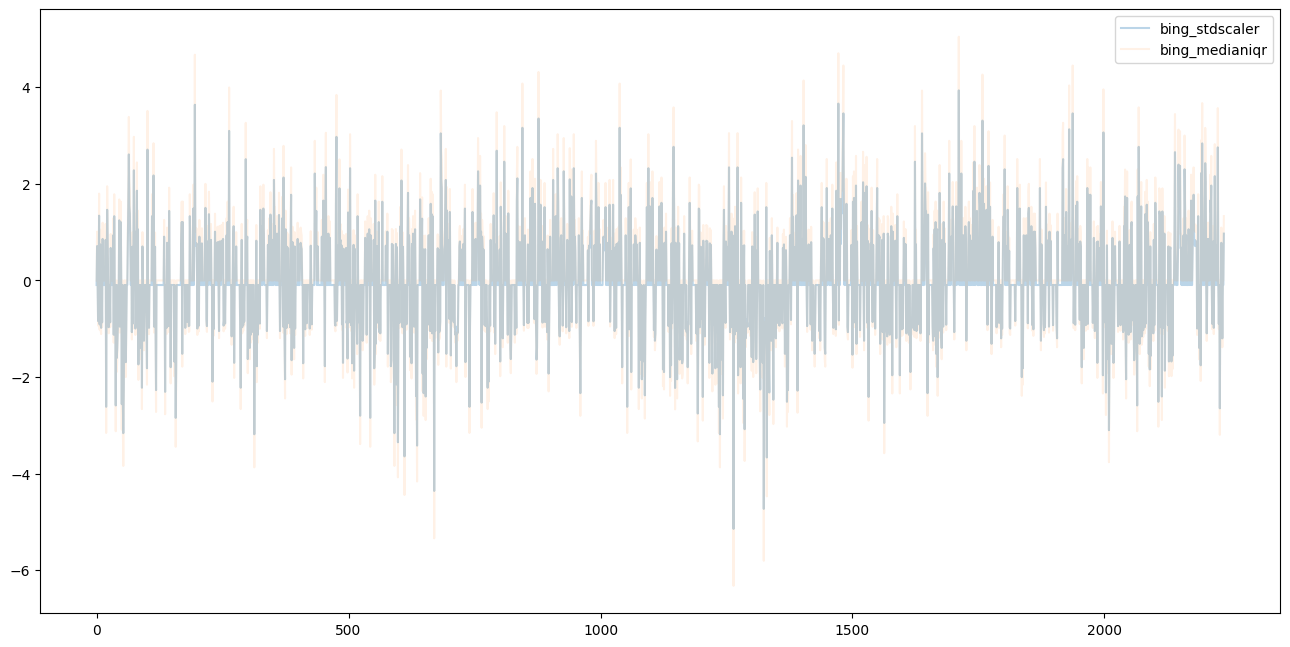

In [ ]:
# Verify 

if Bing_Arc == True:
  # corpus_sents_df['bing'].plot(alpha=0.3)
  corpus_sents_df['bing_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['bing_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate SentiWord Sentiment Polarities (Optional: Auto)**

In [ ]:
if SentiWord_Arc == True:
  model_base = 'sentiword'
  model_name = 'sentiword_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_sentiword.csv

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv

Top of Dictionary datafile ----------
"","x","y"
"1","365 days",-0.5
"2","366 days",0.25
"3","3tc",-0.25
"4","a fortiori",0.25


In [ ]:
# Read Lexicon into DataFrame 

if SentiWord_Arc == True:

  lexicon_sentiword_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_sentiword.csv')
  lexicon_sentiword_df['x'] = lexicon_sentiword_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_sentiword_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_sentiword_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_sentiword_df.head()
    lexicon_sentiword_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20093 non-null  int64  
 1   x           20092 non-null  object 
 2   y           20093 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 471.1+ KB


In [ ]:
# Convert DataFrame to Dict[word] = polarity

if SentiWord_Arc == True:

  id = lexicon_sentiword_df.word.values
  values = lexicon_sentiword_df.polarity.values

  lexicon_sentiword_dt = dict(zip(id, values))
  # lexicon_sentiword_dt

  # Test
  sent_test='I hate Mondays.'
  print(text2sentiment(sent_test, lexicon_sentiword_dt))

-0.25


In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Sentiment evaluation function
def sentiment_sentiword(text_str):
  '''
  Given a text string
  Return corresponding sentiment value based on sentimentr lexicon
  '''
  
  sentiment_val = text2sentiment(str(text_str), lexicon_sentiword_dt)

  return sentiment_val 

# Calculate all Sentiment values and variants
if SentiWord_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=sentiment_sentiword, sentiment_type='lexicon')

Processing Lexicon Sentiments/Sentences...
Processing Lexicon Sentiments/Paragraphs...
Processing Lexicon Sentiments/Sections...
Processing Lexicon Sentiments/Chapters...
Standardizing Chapters
Mean: 2.722252, StandardDeviation: 11.146345
Standardizing Sections
Mean: 2.722252, StandardDeviation: 11.146345
Standardizing Paragraphs
Mean: 0.057972, StandardDeviation: 1.031490
Standardizing Sentences
Mean: 0.029193, StandardDeviation: 0.694411


In [ ]:
# Get/Set Sentiment Statistics

if SentiWord_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

{'bing_chaps': {'sentiment_max': 637.3636210121063,
  'sentiment_min': -803.3451364045778},
 'bing_parags': {'sentiment_max': 286.24738599899933,
  'sentiment_min': -144.8805923727592},
 'bing_sects': {'sentiment_max': 637.3636210121063,
  'sentiment_min': -803.3451364045778},
 'bing_sents': {'sentiment_max': 118.5149837908823,
  'sentiment_min': -148.50732949319993},
 'sentimentr_chaps': {'sentiment_max': 48.900000000000006,
  'sentiment_min': -61.14999999999994},
 'sentimentr_parags': {'sentiment_max': 13.25, 'sentiment_min': -6.15},
 'sentimentr_sects': {'sentiment_max': 48.900000000000006,
  'sentiment_min': -61.14999999999994},
 'sentimentr_sents': {'sentiment_max': 4.5, 'sentiment_min': -4.85},
 'sentiword_chaps': {'sentiment_max': 23.934116666666668,
  'sentiment_min': -21.074117460317474},
 'sentiword_parags': {'sentiment_max': 11.705555555555556,
  'sentiment_min': -5.088844444444445},
 'sentiword_sects': {'sentiment_max': 23.934116666666668,
  'sentiment_min': -21.07411746031

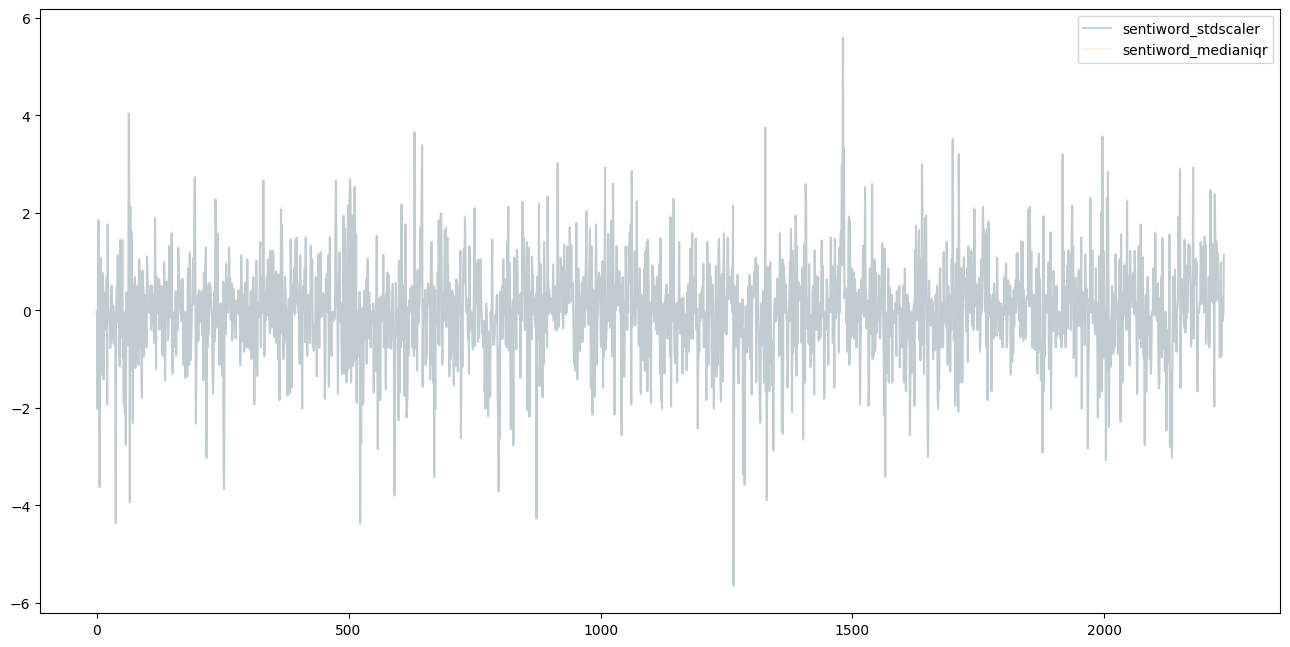

In [ ]:
# Verify 

if SentiWord_Arc == True:
  # corpus_sents_df['sentiword'].plot(alpha=0.3)
  corpus_sents_df['sentiword_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['sentiword_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate SenticNet Sentiment Polarities (Optional: Auto)**

* https://sentic.net/

In [ ]:
if SenticNet_Arc == True:
  model_base = 'senticnet'
  model_name = 'senticnet_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_senticnet.csv

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv

Top of Dictionary datafile ----------
"","x","y"
"1","aaa",0.606
"2","aah",-0.51
"3","abandon",-0.56
"4","abandonment",-0.65


In [ ]:
# Read Lexicon into DataFrame 

if SenticNet_Arc == True:

  lexicon_senticnet_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_senticnet.csv')
  lexicon_senticnet_df['x'] = lexicon_senticnet_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_senticnet_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_senticnet_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_senticnet_df.head()
    lexicon_senticnet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23626 entries, 0 to 23625
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23626 non-null  int64  
 1   x           23625 non-null  object 
 2   y           23626 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 553.9+ KB


In [ ]:
# Convert DataFrame to Dict[word] = polarity

if SenticNet_Arc == True:

  id = lexicon_senticnet_df.word.values
  values = lexicon_senticnet_df.polarity.values

  lexicon_senticnet_dt =dict(zip(id, values))
  # lexicon_jockersrinker_dt

  # Test
  sent_test='I hate Mondays.'
  text2sentiment(sent_test, lexicon_senticnet_dt)

-0.83

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Sentiment evaluation function
def sentiment_senticnet(text_str):
  '''
  Given a text string
  Return corresponding sentiment value based on senticnet lexicon
  '''
  
  sentiment_val = text2sentiment(str(text_str), lexicon_senticnet_dt)

  return sentiment_val 

# Calculate all Sentiment values and variants
if SenticNet_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=sentiment_senticnet, sentiment_type='lexicon')

Processing Lexicon Sentiments/Sentences...
Processing Lexicon Sentiments/Paragraphs...
Processing Lexicon Sentiments/Sections...
Processing Lexicon Sentiments/Chapters...
Standardizing Chapters
Mean: 87.074262, StandardDeviation: 36.968491
Standardizing Sections
Mean: 87.074262, StandardDeviation: 36.968491
Standardizing Paragraphs
Mean: 2.594787, StandardDeviation: 3.721540
Standardizing Sentences
Mean: 0.901635, StandardDeviation: 1.517153


In [ ]:
# Get/Set Sentiment Statistics

if SenticNet_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

{'bing_chaps': {'sentiment_max': 1370.2453035609035,
  'sentiment_min': -510.74975182254707},
 'bing_parags': {'sentiment_max': 277.83648167463986,
  'sentiment_min': -281.5303185789921},
 'bing_sects': {'sentiment_max': 1370.2453035609035,
  'sentiment_min': -510.74975182254707},
 'bing_sents': {'sentiment_max': 159.04762711088364,
  'sentiment_min': -143.27881911352605},
 'senticnet_chaps': {'sentiment_max': 238.27599999999993,
  'sentiment_min': 29.017000000000003},
 'senticnet_parags': {'sentiment_max': 31.884000000000007,
  'sentiment_min': -6.249999999999999},
 'senticnet_sects': {'sentiment_max': 238.27599999999993,
  'sentiment_min': 29.017000000000003},
 'senticnet_sents': {'sentiment_max': 9.503,
  'sentiment_min': -5.194999999999999},
 'sentimentr_chaps': {'sentiment_max': 154.74999999999997,
  'sentiment_min': -8.900000000000004},
 'sentimentr_parags': {'sentiment_max': 26.600000000000005,
  'sentiment_min': -8.5},
 'sentimentr_sects': {'sentiment_max': 154.74999999999997,


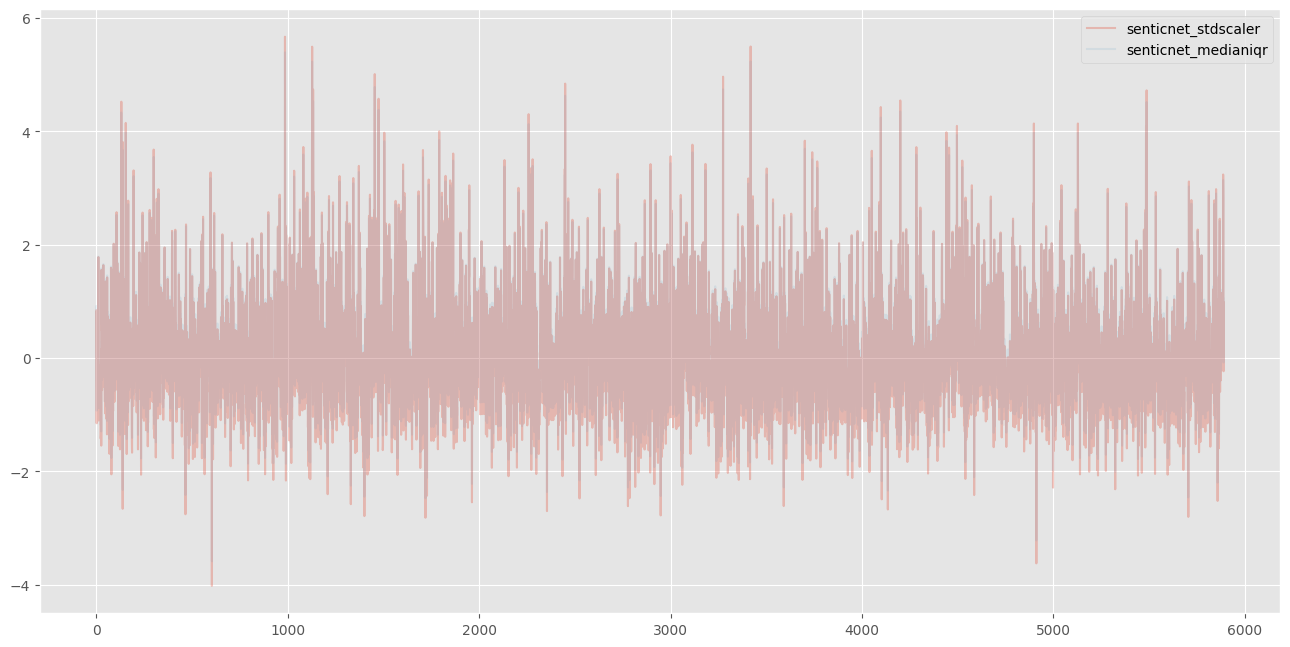

In [ ]:
# Verify 

if SenticNet_Arc == True:
  # corpus_sents_df['senticnet'].plot(alpha=0.3)
  corpus_sents_df['senticnet_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['senticnet_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate NRC Sentiment Polarities (Optional: Auto)**

In [ ]:
if NRC_Arc == True:
  model_base = 'nrc'
  model_name = 'nrc_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Verify Lexicon subdirectory and datafiles
!ls /gdrive/MyDrive/$LEXICONS_SUBDIR

print('\nTop of Dictionary datafile ----------')
!head -n 5  /gdrive/MyDrive/$LEXICONS_SUBDIR/hash_sentiment_nrc.csv

hash_sentiment_bing.csv       hash_sentiment_sentimentr.csv
hash_sentiment_nrc.csv	      hash_sentiment_sentiword.csv
hash_sentiment_senticnet.csv  hash_sentiment_syuzhet.csv

Top of Dictionary datafile ----------
"","x","y"
"1","abandon",-1
"2","abandoned",-1
"3","abandonment",-1
"4","abba",1


In [ ]:
# Read Lexicon into DataFrame 

if NRC_Arc == True:

  lexicon_nrc_df = get_lexicon(f'/gdrive/MyDrive/{LEXICONS_SUBDIR}/hash_sentiment_nrc.csv')
  lexicon_nrc_df['x'] = lexicon_nrc_df['x'].astype('string')

  # Clean/Reorg DataFrame
  lexicon_nrc_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
  lexicon_nrc_df.rename(columns={'x':'word', 'y':'polarity'}, inplace=True)

  # Verify
  if (PLOT_OUTPUT == 'All'):
    lexicon_nrc_df.head()
    lexicon_nrc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5468 non-null   int64 
 1   x           5468 non-null   object
 2   y           5468 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 128.3+ KB


In [ ]:
# Convert DataFrame to Dict[word] = polarity

if NRC_Arc == True:

  id = lexicon_nrc_df.word.values
  values = lexicon_nrc_df.polarity.values

  lexicon_nrc_dt =dict(zip(id, values))
  # lexicon_jockersrinker_dt

In [ ]:
# Calculate NRC Sentiment [0,1,2]

def nrc_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_total = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    text_sentiment_total += lex_discrete2continous_sentiment(str(aword), lexicon_nrc_dt)
  text_sentiment_norm = text_sentiment_total/(np.log(text_len)+10)

  return text_sentiment_norm
  

In [ ]:
# Test

if NRC_Arc == True:
  sent_test='I hate Mondays.'
  print(nrc_discrete2continous_sentiment(sent_test))

-9.010135447483094


In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Calculate all Sentiment values and variants
if NRC_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=nrc_discrete2continous_sentiment, sentiment_type='function')

Processing Function Sentiments/Sentences...
Processing Function Sentiments/Paragraphs...
Processing Function Sentiments/Sections...
Processing Function Sentiments/Chapters...
Standardizing Chapters
Mean: 345.395994, StandardDeviation: 181.602525
Standardizing Sections
Mean: 345.395994, StandardDeviation: 181.602525
Standardizing Paragraphs
Mean: 12.557774, StandardDeviation: 22.309106
Standardizing Sentences
Mean: 4.748267, StandardDeviation: 11.385673


In [ ]:
# Get/Set Sentiment Statistics

if NRC_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

{'bing_chaps': {'sentiment_max': 1370.2453035609035,
  'sentiment_min': -510.74975182254707},
 'bing_parags': {'sentiment_max': 277.83648167463986,
  'sentiment_min': -281.5303185789921},
 'bing_sects': {'sentiment_max': 1370.2453035609035,
  'sentiment_min': -510.74975182254707},
 'bing_sents': {'sentiment_max': 159.04762711088364,
  'sentiment_min': -143.27881911352605},
 'nrc_chaps': {'sentiment_max': 927.1440193711202,
  'sentiment_min': -22.21436380753602},
 'nrc_parags': {'sentiment_max': 174.4577259061735,
  'sentiment_min': -54.0095897273813},
 'nrc_sects': {'sentiment_max': 927.1440193711202,
  'sentiment_min': -22.21436380753602},
 'nrc_sents': {'sentiment_max': 82.51225172599416,
  'sentiment_min': -49.66531057260024},
 'senticnet_chaps': {'sentiment_max': 238.27599999999993,
  'sentiment_min': 29.017000000000003},
 'senticnet_parags': {'sentiment_max': 31.884000000000007,
  'sentiment_min': -6.249999999999999},
 'senticnet_sects': {'sentiment_max': 238.27599999999993,
  'se

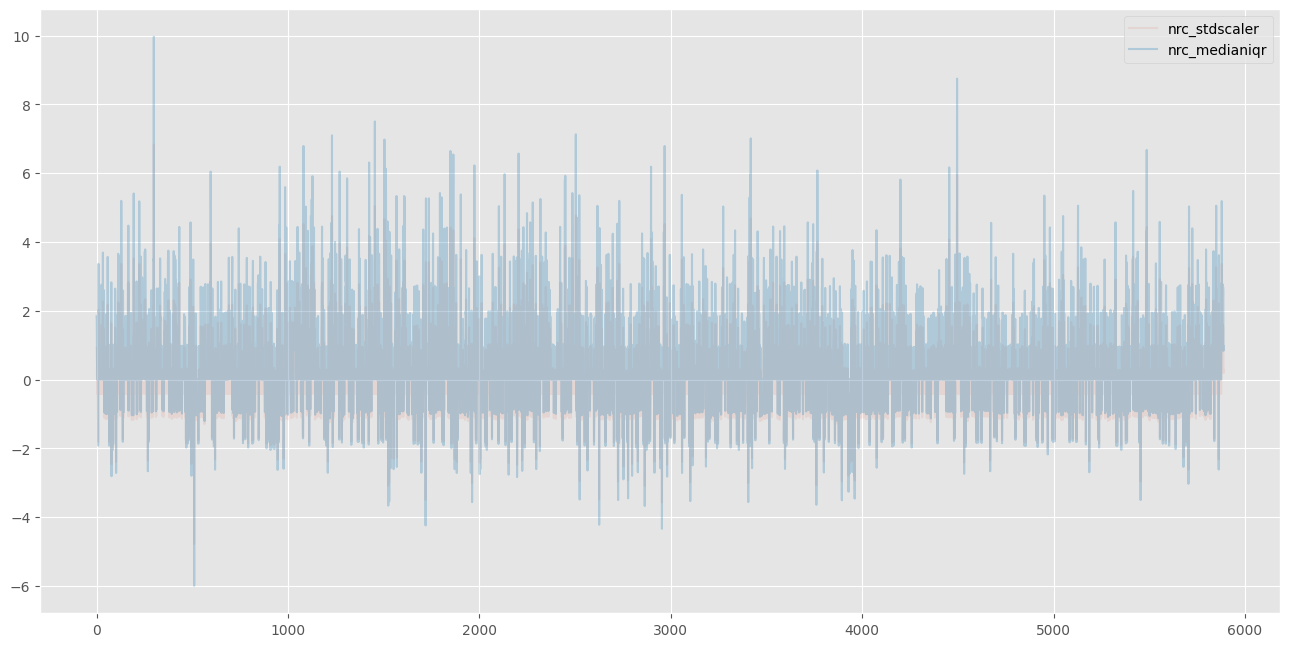

In [ ]:
# Verify 

if NRC_Arc == True:
  # corpus_sents_df['nrc'].plot(alpha=0.3)
  corpus_sents_df['nrc_stdscaler'].plot(alpha=0.1)
  corpus_sents_df['nrc_medianiqr'].plot(alpha=0.3)
  plt.legend(loc='best');

### **Calculate Afinn Sentiment Polarities (Optional: Auto)**

* https://github.com/fnielsen/afinn

In [ ]:
if AFINN_Arc == True:
  model_base = 'afinn'
  model_name = 'afinn_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if AFINN_Arc == True:
  !pip install afinn

In [ ]:
# Install and configure for English

if AFINN_Arc == True:
  from afinn import Afinn
  afinn = Afinn(language='en')

  # Test

  # afinn.score('I had the worst day.')

In [ ]:
# Calculate AFINN Sentiment [0,1,2]

def afinn_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_total = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    text_sentiment_total += afinn.score(aword)
  text_sentiment_norm = text_sentiment_total/(np.log(text_len)+0.1)

  return float(text_sentiment_norm)  # return float vs np.float64

In [ ]:
# Test

if AFINN_Arc == True:
  sent_test='I hate Mondays.'
  print(afinn_discrete2continous_sentiment(sent_test))

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Calculate all Sentiment values and variants
if AFINN_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=afinn_discrete2continous_sentiment, sentiment_type='function')

In [ ]:
# Get/Set Sentiment Statistics

if AFINN_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if AFINN_Arc == True:
  # corpus_sents_df['afinn'].plot(alpha=0.3)
  corpus_sents_df['afinn_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['afinn_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate VADER Sentiment Polarities (Optional: Auto)**

In [ ]:
if VADER_Arc == True:
  model_base = 'vader'
  model_name = 'vader_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if VADER_Arc == True:
  # Sentiment evaluation function
  sid = SentimentIntensityAnalyzer()

  # Test
  sid.polarity_scores('hello world')

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

if VADER_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=sid.polarity_scores, sentiment_type='compound')

In [ ]:
# Get/Set Sentiment Statistics

if VADER_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if VADER_Arc == True:
  # corpus_sents_df['vader'].plot(alpha=0.3)
  corpus_sents_df['vader_stdscaler'].plot(alpha=0.1)
  corpus_sents_df['vader_medianiqr'].plot(alpha=0.3)
  plt.legend(loc='best');

### **Calculate TextBlob Sentiment Polarities (Optional: Auto)**

In [ ]:
if TextBlob_Arc == True:
  model_base = 'textblob'
  model_name = 'textblob_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if TextBlob_Arc == True:
  from textblob import TextBlob

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

def textblob_sentiment(text_str):
  '''
  Given a text string
  Return a sentiment value between -1.0 to +1.0 using TextBlob
  '''
  return TextBlob(text_str).sentiment.polarity

# Calculate all Sentiment values and variants
if TextBlob_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=textblob_sentiment, sentiment_type='function')

In [ ]:
# Get/Set Sentiment Statistics

if TextBlob_Arc == True:
  get_lexstats(corpus_sents_df, model_name, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_name, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_name, text_unit='section')
  get_lexstats(corpus_chaps_df, model_name, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if TextBlob_Arc == True:
  # corpus_sents_df['textblob'].plot(alpha=0.3)
  corpus_sents_df['textblob_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['textblob_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate Pattern Sentiment Polarities (Optional: Auto)**

In [ ]:
if Pattern_Arc == True:
  model_base = 'pattern'
  model_name = 'pattern_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if Pattern_Arc == True:
  !pip install pattern

In [ ]:
if Pattern_Arc == True:
  from pattern.en import sentiment as pattern_sa

In [ ]:
# Test

if Pattern_Arc == True:
  sent_test='I hate Mondays.'
  pattern_sa(sent_test)[0]

In [ ]:
# Calculate Pattern Sentiment [0,1,2]

def pattern_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_total = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    text_sentiment_total += pattern_sa(str(aword))[0]
  text_sentiment_norm = text_sentiment_total/(np.log(text_len)+0.01)

  return text_sentiment_norm

In [ ]:
# Test

if Pattern_Arc == True:
  sent_test='I hate Mondays.'
  print(pattern_discrete2continous_sentiment(sent_test))

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Calculate all Sentiment values and variants
if Pattern_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=pattern_discrete2continous_sentiment, sentiment_type='function')

In [ ]:
# Get/Set Sentiment Statistics

if Pattern_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if Pattern_Arc == True:
  # corpus_sents_df['pattern'].plot(alpha=0.3)
  corpus_sents_df['pattern_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['pattern_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

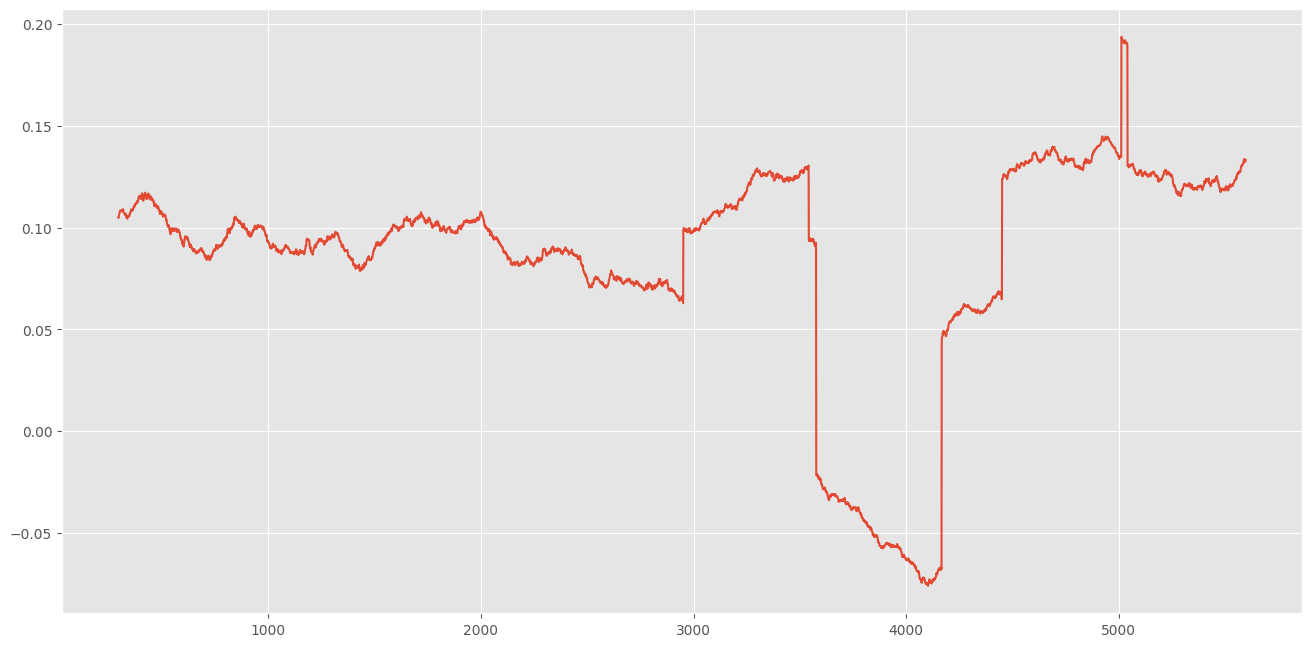

In [ ]:
# Verify 

if Pattern_Arc == True:
  corpus_sents_df['pattern'].rolling(10*win_s1per, center=True).mean().plot();

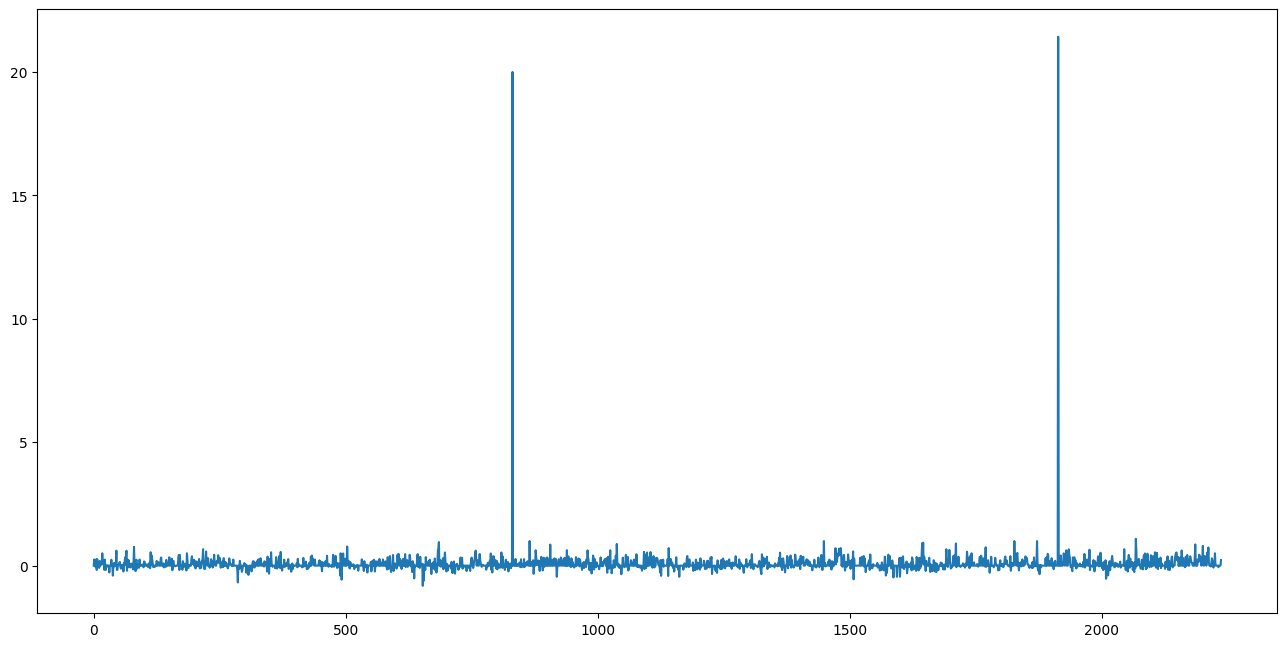

In [ ]:
corpus_sents_df['pattern'].plot()

In [ ]:
# Check Pattern Series for Outliers

if Pattern_Arc == True:
  print('Furthest Positive Outlier in Pattern Time Series:')
  corpus_sents_df[corpus_sents_df['pattern'] == corpus_sents_df['pattern'].max()][['sent_no', 'pattern', 'sent_raw']]

  pattern_max_sentno = int(corpus_sents_df[corpus_sents_df['pattern'] == corpus_sents_df['pattern'].max()][['sent_no']].max())
  print(f'Max Outlier for Pattern Sentiment Model is at Sentence #{pattern_max_sentno}')

  print('Furthest Negative Outlier in Pattern Time Series:')
  corpus_sents_df[corpus_sents_df['pattern'] == corpus_sents_df['pattern'].min()][['sent_no', 'pattern', 'sent_raw']]

  pattern_min_sentno = int(corpus_sents_df[corpus_sents_df['pattern'] == corpus_sents_df['pattern'].min()][['sent_no']].min())
  print(f'Max Outlier for Pattern Sentiment Model is at Sentence #{pattern_min_sentno}')

  print('\n')
  print('Median Absolute Deviation (MAD) for Pattern Time Series:')
  robust.mad(corpus_sents_df['pattern'])

  temp_df = pd.DataFrame()

Furthest Positive Outlier in Pattern Time Series:


sent_no    pattern    sent_raw
1914     1914  21.428571  Certainly.

Max Outlier for Pattern Sentiment Model is at Sentence #1914
Furthest Negative Outlier in Pattern Time Series:


sent_no   pattern                             sent_raw
653      653 -0.818033  Im terribly afraid of the Kalidahs.

Max Outlier for Pattern Sentiment Model is at Sentence #653


Median Absolute Deviation (MAD) for Pattern Time Series:


0.08761057151728258

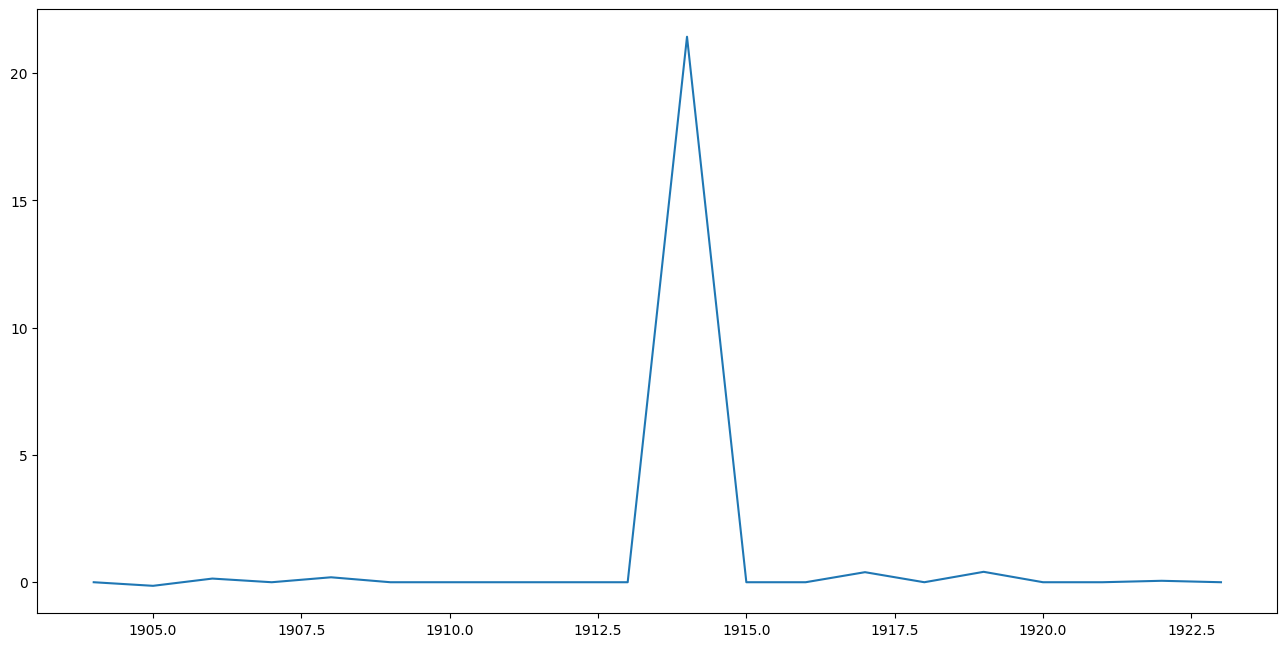

In [ ]:
# Verify what is happening in the neighborhood of the Maximum Sentiment Outlier for Pattern

if Pattern_Arc == True:
  outlier_halfwin = 10
  outlier_winstart = pattern_max_sentno - outlier_halfwin
  outlier_winend = pattern_max_sentno + outlier_halfwin

  corpus_sents_df.iloc[outlier_winstart:outlier_winend]['pattern'].plot();

In [ ]:
# Pattern library has a bug wherein a/several Sentences have far outlying Sentiments
#   we need to clip these to within n * MAD

if Pattern_Arc == True:
  MAD_Clip_Boundary = 5.2 #@param {type:"slider", min:1.0, max:10, step:0.1}

  # find the limits of 2.5 Median Absolute Deviation of Pattern Time Series

  clip_25mad = MAD_Clip_Boundary * robust.mad(corpus_sents_df['pattern'])
  print(f'Clip Pattern Series at 2.5 x Median Absolute Deviation (MAD) = {clip_25mad}')

  # Create a Temporary DataFrame to test/find best MAD Clipping multiplier for Pattern
  temp_df['pattern'] = pd.Series(corpus_sents_df['pattern'].clip(upper=clip_25mad))
  temp_df['pattern'].clip(lower=-clip_25mad, inplace=True)

  # Verify 
  temp_df['pattern'].plot();

In [ ]:
# Once a good Clip_MAD_multiplier if found, update Pattern Time Series with it

if Pattern_Arc == True:
  corpus_sents_df['pattern'] = temp_df['pattern']
  corpus_sents_df['pattern'].plot();

### **Calculate Stanza/OpenNLP Sentiment Polarities (Optional: Auto)**

* https://github.com/piyushpathak03/NLP-using-STANZA/blob/main/Stanza.ipynb

In [ ]:
if Stanza_Arc == True:
  model_base = 'stanza'
  model_name = 'stanza_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if Stanza_Arc == True:
  !pip install stanza

In [ ]:
%time

import stanza

if Stanza_Arc == True:
  stanza.download('en')

In [ ]:
if Stanza_Arc == True:
  nlp = stanza.Pipeline('en', processors='tokenize,sentiment')

In [ ]:
# Test stanza directly

# doc = nlp('Ram is a bad boy')
# for i, sentence in enumerate(doc.sentences):
#     print(i, sentence.sentiment)

In [ ]:
# Calculate Stanza Sentiment [0,1,2]

def stanza_discrete2continous_sentiment(text):
  '''
  Given a plain text string, give it to
    Stanford Stanza (OpenNLP) to calculate sentiment for each word on a 3 point scale 0-2
  Return a sentiment value for the entire sentence (sum of word sentiments/log(len of sentence)) 
    that approximates a normal distribution for all values
    In order to get more fine grained measure of overall Sentence sentiment
    Sentiment values will be Normalized/Standardized so absolute precision is not required
  '''
  text_sentiment_tot = 0.
  text_ls = text.split()
  text_len = len(text_ls)
  for aword in text_ls:
    adoc = nlp(aword)
    for i, sentence in enumerate(adoc.sentences):
      text_sentiment_tot += float(sentence.sentiment)
  text_sentiment_norm = text_sentiment_tot/(np.log(text_len)+0.1)

  return text_sentiment_norm

In [ ]:
# Test

if Stanza_Arc == True:
  sent_test='I hate Mondays.'
  print(stanza_discrete2continous_sentiment(sent_test))

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# NOTE: requires about 30-50mins (20210708 at 0730) Colab Pro: GPU+RAM 
#                      2hrs30mins (20210802 at 1330) Colab Pro: CPU only

# Calculate all Sentiment values and variants
if Stanza_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=stanza_discrete2continous_sentiment, sentiment_type='function')

In [ ]:
# Get/Set Sentiment Statistics

if Stanza_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if Stanza_Arc == True:
  # corpus_sents_df['stanza'].plot(alpha=0.3)
  corpus_sents_df['stanza_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['stanza_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate Flair Sentiment Polarities (Optional: Auto)**

In [ ]:
if Flair_Arc == True:
  model_base = 'flair'
  model_name = 'flair_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
if Flair_Arc == True:
  !pip install flair

In [ ]:
if Flair_Arc == True:
  from flair.models import TextClassifier
  from flair.data import Sentence

  classifier = TextClassifier.load('en-sentiment')

In [ ]:
# Test

if Flair_Arc == True:
  sentence = Sentence('The food was great!')
  classifier.predict(sentence)

  # print sentence with predicted labels
  print('Sentence above is: ', sentence.labels)

In [ ]:
def get_flairsentiment(text_str):
  # TODO: For efficiency, combine sentences in batches as arrays (if possible)
  '''
  Given a text string
  Return a floating point -1.0 to 1.0 value for Sentiment
  '''

  text_tokenized_obj = Sentence(text_str)
  classifier.predict(text_tokenized_obj)

  # print(f'Processing text_str: {text_str}')
  sentiment_str = str(text_tokenized_obj.labels[0])

  sentiment_ls = sentiment_str.split(' ')
  
  sentiment_sign = sentiment_ls[0]

  if sentiment_sign.lower() == 'positive':
    sign_multiplier = 1.0
  else:
    sign_multiplier = -1.0

  sentiment_abs = float(sentiment_ls[1][1:-1])

  sentiment_fl = sign_multiplier * sentiment_abs 

  return sentiment_fl

In [ ]:
# Test

if Flair_Arc == True:
  get_flairsentiment('it is.')

In [ ]:
# Calculate all the Sentence, Paragraph, Section and Chapter Sentiment Scores and Standardized variants

# Calculate all Sentiment values and variants
if Flair_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=get_flairsentiment, sentiment_type='function')

In [ ]:
corpus_sents_df[corpus_sents_df['sent_clean'].str.find('smokeing') != -1]

In [ ]:
corpus_sents_df.columns

In [ ]:
# Get/Set Sentiment Statistics

if Flair_Arc == True:
  get_lexstats(corpus_sents_df, model_base, text_unit='sentence')
  get_lexstats(corpus_parags_df, model_base, text_unit='paragraph')
  get_lexstats(corpus_sects_df, model_base, text_unit='section')
  get_lexstats(corpus_chaps_df, model_base, text_unit='chapter')

  # Validate
  corpus_lexicons_stats_dt

  # corpus_lexicons_stats_dt['vader']['sents']['sentiment_max']

In [ ]:
# Verify 

if Flair_Arc == True:
  corpus_sents_df['flair'].plot(alpha=0.3)
  corpus_sents_df['flair_stdscaler'].plot(alpha=0.3)
  corpus_sents_df['flair_medianiqr'].plot(alpha=0.1)
  plt.legend(loc='best');

### **Calculate FRENCH FEEL Lexicon Sentiment Polarities (Optional: Auto)**

* https://github.com/kujjwal02/French_Tragedies_Dataset/blob/master/French%20Tragedies.ipynb
* https://github.com/shalinijaiswalsj09/French-Language-Processing-/blob/master/feelNLP.py (201802271s) FEEL Lexical analysis
*https://github.com/nishchaychawla/Sentiment_Analysis_of_french_text (20180226 3s) Sentiment analysis of ftragedy dataset using tidytext and French Expanded Emotion Lexicon
* https://github.com/kujjwal02/French_Tragedies_Dataset (20180502 5s) Lexical SA of French Tragedies from Kaggle


In [ ]:
lexicon_feel_df = pd.read_csv('https://raw.githubusercontent.com/kujjwal02/French_Tragedies_Dataset/master/FEEL.csv',delimiter=';', index_col=0)

In [ ]:
lexicon_feel_df.head()

In [ ]:
lexicon_feel_df[lexicon_feel_df.word == 'bien']

In [ ]:
lexicon_feel_df = lexicon_feel_df.drop(2831)

In [ ]:
lexicon_feel_df.value_counts()

In [ ]:
lexicon_feel_df.set_index('word')

In [ ]:
lexicon_feel_df.set_index('word').loc['moins']

In [ ]:
lexicon_feel_df.polarity.value_counts().plot(kind='bar')

In [ ]:
lexicon_feel_df[lexicon_feel_df.word.str.split().map(lambda lst: len(lst)) > 1]

In [ ]:
lexicon_feel_df['length'] = lexicon_feel_df.word.str.split().map(lambda lst: len(lst))

In [ ]:
lexicon_feel_dt = lexicon_feel_df.set_index('word')

In [ ]:
lexicon_feel_dt.loc['mal']['polarity']

In [ ]:
def get_frsentiment(fr_sent):
  '''
  Given a text sentence in French
  Return a sentiment 1.0 (positive) or -1.0 (negative)
  '''

  fr_sent_clean = fr_sent.translate(str.maketrans('', '', string.punctuation))
  asent_sentiment = 0.0
  pol_fl = 0.0
  token_ls = fr_sent_clean.split()
  for i, atoken in enumerate(token_ls):
    try:
      atoken_sentiment = lexicon_feel_dt.loc[atoken.lower()]['polarity']
      print(f'atoken_sentiment: {atoken_sentiment}')
      if atoken_sentiment.lower().strip() == 'positive':
        pol_fl = 1.0
      elif atoken_sentiment.lower().strip() == 'negative':
        pol_fl = -1.0
      else:
        print(f'ERROR: atoken_sentiment = {atoken_sentiment}')

      asent_sentiment += pol_fl
    except KeyError:
      pass

  return asent_sentiment

# Test

test_fr_sent1 = u"C'est une voiture mal y terribles y horrible."
test_fr_sent2 = u"C'est une voiture super y bon y bonne."
test_fr_sent3 = u"C'est une voiture."

print(get_frsentiment(re.escape(test_fr_sent1)))



"""
  # for window_size in range(6, 0, -1):
  for each in window(sent.split(), window_size):
      sub_str = ' '.join(each)
      try:
          sentiment = lexicon_dict.loc[sub_str]
          sent.replace(sub_str, '')
          yield sentiment
#                 if window_size > 1:
#                     print(sub_str, ':', proprty['polarity'])
      except KeyError:
          pass
""";

### **Calculate FRENCH VADER Sentiment Polarities (Optional: Auto)**

* https://github.com/thomas7lieues/vader_FR
* https://github.com/brunneis/vader-multi 

In [ ]:
!pip install vaderSentiment-fr

In [ ]:
SIA = SentimentIntensityAnalyzer()

In [ ]:
phrase = "Une phrase très cool à analyser"

score = SIA.polarity_scores(phrase)

print(score)

In [ ]:
model_base = 'vaderfr'
model_name = 'vaderfr_lnorm_medianiqr'

col_medianiqr = f'{model_base}_medianiqr'
col_meanstd = f'{model_base}_meanstd'

col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

get_sentiments(model_base=model_base, sentiment_fn=SIA.polarity_scores, sentiment_type='compound', text_prep='raw')

In [ ]:
get_sentiments(model_base=model_base, sentiment_fn=SIA.polarity_scores, sentiment_type='compound', text_prep='raw')

In [ ]:
corpus_sents_df.columns

In [ ]:

corpus_sents_df['vaderfr_stdscaler_roll10'] = corpus_sents_df['vaderfr_stdscaler'].rolling(win_s1per*10, center=True).mean()

In [ ]:
corpus_sents_df['vaderfr_stdscaler_roll10'].plot()
plt.title(f'{CORPUS_FULL}\nFrench VADER Sentence StdScaler SMA 10%')

### **Calculate FRENCH TextBlob Sentiment Polarities (Optional: Auto)**

* https://pypi.org/project/textblob-fr/ 

In [ ]:
!pip install textblob_fr

In [ ]:
# import re
# import spacy
# from spacy.lang.fr.stop_words import STOP_WORDS
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
TextBlobFr = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# from nltk.tokenize import sent_tokenize
# from nltk.tokenize import word_tokenize

In [ ]:
TextBlobFrench_Arc = True

if TextBlobFrench_Arc == True:
  model_base = 'textblobfr'
  model_name = 'textblobfr_lnorm_medianiqr'

  col_medianiqr = f'{model_base}_medianiqr'
  col_meanstd = f'{model_base}_meanstd'

  col_lnorm_medianiqr = f'{model_base}_lnorm_medianiqr'
  col_lnorm_meanstd = f'{model_base}_lnorm_meanstd'

In [ ]:
# Test

blob2 = TextBlobFr(u"C'est une voiture terribles.")
blob2.sentiment
blob2 = TextBlobFr(u"C'est une voiture super y bon.")
blob2.sentiment
blob2 = TextBlobFr(u"C'est une voiture.")
blob2.sentiment

In [ ]:
for i in range(5):
  test_sent = corpus_sents_df.iloc[i]['sent_raw']
  print(f'test_sent: {test_sent}')
  test_score = TextBlobFr(test_sent).sentiment[0]
  print(test_score)

In [ ]:
def textblobfr_sentiment(text_str):
  '''
  Given a text string
  Return a sentiment value between -1.0 to +1.0 using TextBlob
  '''
  return TextBlobFr(text_str).sentiment[0]

# Test

test_sents_ls = [u"C'est une voiture terribles.", u"C'est une voiture super y bon.", u"C'est une voiture."]

for i,asent in enumerate(test_sents_ls):
  print(f'Sent #{i} Sentiment: {textblobfr_sentiment(asent)}\n     Sentence: {asent}')

In [ ]:
# Calculate all Sentiment values and variants
if TextBlobFrench_Arc == True:
  get_sentiments(model_base=model_base, sentiment_fn=textblobfr_sentiment, sentiment_type='function')

In [ ]:
win_s1per = int(1/100 * corpus_sents_df.shape[0])

In [ ]:


corpus_sents_df['textblobfr_stdscaler_roll10'] = corpus_sents_df['textblobfr_stdscaler'].rolling(10*win_s1per, center=True).mean()
corpus_sents_df['textblobfr_stdscaler_roll10'].plot()
plt.title(f'{CORPUS_FULL}\nFrench TextBlob StdScaler SMA 10%')

In [ ]:
sentiments = []

for i in range(5):
  asent = corpus_sents_df.iloc[i]['sent_raw']
  sentiment = tb(asent).sentiment[0]
  if (sentiment > 0):
      sentiments.append('Positif')
  elif (sentiment < 0):
      sentiments.append('Negatif')
  else:
      sentiments.append('Neutre') 

[f'{x}\n' for x in sentiments]

In [ ]:
"""

def load_data():
  # https://github.com/adepril/CustomerSatisfactionAnalysisOfInsuranceCompanies/blob/main/app.py

  df = pd.read_csv("https://raw.githubusercontent.com/adepril/datasets/main/insurance-reviews-france-Comments.csv")
  df = df.drop(['Unnamed: 0'],axis=1)
  df = df.dropna()
  df["Comment"]= df["Comment"].str.lower()

  # Word Tokenization and deleting punctuation
  comments=[]
  for comment in df["Comment"].apply(str):
      WordTokenizer = []
      for word in  re.sub("\W"," ",comment ).split():
          WordTokenizer.append(word)
      comments.append(WordTokenizer)

  #Ajoute une nouvelle colonne
  df["Word_Tokenizer"]= comments

  # Set new Spacy's Stop Word list by deleting negation word 
  stop_words=set(STOP_WORDS)

  deselect_stop_words = ['n\'','ne','pas','plus','personne','aucun','ni','aucune','rien']
  for w in deselect_stop_words:
      if w in stop_words:
          stop_words.remove(w)
      else:
          continue

  # Add a new column for comments without StopWords
  AllfilteredComment=[]
  for comment in df["Word_Tokenizer"]:
      filteredComment = [w for w in comment if not ((w in stop_words) or (len(w) == 1))]
      AllfilteredComment.append(' '.join(filteredComment))
      
  df["CommentAferPreproc"]=AllfilteredComment

  # Sentiment Analysis with TextBlob
  sentiments = []
  for i in df["CommentAferPreproc"]:
      sentiment = tb(i).sentiment[0]
      if (sentiment > 0):
          sentiments.append('Positif')
      elif (sentiment < 0):
          sentiments.append('Negatif')
      else:
          sentiments.append('Neutre')   

  # Ajoute une colonne : Sentiment
  df["sentiment"]=sentiments

  return df

df = load_data()

""";

### **Calculate FRENCH SVM Sentiment Polarities (Optional: Auto)**

* https://github.com/amineabdaoui/python-sentiment-classification (20200813) Pretrained SVM Sentiment Model

In [ ]:
!git clone https://github.com/amineabdaoui/python-sentiment-classification.git

In [ ]:
%cd ./python-sentiment-classification/

In [ ]:
!pip install -r requirements.txt

In [ ]:
import predictSentiment as ps

print(ps.predictFrench('Je suis content, il fait beau c\'est super ! '))
print(ps.predictFrench('Je suis triste, il pleut c\'est horrible ! '))

In [ ]:
%cd ..
!pwd

### **(Optional) Calculate SentimentR and SyuzhetR Sentiments in RStudio**

**NOTE** Process in RStudio with the following R Script
```
# Setup
# getwd()
# list.files(pattern='*.csv')
# setwd('./sentimenttime')

###
# Begin SyuzhetR Preprocessing
library('syuzhet')

# import the RAW Sentences.csv, not CLEAN
# because SentimentR assigns greater polarity to HATE > hate
# TODO: Compare CLEAN vs RAW for SentimentR and VADER for impact of such Heuristics

# >>> CUSTOMIZE THIS FOR EACH CORPUS <<<
corpus_name = 'ddefoe_robinsoncrusoe' 
# >>> CUSTOMIZE THIS FOR EACH CORPUS <<<

# SentimentTime Preprocessing (e.g. corpus_text_sents_raw_ddefoe_robinsoncrusoe.csv)
input_filename_prefix = 'corpus_text_sents_raw_'
input_filename_suffix = '.csv'

corpus_input_filename = trimws(paste0(input_filename_prefix, corpus_name, input_filename_suffix, sep=' '))

###
syuzhet_output_prefix = 'sum_sentiments_syuzhetR_4models_sentimenttimeraw_'
syuzhet_output_suffix = '.csv'
syuzhet_output = trimws(paste0(syuzhet_output_prefix, corpus_name, syuzhet_output_suffix, sep=' '))


# Use 4 Models in Syuzhet to parse Corpus and generate 4 Sentiment Time Series

# (OPTION A) Read preprocessed Corpus *.csv (Sentence Tokenized and text cleaned by sentimenttime)
corpus_str <- read.csv(corpus_input_filename,header=T)$sent_raw

# corpus_sents_v <- syuzhet::get_sentences(corpus_str) # SyuzhetR often splits a line with one Sentence into several lines
corpus_sents_v <- read.csv(corpus_input_filename, header = TRUE, row.names = 1)

# (OPTION B) Read raw textfile using Syuzhet Sentence Tokenizer and text preprocessing
# corpus_str <- syuzhet::get_text_as_string(corpus_input)
# corpus_sents_v <- syuzhet::get_sentences(corpus_str)

# Read in RAW Sentences
syuzhet_all_df <- data.frame(sent_raw = corpus_sents_v)

# Compute Sentiment values for each Model 
syuzhet_all_df$syuzhet <- syuzhet::get_sentiment(corpus_sents_v, method='syuzhet')
syuzhet_all_df$bing <- syuzhet::get_sentiment(corpus_sents_v, method='bing')
syuzhet_all_df$afinn <- syuzhet::get_sentiment(corpus_sents_v, method='afinn')
syuzhet_all_df$nrc <- syuzhet::get_sentiment(corpus_sents_v, method='nrc')

# Save Syuzhet Results    
write.csv(syuzhet_all_df, syuzhet_output)



# Begin SentimentR Processing
library('sentimentr')

# Set Output Sentiments Datafile names
sentimentr_output_prefix = 'sum_sentiments_sentimentR_7models_sentimenttimeraw_'
sentimentr_output_suffix = '.csv'
sentimentr_output = trimws(paste0(sentimentr_output_prefix, corpus_name, sentimentr_output_suffix, sep=' '))

# Use vector of RAW sentences already read (originally parsed by SentimentTime.py) 
# sentimentr_sents_v <- sentimentr::get_sentences(corpus_sents_v)
# sentimentr_sents_v <- corpus_sents_v
  
  
# Create data.frame with jockers_rinker sentiments
sentimentr_all_df <- data.frame(sent_raw = corpus_sents_v)

# sentimentr_sents_v <- read.csv(corpus_input_filename, header = TRUE, row.names = 1)
# Create data.frame with jockers_rinker sentiments
# sentimentr_all_df <- data.frame(sent_raw = sentimentr_sents_v)

# Code from sentimentr.R
# 
# SentimentR function sentiment will not work on native R data types, only
#   types of 'get_sentences'/'get_sentences_char' created by passing text
#   through the sentence tokenizer textshape::split_sentence
# We fool SentimentR by copying and calling it's make_class function in utils.R
#   and passing our preprocessed text (sentence tokenization done in Python) to
#   ensure that SentimentR has the same number/alignment of Sentences in our Corpus
#   as all other Sentiment analysis methods
# 
# get_sentences.character <- function(x, ...) {
#   out <- textshape::split_sentence(x, ...)
#   make_class(out, "get_sentences", "get_sentences_character")
# }

# Code from SentimentR.r (in utils.R)
make_class <- function(x, ...) {
  class(x) <- unique(c(..., class(x)))    
  x
}

# Add other lexicon sentiments
sentimentr_all_df$jockers_rinker <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_jockers_rinker, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$jockers <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_jockers, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$huliu <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_huliu, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$lmcd <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_loughran_mcdonald, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$nrc <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_nrc, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$senticnet <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_senticnet, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment
sentimentr_all_df$sentiword <- sentimentr::sentiment(make_class(corpus_sents_v, "get_sentences", "get_sentences_character"), polarity_dt=lexicon::hash_sentiment_sentiword, hyphen=" ", neutral.nonverb.like=TRUE)$sentiment

write.csv(sentimentr_all_df, sentimentr_output)
```

## **Save Checkpoint**

In [ ]:
corpus_sents_df.shape

In [ ]:
corpus_sents_df.columns

In [ ]:
# Save Corpus DataFrames
 
# save_dataframes(df_ls=['baseline','sentimentr','syuzhetr','transformer','combined','subset','everything']):
save_dataframes(df_ls=['baseline'])

In [ ]:
# corpus_sents_df.iloc[2843]

# **Explore Sentiment Models and Arcs**

Baseline Models

* VADER [-1.0 to 1.0] zero peak
* TextBlob [-1.0 to 1.0] zero peak
* Stanza outliers [-1.0 to 199.0] pos, outliers(+peak)
* AFINN [-14 (-8 to 8) 20] discrete
* SentimentR 11,710 [-5.4 to 8.8] norm
* Syuzhet [-5.4 to 8.8] norm
* Bing [-100.0 (-20.0 to 20.0) 100] discrete, outliers
* Pattern [-1.0 to 1.0] norm
* SentiWord [-3.8 to 4.4] norm
* SenticNet [-3.8 to 10] norm
* NRC [-100.0 (-5.0 to 5.0) 100] zero, outliers

SentimentR Models

* Jockers_Rinker
* Jockers
* HuLiu
* NRC
* Loughran-McDonald
* SenticNet
* SentiWord

SyuzhetR Models

* Syuzhet
* Bing
* AFINN
* NRC

Tranformer Models

* NLPTown
* RoBERTa Large 15 Datasets
* BERT Yelp Dataset
* BERT Code Switching Hinglish
* IMDB 2-way 
* Huggingface Default (Distilled BERT)
* T5 IMDB 50k Dataset
* RoBERTa XML 8 Languages

## **EDA Baseline Plots**

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_sents_df.columns

standardize_ts_ls(corpus_sents_df, models_baseline_ls)

print('\nAfter Standardization ----------')
corpus_sents_df.columns

In [ ]:
corpus_sents_df['pattern'].rolling(800, center=True).mean().plot()

In [ ]:
corpus_sents_df.columns

##### **Interactive LOWESS Smoothed Plot**

Sum of minmax_diff: 1658.8391301265372


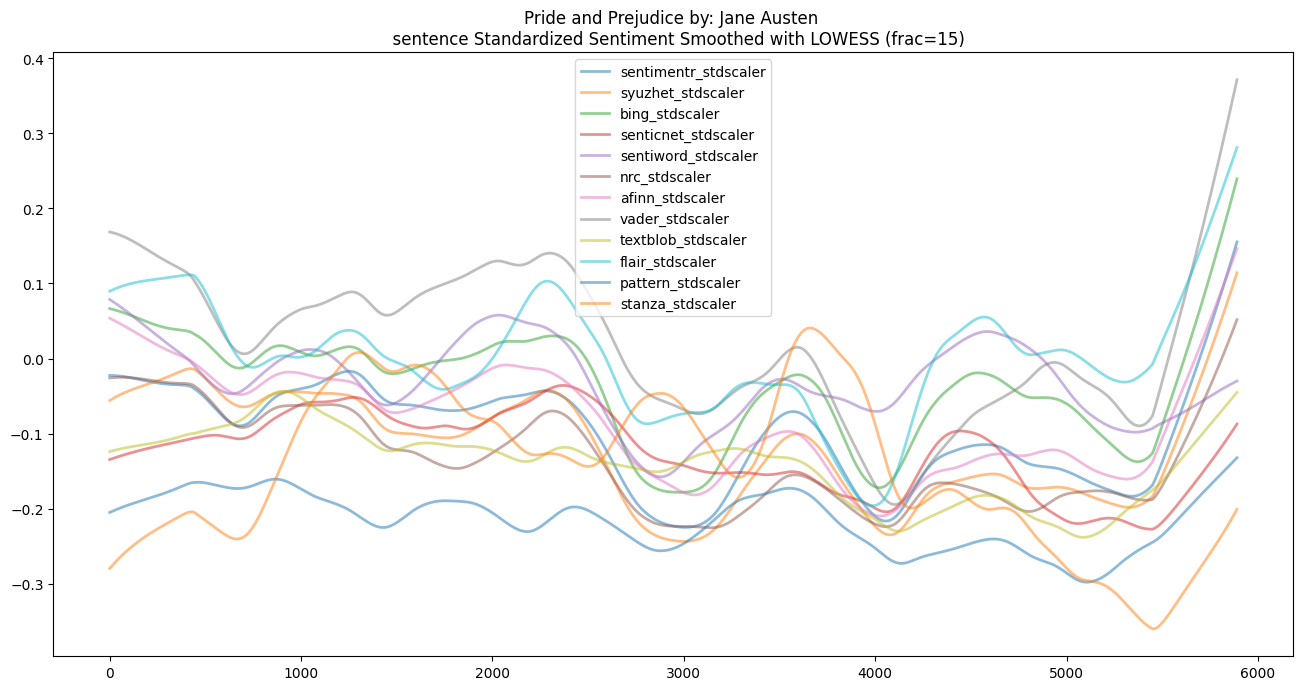

In [ ]:
# Sentence Plotly Interactive/Zoom Sentiment Plots

LOWESS_frac = 0.15 #@param {type:"slider", min:0.01, max:0.20, step:0.01}

SentimentR_Arc = True #@param {type:"boolean"}
Syuzhet_Arc = True #@param {type:"boolean"}
Bing_Arc = False #@param {type:"boolean"}
SenticNet_Arc = True #@param {type:"boolean"}
SentiWord_Arc = True #@param {type:"boolean"}
NRC_Arc = True #@param {type:"boolean"}
AFINN_Arc = False #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
# Mean_Subset_Arc = False #@param {type:"boolean"}
# MPQA_Arc = False #@param {type:"boolean"}
# SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr_stdscaler')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet_stdscaler')
if Bing_Arc == True:
  models_subset_ls.append('bing_stdscaler')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet_stdscaler')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword_stdscaler')
if NRC_Arc == True:
  models_subset_ls.append('nrc_stdscaler')
if AFINN_Arc == True:
  models_subset_ls.append('afinn_stdscaler')
if VADER_Arc == True:
  models_subset_ls.append('vader_stdscaler')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob_stdscaler')
if Flair_Arc == True:
  models_subset_ls.append('flair_stdscaler')
if Pattern_Arc == True:
  models_subset_ls.append('pattern_stdscaler')
if Stanza_Arc == True:
  models_subset_ls.append('stanza_stdscaler')
# if Mean_All_Arc == True:
#   models_subset_ls.append('mean_all')

"""
if len(str(SMA_Window_Percent)) == 1:
  roll_str = 'roll0' + str(SMA_Window_Percent)
else:
  roll_str = 'roll' + str(SMA_Window_Percent%100)

print(f'Rolling Window: {roll_str}')
""";

# 1192.73 - All

temp_df = get_lowess(corpus_sents_df, models_ls=models_subset_ls, text_unit='sentence', afrac=LOWESS_frac);

# plot_models(models_subset_ls, models_type='baseline', text_unit='sent_no', win_per=SMA_Window_Percent)
temp_df['minmax_diff'] = temp_df.max(axis=1) - temp_df.min(axis=1)
print(f"Sum of minmax_diff: {temp_df['minmax_diff'].sum()}");


##### **Grid Search LOWESS frac**


In [ ]:
temp_df['avg_stdscaler'] = corpus_sents_df[models_subset_ls].mean()
temp_df.head()

sentimentr_stdscaler_lowess  ...  avg_stdscaler
0                    -0.022470  ...            NaN
1                    -0.022475  ...            NaN
2                    -0.022480  ...            NaN
3                    -0.022485  ...            NaN
4                    -0.022491  ...            NaN

[5 rows x 15 columns]

In [ ]:
Frac_Start = 0.08 #@param {type:"slider", min:0.01, max:0.3, step:0.01}
Frac_End = 0.2 #@param {type:"slider", min:0.01, max:0.2, step:0.01}
Frac_Step = 0.02 #@param {type:"slider", min:0.01, max:0.05, step:0.01}

frac_start_int = int(100*Frac_Start)
frac_end_int = int(100*Frac_End) + 1
frac_step_int = int(100*Frac_Step)

print('GRID SEARCH --------------------\n')

lowess_grid_dt = {}
crux_ct_ls = []
# temp_df['sent_no'] = pd.Series([x for x in corpus_sents_df['sent_no']])
temp_df['avg_stdscaler'] = corpus_sents_df[models_subset_ls].mean()

fig = plt.figure()
ax = plt.axes()


for afrac in range(frac_start_int, frac_end_int, frac_step_int):
  print(f'Processing afrac = {afrac}')
  # Compute error between subset of models
  afrac_fl = afrac/100
  temp_df = get_lowess(corpus_sents_df, models_ls=models_subset_ls, text_unit='sentence', afrac=afrac_fl, do_plot=False);
  temp_df['minmax_diff'] = temp_df.max(axis=1) - temp_df.min(axis=1)
  diff_sum = temp_df['minmax_diff'].sum()
  print(f"  Sum(minmax_diff): {diff_sum}");
  lowess_grid_dt[afrac] = diff_sum
  # Compute Crux Points
  temp_df['sent_no'] = pd.Series(list(range(temp_df.shape[0])))
  crux_ls = get_crux_points(temp_df,
                            'median',
                            text_type='sentence', 
                            win_per=5, 
                            sec_y_labels=False, 
                            sec_y_height=0, 
                            subtitle_str=' ', 
                            do_plot=False,
                            save2file=False)
  ax.plot(temp_df['sent_no'], temp_df['median'], label=f'frac={afrac}')
  # plt.plot(data=temp_df, x='sent_no', y='median', label=f'frac={afrac}')
  crux_ct_ls.append(len(crux_ls))
  print(f'  {len(crux_ls)} Crux Points')

plt.title(f"{CORPUS_FULL} \n LOWESS Smoothing Grid Search (frac={Frac_Start} to {Frac_End}")
plt.legend()
plt.show()


In [ ]:
# Plot Declining Error as a function of LOWESS frac

# lowess_grid_dt

lists = sorted(lowess_grid_dt.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
# plt.plot(x, y, label='Interplot Error')

adj_factor = 40
crux_ct_adj_ls = [adj_factor * x for x in crux_ct_ls]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make first plot: Error
ax.plot(x, y, color="red", label='Coherence Error', marker="o")
# set x-axis label
ax.set_xlabel("LOWESS frac Hyperparemeter",fontsize=14)
# set y-axis label
ax.set_ylabel("Coherence Error",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make second plot: Crux Count, with different y-axis using second axis object
ax2.plot(x, crux_ct_ls,color="blue",label='Crux Count', marker="o")
ax2.set_ylabel("Crux Count",color="blue",fontsize=14)
plt.title(f'{CORPUS_FULL} Sentence Sentiment \n Grid Search for LOWESS [frac] Hyperparemeter')
plt.legend(loc='best')
plt.show();
"""
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
""";

##### **Autmatic Sentence SMA Plots**

In [ ]:
corpus_sents_df.columns

In [ ]:
corpus_sents_df.shape

In [ ]:
# Create SMA roll=10% for all models_stdscaler as baseline

win_s1per = int(corpus_sents_df.shape[0] * 1/100)

col_stdscaler_roll_ls = []
for amodel in models_baseline_ls:
  col_stdscaler = f'{amodel}_stdscaler'
  col_stdscaler_roll = f'{amodel}_stdscaler_{roll_str}'
  corpus_sents_df[col_stdscaler_roll] = corpus_sents_df[col_stdscaler].rolling(10*win_s1per, center=True).mean()
  col_stdscaler_roll_ls.append(col_stdscaler_roll)

col_stdscaler_roll_mean = col_stdscaler_roll + '_mean'
corpus_sents_df[col_stdscaler_roll_mean] = corpus_sents_df[col_stdscaler_roll_ls].mean()

In [ ]:
col_stdscaler_roll_ls

['sentimentr_stdscaler_roll10',
 'syuzhet_stdscaler_roll10',
 'bing_stdscaler_roll10',
 'sentiword_stdscaler_roll10',
 'senticnet_stdscaler_roll10',
 'nrc_stdscaler_roll10',
 'afinn_stdscaler_roll10',
 'vader_stdscaler_roll10',
 'textblob_stdscaler_roll10',
 'flair_stdscaler_roll10',
 'pattern_stdscaler_roll10',
 'stanza_stdscaler_roll10']

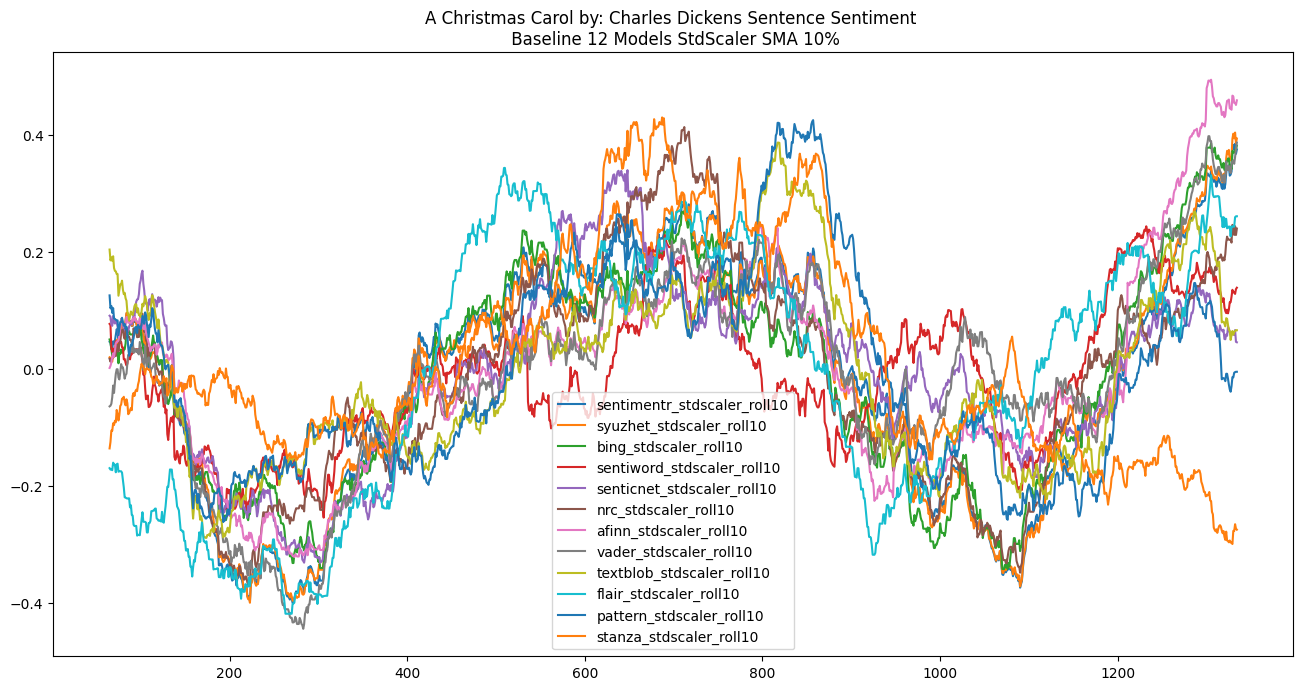

In [ ]:
corpus_sents_df[col_stdscaler_roll_ls].plot()
# corpus_sents_df['sentimentr_stdscaler_roll10'].plot()
plt.title(f'{CORPUS_FULL} Sentence Sentiment \n Baseline 12 Models StdScaler SMA 10%');

##### **Interactive Sentence SMA Plots**

In [ ]:
# Sentence Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_Arc = True #@param {type:"boolean"}
Syuzhet_Arc = True #@param {type:"boolean"}
Bing_Arc = True #@param {type:"boolean"}
SenticNet_Arc = True #@param {type:"boolean"}
SentiWord_Arc = True #@param {type:"boolean"}
NRC_Arc = True #@param {type:"boolean"}
AFINN_Arc = True #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = False #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
# Mean_Subset_Arc = False #@param {type:"boolean"}
# MPQA_Arc = False #@param {type:"boolean"}
# SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet')
if Bing_Arc == True:
  models_subset_ls.append('bing')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword')
if NRC_Arc == True:
  models_subset_ls.append('nrc')
if AFINN_Arc == True:
  models_subset_ls.append('afinn')
if VADER_Arc == True:
  models_subset_ls.append('vader')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob')
if Flair_Arc == True:
  models_subset_ls.append('flair')
if Pattern_Arc == True:
  models_subset_ls.append('pattern')
if Stanza_Arc == True:
  models_subset_ls.append('stanza')
if Mean_All_Arc == True:
  models_subset_ls.append('mean_all')

if len(str(SMA_Window_Percent)) == 1:
  roll_str = 'roll0' + str(SMA_Window_Percent)
else:
  roll_str = 'roll' + str(SMA_Window_Percent%100)

print(f'Rolling Window: {roll_str}')

plot_models(models_subset_ls, models_type='baseline', text_unit='sent_no', win_per=SMA_Window_Percent)



##### **(ABOVE) Plotly SMA Sentence, (BELOW) Correlation Heatmap**

DEFAULT Models:

    col_stdscaler_rollwin_ls: ['sentimentr_stdscaler_roll10', 'syuzhet_stdscaler_roll10', 'bing_stdscaler_roll10', 'sentiword_stdscaler_roll10', 'senticnet_stdscaler_roll10', 'nrc_stdscaler_roll10', 'afinn_stdscaler_roll10', 'vader_stdscaler_roll10', 'textblob_stdscaler_roll10', 'flair_stdscaler_roll10', 'pattern_stdscaler_roll10', 'stanza_stdscaler_roll10']
MODIFED Models:

    col_stdscaler_rollwin_ls: ['sentimentr_stdscaler_roll10', 'syuzhet_stdscaler_roll10', 'bing_stdscaler_roll10', 'sentiword_stdscaler_roll10', 'senticnet_stdscaler_roll10', 'nrc_stdscaler_roll10', 'afinn_stdscaler_roll10', 'vader_stdscaler_roll10', 'textblob_stdscaler_roll10', 'flair_stdscaler_roll10', 'stanza_stdscaler_roll10']


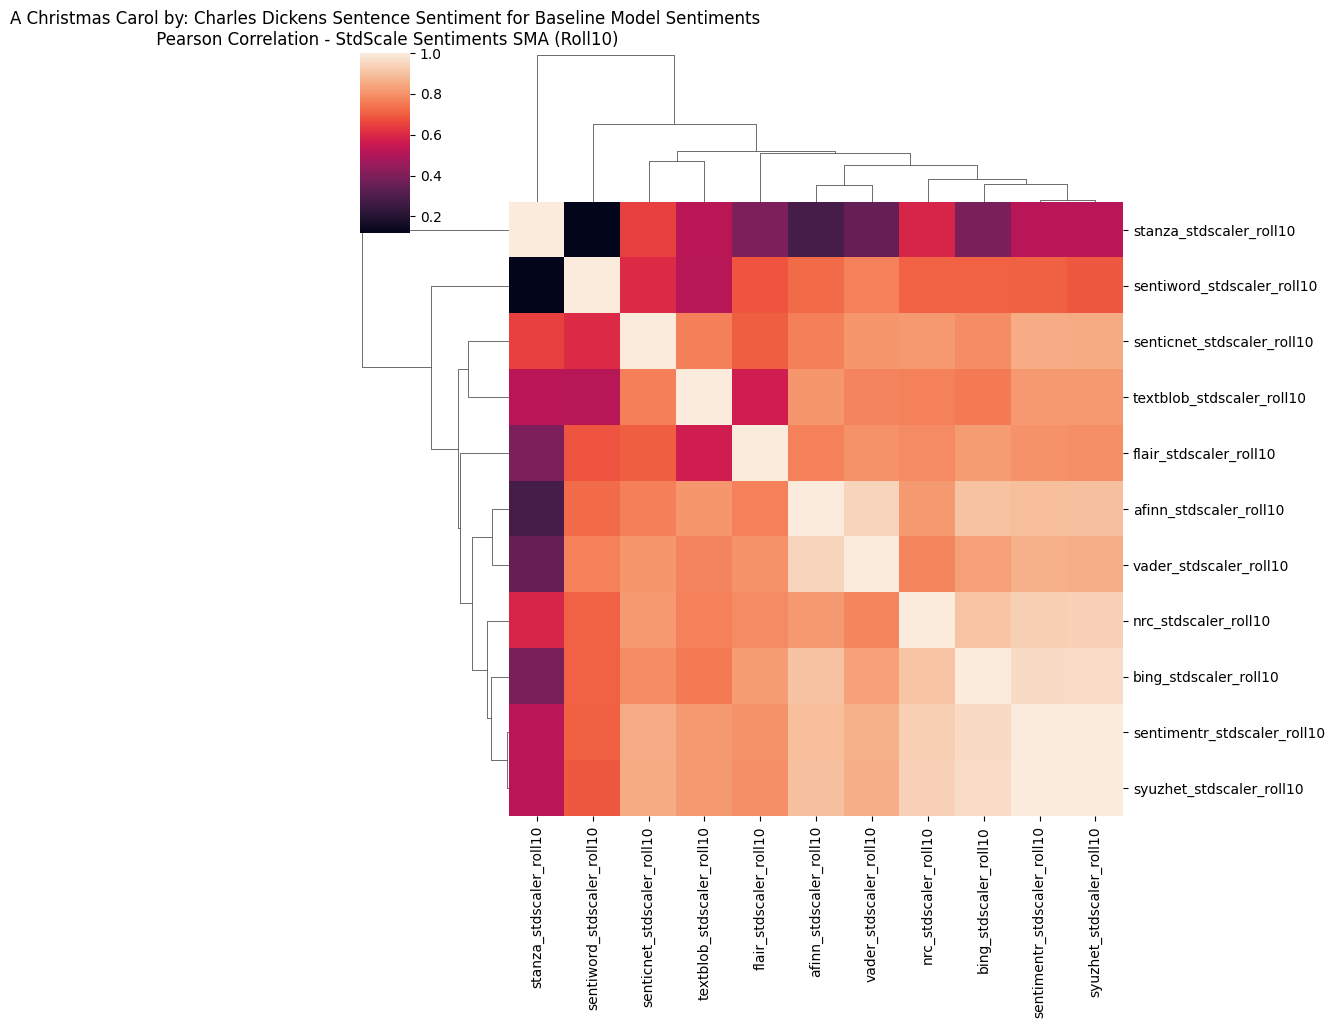

In [ ]:
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "spearman" #@param ["pearson", "spearman", "kendall"]
# corr_methods_ls = ['pearson', 'spearman', 'kendall']

col_stdscaler_rollwin_ls = []
for amodel in models_baseline_ls:
  col_amodel_stdscaler_rollwin = f'{amodel}_stdscaler_{roll_str}'
  col_stdscaler_rollwin_ls.append(col_amodel_stdscaler_rollwin)
print(f'DEFAULT Models:\n\n    col_stdscaler_rollwin_ls: {col_stdscaler_rollwin_ls}')

# OPTIONAL EDIT: Manually select problematic model to remove from analysis 
#                (e.g. Pattern can misbehave at times)
model_root_bad = 'pattern'
# model_root_bad = ''
col_stdscaler_rollwin_ls = [x for x in col_stdscaler_rollwin_ls if model_root_bad not in x]

print(f'MODIFED Models:\n\n    col_stdscaler_rollwin_ls: {col_stdscaler_rollwin_ls}')

corr_df = corpus_sents_df[col_stdscaler_rollwin_ls].dropna(axis=0, how='any').corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df, # corpus_sents_df[col_stdscaler_rollwin_ls].dropna(axis=0, how='any').corr(method=corr_method),
                    row_cluster=True,
                    col_cluster=True,
                    figsize=(10, 10))


plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for Baseline Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

##### **Sentence Sentiment DTW Hierarichal Clustering**

In [ ]:
# Dynamic Time Series Clustering

# !pip install dtaidistance[all]

In [ ]:
# from dtaidistance import dtw
# from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
"""
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")
""";

In [ ]:
"""
from dtaidistance import dtw
import numpy as np

series = np.matrix([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix_fast(series)
""";

##### **Top-n Crux Peaks and Valleys**

**Search Corpus for Substring**

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "abuse" #@param {type:"string"}

sentno_matching_ls = corpus_sents_df[corpus_sents_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(sentno_matching_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), corpus_sents_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
Baseline_SMA_Model = "SentiWord" #@param ["SentimentR", "SyuzhetR", "Bing", "SenticNet", "SentiWord", "NRC", "AFINN", "VADER", "TextBlob", "Flair", "Pattern", "Stanza"]
Anomaly_Detection = False #@param {type:"boolean"}
Vertical_Labels = True #@param {type:"boolean"}
Vertical_Labels_Height = -0.1 #@param {type:"slider", min:-50, max:50, step:0.1}
Save_to_Report = False #@param {type:"boolean"}

if Baseline_SMA_Model == 'SentimentR':
  model_selected = f'sentimentr'
if Baseline_SMA_Model == 'SyuzhetR':
  model_selected = f'syuzhet'
if Baseline_SMA_Model == 'Bing':
  model_selected = f'bing'
if Baseline_SMA_Model == 'SenticNet':
  model_selected = f'senticnet'
if Baseline_SMA_Model == 'SentiWord':
  model_selected = f'sentiword'
if Baseline_SMA_Model == 'NRC':
  model_selected = f'nrc'
if Baseline_SMA_Model == 'AFINN':
  model_selected = f'afinn'
if Baseline_SMA_Model == 'VADER':
  model_selected = f'vader'
if Baseline_SMA_Model == 'TextBlob':
  model_selected = f'textblob'
if Baseline_SMA_Model == 'Flair':
  model_selected = f'flair'
if Baseline_SMA_Model == 'Pattern':
  model_selected = f'pattern'
if Baseline_SMA_Model == 'Stanza':
  model_selected = f'stanza'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  model_selected_fullname = f'{model_selected}_stdscaler_{roll_str}'
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'


# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_selected_ls = [model_selected_fullname]

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first

for amodel in corpus_models_selected_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_sents_df, 
                                         col_series=corpus_models_selected_ls, 
                                         text_type='sentence', 
                                         win_per=Crux_Window_Percent, 
                                         sec_y_labels=Vertical_Labels,
                                         sec_y_height=Vertical_Labels_Height, 
                                         subtitle_str= '5% Crux ', 
                                         do_plot=True, 
                                         save2file=False);
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
# model_crux_ls;

### **Context around Top-n Crux Peaks/Valleys**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Crux Point Details
Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:20, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 2 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}


if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'


print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {Baseline_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {roll_str}')

if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_sents_df,
                        library_type='baseline', 
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes,
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)
else:
  # import sys
  # with open('filename.txt', 'w') as f:
  #   print('This message will be written to a file.', file=f)
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


In [ ]:
asent_no = 124
corpus_df = corpus_sents_df
asent_raw = str(corpus_df[corpus_df['sent_no'] == int(asent_no)]['sent_raw'].values[0])
asent_raw

**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  200#@param {type:"number"}
No_Paragraphs_on_Each_Side = 4 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:

# get_sentnocontext_report(ts_df = corpus_sents_df, the_sent_no=7, the_n_sideparags=1, the_sent_highlight=True):
get_sentnocontext_report(ts_df=corpus_sents_df, the_sent_no=Crux_Sentence_No, the_n_sideparags=No_Paragraphs_on_Each_Side, the_sent_highlight=Highlight_Crux_Sentence)

# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

### **Select Interactive Sentence Models**

In [ ]:
# Multiple Sentence Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_Arc = True #@param {type:"boolean"}
Syuzhet_Arc = False #@param {type:"boolean"}
Bing_Arc = False #@param {type:"boolean"}
SenticNet_Arc = False #@param {type:"boolean"}
SentiWord_Arc = True #@param {type:"boolean"}
NRC_Arc = False #@param {type:"boolean"}
AFINN_Arc = False #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = False #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = False #@param {type:"boolean"}
# MPQA_Arc = False #@param {type:"boolean"}
# SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet')
if Bing_Arc == True:
  models_subset_ls.append('bing')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword')
if NRC_Arc == True:
  models_subset_ls.append('nrc')
if AFINN_Arc == True:
  models_subset_ls.append('afinn')
if VADER_Arc == True:
  models_subset_ls.append('vader')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob')
if Flair_Arc == True:
  models_subset_ls.append('flair')
if Pattern_Arc == True:
  models_subset_ls.append('pattern')
if Stanza_Arc == True:
  models_subset_ls.append('stanza')
if Mean_All_Arc == True:
  models_subset_ls.append('mean_all')

plot_models(models_subset_ls, models_type='baseline', text_unit='sent_no', win_per=SMA_Window_Percent)


### **END WORKING**

##### **Selected Paragraph Interactive**

In [ ]:
# Paragraph Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_Arc = True #@param {type:"boolean"}
Syuzhet_Arc = False #@param {type:"boolean"}
Bing_Arc = False #@param {type:"boolean"}
SenticNet_Arc = False #@param {type:"boolean"}
SentiWord_Arc = True #@param {type:"boolean"}
NRC_Arc = False #@param {type:"boolean"}
AFINN_Arc = False #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = False #@param {type:"boolean"}
MPQA_Arc = False #@param {type:"boolean"}
SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet')
if Bing_Arc == True:
  models_subset_ls.append('bing')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword')
if NRC_Arc == True:
  models_subset_ls.append('nrc')
if AFINN_Arc == True:
  models_subset_ls.append('afinn')
if VADER_Arc == True:
  models_subset_ls.append('vader')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob')
if Flair_Arc == True:
  models_subset_ls.append('flair')
if Pattern_Arc == True:
  models_subset_ls.append('pattern')
if Stanza_Arc == True:
  models_subset_ls.append('stanza')
if Mean_All_Arc == True:
  models_subset_ls.append('mean_all')

plot_models(models_subset_ls, models_type='baseline', text_unit='parag_no', win_per=SMA_Window_Percent)


##### **Selected Section Interactive**

In [ ]:
# Paragraph Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_Arc = False #@param {type:"boolean"}
Syuzhet_Arc = True #@param {type:"boolean"}
Bing_Arc = False #@param {type:"boolean"}
SenticNet_Arc = False #@param {type:"boolean"}
SentiWord_Arc = False #@param {type:"boolean"}
NRC_Arc = False #@param {type:"boolean"}
AFINN_Arc = False #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = False #@param {type:"boolean"}
MPQA_Arc = False #@param {type:"boolean"}
SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet')
if Bing_Arc == True:
  models_subset_ls.append('bing')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword')
if NRC_Arc == True:
  models_subset_ls.append('nrc')
if AFINN_Arc == True:
  models_subset_ls.append('afinn')
if VADER_Arc == True:
  models_subset_ls.append('vader')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob')
if Flair_Arc == True:
  models_subset_ls.append('flair')
if Pattern_Arc == True:
  models_subset_ls.append('pattern')
if Stanza_Arc == True:
  models_subset_ls.append('stanza')
if Mean_All_Arc == True:
  models_subset_ls.append('mean_all')

plot_models(models_subset_ls, models_type='baseline', text_unit='sect_no', win_per=SMA_Window_Percent)


##### **Chapter SMA Plots**

In [ ]:
# Paragraph Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_Arc = False #@param {type:"boolean"}
Syuzhet_Arc = True #@param {type:"boolean"}
Bing_Arc = False #@param {type:"boolean"}
SenticNet_Arc = False #@param {type:"boolean"}
SentiWord_Arc = False #@param {type:"boolean"}
NRC_Arc = False #@param {type:"boolean"}
AFINN_Arc = False #@param {type:"boolean"}
VADER_Arc = True #@param {type:"boolean"}
TextBlob_Arc = True #@param {type:"boolean"}
Flair_Arc = True #@param {type:"boolean"}
Pattern_Arc = True #@param {type:"boolean"}
Stanza_Arc = True #@param {type:"boolean"}
Mean_All_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = False #@param {type:"boolean"}
MPQA_Arc = False #@param {type:"boolean"}
SentiStrength_Arc = False #@param {type:"boolean"}

models_subset_ls = []
if SentimentR_Arc == True:
  models_subset_ls.append('sentimentr')
if Syuzhet_Arc == True:
  models_subset_ls.append('syuzhet')
if Bing_Arc == True:
  models_subset_ls.append('bing')
if SenticNet_Arc == True:
  models_subset_ls.append('senticnet')
if SentiWord_Arc == True:
  models_subset_ls.append('sentiword')
if NRC_Arc == True:
  models_subset_ls.append('nrc')
if AFINN_Arc == True:
  models_subset_ls.append('afinn')
if VADER_Arc == True:
  models_subset_ls.append('vader')
if TextBlob_Arc == True:
  models_subset_ls.append('textblob')
if Flair_Arc == True:
  models_subset_ls.append('flair')
if Pattern_Arc == True:
  models_subset_ls.append('pattern')
if Stanza_Arc == True:
  models_subset_ls.append('stanza')
if Mean_All_Arc == True:
  models_subset_ls.append('mean_all')

plot_models(models_subset_ls, models_type='baseline', text_unit='chap_no', win_per=SMA_Window_Percent)


##### **Comparison of Sentence Baseline Models**

In [ ]:
# Compare Sentence Baseline Length-Normed Standardized Sentiment Values

"""
model_baselines_ls = ['sentimentr', 'syuzhet', 'bing',
                  'sentiword', 'senticnet', 'nrc',
                  'afinn', 'vader', 'textblob',
                  'flair', 'pattern', 'stanza']
""";

"""
scaler = StandardScaler()

# col_roll_ls = []
model_base_standardized_roll_ls = []
for amodel in model_baselines_ls:
  # Create the simple model_rollxxx rolling mean
  col_roll = f'{amodel}_{roll_str}'
  corpus_sents_df['col_roll'] = corpus_sents_df[amodel].rolling(10*win_s1per, center=True).mean()

  # Create list of column names for model_lnorm_medianiqr_rollxxx
  # col_name = f'{amodel}_lnorm_medianiqr_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here                                                   # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  col_name = f'{amodel}_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here                                                   # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_base_standardized_roll_ls.append(col_name)

  # for i,amodel in enumerate(model_base_standardized_roll_ls):

  col_name_roll_stand = f'{col_roll}_stdscale'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')
  model_roll_stand_np = np.array(corpus_sents_df[col_roll])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  corpus_sents_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_sents_df[col_name_roll_stand].plot(label=amodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentences for Baseline Model Sentiments\nMean StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');
""";

## **EDA SentimentR Plots**

#### **(If not already exists) Import SentimentR Sentiment Data**

In [ ]:
# Verify SentimentR Sentiment Files exported from RStudio
!pwd
!ls -altr *

In [ ]:
!mv sum_sentiments_syuzhetR_4models_sentimenttimeraw_emforster_howardsend.csv sum_sentiments_syuzhetR_4models_emforster_howardsend.csv

In [ ]:
# Get SentimentR Sentiment Datafile (with data on 7 Models)

SentimentR_sentiment_datafile = 'sum_sentiments_sentimentR_7models_emforster_howardsend.csv' #@param {type:"string"}

sum_sentiments_sentimentr_filename = SentimentR_sentiment_datafile

!head -n 3 $sum_sentiments_sentimentr_filename

In [ ]:
corpus_sentimentr_df = pd.read_csv(sum_sentiments_sentimentr_filename)
corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()

In [ ]:
# corpus_sents_df = corpus_sents_df.loc[:, ~corpus_sents_df.columns.str.contains('^Unnamed')]

corpus_sentimentr_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].astype('string')
corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()

In [ ]:
"""

# (Optional) Read Sentiment Series generated in RStudio by SentimentR into DataFrame: corpus_sents_sentimentr_df
#            SKIP if no SyuzhetR sentiment datafile to read in

# MANUALLY: copy and paste the filename above into the quotes below for sum_sentiment_sentimentR_filename

corpus_sentimentr_df = pd.read_csv(sum_sentiments_sentimentr_filename, encoding = 'unicode_escape', engine ='python')

# Rename columns if necessary
corpus_sentimentr_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].astype('string')
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : re.sub(f'[^{re.escape(string.printable)}]', '', x))
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : filter_nonprintable(x))


# create a clean version of Sentence in sent_clean column
corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : clean_text(x))
corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : re.sub(f'[^{re.escape(string.printable)}]', '', x))
corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : filter_nonprintable(x))

corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_clean'].astype('string')

corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()
corpus_sentimentr_df.columns

corpus_sents_sentimentr_len = corpus_sentimentr_df.shape[0]

# BUG FIX: SentimentR can create many additional rows that must be deleted 
#          to enable it to be merged with other Sentiment Models on the same Corpus
#          OR just leave SentimentR unmerged and analyze separately (preferred)
#
# POSSIBLE SOLUTIONS (from worst/easiest to better)
#     
#   1) Trim extra n rows from head/tail
#   2) Naive Downsampling of Series
#   3) Clustering and distribute deletes of near-medians from longest runs, avoiding outliers, start/end
#   4) DTW character-preserving Compression
# 
#          Simplification, 1D cluster jockers_rinker column as proxy for full interrow distance features
#                          and delete rows near the median from the largest cluster (vs taking into account
#                          all features in Euclidian or other distance metric)

# import kmeans1d

# Approximate k cluster number as 1 cluster for every 500 sentences in Corpus
# k = corpus_sentimentr_df.shape[0]//500  
# clusters, centroids = kmeans1d.cluster(np.array(corpus_sentimentr_df['jockers_rinker']), k)

def del_oneincluster(df, cluster_per=1):
  '''
  TODO: Skip for now and use kmeans1d instead
  Given a DataFrame and a Cluster Percent to calculate a sliding window
  Return DataFrame with one row removed within a sliding window cluster with most self-similiar rows
  '''

  # Compute sliding window for cluster size
  win_cluster_len = int(cluster_per/100 * df.shape[0])
  win_start = 0
  win_stop = df.shape[0] - win_cluster_len

  # Get numeric columns
  numeric_df = df.select_dtypes(include=numerics)

  most_selfsimilar_value = 0
  most_selfsimilar_index = 0
  for i in range(win_start, win_stop, 1):
    selfsim_score = selfsim_metric(numeric_df.iloc[i:win_cluster_len+1])
    if selfsim_score > most_selfsimilar_value:
      most_selfsimilar_index = i

  oneless_df = del_onerow(most_selfsimilar_index)

  return oneless_df

# BAD SOLUTION, just trim the last n rows of corpus_sentimentr_df to make lengths match for merging
# corpus_sentimentr_df = corpus_sentimentr_df.iloc[:-n,:]

corpus_sentimentr_len = corpus_sentimentr_df.shape[0]
if corpus_sentimentr_len != corpus_sents_df.shape[0]:
  print('\n\n\n======================================================================\n')
  print(f'ERROR: sentence sentiment values read into corpus_syuzhetr (len={corpus_sents_sentimentr_len})')
  print(f'       is not the same length as corpus_sents_df (len={corpus_sents_df.shape[0]}) ')
  print(f'\nRECOMMENDATION: Use the preprocessed corpus output created by this notebook ')
  print(f'                as input to SentimentR in RStudio to generate sentiment series')
  print(f'                and then retry importing')
  print('\n======================================================================\n');

""";

In [ ]:
corpus_sentimentr_df.info('sent_raw')

In [ ]:
# Insert Sentence Numbers (sent_no)
"""
sent_ct = corpus_sentimentr_df.shape[0]
sent_no_ls = list(range(sent_ct))
corpus_sentimentr_df.insert(0, 'sent_no', sent_no_ls)
corpus_sentimentr_df.head(2)
""";

In [ ]:
corpus_sentimentr_df.info()

In [ ]:
corpus_sentimentr_df['jockers'].isna().sum()

In [ ]:
# Rename columns if necessary
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].astype('string')
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : re.sub(f'[^{re.escape(string.printable)}]', '', x))
corpus_sentimentr_df['sent_raw'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : filter_nonprintable(x))


# create a clean version of Sentence in sent_clean column
corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_raw'].apply(lambda x : clean_text(x))
corpus_sentimentr_df['sent_clean'] = corpus_sentimentr_df['sent_clean'].astype('string')

corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()
corpus_sentimentr_df.columns

In [ ]:
# Add summary statistics

corpus_sentimentr_df['char_len'] = corpus_sentimentr_df['sent_clean'].apply(lambda x: len(x))
corpus_sentimentr_df['token_len'] = corpus_sentimentr_df['sent_clean'].apply(lambda x: len(x.split())) 

# Verify

corpus_sentimentr_df.head(2)
corpus_sentimentr_df.info()

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_sentimentr_df.columns

standardize_ts_ls(corpus_sentimentr_df, models_sentimentr_ls)

print('\nAfter Standardization ----------')
corpus_sentimentr_df.columns

In [ ]:
# Create SMA roll=10% for all models_stdscaler as baseline

win_s1per = int(corpus_sentimentr_df.shape[0] * 1/100)

col_stdscaler_roll_ls = []
for amodel in models_sentimentr_ls:
  col_stdscaler = f'{amodel}_stdscaler'
  col_stdscaler_roll = f'{amodel}_stdscaler_{roll_str}'
  corpus_sentimentr_df[col_stdscaler_roll] = corpus_sentimentr_df[col_stdscaler].rolling(10*win_s1per, center=True).mean()
  col_stdscaler_roll_ls.append(col_stdscaler_roll)

col_stdscaler_roll_mean = col_stdscaler_roll + '_mean'
corpus_sentimentr_df[col_stdscaler_roll_mean] = corpus_sentimentr_df[col_stdscaler_roll_ls].mean()

In [ ]:
# Standardize all values with MedianIQR
"""
model_sentimentr_ls = ['jockers_rinker', 'jockers', 'huliu', 'lmcd', 'nrc', 'senticnet', 'sentiword']

for model_sentimentr in models_sentimentr_ls:

  # Normalize the Sentence Sentiment by dividing Sentiment by Sentence Length
  sents_len_ls = list(corpus_sentimentr_df['token_len'])
  sents_sentiment_ls = list(corpus_sentimentr_df[model_sentimentr])
  sents_sentiment_norm_ls = [sents_sentiment_ls[i]/(sents_len_ls[i]+0.01) for i in range(len(sents_len_ls))]

  # RobustStandardize Sentence sentiment values
  # corpus_sentimentr_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))
  col_medianiqr = f'{model_sentimentr}_medianiqr'
  corpus_sentimentr_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_sentimentr_df[model_sentimentr]).reshape(-1, 1))
  col_lnorm_medianiqr = f'{model_sentimentr}_lnorm_medianiqr'
  corpus_sentimentr_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))
""";


#### **Interactive Sentence SMA Plots**

In [ ]:
# Sentence Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

SentimentR_JockersRinker = True #@param {type:"boolean"}
SentimentR_Jockers = True #@param {type:"boolean"}
SentimentR_HuLiu = True #@param {type:"boolean"}
SentimentR_SenticNet = True #@param {type:"boolean"}
SentimentR_SentiWord = True #@param {type:"boolean"}
SentimentR_NRC = True #@param {type:"boolean"}
SentimentR_LoughranMcDonald = True #@param {type:"boolean"}

models_subset_ls = []

if SentimentR_JockersRinker == True:
  models_subset_ls.append('jockers_rinker')
if SentimentR_Jockers == True:
  models_subset_ls.append('jockers')
if SentimentR_HuLiu == True:
  models_subset_ls.append('huliu')
if SentimentR_SenticNet == True:
  models_subset_ls.append('senticnet')
if SentimentR_SentiWord == True:
  models_subset_ls.append('sentiword')
if SentimentR_NRC == True:
  models_subset_ls.append('nrc')
if SentimentR_LoughranMcDonald == True:
  models_subset_ls.append('lmcd')

print(f'models_subset_ls:\n\n    {models_subset_ls}')
plot_models(models_subset_ls, models_type='sentimentr', text_unit='sent_no', win_per=SMA_Window_Percent);

models_subset_ls:

    ['jockers_rinker', 'jockers', 'huliu', 'senticnet', 'sentiword', 'nrc', 'lmcd']


#### **(ABOVE) Plotly SMA Sentence, (BELOW) Correlation Heatmap**

col_stdscaler_rollwin_ls: ['jockers_rinker_stdscaler_roll10', 'jockers_stdscaler_roll10', 'huliu_stdscaler_roll10', 'senticnet_stdscaler_roll10', 'sentiword_stdscaler_roll10', 'nrc_stdscaler_roll10', 'lmcd_stdscaler_roll10']


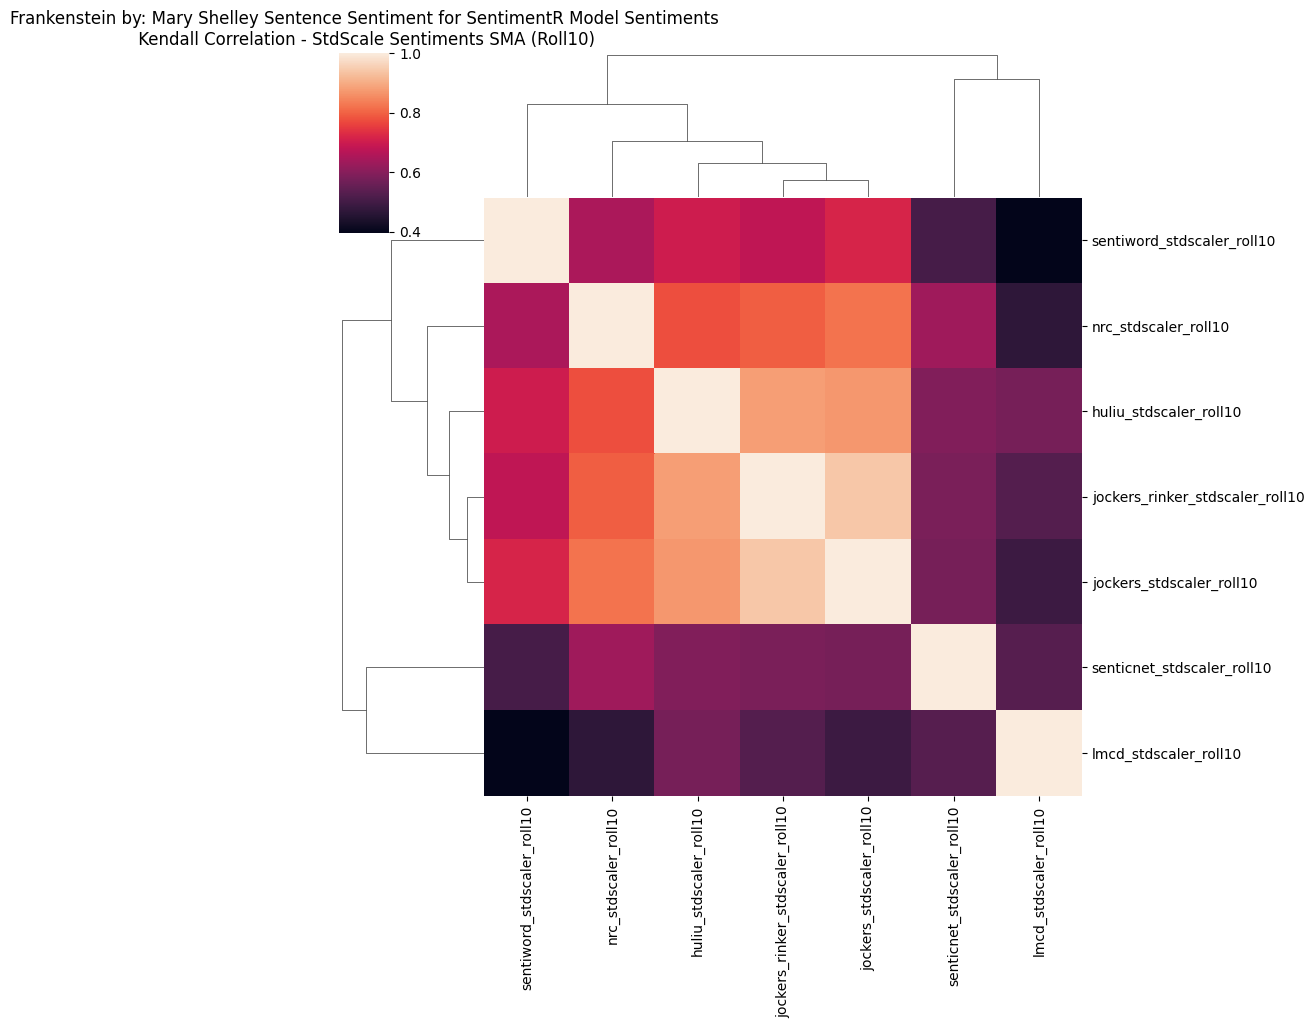

In [ ]:
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "kendall" #@param ["pearson", "spearman", "kendall"]
# corr_methods_ls = ['pearson', 'spearman', 'kendall']

col_stdscaler_rollwin_ls = []
for amodel in models_sentimentr_ls:
  col_amodel_stdscaler_rollwin = f'{amodel}_stdscaler_{roll_str}'
  col_stdscaler_rollwin_ls.append(col_amodel_stdscaler_rollwin)
print(f'col_stdscaler_rollwin_ls: {col_stdscaler_rollwin_ls}')

corr_df = corpus_sentimentr_df[col_stdscaler_rollwin_ls].dropna(axis=0, how='any').corr(method=Correlation_Algo)
corr_df
# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df, # corpus_sents_df[col_stdscaler_rollwin_ls].dropna(axis=0, how='any').corr(method=corr_method),
                    row_cluster=True,
                    col_cluster=True,
                    figsize=(10, 10))


plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for SentimentR Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

#### **Sentence Sentiment DTW Hierarichal Clustering**

#### **Top-n Crux Peaks and Valleys**

**Search Corpus for Substring**

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "love" #@param {type:"string"}

sentno_matching_ls = corpus_sents_df[corpus_sents_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(sentno_matching_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), corpus_sents_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
SentimentR_SMA_Model = "SenticNet" #@param ["Jockers-Rinker", "Jockers", "Hu-Liu", "SenticNet", "SentiWord", "NRC", "Loughan-McDonald"]
Anomaly_Detection = False #@param {type:"boolean"}
Vertical_Labels = True #@param {type:"boolean"}
Vertical_Labels_Height = -0.1 #@param {type:"slider", min:-5, max:5, step:0.05}
Save_to_Report = False #@param {type:"boolean"}

if SentimentR_SMA_Model == 'Jockers-Rinker':
  model_selected = f'jockers_rinker'
if SentimentR_SMA_Model == 'Jockers':
  model_selected = f'jockers'
if SentimentR_SMA_Model == 'Hu-Liu':
  model_selected = f'huliu'
if SentimentR_SMA_Model == 'SenticNet':
  model_selected = f'senticnet'
if SentimentR_SMA_Model == 'SentiWord':
  model_selected = f'sentiword'
if SentimentR_SMA_Model == 'NRC':
  model_selected = f'nrc'
if SentimentR_SMA_Model == 'Loughran-McDonald':
  model_selected = f'lmcd'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  model_selected_fullname = f'{model_selected}_stdscaler_{roll_str}'
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'



# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_selected_ls = [model_selected_fullname]
print(f'corpus_models_selected_ls: {corpus_models_selected_ls}')

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first


for amodel in corpus_models_selected_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_sentimentr_df, 
                                         col_series=corpus_models_selected_ls, 
                                         text_type='sentence', 
                                         win_per=Crux_Window_Percent, 
                                         sec_y_labels=Vertical_Labels,
                                         sec_y_height=Vertical_Labels_Height, 
                                         subtitle_str='5% Crux - ', 
                                         do_plot=True, 
                                         save2file=False)
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
# model_crux_ls;

### **Context around Top-n Crux Peaks/Valleys**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
corpus_sentimentr_df['sent_raw'].isna().any()

In [ ]:
# Crux Details
Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:20, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 1 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = False #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'
  


print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {SentimentR_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {roll_str}')


if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_sentimentr_df,
                        library_type='sentimentr',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)

else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
corpus_sents_df.shape

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  1839#@param {type:"number"}
No_Paragraphs_on_Each_Side = 0 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:

get_sentnocontext_report(ts_df=corpus_sentimentr_df, 
                         the_sent_no=Crux_Sentence_No, 
                         the_n_sideparags=No_Paragraphs_on_Each_Side, 
                         the_sent_highlight=Highlight_Crux_Sentence)


# get_sentnocontext_report(the_sent_no=Crux_Sentence_No, 
#                          the_n_sideparags=No_Paragraphs_on_Each_Side, 
#                          the_sent_highlight=Highlight_Crux_Sentence)

# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

## **EDA Syuzhet Plots**

#### **(If not already exists) Import SyuzhetR Sentiment Data**

In [ ]:
# Verify SentimentR Sentiment Files exported from RStudio
!pwd
!ls -altr sum_sentiments*syuzhet*.csv

In [ ]:
# Get SyuzhetR Sentiment Datafile (with data on 4 Models)

SyuzhetR_sentiment_datafile = 'sum_sentiments_syuzhetR_4models_emforster_howardsend.csv' #@param {type:"string"}

sum_sentiments_syuzhetr_filename = SyuzhetR_sentiment_datafile

!head -n 3 $sum_sentiments_syuzhetr_filename

In [ ]:
corpus_syuzhetr_df = pd.read_csv(sum_sentiments_syuzhetr_filename)
corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()

In [ ]:
# corpus_sents_df = corpus_sents_df.loc[:, ~corpus_sents_df.columns.str.contains('^Unnamed')]

corpus_syuzhetr_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
corpus_syuzhetr_df['sent_raw'] = corpus_syuzhetr_df['sent_raw'].astype('string')
corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()

In [ ]:
# Add summary statistics

corpus_syuzhetr_df['char_len'] = corpus_syuzhetr_df['sent_raw'].apply(lambda x: len(x))
corpus_syuzhetr_df['token_len'] = corpus_syuzhetr_df['sent_raw'].apply(lambda x: len(x.split())) 

corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()

In [ ]:
# Insert Sentence Numbers (sent_no)
"""
sent_ct = corpus_syuzhetr_df.shape[0]
sent_no_ls = list(range(sent_ct))
corpus_syuzhetr_df.insert(0, 'sent_no', sent_no_ls)
corpus_syuzhetr_df.head(2)
""";

In [ ]:
# Rename columns if necessary
corpus_syuzhetr_df['sent_raw'] = corpus_syuzhetr_df['sent_raw'].astype('string')
corpus_syuzhetr_df['sent_raw'] = corpus_syuzhetr_df['sent_raw'].apply(lambda x : re.sub(f'[^{re.escape(string.printable)}]', '', x))
corpus_syuzhetr_df['sent_raw'] = corpus_syuzhetr_df['sent_raw'].apply(lambda x : filter_nonprintable(x))


# create a clean version of Sentence in sent_clean column
corpus_syuzhetr_df['sent_clean'] = corpus_syuzhetr_df['sent_raw'].apply(lambda x : clean_text(x))
corpus_syuzhetr_df['sent_clean'] = corpus_syuzhetr_df['sent_clean'].astype('string')

corpus_syuzhetr_df.head(2)
corpus_syuzhetr_df.info()
corpus_syuzhetr_df.columns

In [ ]:
corpus_syuzhetr_df.tail()

In [ ]:
print(*corpus_syuzhetr_df.columns, sep='\n')

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_syuzhetr_df.columns

standardize_ts_ls(corpus_syuzhetr_df, models_syuzhetr_ls)

print('\nAfter Standardization ----------')
corpus_syuzhetr_df.columns

#### **Interactive Sentence SMA Plots**

In [ ]:
# Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

# display(corpus_sentimentr_df.head())

win_per = SMA_Window_Percent             
win_roll = int(win_per/100 * corpus_sentimentr_df.shape[0])

# model_syuzhetr_ls = ['syuzhet', 'bing', 'afinn', 'nrc']


col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in models_syuzhetr_ls:
  # if not(amodel.endswith('roll050')):
  if len(str(win_per)) == 1:
    roll_str = 'roll0' + str(win_per)
  else:
    roll_str = 'roll' + str(win_per)
  col_name_roll = f'{amodel}_{roll_str}'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  corpus_syuzhetr_df[col_name_roll] = corpus_syuzhetr_df[amodel].rolling(win_roll, center=True).mean()

col_mean_roll = 'mean_' + roll_str
corpus_syuzhetr_df[col_mean_roll] = corpus_syuzhetr_df[col_name_roll_ls].mean(axis=1)


palette = cycle(px.colors.qualitative.Bold)
# palette = cycle(px.colors.sequential.PuBu)

my_layout = go.Layout(
    autosize=False,
    width=1600,
    height=800,
    margin=go.layout.Margin(
        l=10,
        r=50,
        b=100,
        t=100,
        pad = 1
    )
)


fig = go.Figure(layout=my_layout)

# add traces

model = 'mean_' + roll_str
fig.add_traces(go.Line(x=corpus_syuzhetr_df['sent_no'],
                       y = corpus_syuzhetr_df[model],
                       line=dict(
                            color='#000000',
                            width=5
                            ),
                       text = corpus_syuzhetr_df.index.values,
                       name = model,
                       hovertemplate = "Model <b>Mean: "+str(win_per)+"%</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b>", 
                       marker_color=next(palette)))


for amodel in models_syuzhetr_ls:
  model_roll = f'{amodel}_' + roll_str
  fig.add_traces(go.Line(x=corpus_syuzhetr_df['sent_no'],
                        y = corpus_syuzhetr_df[model_roll],
                        text = corpus_syuzhetr_df['sent_raw'],
                        name = model_roll,
                        hovertemplate = "Model <b>"+model_roll+"</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y:.4f}</b><br>Index: <b><i>%{text}</i></b>", 
                        marker_color=next(palette)))


fig.update_layout(
    title="SyuzhetR Sentence Sentiment Models <b><i>" + roll_str.upper() + '</i></b>',
    xaxis_title="Sentence Number",
    # yaxis_title="Sentiment Value",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show();

#### **Comparison of Sentence SyuzhetR Models**

Processing model: syuzhet_roll10
Mean: 0.123299, StandardDeviation: 0.230277
  Adding StdScaler Column: syuzhet_roll10_stdscale
Processing model: bing_roll10
Mean: -0.003269, StandardDeviation: 0.234498
  Adding StdScaler Column: bing_roll10_stdscale
Processing model: afinn_roll10
Mean: 0.345575, StandardDeviation: 0.531166
  Adding StdScaler Column: afinn_roll10_stdscale
Processing model: nrc_roll10
Mean: 0.228596, StandardDeviation: 0.268182
  Adding StdScaler Column: nrc_roll10_stdscale


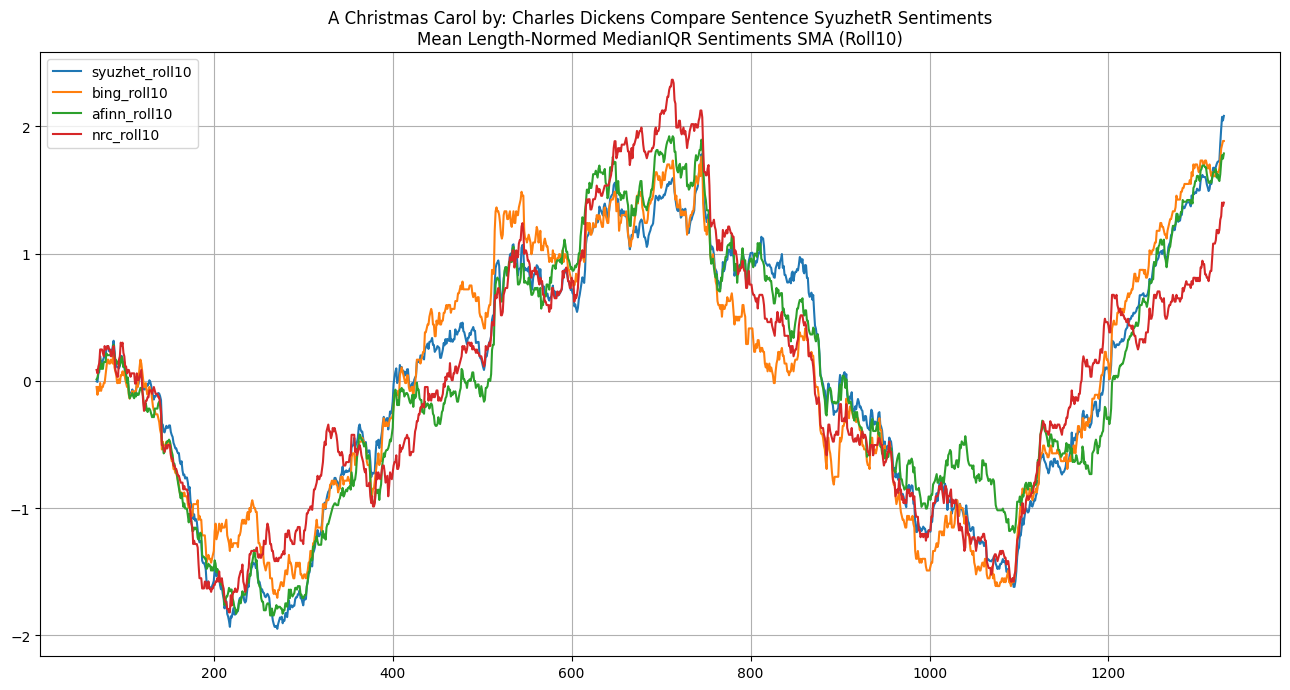

In [ ]:
# Compare Sentence SyuzhetR Standardized Sentiment Values

# model_syuzhetr_ls = ['syuzhet', 'bing', 'afinn', 'nrc']

model_syuzhetr_standardized_roll_ls = []
for amodel in models_syuzhetr_ls:
  col_roll_name = f'{amodel}_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here
                                                     # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_syuzhetr_standardized_roll_ls.append(col_roll_name)


scaler = StandardScaler()

for i,arollmodel in enumerate(model_syuzhetr_standardized_roll_ls):
  print(f'Processing model: {arollmodel}')
  col_name_roll_stand = f'{arollmodel}_stdscale'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')
  model_roll_stand_np = np.array(corpus_syuzhetr_df[arollmodel])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  print(f'  Adding StdScaler Column: {col_name_roll_stand}')
  corpus_syuzhetr_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_syuzhetr_df[col_name_roll_stand].plot(label=arollmodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence SyuzhetR Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');

#### **(ABOVE) Plotly SMA Sentence, (BELOW) Correlation Heatmap**

In [ ]:
corpus_syuzhetr_df[models_syuzhetr_ls].isna().any().count()

4

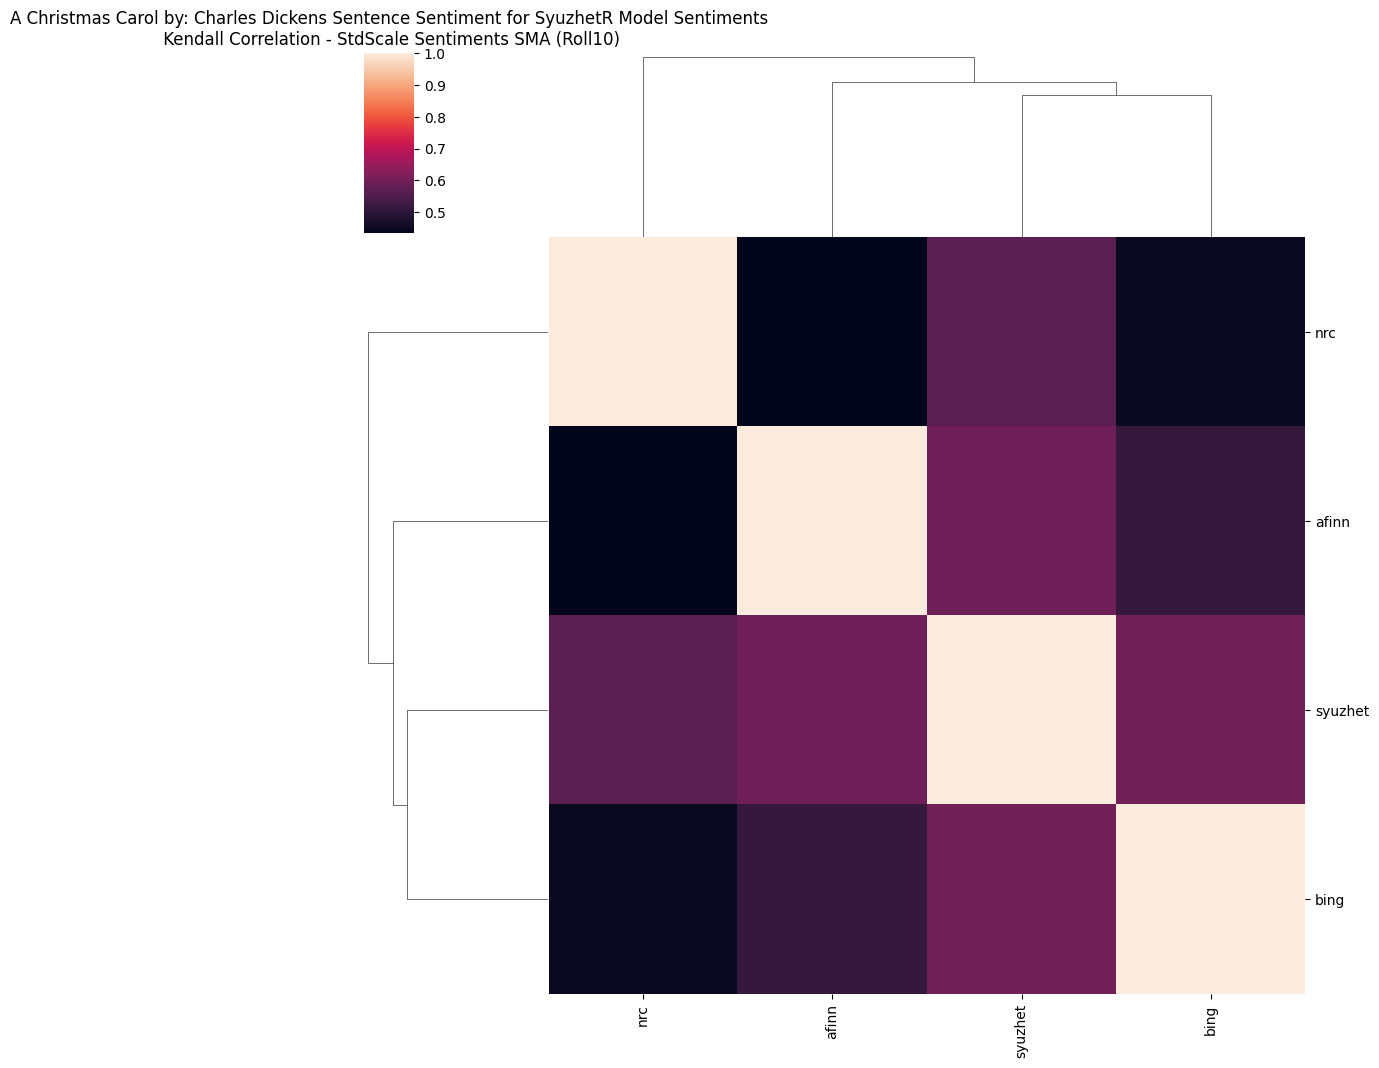

In [ ]:
# Create a comparison DataFrame of SentimentR Sentence Models
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "pearson" #@param ["pearson", "spearman", "kendall"]

# syuzhetr_corr_models_ls = ['syuzhet', 'bing', 'afinn', 'nrc']

corr_df = corpus_syuzhetr_df[models_syuzhetr_ls].corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for SyuzhetR Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

#### **Sentence Sentiment DTW Hierarichal Clustering**

#### **Top-n Crux Peaks and Valleys**

**Search Corpus for Substring**

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "death." #@param {type:"string"}

sentno_matching_ls = corpus_sents_df[corpus_sents_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(sentno_matching_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), corpus_sents_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')



Match #0: Sentence #860


    Dorothy came to meet them and thanked the little mice warmly for saving her companion from DEATH.


**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
SyuzhetR_SMA_Model = "Bing" #@param ["Syuzhet", "Bing", "AFINN", "NRC"]
Anomaly_Detection = False #@param {type:"boolean"}
Vertical_Labels = True #@param {type:"boolean"}
Vertical_Labels_Height = 0.2 #@param {type:"slider", min:-5.0, max:5.0, step:0.05}
Save_to_Report = False #@param {type:"boolean"}

if SyuzhetR_SMA_Model == 'Syuzhet':
  model_selected = f'syuzhet'
if SyuzhetR_SMA_Model == 'Bing':
  model_selected = f'bing'
if SyuzhetR_SMA_Model == 'AFINN':
  model_selected = f'afinn'
if SyuzhetR_SMA_Model == 'NRC':
  model_selected = f'nrc'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  model_selected_fullname = f'{model_selected}_{roll_str}'
  print(f'model_selected_fullname: {model_selected_fullname}')
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'


# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_selected_ls = [model_selected_fullname]
print(f'corpus_models_selected_ls: {corpus_models_selected_ls}')

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first

for amodel in corpus_models_selected_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_syuzhetr_df, 
                                         col_series=corpus_models_selected_ls, 
                                         text_type='sentence', 
                                         win_per=Crux_Window_Percent, 
                                         sec_y_labels=Vertical_Labels,
                                         sec_y_height=Vertical_Labels_Height, 
                                         subtitle_str='5% Crux - ', 
                                         do_plot=True, 
                                         save2file=False)
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
print(f'model_crux_ls: {model_crux_ls}');

### **Context around Top-n Crux Peaks/Valleys**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Crux Details
Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:20, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 2 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}



if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'

print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {SyuzhetR_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {roll_str}')


if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_syuzhetr_df,
                        library_type='syuzhetr',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)

else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  200#@param {type:"number"}
No_Paragraphs_on_Each_Side = 5 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:

get_sentnocontext_report(ts_df=corpus_syuzhetr_df, 
                         the_sent_no=Crux_Sentence_No, 
                         the_n_sideparags=No_Paragraphs_on_Each_Side, 
                         the_sent_highlight=Highlight_Crux_Sentence)

# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

#### **Compare Sentence SentimentR vs Syuzhet Sentiment**

In [ ]:
roll_str

In [ ]:
corpus_syuzhetr_df.columns

In [ ]:
corpus_sentimentr_df.columns

In [ ]:
roll_str = 'roll10'

In [ ]:
# Compare Sentence SentimentR vs SyuzhetR SMA smoothed series
"""
scaler = StandardScaler()

# Standardize SentimentR Mean Rolling
sentimentr_mean_roll_np = np.array(corpus_sentimentr_df[f'mean_{roll_str}'])
sentimentr_mean_roll_np = sentimentr_mean_roll_np.reshape((len(sentimentr_mean_roll_np), 1))

scaler = scaler.fit(sentimentr_mean_roll_np)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
sentimentr_mean_roll_norm_np = scaler.transform(sentimentr_mean_roll_np)

# Standardize SyuzhetR Mean Rolling
syuzhetr_mean_roll_np = np.array(corpus_syuzhetr_df[f'mean_{roll_str}'])
syuzhetr_mean_roll_np = syuzhetr_mean_roll_np.reshape((len(syuzhetr_mean_roll_np), 1))

scaler = scaler.fit(syuzhetr_mean_roll_np)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
syuzhetr_mean_roll_norm_np = scaler.transform(syuzhetr_mean_roll_np)


# Plot normalized Series
plt.plot(sentimentr_mean_roll_norm_np, label="SentimentR")
plt.plot(syuzhetr_mean_roll_norm_np, label="SyuzhetR")
# plt.plot(transformer_mean_roll_norm_np, label="SyuzhetR")
""";

# corpus_syuzhetr_df[f'mean_{roll_str}'].apply(lambda x: Scale_SyuzhetR*x).plot(label='SyuzhetR')
col_mean_stdscaler_roll = f'mean_stdscaler_{roll_str}'

col_all_sentimentr_stdscaler_roll_ls = []
for x in models_sentimentr_ls:
  col_name = f'{x}_stdscaler_{roll_str}'
  col_all_sentimentr_stdscaler_roll_ls.append(col_name)
corpus_sentimentr_df[col_mean_stdscaler_roll] = corpus_sentimentr_df[col_all_sentimentr_stdscaler_roll_ls].mean()

col_all_syuzhetr_stdscaler_roll_ls = []
for x in models_syuzhetr_ls:
  col_name = f'{x}_stdscaler_{roll_str}'
  col_all_syuzhetr_stdscaler_roll_ls.append(col_name)
corpus_syuzhetr_df[col_mean_stdscaler_roll] = corpus_syuzhetr_df[col_all_syuzhetr_stdscaler_roll_ls].mean()

# Plot
plt.plot(corpus_sentimentr_df[col_mean_stdscaler_roll], label=f"SentimentR Mean StdScaler {roll_str}")
plt.plot(corpus_syuzhetr_df[col_mean_stdscaler_roll], label=f"SyuzhetR Mean StdScaler {roll_str}")


plt.grid()
plt.title(f'{CORPUS_FULL} Sentence SentimentR vs Syuzhet Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');

In [ ]:
# Compare Sentence SentimentR vs SyuzhetR SMA smoothed series
# TODO: Delete or convert to fine grained/multi-model DTW/correlation

# Create a unified DataFrame of Mean Roll_{win_per} from
#     SentimentR and SyuzhetR

col_mean_roll = f'mean_{roll_str}'

compare_sentimentr_syuzhetr_df = pd.concat([
    corpus_sentimentr_df[col_mean_roll],
    corpus_syuzhetr_df[col_mean_roll]],
    axis=1)

col_sentimentr_mean_roll = f'sentimentr_{col_mean_roll}'
col_syuzhetr_mean_roll = f'syuzhet_{col_mean_roll}'

col_mapping = {
    compare_sentimentr_syuzhetr_df.columns[0]:'sentimentr_mean_roll', 
    compare_sentimentr_syuzhetr_df.columns[1]:'syuzhet_mean_roll'
}

compare_sentimentr_syuzhetr_df.rename(columns=col_mapping,
                                      inplace=True)

# compare_sentimentr_syuzhetr_df.iloc[1000:1005]


# Get correlation matrix of the comparison DataFrame
corr_df = compare_sentimentr_syuzhetr_df.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


## **EDA Transformer Plots**

#### **(If not already exists) Import Transformer Sentiment Data**

In [ ]:
# Verify SentimentR Sentiment Files exported from RStudio
!pwd
!ls -altr sum_sentiments*trans*.csv
# sum_sentiments_sents_trans_vwoolf_tothelighthouse

In [ ]:
# Get SyuzhetR Sentiment Datafile (with data on 4 Models)

Transformer_sentiment_datafile = 'sum_sentiments_sents_trans_emforster_howardsend.csv' #@param {type:"string"}

sum_sentiments_transformer_filename = Transformer_sentiment_datafile

!head -n 3 $sum_sentiments_transformer_filename

In [ ]:
corpus_transformer_df = pd.read_csv(sum_sentiments_transformer_filename)
corpus_transformer_df.head(2)
corpus_transformer_df.info()

In [ ]:
corpus_transformer_df.drop(columns=['Unnamed: 0'], inplace=True)
corpus_transformer_df.columns

In [ ]:
# Add summary statistics

corpus_transformer_df['sent_raw'] = corpus_transformer_df['sent_raw'].astype('string')
corpus_transformer_df['sent_clean'] = corpus_transformer_df['sent_raw'].apply(lambda x: clean_text(x))
corpus_transformer_df['sent_clean'] = corpus_transformer_df['sent_clean'].astype('string')

corpus_transformer_df['char_len'] = corpus_transformer_df['sent_raw'].apply(lambda x: len(x))
corpus_transformer_df['token_len'] = corpus_transformer_df['sent_clean'].apply(lambda x: len(x.split())) 

corpus_transformer_df.head(2)
corpus_transformer_df.info()

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_transformer_df.columns

standardize_ts_ls(corpus_transformer_df, models_transformer_ls)

print('\nAfter Standardization ----------')
corpus_transformer_df.columns

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_transformer_df.columns

standardize_ts_ls(corpus_transformer_df, models_transformer_ls)

print('\nAfter Standardization ----------')
corpus_transformer_df.columns

In [ ]:
# Create SMA roll=10% for all models_stdscaler as baseline

win_s1per = int(corpus_transformer_df.shape[0] * 1/100)

col_stdscaler_roll_ls = []
for amodel in models_transformer_ls:
  col_stdscaler = f'{amodel}_stdscaler'
  col_stdscaler_roll = f'{amodel}_stdscaler_{roll_str}'
  corpus_transformer_df[col_stdscaler_roll] = corpus_transformer_df[col_stdscaler].rolling(10*win_s1per, center=True).mean()
  col_stdscaler_roll_ls.append(col_stdscaler_roll)

col_stdscaler_roll_mean = col_stdscaler_roll + '_mean'
corpus_transformer_df[col_stdscaler_roll_mean] = corpus_transformer_df[col_stdscaler_roll_ls].mean()

In [ ]:
# Create SMA roll=10% for all models_stdscaler as baseline

"""
win_s1per = int(corpus_transformer_df.shape[0] * 1/100)

col_stdscaler_roll_ls = []
for amodel in models_transformer_ls:
  col_stdscaler = f'{amodel}_stdscaler'
  col_stdscaler_roll = f'{amodel}_stdscaler_{roll_str}'
  corpus_transformer_df[col_stdscaler_roll] = corpus_transformer_df[col_stdscaler].rolling(10*win_s1per, center=True).mean()
  col_stdscaler_roll_ls.append(col_stdscaler_roll)

col_stdscaler_roll_mean = col_stdscaler_roll + '_mean'
corpus_transformer_df[col_stdscaler_roll_mean] = corpus_transformer_df[col_stdscaler_roll_ls].mean()
""";

In [ ]:
# Standardize all values with MedianIQR
"""
# model_transformers_ls = ['nlptown', 'roberta15lg', 'yelp', 'hinglish', 'imdb2way', 'huggingface', 't5imdb50k', 'robertaxml8lang']

for model_transformer in models_transformer_ls:

  # Normalize the Sentence Sentiment by dividing Sentiment by Sentence Length
  sents_len_ls = list(corpus_transformer_df['token_len'])
  sents_sentiment_ls = list(corpus_transformer_df[model_transformer])
  sents_sentiment_norm_ls = [sents_sentiment_ls[i]/(sents_len_ls[i]+0.01) for i in range(len(sents_len_ls))]

  # RobustStandardize Sentence sentiment values
  # corpus_transformer_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))
  col_medianiqr = f'{model_transformer}_medianiqr'
  corpus_transformer_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_transformer_df[model_transformer]).reshape(-1, 1))
  col_lnorm_medianiqr = f'{model_transformer}_lnorm_medianiqr'
  corpus_transformer_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(sents_sentiment_norm_ls)).reshape(-1, 1))

  # Verify

corpus_transformer_df.head()
corpus_transformer_df.info()
""";

#### **Interactive Sentence SMA Plots**

In [ ]:
RoBERTaLg15_Arc = True #@param {type:"boolean"}
T5IMDB50k_Arc = True #@param {type:"boolean"}
Huggingface_Arc = True #@param {type:"boolean"}
NLPTown_Arc = True #@param {type:"boolean"}
RoBERTaXML8lang_Arc = True #@param {type:"boolean"}
IMDB2way_Arc = True #@param {type:"boolean"}
Hinglish_Arc = True #@param {type:"boolean"}
Yelp_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = True #@param {type:"boolean"}

In [ ]:
models_transformer_ls
corpus_transformer_df.columns

In [ ]:
# Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = SMA_Window_Percent
win_roll = int(win_per/100 * corpus_transformer_df.shape[0])

if len(str(win_per)) == 1:
  roll_str = 'roll0' + str(win_per)
else:
  roll_str = 'roll' + str(win_per)

# display(corpus_transformer_df.head())

"""
model_transformers_ls = ['nlptown', 'roberta15lg',
                         'yelp', 'hinglish',
                         'imdb2way', 'huggingface',
                         't5imdb50k', 'robertaxml8lang']
"""

# list of (scale, center) adjustments for each model so they can be compared on same graph
# Scaling Dictionary for each plot in form of tuple (scale, center) 
#     so they can be compared on same graph
model_transformers_scale_dt = {'nlptown' : (0.5, -1),
                               'roberta15lg' : (1,0),
                               'yelp' : (1.0, 0.5),
                               'hinglish' : (1.0, 0.5),
                               'imdb2way' : (1.0, 0.5),
                               'huggingface' : (1.0, 0.5),
                               't5imdb50k' : (1.0, 0.5),
                               'robertxml8lang' : (1.0, 0.5)}
col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in models_transformer_ls:
  # if not(amodel.endswith('roll050')):
  # col_name_roll = f'{amodel}_lnorm_medianiqr_{roll_str}'
  col_name_roll = f'{amodel}_{roll_str}'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  # print(f'creating: {col_name_roll}')
  corpus_transformer_df[col_name_roll] = corpus_transformer_df[amodel].rolling(win_roll, center=True).mean()

  col_name_roll_stdscale = f'{col_name_roll}_stdscale'
  corpus_transformer_df[col_name_roll_stdscale] = get_standardscaler(col_name_roll, corpus_transformer_df[col_name_roll])


col_mean_roll = 'mean_lnorm_medianiqr_' + roll_str
# model_transformers_lnorm_medianiqr_ls = []
corpus_transformer_df[col_mean_roll] = corpus_transformer_df[col_name_roll_ls].mean(axis=1)

col_mean_lnorm_median_roll = 'mean_lnorm_medianiqr_' + roll_str
model_transformers_lnorm_medianiqr_ls = []
for acol_name in models_transformer_ls:
  # model_transformers_lnorm_medianiqr_ls.append(acol_name+'_lnorm_medianiqr_'+roll_str)
  model_transformers_lnorm_medianiqr_ls.append(acol_name+ '_' +roll_str + '_stdscale')
corpus_transformer_df[col_mean_lnorm_median_roll] = corpus_transformer_df[model_transformers_lnorm_medianiqr_ls].mean(axis=1)


# display(corpus_transformer_df.head())


model_transformers_subset_ls = []


if NLPTown_Arc == True:
  model_transformers_subset_ls.append(f'nlptown_{roll_str}_stdscale')
if T5IMDB50k_Arc == True:
  model_transformers_subset_ls.append(f't5imdb50k_{roll_str}_stdscale')
if Huggingface_Arc == True:
  model_transformers_subset_ls.append(f'huggingface_{roll_str}_stdscale')
if RoBERTaLg15_Arc == True:
  model_transformers_subset_ls.append(f'roberta15lg_{roll_str}_stdscale')
if RoBERTaXML8lang_Arc == True:
  model_transformers_subset_ls.append(f'robertaxml8lang_{roll_str}_stdscale')
  #                                     robertaxml8lang_roll100_stdscale
if IMDB2way_Arc == True:
  model_transformers_subset_ls.append(f'imdb2way_{roll_str}_stdscale')
if Hinglish_Arc == True:
  model_transformers_subset_ls.append(f'hinglish_{roll_str}_stdscale')
if Yelp_Arc == True:
  model_transformers_subset_ls.append(f'yelp_{roll_str}_stdscale')

"""
# Manually adjust for custom French Models

model_transformers_subset_ls = ['flaubert_roll10_stdscale', 
                                'nlptown_roll10_stdscale', 
                                'robertaxml8lang_roll10_stdscale']
"""

for i,amodel in enumerate(model_transformers_subset_ls):
  print(f'Plot model: {amodel}')
  # corpus_transformer_df[amodel].plot()

print(f'model_transformers_subset_ls: {model_transformers_subset_ls}')

"""
col_mean_subset_roll = f'mean_subset_{roll_str}'
corpus_transformer_df[col_mean_subset_roll] = corpus_transformer_df[model_transformers_subset_ls].mean(axis=1)
if Mean_Subset_Arc == True:
  model_transformers_subset_ls.append(col_mean_subset_roll)
""";

palette = cycle(px.colors.qualitative.Bold)
# palette = cycle(px.colors.sequential.PuBu)

my_layout = go.Layout(
    autosize=False,
    width=1600,
    height=800,
    margin=go.layout.Margin(
        l=10,
        r=50,
        b=100,
        t=100,
        pad = 1
    )
)


fig = go.Figure(layout=my_layout)

# add traces
# old: y = model_transformers_subset_ls[i][0]*corpus_transformer_df[amodel]+model_baselines_scale_ls[i][1],
for amodel in model_transformers_subset_ls:
  # print(f'Plot model: {amodel}')
  # corpus_transformer_df[amodel].plot()
  fig.add_traces(go.Line(x = corpus_transformer_df['sent_no'],
                        y = corpus_transformer_df[amodel],
                        text = corpus_transformer_df['sent_raw'],
                        name = amodel,
                        hovertemplate = "Model: <b>"+amodel+"</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b><br>Text: <b><i>%{text}</i></b>", 
                        marker_color=next(palette)))



"""
if Mean_Subset_Arc == True:
  mean_subset_col = 'mean_subset_'+roll_str
  corpus_transformer_df[mean_subset_col] = corpus_transformer_df[model_transformers_subset_ls].mean(axis=1)
  fig.add_traces(go.Line(x=corpus_transformer_df['sent_no'],
                        y = 0.1*corpus_transformer_df[mean_subset_col],
                        line=dict(
                              # color='#000000',
                              width=5
                              ),
                        text = 'NA', # corpus_transformer_df['sent_raw'],
                        name = amodel,
                        hovertemplate = "Model <b>%{mean_subset_col}</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b>", 
                        marker_color=next(palette)))
""";

fig.update_layout(
    title="Transformer Sentence Sentiment Models <b><i>" + roll_str.upper() + '</i></b>',
    xaxis_title="Sentence Number",
    # yaxis_title="Sentiment Value",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show();

#### **Comparison of Sentence Transformer Models**

In [ ]:
# Compare Sentence Transformer Standardized Sentiment Values

# model_syuzhetr_ls = ['syuzhet', 'bing', 'afinn', 'nrc']

model_transformer_standardized_roll_ls = []
for amodel in models_transformer_ls:
  col_roll_name = f'{amodel}_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here
                                                     # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_transformer_standardized_roll_ls.append(col_roll_name)


scaler = StandardScaler()

for i,arollmodel in enumerate(model_transformer_standardized_roll_ls):
  print(f'Processing model: {arollmodel}')
  col_name_roll_stand = f'{arollmodel}_stdscale'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')
  model_roll_stand_np = np.array(corpus_transformer_df[arollmodel])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  print(f'  Adding StdScaler Column: {col_name_roll_stand}')
  corpus_transformer_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_transformer_df[col_name_roll_stand].plot(label=arollmodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Transformer Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');

#### **(ABOVE) Plotly SMA Sentence, (BELOW) Correlation Heatmap**

In [ ]:
# Create a comparison DataFrame of Transformer Sentence Models
# Create a comparison DataFrame of Transformer Sentence Models
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "pearson" #@param ["pearson", "spearman", "kendall"]

Correlation_Algo

corr_df = corpus_transformer_df[models_transformer_ls].corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for Transformer Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

#### **Sentence Sentiment DTW Hierarichal Clustering**

In [ ]:
# Compare Sentence Transformer Standardized Sentiment Values
"""
model_transformers_ls = ['nlptown', 'roberta15lg',
                         'yelp', 'hinglish',
                         'imdb2way', 'huggingface',
                         't5imdb50k', 'robertaxml8lang']

model_trans_standardized_roll_ls = []
for amodel in model_transformers_ls:
  col_name = f'{amodel}_{roll_str}_stdscale'  # TODO: drop lnorm_medianiqr earlier and just Standardize here
                                                     # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_trans_standardized_roll_ls.append(col_name)


scaler = StandardScaler()

for i,amodel in enumerate(model_trans_standardized_roll_ls):
  col_name_roll_stand = f'{col_name}_stand'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')
  model_roll_stand_np = np.array(corpus_transformer_df[amodel])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  corpus_transformer_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_transformer_df[col_name_roll_stand].plot(label=amodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Transformer Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');
"""

#### **Top-n Crux Peaks and Valleys**

**Search Corpus for Substring**

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "love" #@param {type:"string"}

sentno_matching_ls = corpus_sents_df[corpus_sents_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(sentno_matching_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), corpus_sents_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
models_transformer_ls

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
Transformer_SMA_Model = "RoBERTa XML 8 Languages" #@param ["RoBERTa Large 15 Databases", "NLPTown", "Yelp", "Hinglish", "IMDB 2 Sentiment", "Huggingface", "T5 IMDB 50k", "RoBERTa XML 8 Languages"]
Anomaly_Detection = False #@param {type:"boolean"}
Vertical_Labels = True #@param {type:"boolean"}
Vertical_Labels_Height = -1.7 #@param {type:"slider", min:-50, max:50, step:0.1}
Save_to_Report = False #@param {type:"boolean"}

if Transformer_SMA_Model == 'RoBERTa Large 15 Databases':
  model_selected = f'roberta15lg'
if Transformer_SMA_Model == 'NLPTown':
  model_selected = f'nlptown'
if Transformer_SMA_Model == 'Yelp':
  model_selected = f'yelp'
if Transformer_SMA_Model == 'Hinglish':
  model_selected = f'hinglish'
if Transformer_SMA_Model == 'IMDB 2 Sentiment':
  model_selected = f'imdb2way'
if Transformer_SMA_Model == 'Huggingface':
  model_selected = f'huggingface'
if Transformer_SMA_Model == 'T5 IMDB 50k':
  model_selected = f't5imdb50k'
if Transformer_SMA_Model == 'RoBERTa XML 8 Languages':
  model_selected = f'robertaxml8lang'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  model_selected_fullname = f'{model_selected}_{roll_str}_stdscale'
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'

# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_selected_ls = [model_selected_fullname]
print(f'corpus_models_selected_ls: {corpus_models_selected_ls}')

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first


for amodel in corpus_models_selected_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_transformer_df, 
                                         col_series=corpus_models_selected_ls, 
                                         # Manually adjust for special French Models
                                         # col_series=['robertaxml8lang_roll10_stdscale'], 
                                         text_type='sentence', 
                                         win_per=Crux_Window_Percent, 
                                         sec_y_labels=Vertical_Labels,
                                         sec_y_height=Vertical_Labels_Height, 
                                         subtitle_str='5% Crux - ', 
                                         do_plot=True, 
                                         save2file=False)
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
# model_crux_ls;

In [ ]:
corpus_sentimentr_df.shape

In [ ]:
corpus_transformer_df.shape
corpus_sents_df.shape

### **Context around Top-n Crux Peaks/Valleys**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Crux Point Details
Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:20, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 2 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}



if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'

print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {Transformer_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {roll_str}')

if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_transformer_df,
                        library_type='transformer',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)


else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  1047#@param {type:"number"}
No_Paragraphs_on_Each_Side = 3 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:

# get_sentnocontext_report(the_sent_no=Crux_Sentence_No, the_n_sideparags=No_Paragraphs_on_Each_Side, the_sent_highlight=Highlight_Crux_Sentence)

get_sentnocontext_report(ts_df=corpus_transformer_df, 
                         the_sent_no=Crux_Sentence_No, 
                         the_n_sideparags=No_Paragraphs_on_Each_Side, 
                         the_sent_highlight=Highlight_Crux_Sentence)
# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

### **Stop Here (Paragraph Under Construction)**

##### **Paragraph Transformers SMA Plots**

In [ ]:
# (Optional) Read Paragraph Sentiment Data generated by Transformers into DataFrame: corpus_parags_trans_df
#            SKIP if no Transformer Paragraph Sentiment datafile to read in

sum_sentiment_parags_transformers_filename = 'sum_sentiments_sents_transformers_ianmcewan_machineslikeme.csv'
corpus_parags_trans_df = pd.read_csv(sum_sentiment_parags_transformers_filename)

# Optional columns to drop
corpus_parags_trans_df.drop(columns=['bertsst_pol', 'bertsst_prob'], axis=1, inplace=True)

corpus_parags_trans_df.head(2)
corpus_parags_trans_df.info()
corpus_parags_trans_df.columns

"""
corpus_parags_trans_len = corpus_parags_trans_df.shape[0]

if corpus_parags_trans_len != corpus_sents_df.shape[0]:
  print('\n\n\n======================================================================\n')
  print(f'ERROR: sentence sentiment values read into corpus_syuzhetr (len={corpus_transformers_len})')
  print(f'       is not the same length as corpus_parags_trans_df (len={corpus_parags_trans_df.shape[0]}) ')
  print(f'\nRECOMMENDATION: Use the preprocessed corpus output created by this notebook ')
  print(f'                as input to SyuzhetR in RStudio to generate sentiment series')
  print(f'                and then retry importing')
  print('\n======================================================================\n')
""";

In [ ]:
# Standardize all values with MedianIQR

model_transformers_ls = ['nlptown', 'robertalg15', 'distillbertsst', 'bertsst']

for model_transformer in model_transformers_ls:

  # Normalize the Sentence Sentiment by dividing by Chapter Length
  parags_len_ls = list(corpus_parags_trans_df['token_len'])
  parags_sentiment_ls = list(corpus_parags_trans_df[model_transformer])
  parags_sentiment_norm_ls = [parags_sentiment_ls[i]/parags_len_ls[i] for i in range(len(parags_len_ls))]

  # RobustStandardize Sentence sentiment values
  # corpus_parags_trans_df[col_lnorm_meanstd]  = mean_std_scaler.fit_transform(np.array(pd.Series(parags_sentiment_norm_ls)).reshape(-1, 1))
  col_medianiqr = f'{model_transformer}_medianiqr'
  corpus_parags_trans_df[col_medianiqr]  = median_iqr_scaler.fit_transform(np.array(corpus_parags_trans_df[model_transformer]).reshape(-1, 1))
  col_lnorm_medianiqr = f'{model_transformer}_lnorm_medianiqr'
  corpus_parags_trans_df[col_lnorm_medianiqr]  = median_iqr_scaler.fit_transform(np.array(pd.Series(parags_sentiment_norm_ls)).reshape(-1, 1))


In [ ]:
# Calculate Transformer Rolling Windows = win_per of Corpus (default 5%)



win_per = 10           
win_roll = int(win_per/100 * corpus_parags_trans_df.shape[0])

# model_transformers_ls = ['nlptown', 'robertalg15', 'distillbertsst', 'bertsst']
model_transformers_ls = ['nlptown_lnorm_medianiqr', 'robertalg15_lnorm_medianiqr', 'distillbertsst_lnorm_medianiqr', 'bertsst_lnorm_medianiqr']

col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in model_transformers_ls:
  # if not(amodel.endswith('roll050')):
  col_name_roll = f'{amodel}_roll050'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  corpus_parags_trans_df[col_name_roll] = corpus_parags_trans_df[amodel].rolling(win_roll, center=True).mean()

corpus_parags_trans_df['mean_all_roll050'] = corpus_parags_trans_df[col_name_roll_ls].mean(axis=1)


In [ ]:
NLPTown_Arc = True #@param {type:"boolean"}
RoBERTaLg15_Arc = True #@param {type:"boolean"}
DistillBERTSST_Arc = True #@param {type:"boolean"}
BERTSST_Arc = True #@param {type:"boolean"}
Mean_Subset_Arc = True #@param {type:"boolean"}

In [ ]:
"""

col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in model_transformers_ls:
  # if not(amodel.endswith('roll050')):
  if len(str(win_per)) == 1:
    roll_str = 'roll0' + str(win_per) + '0'
  else:
    roll_str = 'roll' + str(win_per) + '0'
  col_name_roll = f'{amodel}_lnorm_medianiqr_{roll_str}'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  corpus_sents_trans_df[col_name_roll] = corpus_sents_trans_df[amodel].rolling(win_roll, center=True).mean()

col_mean_roll = 'mean_' + roll_str
model_transformers_lnorm_medianiqr_ls = []
corpus_sents_trans_df[col_mean_roll] = corpus_sents_trans_df[model_transformers_lnorm_medianiqr_ls].mean(axis=1)

col_mean_lnorm_median_roll = 'mean_lnorm_medianiqr_' + roll_str
model_transformers_lnorm_medianiqr_ls = []
for acol_name in model_transformers_ls:
  model_transformers_lnorm_medianiqr_ls.append(acol_name+'_lnorm_medianiqr_'+roll_str)
corpus_sents_trans_df[col_mean_lnorm_median_roll] = corpus_sents_trans_df[model_transformers_lnorm_medianiqr_ls].mean(axis=1)
""";

In [ ]:
# Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = SMA_Window_Percent
win_roll = int(win_per/100 * corpus_parags_trans_df.shape[0])

if len(str(win_per)) == 1:
  roll_str = 'roll0' + str(win_per)
else:
  roll_str = 'roll' + str(win_per)

# display(corpus_sents_df.head())

model_transformers_ls = ['nlptown', 'robertalg15', 'distillbertsst', 'bertsst']

# list of (scale, center) adjustments for each model so they can be compared on same graph
model_transformers_scale_ls = [(0.3, -0.6), (1,0.1), (1,0.1), (1,0.1)]

col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in model_transformers_ls:
  # if not(amodel.endswith('roll050')):
  col_name_roll = f'{amodel}_lnorm_medianiqr_{roll_str}'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  print(f'creating: {col_name_roll}')
  corpus_parags_trans_df[col_name_roll] = corpus_parags_trans_df[amodel].rolling(win_roll, center=True).mean()

col_mean_roll = 'mean_lnorm_medianiqr_' + roll_str
# model_transformers_lnorm_medianiqr_ls = []
corpus_parags_trans_df[col_mean_roll] = corpus_parags_trans_df[col_name_roll_ls].mean(axis=1)

"""
col_mean_lnorm_median_roll = 'mean_lnorm_medianiqr_' + roll_str
# model_transformers_lnorm_medianiqr_ls = []
for acol_name in model_transformers_ls:
  model_transformers_lnorm_medianiqr_ls.append(acol_name)
corpus_parags_trans_df[col_mean_lnorm_median_roll] = corpus_parags_trans_df[model_transformers_lnorm_medianiqr_ls].mean(axis=1)
""";


model_transformers_subset_ls = []
if NLPTown_Arc == True:
  # model_transformers_subset_ls.append('nlptown_lnorm_medianiqr_roll050')
  model_transformers_subset_ls.append('nlptown_lnorm_medianiqr' + '_' + roll_str)
if RoBERTaLg15_Arc == True:
  model_transformers_subset_ls.append('robertalg15_lnorm_medianiqr' +'_' + roll_str)
if DistillBERTSST_Arc == True:
  model_transformers_subset_ls.append('distillbertsst_lnorm_medianiqr' + '_' + roll_str)
if BERTSST_Arc == True:
  model_transformers_subset_ls.append('bertsst_lnorm_medianiqr' + '_' + roll_str)


palette = cycle(px.colors.qualitative.Safe)
# palette = cycle(px.colors.sequential.PuBu)

my_layout = go.Layout(
    autosize=False,
    width=1600,
    height=800,
    margin=go.layout.Margin(
        l=10,
        r=50,
        b=100,
        t=100,
        pad = 1
    )
)


fig = go.Figure(layout=my_layout)

# add traces
for i,amodel in enumerate(model_transformers_subset_ls):
  fig.add_traces(go.Line(x = corpus_parags_trans_df['sent_no'],
                        y = model_transformers_scale_ls[i][0]*corpus_parags_trans_df[amodel]+model_transformers_scale_ls[i][1],
                        text = corpus_parags_trans_df['sent_raw'],
                        name = amodel,
                        hovertemplate = "Model: <b>"+amodel+"</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y:.4f}</b><br>Text: <b><i>%{text}</i></b>", 
                        marker_color=next(palette)))

if Mean_Subset_Arc == True:
  mean_subset_col = 'mean_subset_roll050'
  corpus_parags_trans_df[mean_subset_col] = corpus_parags_trans_df[model_transformers_subset_ls].mean(axis=1)
  fig.add_traces(go.Line(x=corpus_parags_trans_df['sent_no'],
                        y = corpus_parags_trans_df[mean_subset_col],
                        line=dict(
                              # color='#000000',
                              width=5
                              ),
                        text = 'NA', # corpus_parags_trans_df['sent_raw'],
                        name = mean_subset_col,
                        hovertemplate = "Model <b>%{mean_subset_col}</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y:.4f}</b>", 
                        marker_color=next(palette)))



fig.update_layout(
    title="Paragraph Transformer Sentiment Models<b><i> " + roll_str.upper() + "</i></b>",
    xaxis_title="Paragraph Number",
    # yaxis_title="Sentiment Value",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show();

##### **(ABOVE) Plotly SMA Paragraph Transformers**

##### **Comparison of Paragraph Transformer Models**

In [ ]:
# Compare Paragraph Transformer Standardized Sentiment Values

model_trans_ls = ['nlptown', 'robertalg15', 'distillbertsst', 'bertsst']

model_trans_standardized_roll_ls = []
for amodel in model_trans_ls:
  col_name = f'{amodel}_lnorm_medianiqr_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here
                                                     # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_trans_standardized_roll_ls.append(col_name)


scaler = StandardScaler()

for i,amodel in enumerate(model_trans_standardized_roll_ls):
  col_name_roll_stand = f'{col_name}_stand'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')  # sent
  model_roll_stand_np = np.array(corpus_parags_trans_df[amodel])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  corpus_parags_trans_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_parags_trans_df[col_name_roll_stand].plot(label=amodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Paragraph Transformer Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');

In [ ]:
# Create a comparison DataFrame of SentimentR Paragraph Models

corr_transformers_models_ls = ['nlptown','robertalg15', 'distillbertsst','bertsst']

corr_transformers_df = corpus_parags_trans_df[corr_transformers_models_ls].corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show();

In [ ]:
# Quick Sentence vs Paragraph Transformer Sentiment SMA Comparison

plt.close()

# Colab Jupyter wouldn't plot pd.Series from 2 different DataFrames on the same graph
#   so combine into temporary DataFrame as a workaround

temp_df = pd.DataFrame(columns = ['Sentences', 'Paragraphs'])

y_col = f'mean_lnorm_medianiqr_{roll_str}'
temp_df['Sentences'] = corpus_sents_trans_df[y_col]
temp_df['Paragraphs'] = corpus_parags_trans_df[y_col]

temp_df['Sentences'].plot(linewidth=10)
temp_df['Paragraphs'].plot()


# plt.plot(corpus_sents_trans_df[y_col], label='Sentences')

# y_col = f'mean_lnorm_medianiqr_{roll_str}'
# plt.plot(corpus_parags_trans_df[y_col], label='Paragraphs')

# plt.grid()
plt.title(f'{CORPUS_FULL} Paragraph Transformer Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best')
plt.show()

In [ ]:
corpus_sents_trans_df.columns

##### **Explore Paragraph Crux Points and Contexts**

**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
%whos DataFrame

In [ ]:
corpus_transformer_df.columns

In [ ]:
Crux_Window_Percent = 2 #@param {type:"slider", min:1, max:20, step:1}
SentimentR_SMA_Model = "RoBERTa Large 15 Databases" #@param ["NLPTown", "RoBERTa Large 15 Databases", "Distilled BERT SST", "BERT SST"]
Anomaly_Detection = False #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

if SentimentR_SMA_Model == 'NLPTown':
  model_selected = f'nlptown'
if SentimentR_SMA_Model == 'RoBERTa Large 15 Databases':
  model_selected = f'robertalg15'
if SentimentR_SMA_Model == 'Distilled BERT SST':
  model_selected = f'distillbertsst'
if SentimentR_SMA_Model == 'BERT SST':
  model_selected = f'bertsst'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  # model_selected_fullname = f'{model_selected}_lnorm_medianiqr_{roll_str}'
  model_selected_fullname = f'{model_selected}_stdscaler_{roll_str}'
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'


# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_stand_ls = [model_selected_fullname]

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first

for amodel in corpus_models_stand_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_transformer_df,
                                        # ts_df=corpus_sents_trans_df, 
                                        col_series=corpus_models_stand_ls, 
                                        text_type='sentence', 
                                        win_per=Crux_Window_Percent, 
                                        sec_y_height=0, 
                                        subtitle_str=' ', 
                                        do_plot=True, 
                                        save2file=False)
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
# model_crux_ls;

**Get Top-n Crux Peaks/Valleys with surrounding Context**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Crux Details
Get_Peak_Cruxes = True #@param {type:"boolean"}
Get_n_Cruxes = 6 #@param {type:"slider", min:1, max:10, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 3 #@param {type:"slider", min:0, max:5, step:1}
Save_to_Report = False #@param {type:"boolean"}


if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        library_type='transformers',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)
else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  4494#@param {type:"number"}
No_Paragraphs_on_Each_Side = 3 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:
get_sentnocontext_report(the_sent_no=Crux_Sentence_No, the_n_sideparags=No_Paragraphs_on_Each_Side, the_sent_highlight=Highlight_Crux_Sentence)
# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

## **EDA Supervised ML**

#### **(If not already exists) Import Supervised ML Sentiment Data**

In [ ]:
# Verify Supervised ML Sentiment Files exported
!pwd
!ls -altr sum_sentiments*mlsup*.csv

In [ ]:
# Get SyuzhetR Sentiment Datafile (with data on 4 Models)

mlsup_sentiment_datafile = 'sum_sentiments_sents_mlsupervised_cdickens_greatexpectations.csv' #@param {type:"string"}

sum_sentiments_mlsup_filename = mlsup_sentiment_datafile

!head -n 3 $sum_sentiments_mlsup_filename

In [ ]:
corpus_mlsup_df = pd.read_csv(sum_sentiments_mlsup_filename)
corpus_mlsup_df.head(2)
corpus_mlsup_df.info()

In [ ]:
# corpus_sents_df = corpus_sents_df.loc[:, ~corpus_sents_df.columns.str.contains('^Unnamed')]

corpus_mlsup_df.rename(columns={'Unnamed: 0':'sent_no'}, inplace=True)
corpus_mlsup_df['sent_clean'] = corpus_mlsup_df['sent_clean'].astype('string')
corpus_mlsup_df['sent_raw'] = corpus_mlsup_df['sent_clean']
corpus_mlsup_df['sent_lemma'] = corpus_mlsup_df['sent_lemma'].astype('string')
corpus_mlsup_df.head(2)
corpus_mlsup_df.info()

In [ ]:
# Add summary statistics

corpus_mlsup_df['char_len'] = corpus_mlsup_df['sent_clean'].apply(lambda x: len(x))
corpus_mlsup_df['token_len'] = corpus_mlsup_df['sent_clean'].apply(lambda x: len(x.split())) 

corpus_mlsup_df.head(2)
corpus_mlsup_df.info()

In [ ]:
# Insert Sentence Numbers (sent_no)
"""
sent_ct = corpus_syuzhetr_df.shape[0]
sent_no_ls = list(range(sent_ct))
corpus_syuzhetr_df.insert(0, 'sent_no', sent_no_ls)
corpus_syuzhetr_df.head(2)
""";

In [ ]:
# Rename columns if necessary
corpus_mlsup_df['sent_raw'] = corpus_mlsup_df['sent_raw'].astype('string')
corpus_mlsup_df['sent_raw'] = corpus_mlsup_df['sent_raw'].apply(lambda x : re.sub(f'[^{re.escape(string.printable)}]', '', x))
corpus_mlsup_df['sent_raw'] = corpus_mlsup_df['sent_raw'].apply(lambda x : filter_nonprintable(x))


# create a clean version of Sentence in sent_clean column
corpus_mlsup_df['sent_clean'] = corpus_mlsup_df['sent_raw'].apply(lambda x : clean_text(x))
corpus_mlsup_df['sent_clean'] = corpus_mlsup_df['sent_clean'].astype('string')

corpus_mlsup_df.head(2)
corpus_mlsup_df.info()
corpus_mlsup_df.columns

In [ ]:
corpus_mlsup_df.tail()

In [ ]:
print(*corpus_mlsup_df.columns, sep='\n')

In [ ]:
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

print('\nBefore Standardization ----------')
corpus_mlsup_df.columns

# Need to deal with prefix 'imdb50k_' + 'linreg'
# standardize_ts_ls(corpus_mlsup_df, models_mlsup_ls)

print('\nAfter Standardization ----------')
corpus_mlsup_df.columns

#### **Interactive Sentence SMA Plots**

In [ ]:
# Plotly Interactive/Zoom Sentiment Plots

SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

# display(corpus_sentimentr_df.head())

win_per = SMA_Window_Percent             
win_roll = int(win_per/100 * corpus_mlsup_df.shape[0])

col_name_roll_ls = []
# fig, ax = plt.subplots()
for amodel in models_mlsup_ls:
  # if not(amodel.endswith('roll050')):
  if len(str(win_per)) == 1:
    roll_str = 'roll0' + str(win_per)
  else:
    roll_str = 'roll' + str(win_per)
  col_name_roll = f'{amodel}_{roll_str}'
  col_name_roll_ls.append(col_name_roll)
  # else:
  #   col_name_roll_ls.append(amodel)
  corpus_mlsup_df[col_name_roll] = corpus_mlsup_df[amodel].rolling(win_roll, center=True).mean()

col_mean_roll = 'mean_' + roll_str
corpus_mlsup_df[col_mean_roll] = corpus_mlsup_df[col_name_roll_ls].mean(axis=1)


palette = cycle(px.colors.qualitative.Bold)
# palette = cycle(px.colors.sequential.PuBu)

my_layout = go.Layout(
    autosize=False,
    width=1600,
    height=800,
    margin=go.layout.Margin(
        l=10,
        r=50,
        b=100,
        t=100,
        pad = 1
    )
)


fig = go.Figure(layout=my_layout)

# add traces

model = 'mean_' + roll_str
fig.add_traces(go.Line(x=corpus_mlsup_df['sent_no'],
                       y = corpus_mlsup_df[model],
                       line=dict(
                            color='#000000',
                            width=5
                            ),
                       text = corpus_mlsup_df.index.values,
                       name = model,
                       hovertemplate = "Model <b>Mean: "+str(win_per)+"%</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b>", 
                       marker_color=next(palette)))


for amodel in models_syuzhetr_ls:
  model_roll = f'{amodel}_' + roll_str
  fig.add_traces(go.Line(x=corpus_mlsup_df['sent_no'],
                        y = corpus_mlsup_df[model_roll],
                        text = corpus_mlsup_df['sent_raw'],
                        name = model_roll,
                        hovertemplate = "Model <b>"+model_roll+"</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y:.4f}</b><br>Index: <b><i>%{text}</i></b>", 
                        marker_color=next(palette)))


fig.update_layout(
    title="Supervised ML Sentence Sentiment Models <b><i>" + roll_str.upper() + '</i></b>',
    xaxis_title="Sentence Number",
    # yaxis_title="Sentiment Value",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show();

#### **Comparison of Sentence SyuzhetR Models**

In [ ]:
# Compare Sentence SyuzhetR Standardized Sentiment Values

# model_syuzhetr_ls = ['syuzhet', 'bing', 'afinn', 'nrc']

model_syuzhetr_standardized_roll_ls = []
for amodel in models_syuzhetr_ls:
  col_roll_name = f'{amodel}_{roll_str}'  # TODO: drop lnorm_medianiqr earlier and just Standardize here
                                                     # NOTE: Simple SciPy StandardScaler works on SMA Series that don't have outliers like Raw Series
  # print(f'col_name: {col_name}')
  model_syuzhetr_standardized_roll_ls.append(col_roll_name)


scaler = StandardScaler()

for i,arollmodel in enumerate(model_syuzhetr_standardized_roll_ls):
  print(f'Processing model: {arollmodel}')
  col_name_roll_stand = f'{arollmodel}_stdscale'
  # print(f'col_name_roll_stand: {col_name_roll_stand}')
  model_roll_stand_np = np.array(corpus_syuzhetr_df[arollmodel])
  # .apply(lambda x: Scale_SentimentR*x))
  
  model_roll_stand_np = model_roll_stand_np.reshape((len(model_roll_stand_np), 1))

  scaler = scaler.fit(model_roll_stand_np)
  print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
  model_roll_stand_xform_np = scaler.transform(model_roll_stand_np)

  print(f'  Adding StdScaler Column: {col_name_roll_stand}')
  corpus_syuzhetr_df[col_name_roll_stand] = pd.Series(model_roll_stand_xform_np.flatten())

  # Plot
  corpus_syuzhetr_df[col_name_roll_stand].plot(label=arollmodel) # label=col_name_roll_stand))

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence SyuzhetR Sentiments\nMean Length-Normed MedianIQR Sentiments SMA ({roll_str.capitalize()})')
plt.legend(loc='best');

#### **(ABOVE) Plotly SMA Sentence, (BELOW) Correlation Heatmap**

In [ ]:
# Create a comparison DataFrame of SentimentR Sentence Models
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "pearson" #@param ["pearson", "spearman", "kendall"]

corr_df = corpus_mlsup_df[models_mlsup_ls].corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for Supervised ML Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

#### **Sentence Sentiment DTW Hierarichal Clustering**

#### **Top-n Crux Peaks and Valleys**

**Search Corpus for Substring**

INSTRUCTIONS:

* In [Search_for_Substring] enter a Substring to search for in the Corpus

* Enter a Substring long enough/unique enough so only a reasonable number of Sentences will be returned

* Substring can contain spaces/punctuation, for example: 'in the garden'

In [ ]:
# Search Corpus Sentences for Substring

Search_for_Substring = "death." #@param {type:"string"}

sentno_matching_ls = corpus_sents_df[corpus_sents_df['sent_raw'].str.contains(Search_for_Substring, regex=False)]['sent_no']

for i, asentno in enumerate(sentno_matching_ls):
  # sentno, sentraw = asent
  print(f"\n\nMatch #{i}: Sentence #{asentno}\n\n")
  sent_highlight = re.sub(Search_for_Substring, Search_for_Substring.upper(), corpus_sents_df.iloc[asentno]['sent_raw'])
  print(f'    {sent_highlight}')

**Plot Top-n Crux Peaks/Valleys for selected Model**

INSTRUCTIONS:

* Select [Crux_Window_Percent] exclusive zone around Crux Points as a percentage of Corpus length

* [Sentiment_Model] Select a Sentiment Analysis model

* Select [Anomaly_Detction] to plot raw Sentiment values to detect outlier/anomaly Sentences. Leave unchecked to plot SMA smoothed Sentiment arc and detect Crux points

* Select [Save_to_File] to also save plot to external *.png file

In [ ]:
Crux_Window_Percent = 5 #@param {type:"slider", min:1, max:20, step:1}
Supervised_ML_Model = "NRC" #@param ["Syuzhet", "Bing", "AFINN", "NRC"]
Anomaly_Detection = False #@param {type:"boolean"}
Vertical_Labels = True #@param {type:"boolean"}
Vertical_Labels_Height = 0.2 #@param {type:"slider", min:-5.0, max:5.0, step:0.05}
Save_to_Report = False #@param {type:"boolean"}


if Supervised_ML_Model == 'Linear Regression (IMDB 50k)':
  model_selected = f'linreg_imdb50k'
if Supervised_ML_Model == 'SVC (IMDB 50k)':
  model_selected = f'svc_imdb50k'
if Supervised_ML_Model == 'Logistic Regression (IMDB 50k)':
  model_selected = f'logreg_imdb50k'
if Supervised_ML_Model == 'Decision Forrest (IMDB 50k)':
  model_selected = f'dforest_imdb50k'
if Supervised_ML_Model == 'Multinomial Naive Bayes (IMDB 50k)':
  model_selected = f'multinb_imdb50k'

if Anomaly_Detection == False:
  # (a) Use Sentence SMA smoothed Sentiment models to detect Crux Points
  model_selected_fullname = f'{model_selected}_{roll_str}'
  print(f'model_selected_fullname: {model_selected_fullname}')
else:
  # (b)Use Sentence Raw Sentiment models to detect outliers
  model_selected_fullname = f'{model_selected}'


# TODO: enable multiple overlay crux points with underlying mean/median arc
corpus_models_selected_ls = [model_selected_fullname]
print(f'corpus_models_selected_ls: {corpus_models_selected_ls}')

# Warning: requires definitions of: x, section_sents_df
#          so Baseline models must be run first

for amodel in corpus_models_selected_ls:
  corpus_cruxes_all_dt[amodel] = get_crux_points(ts_df=corpus_syuzhetr_df, 
                                         col_series=corpus_models_selected_ls, 
                                         text_type='sentence', 
                                         win_per=Crux_Window_Percent, 
                                         sec_y_labels=Vertical_Labels,
                                         sec_y_height=Vertical_Labels_Height, 
                                         subtitle_str='5% Crux - ', 
                                         do_plot=True, 
                                         save2file=False)
  
model_crux_ls = corpus_cruxes_all_dt[amodel]
print(f'model_crux_ls: {model_crux_ls}');

### **Context around Top-n Crux Peaks/Valleys**

INSTRUCTIONS:

* Select [Get_Peak_Cruxes] to retrieve Peaks (if unchecked Valleys are retrieved)

* [Get_n_Cruxes] determines how many Top-n Cruxes to retrieve

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Crux Details
Get_Peak_Cruxes = False #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:20, step:1}
Sort_by_SentenceNo = True #@param {type:"boolean"}

# Context Details
No_Paragraphs_on_Each_Side = 2 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}



if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'

print(f'Crux Report --------------------\n')
print(f'            Corpus: {CORPUS_FULL}')
print(f'            Model: {SyuzhetR_SMA_Model}')
print(f'            Crux Win%: {Crux_Window_Percent}')
print(f'            SMA Win%: {roll_str}')


if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_syuzhetr_df,
                        library_type='syuzhetr',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)

else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


**Zoom in on Context surrounding a particular Crux Point**

INSTRUCTIONS:

* Enter [Crux_Sentence_No] that matches a Crux point/Sentence No you want to explore

* Enter [No_Paragraphs_on_Each_Side] to retrieve this many Paragraphs before and after the Paragraph containing your Crux Sentence (e.g. 2 will bring back 5 paragraphs centered around the Paragraph containing the Crux Sentence)

* Select [Highlight_Crux_Sentence] to have the Crux Sentence converted to ALL CAPS for easier identification. The Paragraph containing the Crux Sentence will be prefaced with a '<*>' as well.

* Select [Save_to_File] to also save output to external *.txt file

In [ ]:
# Select details about the Crux Point Context to Retrieve

# print(f'Last Sentence No: {corpus_sents_df.shape[0]}')
Crux_Sentence_No =  200#@param {type:"number"}
No_Paragraphs_on_Each_Side = 5 #@param {type:"slider", min:0, max:10, step:1}
Highlight_Crux_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

corpus_sents_len = corpus_sents_df.shape[0]

# if (Crux_Sentence_No >= No_Paragraphs_on_Each_Side) & (Crux_Sentence_No+No_Paragraphs_on_Each_Side <= corpus_parag_len):
# get_sentnocontext_report()
# try:

get_sentnocontext_report(ts_df=corpus_syuzhetr_df, 
                         the_sent_no=Crux_Sentence_No, 
                         the_n_sideparags=No_Paragraphs_on_Each_Side, 
                         the_sent_highlight=Highlight_Crux_Sentence)

# except:
#   print('ERROR')
# else:
#   print(f'ERROR: The combination of your [Crux_Sentence_No] and [No_Pargraphs_on_Each_Side]\n       results in a window outside the range of the Corpus Paragraphs.\n\n       Try again with different values.')

# **Compare All Models**

## **Review 4 Sentiment Model Groups**

**Process**

NOTE: Assume only base_model Raw Sentiment Series exist in each of the 4 Library DataFrames

### **12 Baseline Models**

In [ ]:
# StandardScaler SMA for Baseline Models

SMA_Window_Percentage = 10 #@param {type:"slider", min:1, max:20, step:1}


corpus_plots_std_df = pd.DataFrame()

# Convert the SMA Window from Percentage of Corpus to No of Sentences
win_per = SMA_Window_Percentage
win_sents = int(corpus_sents_df.shape[0]*win_per/100)

baseline_plots_std_ls = []
# Loop over every Group and within each Group, loop over each Model
for amodel in models_baseline_ls:

  # Print the current Group/Model that is being used
  # print(f'Processing Model: {amodel:>15} in Group: Baselines')

  # Generate new SMA col name
  if len(str(win_per)) < 2:
    col_sma_winper = f'{amodel}_roll0{str(win_per)}0'
  else:
    col_sma_winper = f'{amodel}_roll{str(win_per)}0'

  # Create new SMA Column
  # print(f'creating roll col: {col_sma_winper}')
  corpus_sents_df[col_sma_winper] = corpus_sents_df[amodel].rolling(win_sents, center=True).mean()

  # Standardize SMA Column
  col_sma_winper_stdscale = f'{amodel}_stdscaler_{roll_str}'
  # print(f'creating stdscale col of roll: {col_sma_winper_stdscale}')
  series_stdscale_ls = get_standardscaler(amodel, corpus_sents_df[col_sma_winper])
  corpus_sents_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  corpus_plots_std_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)

  # Plot
  # corpus_sentimentr_df.iloc[200:1000][col_sma_winper_stdscale].plot()
  print(f'       Plotting: {col_sma_winper_stdscale}\n')
  corpus_sents_df[col_sma_winper_stdscale].plot()
  baseline_plots_std_ls.append(col_sma_winper_stdscale)

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Baseline 12 Models\nStandardScaler of SMA Smoothed Arcs ({roll_str.capitalize()})')
plt.legend(loc='best');

In [ ]:
# StandardScaler SMA for Baseline Models
"""
SMA_Window_Percentage = 10 #@param {type:"slider", min:1, max:20, step:1}


corpus_plots_std_df = pd.DataFrame()

# Convert the SMA Window from Percentage of Corpus to No of Sentences
win_per = SMA_Window_Percentage
win_sents = int(corpus_sents_df.shape[0]*win_per/100)

baseline_plots_std_ls = []
# Loop over every Group and within each Group, loop over each Model
for amodel in models_baseline_ls:

  # Print the current Group/Model that is being used
  # print(f'Processing Model: {amodel:>15} in Group: Baselines')

  # Generate new SMA col name
  if len(str(win_per)) < 2:
    col_sma_winper = f'{amodel}_roll0{str(win_per)}0'
  else:
    col_sma_winper = f'{amodel}_roll{str(win_per)}0'

  # Create new SMA Column
  # print(f'creating roll col: {col_sma_winper}')
  corpus_sents_df[col_sma_winper] = corpus_sents_df[amodel].rolling(win_sents, center=True).mean()

  # Standardize SMA Column
  col_sma_winper_stdscale = f'{col_sma_winper}_stdscale'
  # print(f'creating stdscale col of roll: {col_sma_winper_stdscale}')
  series_stdscale_ls = get_standardscaler(amodel, corpus_sents_df[col_sma_winper])
  corpus_sents_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  corpus_plots_std_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)

  # Plot
  # corpus_sents_df.iloc[200:1000][col_sma_winper_stdscale].plot()
  print(f'       Plotting: {col_sma_winper_stdscale}\n')
  corpus_sents_df[col_sma_winper_stdscale].plot()
  baseline_plots_std_ls.append(col_sma_winper_stdscale)

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Baseline 12 Models\nStandardScaler of SMA Smoothed Arcs ({roll_str.capitalize()})')
plt.legend(loc='best');
""";

### **7 SentimentR Models**

In [ ]:
# StandardScaler SMA for SentimentR Models

SMA_Window_Percentage = 10 #@param {type:"slider", min:1, max:20, step:1}

# Convert the SMA Window from Percentage of Corpus to No of Sentences
win_per = SMA_Window_Percentage
win_sents = int(corpus_sentimentr_df.shape[0]*win_per/100)

sentimentr_plots_std_ls = []
# Loop over every Group and within each Group, loop over each Model
for amodel in models_sentimentr_ls:

  # Print the current Group/Model that is being used
  # print(f'Processing Model: {amodel:>15} in Group: Baselines')

  # Generate new SMA col name
  if len(str(win_per)) < 2:
    col_sma_winper = f'{amodel}_roll0{str(win_per)}0'
  else:
    col_sma_winper = f'{amodel}_roll{str(win_per)}0'

  # Create new SMA Column
  # print(f'creating roll col: {col_sma_winper}')
  corpus_sentimentr_df[col_sma_winper] = corpus_sentimentr_df[amodel].rolling(win_sents, center=True).mean()

  # Standardize SMA Column
  col_sma_winper_stdscale = f'{amodel}_stdscaler_{roll_str}'
  # print(f'creating stdscale col of roll: {col_sma_winper_stdscale}')
  series_stdscale_ls = get_standardscaler(amodel, corpus_sentimentr_df[col_sma_winper])
  corpus_sentimentr_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  corpus_plots_std_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)

  # Plot
  # corpus_sentimentr_df.iloc[200:1000][col_sma_winper_stdscale].plot()
  print(f'       Plotting: {col_sma_winper_stdscale}\n')
  corpus_sentimentr_df[col_sma_winper_stdscale].plot()
  sentimentr_plots_std_ls.append(col_sma_winper_stdscale)

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence SentimentR 7 Models\nStandardScaler of SMA Smoothed Arcs ({roll_str.capitalize()})')
plt.legend(loc='best');

### **4 SyuzhetR Models**

In [ ]:
# StandardScaler SMA for SyuzhetR Models

SMA_Window_Percentage = 10 #@param {type:"slider", min:1, max:20, step:1}

# Convert the SMA Window from Percentage of Corpus to No of Sentences
win_per = SMA_Window_Percentage
win_sents = int(corpus_syuzhetr_df.shape[0]*win_per/100)

syuzhetr_plots_std_ls = []
# Loop over every Group and within each Group, loop over each Model
for amodel in models_syuzhetr_ls:

  # Print the current Group/Model that is being used
  # print(f'Processing Model: {amodel:>15} in Group: Baselines')

  # Generate new SMA col name
  if len(str(win_per)) < 2:
    col_sma_winper = f'{amodel}_roll0{str(win_per)}0'
  else:
    col_sma_winper = f'{amodel}_roll{str(win_per)}0'

  # Create new SMA Column
  # print(f'creating roll col: {col_sma_winper}')
  corpus_syuzhetr_df[col_sma_winper] = corpus_syuzhetr_df[amodel].rolling(win_sents, center=True).mean()

  # Standardize SMA Column
  col_sma_winper_stdscale = f'{amodel}_stdscaler_{roll_str}'
  # print(f'creating stdscale col of roll: {col_sma_winper_stdscale}')
  series_stdscale_ls = get_standardscaler(amodel, corpus_syuzhetr_df[col_sma_winper])
  corpus_syuzhetr_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  corpus_plots_std_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  
  # Plot
  # corpus_syuzhetr_df.iloc[200:1000][col_sma_winper_stdscale].plot()
  print(f'       Plotting: {col_sma_winper_stdscale}\n')
  corpus_syuzhetr_df[col_sma_winper_stdscale].plot()
  syuzhetr_plots_std_ls.append(col_sma_winper_stdscale)

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Syuzhet 4 Models\nStandardScaler of SMA Smoothed Arcs ({roll_str.capitalize()})')
plt.legend(loc='best');

### **8 Transformer Models**

In [ ]:
# StandardScaler SMA for Transformer Models

SMA_Window_Percentage = 10 #@param {type:"slider", min:1, max:20, step:1}

"""
models_transformer_ls = ['roberta15lg',
                         'nlptown',
                         'yelp',
                         'hinglish',
                         'imdb2way',
                         'huggingface',
                         't5imdb50k',
                         'robertaxml8lang']
"""

# Convert the SMA Window from Percentage of Corpus to No of Sentences
win_per = SMA_Window_Percentage
win_sents = int(corpus_transformer_df.shape[0]*win_per/100)

transformer_plots_std_ls = []
# Loop over every Group and within each Group, loop over each Model
for amodel in models_transformer_ls:

  # Print the current Group/Model that is being used
  # print(f'Processing Model: {amodel:>15} in Group: Baselines')

  # Generate new SMA col name
  if len(str(win_per)) < 2:
    col_sma_winper = f'{amodel}_roll0{str(win_per)}0'
  else:
    col_sma_winper = f'{amodel}_roll{str(win_per)}0'

  # Create new SMA Column
  # print(f'creating roll col: {col_sma_winper}')
  corpus_transformer_df[col_sma_winper] = corpus_transformer_df[amodel].rolling(win_sents, center=True).mean()

  # Standardize SMA Column
  col_sma_winper_stdscale = f'{amodel}_stdscaler_{roll_str}'
  # print(f'creating stdscale col of roll: {col_sma_winper_stdscale}')
  series_stdscale_ls = get_standardscaler(amodel, corpus_transformer_df[col_sma_winper])
  corpus_transformer_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)
  corpus_plots_std_df[col_sma_winper_stdscale] = pd.Series(series_stdscale_ls)

  # Plot
  # corpus_transformer_df.iloc[200:1000][col_sma_winper_stdscale].plot()
  print(f'       Plotting: {col_sma_winper_stdscale}\n')
  corpus_transformer_df[col_sma_winper_stdscale].plot()
  transformer_plots_std_ls.append(col_sma_winper_stdscale)

plt.grid()
plt.title(f'{CORPUS_FULL} Compare Sentence Transformer 8 Models\nStandardScaler of SMA Smoothed Arcs ({roll_str.capitalize()})')
plt.legend(loc='best');

"""
for agroup in groups_ls:
  for amodel in globals()[agroup]:
    print(f'Processing Model: {amodel:>15} in Group: {agroup}')
""";

## **Combine ALL 31 Sentence Models into Unified DataFrame**

In [ ]:
# Verfiy Consistent DataFrame across all 4 Libraries

print(f'   Baseline Sentences shape: {corpus_sents_df.shape}')
print(f' SentimentR Sentences shape: {corpus_sentimentr_df.shape}')
print(f'   SyuzhetR Sentences shape: {corpus_syuzhetr_df.shape}')
print(f'Transformer Sentences shape: {corpus_transformer_df.shape}')

print('\n----------[ Consistency Check on Sentence length of all Models ]----------\n')

if corpus_sents_df.shape[0] == corpus_sentimentr_df.shape[0] == corpus_syuzhetr_df.shape[0] == corpus_transformer_df.shape[0]:
  print(f'Great! All models have the same Sentence lengths: {corpus_sents_df.shape[0]}')
else:
  print(f'ERROR: Sentence DataFrames have unequal lengths, check statistics above and fix')


In [ ]:
corpus_sents_df.head()

In [ ]:
corpus_sentimentr_df.head()

In [ ]:
smaller_ls = list(corpus_sents_df['sent_raw'])
bigger_ls = list(corpus_sentimentr_df['sent_raw'])

# orig_ser.compare(new_ser)
# s2[s2.isin(s1)]

diff_ls = [x for x in bigger_ls if x in smaller_ls]
print(f'diff_ls: {len(diff_ls)}')

In [ ]:
"""
# Create 4 Standardized versions of each Model: stdscaler, medianiqr both lnormed and not

corpus_unified_df = pd.DataFrame()

print('\nBefore Standardization ----------')
corpus_unified_df.columns

models_unified_ls = models_baseline_ls + models_sentimentr_ls + models_syuzhetr_ls + models_transformer_ls

standardize_ts_ls(corpus_unified_df, models_unified_ls)

print('\nAfter Standardization ----------')
corpus_unified_df.columns
""";

In [ ]:
# Vertically Concatenate ALL 4 Sentiment Groups StandardizedScaled SMA Sentence Sentiment Series into 1 Big DataFrame

corpus_unified_df = pd.DataFrame()

# Get Baseline Model StandardScaled SMA column names
cols_baseline_stdscaler_ls = []
for amodel in models_baseline_ls:
  col_roll_stdscale = f'{amodel}_stdscaler_{roll_str}'
  cols_baseline_stdscaler_ls.append(col_roll_stdscale)
# print(f'\nBaseline StdScaled SMA Columns:\n    {cols_baseline_stdscaler_ls}')

temp_baseline_df = corpus_sents_df[cols_baseline_stdscaler_ls].copy()
temp_baseline_df = temp_baseline_df.add_prefix('baseline_')
temp_baseline_df.columns

# Get SentimentR Model StandardScaled SMA column names
cols_sentimentr_stdscaler_ls = []
for amodel in models_sentimentr_ls:
  col_roll_stdscale = f'{amodel}_stdscaler_{roll_str}'
  cols_sentimentr_stdscaler_ls.append(col_roll_stdscale)
# print(f'\nSentimentR StdScaled SMA Columns:\n    {cols_sentimentr_stdscaler_ls}')

temp_sentimentr_df = corpus_sentimentr_df[cols_sentimentr_stdscaler_ls].copy()
temp_sentimentr_df = temp_sentimentr_df.add_prefix('sentimentr_')
temp_sentimentr_df.columns

# Get SyuzhetR Model StandardScaled SMA column names
cols_syuzhetr_stdscaler_ls = []
for amodel in models_syuzhetr_ls:
  col_roll_stdscaler = f'{amodel}_stdscaler_{roll_str}'
  cols_syuzhetr_stdscaler_ls.append(col_roll_stdscaler)
# print(f'\nSyuzhetR StdScaled SMA Columns:\n    {cols_syuzhetr_stdscaler_ls}')

temp_syuzhetr_df = corpus_syuzhetr_df[cols_syuzhetr_stdscaler_ls].copy()
temp_syuzhetr_df = temp_syuzhetr_df.add_prefix('syuzhetr_')
temp_syuzhetr_df.columns

# Get Transformer Model StandardScaled SMA column names
cols_transformer_stdscaler_ls = []
for amodel in models_transformer_ls:
  col_roll_stdscale = f'{amodel}_stdscaler_{roll_str}'
  cols_transformer_stdscaler_ls.append(col_roll_stdscale)
# print(f'\nTransformer StdScaled SMA Columns:\n    {cols_transformer_stdscalerls}')

# If Transformers Sentiment DataFrame exists, add it to the Unified DataFrame
var_name = 'corpus_transformer_df'
if var_name in globals():
  # print(f'{var_name} is declared globally')
  # print(eval(f'{var_name}.shape[0]'))
  corpus_transformer_df_len = eval(f'{var_name}.shape[0]')
  print(f'{var_name} has {corpus_transformer_df_len} Sentences')

  temp_transformer_df = corpus_transformer_df[cols_transformer_stdscaler_ls].copy()
  temp_transformer_df = temp_transformer_df.add_prefix('transformer_')
  temp_transformer_df.columns

  print(f'\n\n{var_name} IS declared\n    so adding to Unified DataFrame')
  corpus_unified_df = pd.concat([temp_baseline_df,
                                  temp_sentimentr_df,
                                  temp_syuzhetr_df,
                                  temp_transformer_df],
                                  axis=1)

  temp_transformer_df = pd.DataFrame()

else:
  print(f'\n\n{var_name} IS NOT declared\n    so NOT adding to Unified DataFrame')

  corpus_unified_df = pd.concat([temp_baseline_df,
                                  temp_sentimentr_df,
                                  temp_syuzhetr_df],
                                  axis=1)

# Insert Sentence Number (sent_no) column
sent_no_ls = list(range(corpus_unified_df.shape[0]))
corpus_unified_df.insert(0, 'sent_no', sent_no_ls)
sent_raw_ls = [str(x) for x in corpus_sents_df['sent_raw']]
corpus_unified_df.insert(1, 'sent_raw', sent_raw_ls)
# corpus_unified_df.insert(2, 'sent_clean', sent_no_ls)

temp_baseline_df = pd.DataFrame()
temp_sentimentr_df = pd.DataFrame()
temp_syuzhetr_df = pd.DataFrame()

print(f'\corpus_unified_df.shape: {corpus_unified_df.shape}')
corpus_unified_df.columns

In [ ]:
  corpus_plots_std_df.columns

In [ ]:
# Optionally specificy and malformed models to exclude from Unified DataFrame

"""

model_base_bad = 'pattern'

# drop malformed models manually specified in prior code cell
print("\n=====================================================================\n")
print(f"    WARNING: Dropping Model >>>{model_base_bad}<<< and all it's derivatives")
print("\n=====================================================================\n\n")
model_bad_ls = [x for x in corpus_unified_df.columns if model_base_bad in x]

print(f'    DROPPED COLUMNS: {model_bad_ls}\n')
corpus_unified_df.drop(columns=model_bad_ls, inplace=True)
print(f'    REMAINING COLUMNS: {corpus_unified_df.columns}')

# Mirror changes in this plotting DataFrame too
model_bad_ls = [x for x in corpus_plots_std_df.columns if model_base_bad in x]
corpus_plots_std_df.drop(columns=model_bad_ls, inplace=True)

# Also individually delete from all 4 composite DataFrames
baseline_plots_std_ls = [x for x in baseline_plots_std_ls if not model_base_bad in x]
sentimentr_plots_std_ls = [x for x in sentimentr_plots_std_ls if not model_base_bad in x]
syuzhetr_plots_std_ls = [x for x in syuzhetr_plots_std_ls if not model_base_bad in x]
transformer_plots_std_ls = [x for x in transformer_plots_std_ls if not model_base_bad in x]

""";

In [ ]:
baseline_plots_std_ls

In [ ]:
corpus_plots_std_df.columns

In [ ]:
models_sentimentr_ls

In [ ]:
# Create <model>_stdscaler_roll<dd> series

# Step 1: Create the <model>_stdscaler
# Baseline 12 Models
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=models_baseline_ls, col_mod='std-stdscaler')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# SentimentR 7 Models
test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=models_sentimentr_ls, col_mod='std-stdscaler')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# SyuzhetR 4 Models
test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=models_syuzhetr_ls, col_mod='std-stdscaler')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# Transformer 8 Models
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=models_transformer_ls, col_mod='std-stdscaler')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]



# Step 2: Create the <model>_stdscaler_rollxx
# Baseline 12 Models
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_baseline_ls]
test_df = process_timeseries(ts_df=corpus_sents_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_sents_df = pd.concat([corpus_sents_df, test_df], axis=1)
corpus_sents_df = corpus_sents_df.loc[:,~corpus_sents_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# SentimentR 7 Models
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_sentimentr_ls]
test_df = process_timeseries(ts_df=corpus_sentimentr_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_sentimentr_df = pd.concat([corpus_sentimentr_df, test_df], axis=1)
corpus_sentimentr_df = corpus_sentimentr_df.loc[:,~corpus_sentimentr_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# SyuzhetR 4 Models
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_syuzhetr_ls]
test_df = process_timeseries(ts_df=corpus_syuzhetr_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_syuzhetr_df = pd.concat([corpus_syuzhetr_df, test_df], axis=1)
corpus_syuzhetr_df = corpus_syuzhetr_df.loc[:,~corpus_syuzhetr_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]

# Transformer 8 Models
stdstdscaler_ls = [f'{x}_stdscaler' for x in models_transformer_ls]
test_df = process_timeseries(ts_df=corpus_transformer_df, col_models_ls=stdstdscaler_ls, col_mod='roll10')
corpus_transformer_df = pd.concat([corpus_transformer_df, test_df], axis=1)
corpus_transformer_df = corpus_transformer_df.loc[:,~corpus_transformer_df.columns.duplicated()]
corpus_plots_std_df = pd.concat([corpus_plots_std_df, test_df], axis=1)
corpus_plots_std_df = corpus_plots_std_df.loc[:,~corpus_plots_std_df.columns.duplicated()]


In [ ]:
# Combine Standardned Plots

# NOTE: Baselinse has 'roll100_stdscale' vs 'stdscale_roll10' for the other 3 libraries
unified_plots_std_ls = baseline_plots_std_ls + sentimentr_plots_std_ls + syuzhetr_plots_std_ls + transformer_plots_std_ls

# Baseline plots need to be reduced/normalized on the y-axis to match other 3 libraries
# unified_plots_std_ls = baseline_plots_std_ls + transformer_plots_std_ls
# unified_plots_std_ls =  syuzhetr_plots_std_ls + sentimentr_plots_std_ls
# unified_plots_std_ls = baseline_plots_std_ls + syuzhetr_plots_std_ls
# unified_plots_std_ls = transformer_plots_std_ls + sentimentr_plots_std_ls + syuzhetr_plots_std_ls

print(f'Plotting Standardized Plots for ALL \n   {len(unified_plots_std_ls)} Models across the 4 libraries\n')

corpus_plots_std_df[unified_plots_std_ls].plot()

In [ ]:
corpus_unified_df.columns

In [ ]:
# Standardize all 31 Models (stdscaler_roll10) in Unified DataFrame for easy comparison

# For Visual Check and Algo Clustering: https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html

unified_stdroll_ls = [x for x in corpus_unified_df.columns if x.endswith('roll10')]

temp_df = corpus_unified_df[unified_stdroll_ls].copy(deep=True)
temp_df.fillna(value=0, inplace=True)

for amodel in unified_stdroll_ls:
  print(amodel)

  # temp_df = process_timeseries(ts_df=corpus_unified_df, col_models_ls=unified_stdroll_ls, col_mod='std-minmax')

  col_mod_std = f'{amodel}_minmax'
  # temp_std_np = minmax_scaler.fit_transform(np.array(temp_df[amodel].reshape(-1, 1)))
  # temp_df[col_mod_std] = pd.Series(temp_std_np.ravel())


  # corpus_unified_df = pd.concat([corpus_unified_df, temp_df], axis=1)
  # corpus_unified_df = corpus_unified_df.loc[:,~corpus_unified_df.columns.duplicated()]
  # temp_df = pd.concat([corpus_unified_df, temp_df], axis=1)
  # temp_df = test.loc[:,~temp_df.columns.duplicated()]

temp_df.head(2)
temp_df.plot()

## **Correlation Heatmap for ALL StdScaler/Roll Sentence Sentiment Models**

In [ ]:
corpus_plots_std_df.columns

In [ ]:
"""

# Create a Correlation Heatmap for All Sentence Models

# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "pearson" #@param ["pearson", "spearman", "kendall"]
# corr_methods_ls = ['pearson', 'spearman', 'kendall']

# corr_df = corpus_sents_syuzhetr_df[syuzhetr_corr_models_ls].corr(method='spearman')
corr_df = corpus_plots_std_df.filter(like='roll').corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.title(f'{CORPUS_FULL} Sentence Sentiment for All Model Sentiments\n StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.title(f'{CORPUS_FULL} Sentence Sentiment for Transformer Model Sentiments\n {Correlation_Algo.capitalize()} Correlation Heatmap [StdScale -> SMA 10%] ({roll_str.capitalize()})')
plt.show();

""";

In [ ]:
corr_df.columns

In [ ]:
# Create a comparison DataFrame of SentimentR Sentence Models
# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "pearson" #@param ["pearson", "spearman", "kendall"]

corr_df = corpus_mlsup_df[models_mlsup_ls].corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title(f'{CORPUS_FULL} Sentence Sentiment for Supervised ML Model Sentiments\n {Correlation_Algo.capitalize()} Correlation - StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.show();

In [ ]:
corpus_plots_std_df.iloc[1000:1005]

In [ ]:
corpus_temp_std_df = corpus_plots_std_df.copy(deep=True)
corpus_temp_std_df.fillna(0)
corpus_temp_std_df.head()

In [ ]:
corpus_temp_std_df.columns

In [ ]:
corpus_temp_std_df.info()

In [ ]:
corpus_temp_std_df.iloc[1000:1005]['pattern_stdscaler_roll10']

In [ ]:
corpus_temp_std_df['pattern_stdscaler']

In [ ]:
corpus_temp_std_df[corpus_temp_std_df['pattern_stdscaler_roll10'].apply(lambda x: isinstance(x, str))]

In [ ]:
# Create a Correlation Heatmap for All Sentence Models

# Sentence Heatmap Correlation of StdScaler Roll100 Sentiments
# Depends on 'col_stdscaler_rollwin_ls' defined in prior code cell

Correlation_Algo = "kendall" #@param ["pearson", "spearman", "kendall"]
# corr_methods_ls = ['pearson', 'spearman', 'kendall']

# corr_df = corpus_sents_syuzhetr_df[syuzhetr_corr_models_ls].corr(method='spearman')
# corr_df = corpus_unified_df.filter(like='stdscale').corr(method=Correlation_Algo)
# corr_df = corpus_plots_std_df.filter(like='stdscale').corr(method=Correlation_Algo)
# corr_df = corpus_temp_std_df.filter(like='stdscale_roll10').corr(method=Correlation_Algo)
corr_df = corpus_temp_std_df[['sentimentr_stdscaler_roll10',
                              'syuzhet_stdscaler_roll10',
                              'bing_stdscaler_roll10',
                              'sentiword_stdscaler_roll10',
                              'senticnet_stdscaler_roll10', 
                              'nrc_stdscaler_roll10',
                              'afinn_stdscaler_roll10',
                              'vader_stdscaler_roll10',
                              'textblob_stdscaler_roll10',
                              'flair_stdscaler_roll10',
                              # 'pattern_stdscaler_roll10',
                              'stanza_stdscaler_roll10',
                              'jockers_rinker_stdscaler_roll10',
                              'jockers_stdscaler_roll10',
                              'huliu_stdscaler_roll10',
                              'lmcd_stdscaler_roll10',
                              'roberta15lg_stdscaler_roll10',
                              'nlptown_stdscaler_roll10',
                              'yelp_stdscaler_roll10',
                              'hinglish_stdscaler_roll10',
                              'imdb2way_stdscaler_roll10',
                              'huggingface_stdscaler_roll10',
                              'huggingface_stdscaler_roll10',
                              't5imdb50k_stdscaler_roll10',
                              'robertaxml8lang_stdscaler_roll10']].corr(method=Correlation_Algo)

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_df,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.title(f'{CORPUS_FULL} Sentence Sentiment for All Model Sentiments\n StdScale Sentiments SMA ({roll_str.capitalize()})')
plt.title(f'{CORPUS_FULL} Sentence Sentiment for All 31 Models Sentiments\n {Correlation_Algo.capitalize()} Correlation Heatmap [StdScale -> SMA 10%] ({roll_str.capitalize()})')
plt.show();

In [ ]:
corr_df.columns

# **Compare Subset of Unified Models** 

**Sentences (StdScaler/Roll)**

INSTRUCTIONS:

* Select any combination of Sentiment Models in order of the following four Groups: Baseline, SentimentR, SyuzhetR and Transformers

* All Sentiment Time Series are StandardizedScaled version of SMA created in the notebook above this cell

#### **Interactive Sentence SMA Plots**


In [ ]:
Baseline_SentimentR = True #@param {type:"boolean"}
Baseline_Syuzhet = False #@param {type:"boolean"}
Baseline_Bing = False #@param {type:"boolean"}
Baseline_SenticNet = False #@param {type:"boolean"}
Baseline_SentiWord = True #@param {type:"boolean"}
Baseline_NRC = True #@param {type:"boolean"}
Baseline_AFINN = False #@param {type:"boolean"}
Baseline_VADER = True #@param {type:"boolean"}
Baseline_TextBlob = True #@param {type:"boolean"}
Baseline_Flair = True #@param {type:"boolean"}
Baseline_Pattern = False #@param {type:"boolean"}
Baseline_Stanza = True #@param {type:"boolean"}
# Baseline-Mean_All = False #@param {type:"boolean"}
# Baseline-Mean_Subset = False #@param {type:"boolean"}
# Baseline-MPQA = False #@param {type:"boolean"}
# Baseline-SentiStrength = False #@param {type:"boolean"}

SentimentR_JockersRinker = True #@param {type:"boolean"}
SentimentR_Jockers = True #@param {type:"boolean"}
SentimentR_HuLiu = False #@param {type:"boolean"}
SentimentR_SenticNet = False #@param {type:"boolean"}
SentimentR_SentiWord = False #@param {type:"boolean"}
SentimentR_NRC = False #@param {type:"boolean"}
SentimentR_LoughranMcDonald = False #@param {type:"boolean"}

SyuzhetR_Syuzhet = True #@param {type:"boolean"}
SyuzhetR_Bing = False #@param {type:"boolean"}
SyuzhetR_AFINN = False #@param {type:"boolean"}
SyuzhetR_NRC = False #@param {type:"boolean"}


Transformer_RoBERTaLg15 = True #@param {type:"boolean"}
Transformer_T5IMDB50k = True #@param {type:"boolean"}
Transformer_Huggingface = True #@param {type:"boolean"}
Transformer_NLPTown = True #@param {type:"boolean"}
Transformer_RoBERTaXML8lang = True #@param {type:"boolean"}
Transformer_IMDB2way = False #@param {type:"boolean"}
Transformer_Hinglish = False #@param {type:"boolean"}
Transformer_Yelp = False #@param {type:"boolean"}
# Mean_Subset_Arc = True #@param {type:"boolean"}





In [ ]:
# Plotly Interactive/Zoom Sentiment Plots

# SMA_Window_Percent = 10 #@param {type:"slider", min:1, max:20, step:1}

# win_per = SMA_Window_Percent
# win_roll = int(win_per/100 * corpus_unified_df.shape[0])

# NOTE: all 4 Groups need to be run with the same SMA roll_per (usually 5 or 10%)
#       to compare Models from the 4 different Groups


model_all_subset_ls = []

if Baseline_SentimentR == True:
  model_all_subset_ls.append('baseline_sentimentr_stdscaler_roll10')
if Baseline_Syuzhet == True:
  model_all_subset_ls.append('baseline_syuzhet_stdscaler_roll10')
if Baseline_Bing == True:
  model_all_subset_ls.append('baseline_bing_stdscaler_roll10')
if Baseline_SenticNet == True:
  model_all_subset_ls.append('baseline_senticnet_stdscaler_roll10')
if Baseline_SentiWord == True:
  model_all_subset_ls.append('baseline_sentiword_stdscaler_roll10')
if Baseline_NRC == True:
  model_all_subset_ls.append('baseline_nrc_stdscaler_roll10')
if Baseline_AFINN == True:
  model_all_subset_ls.append('baseline_afinn_stdscaler_roll10')
if Baseline_VADER == True:
  model_all_subset_ls.append('baseline_vader_stdscaler_roll10')
if Baseline_TextBlob == True:
  model_all_subset_ls.append('baseline_textblob_stdscaler_roll10')
if Baseline_Flair == True:
  model_all_subset_ls.append('baseline_flair_stdscaler_roll10')
if Baseline_Pattern == True:
  model_all_subset_ls.append('baseline_pattern_stdscaler_roll10')
if Baseline_Stanza == True:
  model_all_subset_ls.append('baseline_stanza_stdscaler_roll10')

if SentimentR_JockersRinker == True:
  model_all_subset_ls.append('sentimentr_jockers_rinker_stdscaler_roll10')
if SentimentR_Jockers == True:
  model_all_subset_ls.append('sentimentr_jockers_stdscaler_roll10')
if SentimentR_HuLiu == True:
  model_all_subset_ls.append('sentimentr_huliu_stdscaler_roll10')
if SentimentR_SenticNet == True:
  model_all_subset_ls.append('sentimentr_senticnet_stdscaler_roll10')
if SentimentR_SentiWord == True:
  model_all_subset_ls.append('sentimentr_sentiword_stdscaler_roll10')
if SentimentR_NRC == True:
  model_all_subset_ls.append('sentimentr_nrc_stdscaler_roll10')
if SentimentR_LoughranMcDonald == True:
  model_all_subset_ls.append('sentimentr_lmcd_stdscaler_roll10')


if SyuzhetR_Syuzhet == True:
  model_all_subset_ls.append('syuzhetr_syuzhet_stdscaler_roll10')
if SyuzhetR_Bing == True:
  model_all_subset_ls.append('syuzhetr_bing_stdscaler_roll10')
if SyuzhetR_AFINN == True:
  model_all_subset_ls.append('syuzhetr_afinn_stdscaler_roll10')
if SyuzhetR_NRC == True:
  model_all_subset_ls.append('syuzhetr_nrc_stdscaler_roll10')

# Exclude Transformer Models if not loaded/defined
var_name = 'corpus_transformer_df'
if var_name in globals():
  # print(f'{var_name} is declared globally')
  # print(eval(f'{var_name}.shape[0]'))
  corpus_transformer_df_len = eval(f'{var_name}.shape[0]')
  print(f'{var_name} has {corpus_transformer_df_len} Sentences')

  if Transformer_RoBERTaLg15 == True:
    model_all_subset_ls.append('transformer_roberta15lg_stdscaler_roll10')
  if Transformer_T5IMDB50k == True:
    model_all_subset_ls.append('transformer_t5imdb50k_stdscaler_roll10')
  if Transformer_Huggingface == True:
    model_all_subset_ls.append('transformer_huggingface_stdscaler_roll10')
  if Transformer_NLPTown == True:
    model_all_subset_ls.append('transformer_nlptown_stdscaler_roll10')
  if Transformer_RoBERTaXML8lang == True:
    model_all_subset_ls.append('transformer_robertaxml8lang_stdscaler_roll10')
  if Transformer_IMDB2way == True:
    model_all_subset_ls.append('transformer_imdb2way_stdscaler_roll10')
  if Transformer_Hinglish == True:
    model_all_subset_ls.append('transformer_hinglish_stdscaler_roll10')
  if Transformer_Yelp == True:
    model_all_subset_ls.append('transformer_yelp_stdscaler_roll10')


else:
  print(f'ERROR: {var_name} IS NOT declared\n    Go back and load Transformer Sentiment Datafile\n    and re-run this code cell')





palette = cycle(px.colors.qualitative.Safe)
# palette = cycle(px.colors.sequential.PuBu)

my_layout = go.Layout(
    autosize=False,
    width=1600,
    height=800,
    margin=go.layout.Margin(
        l=10,
        r=50,
        b=100,
        t=100,
        pad = 1
    )
)


fig = go.Figure(layout=my_layout)


# Add Sentiment Arc Plot Traces
for i,amodel in enumerate(model_all_subset_ls):
  print(f'Processing Model: {amodel}')
  # TODO: Fix this discrepency at source
  if amodel.startswith('baseline'):
    scale_factor = 10
  else:
    scale_factor = 1
  fig.add_traces(go.Line(x = corpus_unified_df.index.values,
                        y = scale_factor * corpus_unified_df[amodel],
                        text = corpus_sents_df['sent_raw'], # corpus_sents_df.iloc[x]['sent_raw'],
                        name = amodel,
                        hovertemplate = "Model: <b>"+amodel+"</b><br>Sentence #<b>%{x}</b><br>Polarity <b>%{y}</b><br>Text: <b><i>%{text}</i></b>", 
                        marker_color=next(palette)))


fig.update_layout(
    title=CORPUS_FULL + "<br>Compare Sentence StandardizedScaled SMA Sentiment Models<b><i> " + roll_str.upper() + "</i></b>",
    xaxis_title="Sentence Number",
    # yaxis_title="Sentiment Value",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show();

#### **Hierarichal Clustering**


#### **Top-n Crux Peaks and Valleys**


In [ ]:
Get_Peak_Cruxes = True #@param {type:"boolean"}
Get_n_Cruxes = 20 #@param {type:"slider", min:1, max:100, step:1}
No_Paragraphs_on_Each_Side = 0 #@param {type:"slider", min:0, max:5, step:1}
Highlight_Sentence = True #@param {type:"boolean"}
Save_to_Report = False #@param {type:"boolean"}

if Sort_by_SentenceNo == True:
  sort_on = 'sent_no'
else:
  sort_on = 'sentiment_val'
  
if Save_to_Report == False:
  crux_sortsents_report(model_crux_ls, 
                        ts_df = corpus_unified_df,
                        library_type='unified',
                        top_n=Get_n_Cruxes, 
                        get_peaks=Get_Peak_Cruxes, 
                        sort_by = sort_on, # sent_no, or abs(polarity)
                        n_sideparags=No_Paragraphs_on_Each_Side,
                        sentence_highlight=Highlight_Sentence)


else:
  # https://www.kite.com/python/answers/how-to-get-stdout-and-stderr-from-a-process-as-a-string-in-python
  # process = subprocess.run(["echo", "This goes to stdout"], capture_output=True)
  # stdout_as_str = process.stdout.decode("utf-8")
  # print(stdout_as_str)
  temp_out = StringIO()
  sys.stdout = temp_out
  crux_sortsents_report(model_crux_ls, top_n=Get_n_Cruxes, get_peaks=Get_Peak_Cruxes, n_sideparags=No_Paragraphs_on_Each_Side)
  print(temp_out)
  # attempt to save temp_out to generated filename
  sys.stdout = sys.__stdout__


In [ ]:
corpus_unified_df[model_all_subset_ls].head(1)

In [ ]:
# Verify selected models and DataFrame shapes

model_all_subset_ls
print('\n')
corpus_unified_df.shape
print('\n')
corpus_unified_df.columns

In [ ]:
len(corpus_unified_df['transformer_robertaxml8lang_stdscaler_roll10'])

In [ ]:
# def get_crux_points(ts_df, col_series, text_type='sentence', win_per=5, sec_y_labels=True, sec_y_height=0, subtitle_str=' ', do_plot=True, save2file=False):
get_crux_points(corpus_unified_df, 'baseline_flair_stdscaler_roll10', text_type='sentence', win_per=5, sec_y_labels=False, do_plot=False )

In [ ]:
cruxes_unified_dt

In [ ]:
# minIndex = myList.index(min(myList))
# min(sentiment_ls)

#### **Crux Points: Table**


In [ ]:
# Compute Crux Values for selected Models

cruxes_unified_dt = {}
Crux_Window_Percent = 10

for i,amodel in enumerate(model_all_subset_ls):
  print(f'Processing Model: {amodel}')
  # cruxes_unified_dt[amodel]
  amodel_cruxes_ls = get_crux_points(ts_df=corpus_unified_df, 
                                         col_series=amodel, 
                                         text_type='sentence', 
                                         win_per=5, 
                                         sec_y_height=0, 
                                         subtitle_str=' Selected Models ', 
                                         do_plot=False, 
                                         save2file=False)
  
  print(f'    {len(amodel_cruxes_ls)} Cruxes found for {amodel}\n')

  cruxes_unified_dt[amodel] = amodel_cruxes_ls



In [ ]:
# Create Unified Crux Points DataFrame for selected models

model_ls = []
type_ls = []
sent_no_ls = []
sentiment_ls = []
sent_raw_ls = []
for model_name, model_crux_ls in cruxes_unified_dt.items():

  print(f'Model: {model_name} with {len(model_crux_ls)} Cruxes')

  for i, acrux_tup in enumerate(model_crux_ls):
    model_ls.append(model_name)

    atype, asent_no, asentiment = acrux_tup 
    type_ls.append(atype)
    sent_no_ls.append(asent_no)
    sentiment_ls.append(asentiment)

    sent_raw = corpus_sents_df.iloc[asent_no]['sent_raw']
    sent_raw_ls.append(sent_raw)


# Hack: scale sentiment from approx -1.0-+1.0 to -100-+100
sentiment_min = min(sentiment_ls)
if sentiment_min < 0:
  add_adj = np.abs(sentiment_min)
sentiment100_ls = [x+add_adj for x in sentiment_ls]
print(f'BEFORE: min of sentiment100_ls is {min(sentiment100_ls)}')
print(f'BEFORE: max of sentiment100_ls is {max(sentiment100_ls)}')
sentiment100_ls = [int(x*10) for x in sentiment100_ls]
print(f'AFTER: min of sentiment100_ls is {min(sentiment100_ls)}')
print(f'AFTER: max of sentiment100_ls is {max(sentiment100_ls)}')

unified_crux_df = pd.DataFrame({'model':pd.Series(model_ls,dtype='string'),
                                'type':pd.Series(type_ls,dtype='string'),
                                'sent_no':pd.Series(sent_no_ls,dtype='int'),
                                'sent_raw':pd.Series(sent_raw_ls,dtype='str'),
                                'sentiment':pd.Series(sentiment_ls,dtype='float'),
                                'sentiment100':pd.Series(sentiment100_ls,dtype='int')})

# Add token_len column
unified_crux_df['token_len'] = unified_crux_df['sent_raw'].apply(lambda x: len(x.split()))

# Add Abbreviated raw_sent column
unified_crux_df['sent_raw_abbr'] = unified_crux_df['sent_raw'].apply(lambda x: x[:100])

# Trim suffix '_stdscaler_roll10' off Model name
unified_crux_df['model'] = unified_crux_df['model'].apply(lambda x: '_'.join(x.split('_')[:2]))

# Sort by sent_no
unified_crux_df = unified_crux_df.sort_values(by=['sent_no','model'], ascending=True)


# Verify
print('\n')
unified_crux_df.head(10)
print('\n')
print(f'{unified_crux_df.shape[0]} Cruxes were found in the Subset of the Unified Models.')
print('\n\n')

# Save table of Cruxes (extracted from a subset of models) to file
title_str = ''.join(title_str.split('.')).lower()
datetime_now = datetime.utcnow().strftime("%Y%m%d_%H%M")

# Save Preprocessed Corpus Sentences DataFrame
unifed_crux_filename = f'cruxes_table_unified_subset_{author_abbr_str}_{title_str}_{datetime_now}.csv'
unified_crux_df.to_csv(unifed_crux_filename)

print(f'Saving Cruxs found in these Models:\n\n')
print(*model_all_subset_ls, sep=os.linesep)

print(f"\n\nSaving to file:\n\n{unifed_crux_filename}")


In [ ]:
# Download *csv table of Unified Crux Points from Selected Models

files.download(unifed_crux_filename)


#### **Crux Points: 2D Interactive Clusters**


In [ ]:
import plotly.express as px

# Emphasize token_len
# fig = px.scatter(unified_crux_df, x="sent_no", y="sentiment", symbol='type', symbol_map={'peak':5, 'valley':6}, color="model", opacity=0.5, size='token_len', hover_data=['sent_raw_abbr'])

# Emphasize Peak/Valley
fig = px.scatter(unified_crux_df, x="sent_no", y="sentiment", symbol='type', symbol_map={'peak':5, 'valley':6}, color="model", opacity=0.5, size='sentiment100', hover_data=['sent_raw_abbr'])

fig.show()


In [ ]:
# Create Mean of selected Models

if 'mean_roll10' in model_all_subset_ls:
  model_all_subset_ls.remove('mean_roll10')
models_all_subset_mean_ser = corpus_unified_df[model_all_subset_ls].mean(axis=1)
# unified_crux_df.insert(5, 'mean_roll', list(models_all_subset_mean_ser))

# Create Median of selected Models
# unified_crux_df['model'] = unified_crux_df['model'].apply(lambda x: '_'.join(x.split('_')[:2]))

models_all_subset_mean_ser.plot()
plt.title(f'{CORPUS_FULL}\nSentence Mean of SMA 10% for {len(model_all_subset_ls)} Selected Models')

In [ ]:
# Create Mean of selected Models

if 'mean_roll10' in model_all_subset_ls:
  model_all_subset_ls.remove('mean_roll10')
models_all_subset_mean_ser = corpus_unified_df[model_all_subset_ls].mean(axis=1)
# unified_crux_df.insert(5, 'mean_roll', list(models_all_subset_mean_ser))

# Create Median of selected Models
# unified_crux_df['model'] = unified_crux_df['model'].apply(lambda x: '_'.join(x.split('_')[:2]))

# models_all_subset_mean_ser.plot()

sns.scatterplot(
    data=unified_crux_df, x="sent_no", y="sentiment", hue="sentiment", size="sentiment100", sizes=(20, 200), style='model', hue_norm=(0, 7), legend="auto"
)
plt.legend(loc='best')

In [ ]:
# dbscan clustering


EPS_Max_Distance = 5

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = DBSCAN(eps=EPS_Max_Distance, min_samples=4)

# create numpy array of crux subset values
crux_subset_np = unified_crux_df[['sent_no','sentiment']].to_numpy()
crux_subset_np.shape

# fit model and predict clusters
yhat = model.fit_predict(crux_subset_np)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(crux_subset_np[row_ix, 0], crux_subset_np[row_ix, 1])
 
# show the plot
plt.title(f'{CORPUS_FULL} DBSCAN (eps={EPS_Max_Distance}) Clusters of Cruxes\nSentence Mean of SMA 10% for {len(model_all_subset_ls)} Selected Models')
pyplot.show();

In [ ]:
# AutoML find opt eps based upon dataset neighborhood distances

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(crux_subset_np)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
m = DBSCAN(eps=50, min_samples=5)

m.fit(crux_subset_np)

clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(crux_subset_np[:,0], crux_subset_np[:,1], c=vectorizer(clusters))

In [ ]:
# k-means clustering

How_Many_Clusters = 15 #@param {type:"slider", min:0, max:20, step:1}


from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = KMeans(n_clusters=How_Many_Clusters)

# fit the model
model.fit(crux_subset_np)

# assign a cluster to each example
yhat = model.predict(crux_subset_np)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(crux_subset_np[row_ix, 0], crux_subset_np[row_ix, 1])
# show the plot
plt.title(f'{CORPUS_FULL} kMeans (k={How_Many_Clusters}) Clusters of Cruxes\nSentence Mean of SMA 10% for {len(model_all_subset_ls)} Selected Models')
pyplot.show()

#### **Crux Points: 1D Interactive Clusters**


In [ ]:
y0_ls = [0] * unified_crux_df.shape[0]

df = px.data.iris()
fig = px.scatter(unified_crux_df, x="sent_no", y=y0_ls, symbol='type', symbol_map={'peak':5, 'valley':6}, color="model", opacity=0.5, size='token_len', hover_data=['sent_raw_abbr'])
fig.show()

## **Save Checkpoint**

In [ ]:
# Save Corpus DataFrames

save_dataframes(df_ls=['everything'])

# **END OF WORKING**